In [68]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import numpy as np
import math
api_key = 'Ksj9W0U9cIEmxqtCbpSXa77Yy4TATCFCnJPYB261'
auth_head = {'X-Api-Key': api_key}

In [69]:
senate_df = pd.read_csv('senate.csv')

senate_df = senate_df[senate_df['year'] >= 1980]  # FEC has issues before 1980
senate_df = senate_df[senate_df['candidate'] != 'Other']  # Filter out fake candidates
senate_df = senate_df[senate_df['candidate'] != 'Pro-Life']  # Filter out fake candidates
senate_df = senate_df[~senate_df['candidate'].isnull()]  # Filter out fake candidates
senate_df = senate_df[~senate_df['party'].isnull()]  # Filter out fake candidates
senate_df = senate_df[senate_df['stage'] == 'gen']
senate_df['firstname'] = ''
senate_df['lastname'] = ''

def add_cleaned_names(row):
    candidate_split = row['candidate'].split()
    first_name = candidate_split[0]
    last_name = candidate_split[-1].replace('\"', '')
    if '.' in last_name or 'III' in last_name or 'IV' in last_name or 'Jr' in last_name or 'II' in last_name:
        last_name = candidate_split[-2].replace(',', '').replace('\"', '')
    
    return (first_name.strip().upper(), last_name.strip().upper())
    
    row['firstname'] = first_name.upper()
    row['lastname'] = last_name.upper()
    

senate_df['firstname'], senate_df['lastname'] = zip(*senate_df.apply(add_cleaned_names, axis=1))
senate_df['votepercent'] = (senate_df['candidatevotes'] / senate_df['totalvotes']) * 100
#senate_df = senate_df[senate_df['votepercent'] > 5]

display(senate_df)

year      state state_po  state_fips  state_cen  state_ic     office  \
270   1980    Alabama       AL           1         63        41  US Senate   
271   1980    Alabama       AL           1         63        41  US Senate   
272   1980    Alabama       AL           1         63        41  US Senate   
273   1980    Alabama       AL           1         63        41  US Senate   
274   1980    Alabama       AL           1         63        41  US Senate   
...    ...        ...      ...         ...        ...       ...        ...   
3414  2018  Wisconsin       WI          55         35        25  US Senate   
3415  2018  Wisconsin       WI          55         35        25  US Senate   
3417  2018    Wyoming       WY          56         83        68  US Senate   
3418  2018    Wyoming       WY          56         83        68  US Senate   
3419  2018    Wyoming       WY          56         83        68  US Senate   

       district stage  special  ...                                 party  \
270   statewide   gen    False  ...                              democrat   
271   statewide   gen    False  ...                            republican   
272   statewide   gen    False  ...  national democratic party of alabama   
273   statewide   gen    False  ...                           libertarian   
274   statewide   gen    False  ...                          conservative   
...         ...   ...      ...  ...                                   ...   
3414  statewide   gen    False  ...                              democrat   
3415  statewide   gen    False  ...                            republican   
3417  statewide   gen    False  ...                            republican   
3418  statewide   gen    False  ...                              democrat   
3419  statewide   gen    False  ...                           libertarian   

     writein   mode candidatevotes  totalvotes  unofficial     version  \
270    False  total         610175     1296757       False  20171011.0   
271    False  total         650362     1296757       False  20171011.0   
272    False  total           2973     1296757       False  20171011.0   
273    False  total          13098     1296757       False  20171011.0   
274    False  total          15989     1296757       False  20171011.0   
...      ...    ...            ...         ...         ...         ...   
3414   False  total        1472914     2657841       False  20190110.0   
3415   False  total        1184885     2657841       False  20190110.0   
3417   False  total         136210      203420       False  20190110.0   
3418   False  total          61227      203420       False  20190110.0   
3419   False  total           5658      203420       False  20190110.0   

      firstname  lastname votepercent  
270         JIM    FOLSOM   47.053920  
271    JEREMIAH    DENTON   50.152958  
272      SALLIE   HADNOTT    0.229264  
273     WILLIAM      CREW    1.010058  
274     MICHAEL     ERDEY    1.232999  
...         ...       ...         ...  
3414      TAMMY   BALDWIN   55.417687  
3415       LEAH    VUKMIR   44.580733  
3417       JOHN  BARRASSO   66.959984  
3418       GARY   TRAUNER   30.098810  
3419     JOSEPH   PORAMBO    2.781437  

[2605 rows x 21 columns]

In [70]:
def get_top_two(g_df):
    g_df = g_df.sort_values('candidatevotes', ascending=False)
    return(g_df[0:2])

senate_df = senate_df.groupby(['year', 'state']).apply(get_top_two)

In [71]:
def replace_name(data, from_name, to_name, first_name=None):
    if first_name:
        filtered = data[(data['lastname'] == from_name) & (data['firstname'] == first_name)]
    else:
        filtered = data[data['lastname'] == from_name]
    idx = filtered.index
    data.loc[idx, 'lastname'] = to_name
# Chaffee -> Chafee (866)
replace_name(senate_df, 'CHAFFEE', 'CHAFEE')
# Wiecher -> Wiecker (785)
replace_name(senate_df, 'WIECHER', 'WIECKER')
# Mosley-Braun -> Braun (1061, 1530)
replace_name(senate_df, 'MOSLEY-BRAUN', 'BRAUN')
# Barkley -> Barkely (1218, 1402, 2354)
replace_name(senate_df, 'BARKLEY', 'BARKELY')
# Dam -> Van Dam (2103)
replace_name(senate_df, 'DAM', 'VAN DAM')
# Bright -> Hay Bright (2162)
replace_name(senate_df, 'BRIGHT', 'HAY BRIGHT')
# Hollen -> Van Hollen (3167)
replace_name(senate_df, 'HOLLEN', 'VAN HOLLEN', 'CHRIS')
# Leon -> De Leon (3274)
replace_name(senate_df, 'LEON', 'DE LEON')

In [72]:
senate_df.head()

year    state state_po  state_fips  state_cen  state_ic  \
year state                                                                  
1980 Alabama 271  1980  Alabama       AL           1         63        41   
             270  1980  Alabama       AL           1         63        41   
     Alaska  279  1980   Alaska       AK           2         94        81   
             277  1980   Alaska       AK           2         94        81   
     Arizona 282  1980  Arizona       AZ           4         86        61   

                     office   district stage  special  ...       party  \
year state                                             ...               
1980 Alabama 271  US Senate  statewide   gen    False  ...  republican   
             270  US Senate  statewide   gen    False  ...    democrat   
     Alaska  279  US Senate  statewide   gen    False  ...  republican   
             277  US Senate  statewide   gen    False  ...    democrat   
     Arizona 282  US Senate  statewide   gen    False  ...  republican   

                 writein   mode candidatevotes  totalvotes  unofficial  \
year state                                                               
1980 Alabama 271   False  total         650362     1296757       False   
             270   False  total         610175     1296757       False   
     Alaska  279   False  total          84159      156762       False   
             277   False  total          72007      156762       False   
     Arizona 282   False  total         432371      874238       False   

                     version  firstname   lastname votepercent  
year state                                                      
1980 Alabama 271  20171011.0   JEREMIAH     DENTON   50.152958  
             270  20171011.0        JIM     FOLSOM   47.053920  
     Alaska  279  20171011.0      FRANK  MURKOWSKI   53.685842  
             277  20171011.0      CLARK   GRUENING   45.933964  
     Arizona 282  20171011.0      BARRY  GOLDWATER   49.456898  

[5 rows x 21 columns]

In [76]:
senate_df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'special', 'candidate', 'party',
       'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial',
       'version', 'firstname', 'lastname', 'votepercent'],
      dtype='object')

In [80]:
senate_df = senate_df.reset_index(drop=True)

In [81]:
params = {'office': 'S'}

all_joined_df = pd.DataFrame()


# calc vote total?
# top 2 candidates?
# Try only last name?


# SENATE_DF / FEC_DF


# WILLIAM = BILL
# BOB == ROBERT
# DON == DONALD
# DAN == DANIEL
# PETE == PETER
# RAY == RAYMOND
# JIM == JAMES
# DOUG == DOUGLAS
# CLEVE == CLEVELAND

# john == henry (1982 PA)

# Chaffee -> Chafee (866)
# Mosley-Braun -> Braun (1061)
# Barkley -> Barkely (1218, 1402)
# Dam -> Van Dam (2103)
# Bright -> Hay Bright (2162)
# Hollen -> Van Hollen (3167)
# Leon -> De Leon (3274)


# Ron Curtis not joined (3289)
# 1980 HI COOPER = ''?

# H III" ??
# IV
# Jr


for (year, state), data in senate_df.groupby(['year', 'state_po']):
    print(year, state)
    params['election_year'] = year
    params['state'] = state
    params['page'] = 1
    fec_df = pd.DataFrame()
    pages = 1
    while params['page'] <= pages:
        r = requests.get('https://api.open.fec.gov/v1/candidates/search/',
                     headers = auth_head,
                     params = (params))
        
        if 'error' in r.json():
            print(f"Json error {r.json()['error']['code']}")
            time.sleep(3600)
            r = requests.get('https://api.open.fec.gov/v1/candidates/search/',
                     headers = auth_head,
                     params = (params))
            
        pages = r.json()['pagination']['pages']
        params['page'] += 1
        names = [c['name'] for c in r.json()['results']]
        results = [[c['name'].split(',')[0].strip(), c['name'].split(',')[1].strip().split()[0], c['candidate_id'], c['name']] for c in r.json()['results']
                         if (len(c['name'].split(',')) > 1 and
                            len(c['name'].split(',')[1].strip().split()) > 0)]
        fec_df = fec_df.append(results)
    fec_df.columns = ['lastname', 'firstname', 'c_id', 'fec_name']
    try:
        fec_df = fec_df.set_index('lastname')
    except Exception as e:
        print(names)
        break
    joined_df = data.join(fec_df, on='lastname', how='left', rsuffix='fec')
    
    #fec_df = fec_df.set_index(['firstname', 'lastname'])
    #joined_df = data.join(fec_df, on=['firstname', 'lastname'], how='right')
    #joined_df = joined_df.dropna(axis=0)
    display(joined_df)
    if len(joined_df) < len(data):
        print("Dropped candidates.")
        display(joined_df)
        display(data)
        display(fec_df)
    all_joined_df = pd.concat([all_joined_df, joined_df])

display(all_joined_df)

1980 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
2  1980  Alaska       AK           2         94        81  US Senate   
3  1980  Alaska       AK           2         94        81  US Senate   

    district stage  special  ... candidatevotes totalvotes  unofficial  \
2  statewide   gen    False  ...          84159     156762       False   
3  statewide   gen    False  ...          72007     156762       False   

      version  firstname   lastname  votepercent  firstnamefec       c_id  \
2  20171011.0      FRANK  MURKOWSKI    53.685842         FRANK  S0AK00063   
3  20171011.0      CLARK   GRUENING    45.933964         CLARK  S0AK00022   

                   fec_name  
2  MURKOWSKI, FRANK SENATOR  
3           GRUENING, CLARK  

[2 rows x 24 columns]

1980 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
0  1980  Alabama       AL           1         63        41  US Senate   
1  1980  Alabama       AL           1         63        41  US Senate   

    district stage  special  ... candidatevotes totalvotes  unofficial  \
0  statewide   gen    False  ...         650362    1296757       False   
1  statewide   gen    False  ...         610175    1296757       False   

      version  firstname  lastname  votepercent  firstnamefec       c_id  \
0  20171011.0   JEREMIAH    DENTON    50.152958           NaN        NaN   
1  20171011.0        JIM    FOLSOM    47.053920           JIM  S0AL00057   

         fec_name  
0             NaN  
1  FOLSOM, JIM JR  

[2 rows x 24 columns]

1980 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
6  1980  Arkansas       AR           5         71        42  US Senate   
7  1980  Arkansas       AR           5         71        42  US Senate   

    district stage  special  ... candidatevotes totalvotes  unofficial  \
6  statewide   gen    False  ...         477905     808812       False   
7  statewide   gen    False  ...         330576     808812       False   

      version  firstname  lastname  votepercent  firstnamefec       c_id  \
6  20171011.0       DALE   BUMPERS    59.087279          DALE  S4AR00020   
7  20171011.0       BILL     CLARK    40.871797       WILLIAM  S0AR00010   

              fec_name  
6      BUMPERS, DALE L  
7  CLARK, WILLIAM PENN  

[2 rows x 24 columns]

1980 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
4  1980  Arizona       AZ           4         86        61  US Senate   
5  1980  Arizona       AZ           4         86        61  US Senate   

    district stage  special  ... candidatevotes totalvotes  unofficial  \
4  statewide   gen    False  ...         432371     874238       False   
5  statewide   gen    False  ...         422972     874238       False   

      version  firstname   lastname  votepercent  firstnamefec       c_id  \
4  20171011.0      BARRY  GOLDWATER    49.456898         BARRY  S0AZ00053   
5  20171011.0       BILL     SCHULZ    48.381791       WILLIAM  S0AZ00061   

             fec_name  
4  GOLDWATER, BARRY M  
5   SCHULZ, WILLIAM R  

[2 rows x 24 columns]

1980 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
8  1980  California       CA           6         93        71  US Senate   
9  1980  California       CA           6         93        71  US Senate   

    district stage  special  ... candidatevotes totalvotes  unofficial  \
8  statewide   gen    False  ...        4704098    8324012       False   
9  statewide   gen    False  ...        3091671    8324012       False   

      version  firstname  lastname  votepercent  firstnamefec       c_id  \
8  20171011.0       ALAN  CRANSTON    56.512388          ALAN  S4CA00019   
9  20171011.0       PAUL      GANN    37.141597          PAUL  S0CA00058   

                 fec_name  
8  CRANSTON, ALAN SENATOR  
9              GANN, PAUL  

[2 rows x 24 columns]

1980 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
10  1980  Colorado       CO           8         84        62  US Senate   
11  1980  Colorado       CO           8         84        62  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
10  statewide   gen    False  ...         590501    1173142       False   
11  statewide   gen    False  ...         571295    1173142       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
10  20171011.0       GARY      HART    50.334998          GARY  S4CO00023   
11  20171011.0       MARY  BUCHANAN    48.697856          MARY  S0CO00047   

                 fec_name  
10      HART, GARY WARREN  
11  BUCHANAN, MARY ESTILL  

[2 rows x 24 columns]

1980 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
12  1980  Connecticut       CT           9         16         1  US Senate   
13  1980  Connecticut       CT           9         16         1  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
12  statewide   gen    False  ...         763969    1356075       False   
13  statewide   gen    False  ...         581884    1356075       False   

       version    firstname  lastname  votepercent  firstnamefec       c_id  \
12  20171011.0  CHRISTOPHER      DODD    56.336781   CHRISTOPHER  S0CT00037   
13  20171011.0        JAMES   BUCKLEY    42.909426         JAMES  S0CT00029   

               fec_name  
12  DODD, CHRISTOPHER J  
13  BUCKLEY, JAMES LANE  

[2 rows x 24 columns]

1980 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
14  1980  Florida       FL          12         59        43  US Senate   
15  1980  Florida       FL          12         59        43  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
14  statewide   gen    False  ...        1822460    3528028       False   
15  statewide   gen    False  ...        1705409    3528028       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
14  20171011.0      PAULA   HAWKINS    51.656620         PAULA  S0FL00155   
15  20171011.0       BILL    GUNTER    48.338874          BILL  S4FL00025   

          fec_name  
14  HAWKINS, PAULA  
15    GUNTER, BILL  

[2 rows x 24 columns]

1980 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
16  1980  Georgia       GA          13         58        44  US Senate   
17  1980  Georgia       GA          13         58        44  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
16  statewide   gen    False  ...         803686    1579829       False   
17  statewide   gen    False  ...         776143    1579829       False   

       version  firstname   lastname  votepercent  firstnamefec       c_id  \
16  20171011.0       MACK  MATTINGLY    50.871708          MACK  S0GA00021   
17  20171011.0     HERMAN   TALMADGE    49.128292        HERMAN  S4GA00015   

                   fec_name  
16        MATTINGLY, MACK F  
17  TALMADGE, HERMAN EUGENE  

[2 rows x 24 columns]

1980 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
18  1980  Hawaii       HI          15         95        82  US Senate   
19  1980  Hawaii       HI          15         95        82  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
18  statewide   gen    False  ...         224485     288006       False   
19  statewide   gen    False  ...          53068     288006       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
18  20171011.0     DANIEL    INOUYE    77.944557        DANIEL  S4HI00011   
19  20171011.0     COOPER     BROWN    18.426005             E  S0HI00019   

            fec_name  
18  INOUYE, DANIEL K  
19   BROWN, E COOPER  

[2 rows x 24 columns]

1980 IA


year state state_po  state_fips  state_cen  state_ic     office  \
26  1980  Iowa       IA          19         42        31  US Senate   
27  1980  Iowa       IA          19         42        31  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
26  statewide   gen    False  ...         683014    1276986       False   
27  statewide   gen    False  ...         581545    1276986       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
26  20171011.0    CHARLES  GRASSLEY    53.486413       CHARLES  S0IA00028   
27  20171011.0       JOHN    CULVER    45.540437          JOHN  S4IA00012   

                fec_name  
26  GRASSLEY, CHARLES E   
27       CULVER, JOHN C.  

[2 rows x 24 columns]

1980 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
20  1980  Idaho       ID          16         82        63  US Senate   
21  1980  Idaho       ID          16         82        63  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
20  statewide   gen    False  ...         218701     439647       False   
21  statewide   gen    False  ...         214439     439647       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
20  20171011.0      STEVE     SYMMS    49.744682         STEVE  S0ID00016   
21  20171011.0      FRANK    CHURCH    48.775267         FRANK  S4ID00026   

         fec_name  
20   SYMMS, STEVE  
21  CHURCH, FRANK  

[2 rows x 24 columns]

1980 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
22  1980  Illinois       IL          17         33        21  US Senate   
23  1980  Illinois       IL          17         33        21  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
22  statewide   gen    False  ...        2565302    4580029       False   
23  statewide   gen    False  ...        1946296    4580029       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
22  20171011.0       ALAN     DIXON    56.010606          ALAN  S0IL00030   
23  20171011.0      DAVID    O'NEAL    42.495277         DAVID  S0IL00071   

           fec_name  
22    DIXON, ALAN J  
23  O'NEAL, DAVID C  

[2 rows x 24 columns]

1980 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
24  1980  Indiana       IN          18         32        22  US Senate   
25  1980  Indiana       IN          18         32        22  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
24  statewide   gen    False  ...        1182414    2198376       False   
25  statewide   gen    False  ...        1015962    2198376       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
24  20171011.0        DAN    QUAYLE    53.785795           DAN  S0IN00012   
25  20171011.0      BIRCH      BAYH    46.214205         BIRCH  S6IN00084   

              fec_name  
24         QUAYLE, DAN  
25  BAYH, BIRCH E. JR.  

[2 rows x 24 columns]

1980 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
28  1980  Kansas       KS          20         47        32  US Senate   
29  1980  Kansas       KS          20         47        32  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
28  statewide   gen    False  ...         598686     938957       False   
29  statewide   gen    False  ...         340271     938957       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
28  20171011.0        BOB      DOLE    63.760747        ROBERT  S4KS00010   
29  20171011.0       JOHN   SIMPSON    36.239253          JOHN  S0KS00018   

          fec_name  
28  DOLE, ROBERT J  
29   SIMPSON, JOHN  

[2 rows x 24 columns]

1980 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
30  1980  Kentucky       KY          21         61        51  US Senate   
31  1980  Kentucky       KY          21         61        51  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
30  statewide   gen    False  ...         720891    1106920       False   
31  statewide   gen    False  ...         386029    1106920       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
30  20171011.0    WENDELL      FORD    65.125845       WENDELL  S0KY00016   
31  20171011.0       MARY     FOUST    34.874155          MARY  S0KY00057   

              fec_name  
30     FORD, WENDELL H  
31  FOUST, MARY LOUISE  

[2 rows x 24 columns]

1980 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
32  1980  Louisiana       LA          22         72        45  US Senate   
33  1980  Louisiana       LA          22         72        45  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
32  statewide   gen    False  ...         484770     841013       False   
33  statewide   gen    False  ...         325922     841013       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
32  20171011.0    RUSSELL      LONG    57.641202       RUSSELL  S6LA00029   
33  20171011.0      LOUIS   JENKINS    38.753503         LOUIS  S8LA00017   

                  fec_name  
32         LONG, RUSSELL B  
33  JENKINS, LOUIS "WOODY"  

[2 rows x 24 columns]

1980 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
34  1980  Maryland       MD          24         52        52  US Senate   
35  1980  Maryland       MD          24         52        52  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
34  statewide   gen    False  ...         850970    1286088       False   
35  statewide   gen    False  ...         435118    1286088       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
34  20171011.0    CHARLES   MATHIAS    66.167323       CHARLES  S8MD00013   
35  20171011.0     EDWARD    CONROY    33.832677        EDWARD  S0MD00101   

                     fec_name  
34  MATHIAS, CHARLES MCC. JR.  
35      CONROY, EDWARD THOMAS  

[2 rows x 24 columns]

1980 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
36  1980  Missouri       MO          29         43        34  US Senate   
37  1980  Missouri       MO          29         43        34  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
36  statewide   gen    False  ...        1074859    2066965       False   
37  statewide   gen    False  ...         985399    2066965       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
36  20171011.0     THOMAS  EAGLETON    52.001800        THOMAS  S4MO00011   
37  20171011.0       GENE    MCNARY    47.673715          GENE  S0MO00027   

               fec_name  
36  EAGLETON, THOMAS F.  
37         MCNARY, GENE  

[2 rows x 24 columns]

1980 NC


year           state state_po  state_fips  state_cen  state_ic     office  \
44  1980  North Carolina       NC          37         56        47  US Senate   
45  1980  North Carolina       NC          37         56        47  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
44  statewide   gen    False  ...         898064    1797665       False   
45  statewide   gen    False  ...         887653    1797665       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
44  20171011.0       JOHN      EAST     49.95725          JOHN  S0NC00020   
45  20171011.0     ROBERT    MORGAN     49.37811        ROBERT  S4NC00014   

             fec_name  
44      EAST, JOHN P.  
45  MORGAN, ROBERT B.  

[2 rows x 24 columns]

1980 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
40  1980  New Hampshire       NH          33         12         4  US Senate   
41  1980  New Hampshire       NH          33         12         4  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
40  statewide   gen    False  ...         195559     375060       False   
41  statewide   gen    False  ...         179455     375060       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
40  20171011.0     WARREN    RUDMAN    52.140724        WARREN  S0NH00037   
41  20171011.0       JOHN    DURKIN    47.847011          JOHN  S4NH00039   

                fec_name  
40      RUDMAN, WARREN B  
41  DURKIN, JOHN ANTHONY  

[2 rows x 24 columns]

1980 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
38  1980  Nevada       NV          32         88        65  US Senate   
39  1980  Nevada       NV          32         88        65  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
38  statewide   gen    False  ...         144224     243273       False   
39  statewide   gen    False  ...          92129     243273       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
38  20171011.0       PAUL    LAXALT    59.284836          PAUL  S4NV00015   
39  20171011.0       MARY    GOJACK    37.870623          MARY  S0NV00013   

          fec_name  
38    LAXALT, PAUL  
39  GOJACK, MARY L  

[2 rows x 24 columns]

1980 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
42  1980  New York       NY          36         21        13  US Senate   
43  1980  New York       NY          36         21        13  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
42  statewide   gen    False  ...        2618661    6014914       False   
43  statewide   gen    False  ...        2272082    6014914       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
42  20171011.0  ELIZABETH  HOLTZMAN    43.536134     ELIZABETH  S0NY00014   
43  20171011.0    ALFONSE   D'AMATO    37.774139       ALFONSE  S0NY00048   

               fec_name  
42  HOLTZMAN, ELIZABETH  
43   D'AMATO, ALFONSE M  

[2 rows x 24 columns]

1980 OH


year state state_po  state_fips  state_cen  state_ic     office  \
46  1980  Ohio       OH          39         31        24  US Senate   
47  1980  Ohio       OH          39         31        24  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
46  statewide   gen    False  ...        2770786    4027303       False   
47  statewide   gen    False  ...        1137695    4027303       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
46  20171011.0       JOHN     GLENN    68.800038          JOHN  S4OH00010   
47  20171011.0      JAMES     BETTS    28.249551         JAMES  S0OH00026   

          fec_name  
46   GLENN, JOHN H  
47  BETTS, JAMES E  

[2 rows x 24 columns]

1980 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
48  1980  Oklahoma       OK          40         73        53  US Senate   
49  1980  Oklahoma       OK          40         73        53  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
48  statewide   gen    False  ...         587252    1098294       False   
49  statewide   gen    False  ...         478283    1098294       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
48  20171011.0        DON   NICKLES    53.469472        DONALD  S0OK00107   
49  20171011.0       ANDY     COATS    43.547811          ANDY  S0OK00081   

               fec_name  
48  NICKLES, DONALD LEE  
49          COATS, ANDY  

[2 rows x 24 columns]

1980 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
50  1980  Oregon       OR          41         92        72  US Senate   
51  1980  Oregon       OR          41         92        72  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
50  statewide   gen    False  ...         594290    1140494       False   
51  statewide   gen    False  ...         501963    1140494       False   

       version  firstname    lastname  votepercent  firstnamefec       c_id  \
50  20171011.0        BOB    PACKWOOD    52.108122        ROBERT  S6OR00037   
51  20171011.0        TED  KULONGOSKI    44.012770           TED  S0OR00022   

              fec_name  
50  PACKWOOD, ROBERT W  
51     KULONGOSKI, TED  

[2 rows x 24 columns]

1980 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
52  1980  Pennsylvania       PA          42         23        14  US Senate   
53  1980  Pennsylvania       PA          42         23        14  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
52  statewide   gen    False  ...        2230404    4418042       False   
53  statewide   gen    False  ...        2122391    4418042       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
52  20171011.0      ARLEN   SPECTER    50.483993         ARLEN  S6PA00100   
53  20171011.0       PETE  FLAHERTY    48.039177          PETE  S0PA00186   

          fec_name  
52  SPECTER, ARLEN  
53  FLAHERTY, PETE  

[2 rows x 24 columns]

1980 SC


year           state state_po  state_fips  state_cen  state_ic     office  \
54  1980  South Carolina       SC          45         57        48  US Senate   
55  1980  South Carolina       SC          45         57        48  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
54  statewide   gen    False  ...         612554     870500       False   
55  statewide   gen    False  ...         257946     870500       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
54  20171011.0     ERNEST  HOLLINGS    70.368064        ERNEST  S4SC00018   
55  20171011.0   MARSHALL      MAYS    29.631936      MARSHALL  S0SC00115   

              fec_name  
54  HOLLINGS, ERNEST F  
55   MAYS, MARSHALL T.  

[2 rows x 24 columns]

1980 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
56  1980  South Dakota       SD          46         45        37  US Senate   
57  1980  South Dakota       SD          46         45        37  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
56  statewide   gen    False  ...         190594     327478       False   
57  statewide   gen    False  ...         129018     327478       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
56  20171011.0      JAMES    ABDNOR    58.200551         JAMES  S0SD00054   
57  20171011.0     GEORGE  MCGOVERN    39.397456        GEORGE  S0SD00021   

            fec_name  
56     ABDNOR, JAMES  
57  MCGOVERN, GEORGE  

[2 rows x 24 columns]

1980 UT


year state state_po  state_fips  state_cen  state_ic     office  \
58  1980  Utah       UT          49         87        67  US Senate   
59  1980  Utah       UT          49         87        67  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
58  statewide   gen    False  ...         437675     594298       False   
59  statewide   gen    False  ...         151454     594298       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
58  20171011.0       JAKE      GARN    73.645713          JAKE  S4UT00027   
59  20171011.0        DAN    BERMAN    25.484521        DANIEL  S0UT00017   

                fec_name  
58            GARN, JAKE  
59  BERMAN, DANIEL LEWIS  

[2 rows x 24 columns]

1980 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
60  1980  Vermont       VT          50         13         6  US Senate   
61  1980  Vermont       VT          50         13         6  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
60  statewide   gen    False  ...         104176     209124       False   
61  statewide   gen    False  ...         101421     209124       False   

       version  firstname   lastname  votepercent  firstnamefec       c_id  \
60  20171011.0    PATRICK      LEAHY    49.815421       PATRICK  S4VT00017   
61  20171011.0    STEWART  LEDBETTER    48.498020       STEWART  S0VT00049   

                    fec_name  
60          LEAHY, PATRICK J  
61  LEDBETTER, STEWART MANEE  

[2 rows x 24 columns]

1980 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
62  1980  Washington       WA          53         91        73  US Senate   
63  1980  Washington       WA          53         91        73  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
62  statewide   gen    False  ...         936317    1728369       False   
63  statewide   gen    False  ...         792052    1728369       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
62  20171011.0      SLADE    GORTON    54.173443         SLADE  S0WA00019   
63  20171011.0     WARREN  MAGNUSON    45.826557        WARREN  S4WA00011   

              fec_name  
62       GORTON, SLADE  
63  MAGNUSON, WARREN G  

[2 rows x 24 columns]

1980 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
64  1980  Wisconsin       WI          55         35        25  US Senate   
65  1980  Wisconsin       WI          55         35        25  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
64  statewide   gen    False  ...        1106311    2204202       False   
65  statewide   gen    False  ...        1065487    2204202       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
64  20171011.0     ROBERT    KASTEN    50.190999        ROBERT  S0WI00072   
65  20171011.0    GAYLORD    NELSON    48.338900       GAYLORD  S4WI00017   

               fec_name  
64  KASTEN, ROBERT W JR  
65   NELSON, GAYLORD A.  

[2 rows x 24 columns]

1982 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
66  1982  Arizona       AZ           4         86        61  US Senate   
67  1982  Arizona       AZ           4         86        61  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
66  statewide   gen    False  ...         411970     723885       False   
67  statewide   gen    False  ...         291749     723885       False   

       version  firstname   lastname  votepercent  firstnamefec       c_id  \
66  20171011.0     DENNIS  DECONCINI    56.910973        DENNIS  S6AZ00027   
67  20171011.0       PETE       DUNN    40.303225         PETER  S2AZ00026   

              fec_name  
66   DECONCINI, DENNIS  
67  DUNN, PETER GEORGE  

[2 rows x 24 columns]

1982 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
68  1982  California       CA           6         93        71  US Senate   
69  1982  California       CA           6         93        71  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
68  statewide   gen    False  ...        4022565    7805450       False   
69  statewide   gen    False  ...        3494968    7805450       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
68  20171011.0       PETE    WILSON    51.535337         PETER  S2CA00104   
69  20171011.0     EDMUND     BROWN    44.775996        EDMOND  S2CA00088   

              fec_name  
68     WILSON, PETER B  
69  BROWN, EDMOND G JR  

[2 rows x 24 columns]

1982 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
70  1982  Connecticut       CT           9         16         1  US Senate   
71  1982  Connecticut       CT           9         16         1  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
70  statewide   gen    False  ...         545987    1083508       False   
71  statewide   gen    False  ...         499146    1083508       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
70  20171011.0     LOWELL   WEICKER    50.390675        LOWELL  S6CT00042   
71  20171011.0    ANTHONY   MOFFETT    46.067588       ANTHONY  S2CT00058   

                 fec_name  
70   WEICKER, LOWELL P JR  
71  MOFFETT, ANTHONY TOBY  

[2 rows x 24 columns]

1982 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
72  1982  Delaware       DE          10         51        11  US Senate   
73  1982  Delaware       DE          10         51        11  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
72  statewide   gen    False  ...         105357     190960       False   
73  statewide   gen    False  ...          84413     190960       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
72  20171011.0    WILLIAM      ROTH    55.172287       WILLIAM  S6DE00016   
73  20171011.0      DAVID  LEVINSON    44.204545         DAVID  S8DE00046   

              fec_name  
72  ROTH, WILLIAM V JR  
73   LEVINSON, DAVID N  

[2 rows x 24 columns]

1982 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
74  1982  Florida       FL          12         59        43  US Senate   
75  1982  Florida       FL          12         59        43  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
74  statewide   gen    False  ...        1637667    2653419       False   
75  statewide   gen    False  ...        1015330    2653419       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
74  20171011.0     LAWTON    CHILES    61.719125        LAWTON  S6FL00012   
75  20171011.0        VAN     POOLE    38.264971           VAN  S2FL00037   

          fec_name  
74  CHILES, LAWTON  
75    POOLE, VAN B  

[2 rows x 24 columns]

1982 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
76  1982  Hawaii       HI          15         95        82  US Senate   
77  1982  Hawaii       HI          15         95        82  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
76  statewide   gen    False  ...         245386     306410       False   
77  statewide   gen    False  ...          52071     306410       False   

       version  firstname   lastname  votepercent  firstnamefec       c_id  \
76  20171011.0      SPARK  MATSUNAGA    80.084201         SPARK  S6HI00016   
77  20171011.0   CLARENCE      BROWN    16.993897      CLARENCE  S2HI00023   

              fec_name  
76  MATSUNAGA, SPARK M  
77   BROWN, CLARENCE J  

[2 rows x 24 columns]

1982 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
78  1982  Indiana       IN          18         32        22  US Senate   
79  1982  Indiana       IN          18         32        22  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
78  statewide   gen    False  ...         978301    1817287       False   
79  statewide   gen    False  ...         828400    1817287       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
78  20171011.0    RICHARD     LUGAR    53.833049       RICHARD  S4IN00014   
79  20171011.0      FLOYD   FITHIAN    45.584434         FLOYD  S2IN00034   

            fec_name  
78  LUGAR, RICHARD G  
79  FITHIAN, FLOYD J  

[2 rows x 24 columns]

1982 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
84  1982  Massachusetts       MA          25         14         3  US Senate   
85  1982  Massachusetts       MA          25         14         3  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
84  statewide   gen    False  ...        1247084    2050769       False   
85  statewide   gen    False  ...         784602    2050769       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
84  20171011.0     EDWARD   KENNEDY    60.810554        EDWARD  S6MA00015   
85  20171011.0        RAY    SHAMIE    38.258917       RAYMOND  S2MA00022   

                         fec_name  
84  KENNEDY, EDWARD MOORE SENATOR  
85                SHAMIE, RAYMOND  

[2 rows x 24 columns]

1982 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
82  1982  Maryland       MD          24         52        52  US Senate   
83  1982  Maryland       MD          24         52        52  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
82  statewide   gen    False  ...         707356    1114690       False   
83  statewide   gen    False  ...         407334    1114690       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
82  20171011.0       PAUL  SARBANES    63.457643          PAUL  S6MD00066   
83  20171011.0   LAWRENCE     HOGAN    36.542357      LAWRENCE  S2MD00024   

                  fec_name  
82        SARBANES, PAUL S  
83  HOGAN, LAWRENCE JOSEPH  

[2 rows x 24 columns]

1982 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
80  1982  Maine       ME          23         11         2  US Senate   
81  1982  Maine       ME          23         11         2  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
80  statewide   gen    False  ...         279819     459715       False   
81  statewide   gen    False  ...         179882     459715       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
80  20171011.0     GEORGE  MITCHELL    60.867929        GEORGE  S2ME00026   
81  20171011.0      DAVID     EMERY    39.129026         DAVID  S2ME00018   

              fec_name  
80  MITCHELL, GEORGE J  
81      EMERY, DAVID F  

[2 rows x 24 columns]

1982 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
86  1982  Michigan       MI          26         34        23  US Senate   
87  1982  Michigan       MI          26         34        23  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
86  statewide   gen    False  ...        1728793    2994334       False   
87  statewide   gen    False  ...        1223288    2994334       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
86  20171011.0     DONALD    RIEGLE    57.735476        DONALD  S6MI00103   
87  20171011.0     PHILIP     RUPPE    40.853425        PHILIP  S2MI00029   

               fec_name  
86  RIEGLE, DONALD W JR  
87      RUPPE, PHILIP E  

[2 rows x 24 columns]

1982 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
88  1982  Minnesota       MN          27         41        33  US Senate   
89  1982  Minnesota       MN          27         41        33  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
88  statewide   gen    False  ...         949207    1804675       False   
89  statewide   gen    False  ...         840401    1804675       False   

       version  firstname     lastname  votepercent  firstnamefec       c_id  \
88  20171011.0       DAVE  DURENBERGER    52.597116          DAVE  S8MN00131   
89  20171011.0       MARK       DAYTON    46.567997          MARK  S2MN00027   

             fec_name  
88  DURENBERGER, DAVE  
89       DAYTON, MARK  

[2 rows x 24 columns]

1982 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
92  1982  Missouri       MO          29         43        34  US Senate   
93  1982  Missouri       MO          29         43        34  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
92  statewide   gen    False  ...         784876    1543521       False   
93  statewide   gen    False  ...         758629    1543521       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
92  20171011.0       JOHN  DANFORTH    50.849713          JOHN  S6MO00024   
93  20171011.0   HARRIETT     WOODS    49.149250      HARRIETT  S2MO00031   

            fec_name  
92  DANFORTH, JOHN C  
93   WOODS, HARRIETT  

[2 rows x 24 columns]

1982 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
90  1982  Mississippi       MS          28         64        46  US Senate   
91  1982  Mississippi       MS          28         64        46  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
90  statewide   gen    False  ...         414099     645026       False   
91  statewide   gen    False  ...         230927     645026       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
90  20171011.0       JOHN   STENNIS    64.198807          JOHN  S6MS00026   
91  20171011.0      HALEY   BARBOUR    35.801193         HALEY  S2MS00025   

                 fec_name  
90        STENNIS, JOHN C  
91  BARBOUR, HALEY REEVES  

[2 rows x 24 columns]

1982 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
94  1982  Montana       MT          30         81        64  US Senate   
95  1982  Montana       MT          30         81        64  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
94  statewide   gen    False  ...         174861     321062       False   
95  statewide   gen    False  ...         133789     321062       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
94  20171011.0       JOHN   MELCHER    54.463312          JOHN  S6MT00071   
95  20171011.0      LARRY  WILLIAMS    41.670768         LARRY  S8MT00069   

                   fec_name  
94            MELCHER, JOHN  
95  WILLIAMS, LARRY RICHARD  

[2 rows x 24 columns]

1982 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
106  1982  North Dakota       ND          38         44        36  US Senate   
107  1982  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
106  statewide   gen    False  ...         164873     262465       False   
107  statewide   gen    False  ...          89304     262465       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
106  20171011.0    QUENTIN   BURDICK    62.817138       QUENTIN  S6ND00017   
107  20171011.0       GENE     KNORR    34.025108          GENE  S2ND00016   

               fec_name  
106  BURDICK, QUENTIN N  
107       KNORR, GENE A  

[2 rows x 24 columns]

1982 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
96  1982  Nebraska       NE          31         46        35  US Senate   
97  1982  Nebraska       NE          31         46        35  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
96  statewide   gen    False  ...         363350     545647       False   
97  statewide   gen    False  ...         155760     545647       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
96  20171011.0     EDWARD  ZORINSKY    66.590671        EDWARD  S6NE00046   
97  20171011.0        JIM      KECK    28.545928           JIM  S2NE00011   

            fec_name  
96  ZORINSKY, EDWARD  
97         KECK, JIM  

[2 rows x 24 columns]

1982 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
100  1982  New Jersey       NJ          34         22        12  US Senate   
101  1982  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
100  statewide   gen    False  ...        1117549    2193945       False   
101  statewide   gen    False  ...        1047626    2193945       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
100  20171011.0      FRANK  LAUTENBERG    50.937877         FRANK  S2NJ00080   
101  20171011.0  MILLICENT     FENWICK    47.750787     MILLICENT  S2NJ00064   

                fec_name  
100  LAUTENBERG, FRANK R  
101   FENWICK, MILLICENT  

[2 rows x 24 columns]

1982 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
102  1982  New Mexico       NM          35         85        66  US Senate   
103  1982  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
102  statewide   gen    False  ...         217682     404810       False   
103  statewide   gen    False  ...         187128     404810       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
102  20171011.0       JEFF  BINGAMAN    53.773869          JEFF  S2NM00021   
103  20171011.0   HARRISON   SCHMITT    46.226131      HARRISON  S6NM00071   

                    fec_name  
102           BINGAMAN, JEFF  
103  SCHMITT, HARRISON H TOM  

[2 rows x 24 columns]

1982 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
98  1982  Nevada       NV          32         88        65  US Senate   
99  1982  Nevada       NV          32         88        65  US Senate   

     district stage  special  ... candidatevotes totalvotes  unofficial  \
98  statewide   gen    False  ...         120377     235097       False   
99  statewide   gen    False  ...         114720     235097       False   

       version  firstname  lastname  votepercent  firstnamefec       c_id  \
98  20171011.0       CHIC     HECHT     51.20312          CHIC  S2NV00043   
99  20171011.0     HOWARD    CANNON     48.79688        HOWARD  S6NV00010   

            fec_name  
98       HECHT, CHIC  
99  CANNON, HOWARD W  

[2 rows x 24 columns]

1982 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
104  1982  New York       NY          36         21        13  US Senate   
105  1982  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
104  statewide   gen    False  ...        3089871    4967729       False   
105  statewide   gen    False  ...        1415749    4967729       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
104  20171011.0     DANIEL  MOYNIHAN    62.198864        DANIEL  S6NY00052   
105  20171011.0   FLORENCE  SULLIVAN    28.498918      FLORENCE  S2NY00077   

                     fec_name  
104  MOYNIHAN, DANIEL PATRICK  
105      SULLIVAN, FLORENCE M  

[2 rows x 24 columns]

1982 OH


year state state_po  state_fips  state_cen  state_ic     office  \
108  1982  Ohio       OH          39         31        24  US Senate   
109  1982  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
108  statewide   gen    False  ...        1923767    3395463       False   
109  statewide   gen    False  ...        1396790    3395463       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
108  20171011.0     HOWARD  METZENBAUM    56.656986        HOWARD  S4OH00028   
109  20171011.0       PAUL     PFEIFER    41.136952          PAUL  S2OH00063   

                 fec_name  
108  METZENBAUM, HOWARD M  
109  PFEIFER, PAUL EDWARD  

[2 rows x 24 columns]

1982 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
110  1982  Pennsylvania       PA          42         23        14  US Senate   
111  1982  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
110  statewide   gen    False  ...        2136418    3604108       False   
111  statewide   gen    False  ...        1412965    3604108       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
110  20171011.0       JOHN     HEINZ    59.277302         HENRY  S6PA00068   
111  20171011.0      CYRIL     WECHT    39.204291         CYRIL  S2PA00018   

                  fec_name  
110  HEINZ, HENRY JOHN III  
111   WECHT, CYRIL H MD JD  

[2 rows x 24 columns]

1982 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
112  1982  Rhode Island       RI          44         15         5  US Senate   
113  1982  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
112  statewide   gen    False  ...         175495     342778       False   
113  statewide   gen    False  ...         167283     342778       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
112  20171011.0       JOHN      CHAFEE     51.19786          JOHN  S6RI00056   
113  20171011.0     JULIUS  MICHAELSON     48.80214        JULIUS  S2RI00014   

                 fec_name  
112        CHAFEE, JOHN H  
113  MICHAELSON, JULIUS C  

[2 rows x 24 columns]

1982 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
114  1982  Tennessee       TN          47         62        54  US Senate   
115  1982  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
114  statewide   gen    False  ...         780113    1259785       False   
115  statewide   gen    False  ...         479642    1259785       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
114  20171011.0        JIM    SASSER    61.924297         JAMES  S6TN00042   
115  20171011.0      ROBIN     BEARD    38.073322         ROBIN  S2TN00017   

                fec_name  
114  SASSER, JAMES RALPH  
115    BEARD, ROBIN L JR  

[2 rows x 24 columns]

1982 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
116  1982  Texas       TX          48         74        49  US Senate   
117  1982  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
116  statewide   gen    False  ...        1818223    3103167       False   
117  statewide   gen    False  ...        1256759    3103167       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
116  20171011.0      LLOYD   BENTSEN    58.592496         LLOYD  S6TX00016   
117  20171011.0        JIM   COLLINS    40.499238         JAMES  S2TX00015   

                    fec_name  
116   BENTSEN, LLOYD SENATOR  
117  COLLINS, JAMES MITCHELL  

[2 rows x 24 columns]

1982 UT


year state state_po  state_fips  state_cen  state_ic     office  \
118  1982  Utah       UT          49         87        67  US Senate   
119  1982  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
118  statewide   gen    False  ...         309332     530802       False   
119  statewide   gen    False  ...         219482     530802       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
118  20171011.0      ORRIN     HATCH    58.276344         ORRIN  S6UT00063   
119  20171011.0        TED    WILSON    41.349128           TED  S2UT00013   

           fec_name  
118  HATCH, ORRIN G  
119   WILSON, TED L  

[2 rows x 24 columns]

1982 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
122  1982  Virginia       VA          51         54        40  US Senate   
123  1982  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
122  statewide   gen    False  ...         724571    1415622       False   
123  statewide   gen    False  ...         690839    1415622       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
122  20171011.0       PAUL    TRIBLE    51.183932           NaN        NaN   
123  20171011.0    RICHARD     DAVIS    48.801092       RICHARD  S2VA00092   

             fec_name  
122               NaN  
123  DAVIS, RICHARD J  

[2 rows x 24 columns]

1982 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
120  1982  Vermont       VT          50         13         6  US Senate   
121  1982  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
120  statewide   gen    False  ...          84449     168002       False   
121  statewide   gen    False  ...          79340     168002       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
120  20171011.0     ROBERT  STAFFORD    50.266663        ROBERT  S6VT00053   
121  20171011.0      JAMES     GUEST    47.225628         JAMES  S2VT00011   

                   fec_name  
120      STAFFORD, ROBERT T  
121  GUEST, JAMES ALFRED JR  

[2 rows x 24 columns]

1982 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
124  1982  Washington       WA          53         91        73  US Senate   
125  1982  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
124  statewide   gen    False  ...         943655    1368476       False   
125  statewide   gen    False  ...         332273    1368476       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
124  20171011.0      HENRY   JACKSON    68.956635         HENRY  S6WA00057   
125  20171011.0       DOUG    JEWETT    24.280514       DOUGLAS  S2WA00049   

                  fec_name  
124       JACKSON, HENRY M  
125  JEWETT, DOUGLAS NEBEL  

[2 rows x 24 columns]

1982 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
128  1982  Wisconsin       WI          55         35        25  US Senate   
129  1982  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
128  statewide   gen    False  ...         983311    1544883       False   
129  statewide   gen    False  ...         527355    1544883       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
128  20171011.0    WILLIAM  PROXMIRE    63.649545       WILLIAM  S2WI00078   
129  20171011.0      SCOTT  MCCALLUM    34.135595         SCOTT  S2WI00011   

              fec_name  
128  PROXMIRE, WILLIAM  
129    MCCALLUM, SCOTT  

[2 rows x 24 columns]

1982 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
126  1982  West Virginia       WV          54         55        56  US Senate   
127  1982  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
126  statewide   gen    False  ...         387170     565314       False   
127  statewide   gen    False  ...         173910     565314       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
126  20171011.0     ROBERT      BYRD    68.487602        ROBERT  S6WV00014   
127  20171011.0      CLEVE  BENEDICT    30.763434     CLEVELAND  S8WV00069   

                  fec_name  
126         BYRD, ROBERT C  
127  BENEDICT, CLEVELAND K  

[2 rows x 24 columns]

1982 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
130  1982  Wyoming       WY          56         83        68  US Senate   
131  1982  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
130  statewide   gen    False  ...          94725     167191       False   
131  statewide   gen    False  ...          72466     167191       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
130  20171011.0    MALCOLM    WALLOP    56.656758       MALCOLM  S6WY00043   
131  20171011.0     RODGER  MCDANIEL    43.343242        RODGER  S2WY00026   

             fec_name  
130   WALLOP, MALCOLM  
131  MCDANIEL, RODGER  

[2 rows x 24 columns]

1984 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
134  1984  Alaska       AK           2         94        81  US Senate   
135  1984  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
134  statewide   gen    False  ...         146919     206438       False   
135  statewide   gen    False  ...          58804     206438       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
134  20171011.0        TED   STEVENS    71.168583      THEODORE  S2AK00010   
135  20171011.0       JOHN  HAVELOCK    28.485066          JOHN  S4AK00057   

                      fec_name  
134  STEVENS, THEODORE F (TED)  
135        HAVELOCK, JOHN ERIC  

[2 rows x 24 columns]

1984 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
132  1984  Alabama       AL           1         63        41  US Senate   
133  1984  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
132  statewide   gen    False  ...         860535    1371234       False   
133  statewide   gen    False  ...         498508    1371234       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
132  20171011.0     HOWELL    HEFLIN    62.756247        HOWELL  S8AL00050   
133  20171011.0     ALBERT     SMITH    36.354699        ALBERT  S4AL00042   

                  fec_name  
132  HEFLIN, HOWELL THOMAS  
133   SMITH, ALBERT LEE JR  

[2 rows x 24 columns]

1984 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
136  1984  Arkansas       AR           5         71        42  US Senate   
137  1984  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
136  statewide   gen    False  ...         502341     875956       False   
137  statewide   gen    False  ...         373615     875956       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
136  20171011.0      DAVID     PRYOR    57.347743         DAVID  S8AR00047   
137  20171011.0         ED   BETHUNE    42.652257            ED  S4AR00012   

                 fec_name  
136  PRYOR, DAVID HAMPTON  
137           BETHUNE, ED  

[2 rows x 24 columns]

1984 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
138  1984  Colorado       CO           8         84        62  US Senate   
139  1984  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
138  statewide   gen    False  ...         833821    1297809       False   
139  statewide   gen    False  ...         449327    1297809       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
138  20171011.0    WILLIAM  ARMSTRONG    64.248360       WILLIAM  S8CO00040   
139  20171011.0      NANCY       DICK    34.621967         NANCY  S4CO00015   

                 fec_name  
138  ARMSTRONG, WILLIAM L  
139           DICK, NANCY  

[2 rows x 24 columns]

1984 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
140  1984  Delaware       DE          10         51        11  US Senate   
141  1984  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
140  statewide   gen    False  ...         147831     245932       False   
141  statewide   gen    False  ...          98101     245932       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
140  20171011.0     JOSEPH     BIDEN    60.110518        JOSEPH  S8DE00012   
141  20171011.0       JOHN    BURRIS    39.889482          JOHN  S4DE00011   

               fec_name  
140  BIDEN, JOSEPH R JR  
141      BURRIS, JOHN M  

[2 rows x 24 columns]

1984 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
142  1984  Georgia       GA          13         58        44  US Senate   
143  1984  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
142  statewide   gen    False  ...        1344104    1681344       False   
143  statewide   gen    False  ...         337196    1681344       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
142  20171011.0        SAM      NUNN    79.942237        SAMUEL  S2GA00019   
143  20171011.0       MIKE     HICKS    20.055146           JON  S4GA00031   

                  fec_name  
142  NUNN, SAMUEL AUGUSTUS  
143     HICKS, JON MICHAEL  

[2 rows x 24 columns]

1984 IA


year state state_po  state_fips  state_cen  state_ic     office  \
148  1984  Iowa       IA          19         42        31  US Senate   
149  1984  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
148  statewide   gen    False  ...         716883    1292700       False   
149  statewide   gen    False  ...         564381    1292700       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
148  20171011.0        TOM    HARKIN    55.456254        THOMAS  S4IA00020   
149  20171011.0      ROGER    JEPSEN    43.659086         ROGER  S8IA00039   

                   fec_name  
148  HARKIN, THOMAS RICHARD  
149         JEPSEN, ROGER W  

[2 rows x 24 columns]

1984 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
144  1984  Idaho       ID          16         82        63  US Senate   
145  1984  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
144  statewide   gen    False  ...         293193     406168       False   
145  statewide   gen    False  ...         105591     406168       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
144  20171011.0      JAMES   MCCLURE    72.185155         JAMES  S6ID00047   
145  20171011.0      PETER     BUSCH    25.996878         PETER  S4ID00018   

                fec_name  
144     MCCLURE, JAMES A  
145  BUSCH, PETER MARTIN  

[2 rows x 24 columns]

1984 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
146  1984  Illinois       IL          17         33        21  US Senate   
147  1984  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
146  statewide   gen    False  ...        2397165    4787335       False   
147  statewide   gen    False  ...        2308039    4787335       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
146  20171011.0       PAUL     SIMON    50.073057          PAUL  S4IL00040   
147  20171011.0    CHARLES     PERCY    48.211353       CHARLES  S6IL00037   

                     fec_name  
146               SIMON, PAUL  
147  PERCY, CHARLES H SENATOR  

[2 rows x 24 columns]

1984 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
150  1984  Kansas       KS          20         47        32  US Senate   
151  1984  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
150  statewide   gen    False  ...         757402     996729       False   
151  statewide   gen    False  ...         211664     996729       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
150  20171011.0      NANCY  KASSEBAUM    75.988759         NANCY  S8KS00094   
151  20171011.0      JAMES      MAHER    21.235863         JAMES  S8KS00144   

                    fec_name  
150  KASSEBAUM, NANCY LANDON  
151       MAHER, JAMES RILEY  

[2 rows x 24 columns]

1984 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
152  1984  Kentucky       KY          21         61        51  US Senate   
153  1984  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
152  statewide   gen    False  ...         644990    1292407       False   
153  statewide   gen    False  ...         639721    1292407       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
152  20171011.0      MITCH   MCCONNELL    49.906105         MITCH  S2KY00012   
153  20171011.0     WALTER  HUDDLESTON    49.498417        WALTER  S8KY00019   

                          fec_name  
152               MCCONNELL, MITCH  
153  HUDDLESTON, WALTER DARLINGTON  

[2 rows x 24 columns]

1984 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
154  1984  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
154  statewide   gen    False  ...              1          1       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
154  20171011.0         J.  JOHNSTON        100.0             J  S4LA00016   

                fec_name  
154  JOHNSTON, J BENNETT  

[1 rows x 24 columns]

1984 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
157  1984  Massachusetts       MA          25         14         3  US Senate   
158  1984  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
157  statewide   gen    False  ...        1393150    2530471       False   
158  statewide   gen    False  ...        1136913    2530471       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
157  20171011.0       JOHN     KERRY    55.054968          JOHN  S4MA00069   
158  20171011.0    RAYMOND    SHAMIE    44.928908       RAYMOND  S2MA00022   

            fec_name  
157    KERRY, JOHN F  
158  SHAMIE, RAYMOND  

[2 rows x 24 columns]

1984 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
155  1984  Maine       ME          23         11         2  US Senate   
156  1984  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
155  statewide   gen    False  ...         404414     551406       False   
156  statewide   gen    False  ...         142626     551406       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
155  20171011.0    WILLIAM     COHEN    73.342329       WILLIAM  S8ME00023   
156  20171011.0  ELIZABETH  MITCHELL    25.865877     ELIZABETH  S4ME00014   

                  fec_name  
155         COHEN, WILLIAM  
156  MITCHELL, ELIZABETH H  

[2 rows x 24 columns]

1984 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
159  1984  Michigan       MI          26         34        23  US Senate   
160  1984  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
159  statewide   gen    False  ...        1915831    3700938       False   
160  statewide   gen    False  ...        1745302    3700938       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
159  20171011.0       CARL     LEVIN    51.766093          CARL  S8MI00158   
160  20171011.0       JACK    LOUSMA    47.158369          JACK  S4MI00058   

           fec_name  
159     LEVIN, CARL  
160  LOUSMA, JACK R  

[2 rows x 24 columns]

1984 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
161  1984  Minnesota       MN          27         41        33  US Senate   
162  1984  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
161  statewide   gen    False  ...        1199926    2066143       False   
162  statewide   gen    False  ...         852844    2066143       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
161  20171011.0       RUDY  BOSCHWITZ    58.075651          RUDY  S8MN00024   
162  20171011.0       JOAN      GROWE    41.277104          JOAN  S4MN00031   

                 fec_name  
161       BOSCHWITZ, RUDY  
162  GROWE, JOAN ANDERSON  

[2 rows x 24 columns]

1984 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
163  1984  Mississippi       MS          28         64        46  US Senate   
164  1984  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
163  statewide   gen    False  ...         580314     952240       False   
164  statewide   gen    False  ...         371926     952240       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
163  20171011.0       THAD   COCHRAN    60.941989          THAD  S8MS00055   
164  20171011.0    WILLIAM    WINTER    39.058011       WILLIAM  S4MS00013   

                    fec_name  
163            COCHRAN, THAD  
164  WINTER, WILLIAM FORREST  

[2 rows x 24 columns]

1984 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
165  1984  Montana       MT          30         81        64  US Senate   
166  1984  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
165  statewide   gen    False  ...         215704     379155       False   
166  statewide   gen    False  ...         154308     379155       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
165  20171011.0        MAX    BAUCUS    56.890718           MAX  S8MT00010   
166  20171011.0      CHUCK   COZZENS    40.697868       CHARLES  S4MT00035   

                         fec_name  
165                   BAUCUS, MAX  
166  COZZENS, CHARLES FAY (CHUCK)  

[2 rows x 24 columns]

1984 NC


year           state state_po  state_fips  state_cen  state_ic  \
175  1984  North Carolina       NC          37         56        47   
176  1984  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
175  US Senate  statewide   gen    False  ...        1156768    2239051   
176  US Senate  statewide   gen    False  ...        1070488    2239051   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
175       False  20171011.0      JESSE     HELMS    51.663316         JESSE   
176       False  20171011.0      JAMES      HUNT    47.809898         JAMES   

          c_id          fec_name  
175  S8NC00015      HELMS, JESSE  
176  S4NC00022  HUNT, JAMES B JR  

[2 rows x 24 columns]

1984 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
167  1984  Nebraska       NE          31         46        35  US Senate   
168  1984  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
167  statewide   gen    False  ...         332217     639668       False   
168  statewide   gen    False  ...         307147     639668       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
167  20171011.0         J.      EXON    51.935848             J  S8NE00026   
168  20171011.0      NANCY      HOCH    48.016627         NANCY  S4NE00017   

               fec_name  
167       EXON, J JAMES  
168  HOCH, NANCY DELONG  

[2 rows x 24 columns]

1984 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
169  1984  New Hampshire       NH          33         12         4  US Senate   
170  1984  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
169  statewide   gen    False  ...         225828     384369       False   
170  statewide   gen    False  ...         157447     384369       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
169  20171011.0     GORDON  HUMPHREY    58.752917        GORDON  S8NH00030   
170  20171011.0     NORMAN  D'AMOURS    40.962461        NORMAN  S4NH00013   

               fec_name  
169  HUMPHREY, GORDON J  
170  D'AMOURS, NORMAN E  

[2 rows x 24 columns]

1984 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
171  1984  New Jersey       NJ          34         22        12  US Senate   
172  1984  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
171  statewide   gen    False  ...        1986644    3096456       False   
172  statewide   gen    False  ...        1080100    3096456       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
171  20171011.0       BILL   BRADLEY    64.158638          BILL  S8NJ00038   
172  20171011.0       MARY   MOCHARY    34.881813          MARY  S4NJ00037   

            fec_name  
171    BRADLEY, BILL  
172  MOCHARY, MARY V  

[2 rows x 24 columns]

1984 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
173  1984  New Mexico       NM          35         85        66  US Senate   
174  1984  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
173  statewide   gen    False  ...         361371     502634       False   
174  statewide   gen    False  ...         141253     502634       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
173  20171011.0       PETE  DOMENICI    71.895455          PETE  S8NM00010   
174  20171011.0     JUDITH     PRATT    28.102556        JUDITH  S4NM00027   

             fec_name  
173  DOMENICI, PETE V  
174   PRATT, JUDITH A  

[2 rows x 24 columns]

1984 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
177  1984  Oklahoma       OK          40         73        53  US Senate   
178  1984  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
177  statewide   gen    False  ...         906131    1197937       False   
178  statewide   gen    False  ...         280638    1197937       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
177  20171011.0      DAVID     BOREN    75.640956         DAVID  S8OK00035   
178  20171011.0       WILL   CROZIER    23.426775       WILLIAM  S4OK00042   

               fec_name  
177   BOREN, DAVID LYLE  
178  CROZIER, WILLIAM E  

[2 rows x 24 columns]

1984 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
179  1984  Oregon       OR          41         92        72  US Senate   
180  1984  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
179  statewide   gen    False  ...         808152    1214735       False   
180  statewide   gen    False  ...         406122    1214735       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
179  20171011.0       MARK    HATFIELD    66.529078          MARK  S8OR00017   
180  20171011.0     MARGIE  HENDRIKSEN    33.432971        MARGIE  S4OR00016   

               fec_name  
179    HATFIELD, MARK O  
180  HENDRIKSEN, MARGIE  

[2 rows x 24 columns]

1984 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
181  1984  Rhode Island       RI          44         15         5  US Senate   
182  1984  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
181  statewide   gen    False  ...         285811     393356       False   
182  statewide   gen    False  ...         107545     393356       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
181  20171011.0  CLAIBORNE      PELL    72.659626     CLAIBORNE  S6RI00155   
182  20171011.0    BARBARA   LEONARD    27.340374       BARBARA  S4RI00010   

               fec_name  
181     PELL, CLAIBORNE  
182  LEONARD, BARBARA M  

[2 rows x 24 columns]

1984 SC


year           state state_po  state_fips  state_cen  state_ic  \
183  1984  South Carolina       SC          45         57        48   
184  1984  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
183  US Senate  statewide   gen    False  ...         644815     965130   
184  US Senate  statewide   gen    False  ...         306982     965130   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
183       False  20171011.0      STROM  THURMOND    66.811207         STROM   
184       False  20171011.0     MELVIN    PURVIS    31.807321        MELVIN   

          c_id               fec_name  
183  S8SC00019        THURMOND, STROM  
184  S4SC00067  PURVIS, MELVIN HORACE  

[2 rows x 24 columns]

1984 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
185  1984  South Dakota       SD          46         45        37  US Senate   
186  1984  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
185  statewide   gen    False  ...         235176     315713       False   
186  statewide   gen    False  ...          80537     315713       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
185  20171011.0      LARRY    PRESSLER    74.490439         LARRY  S8SD00024   
186  20171011.0     GEORGE  CUNNINGHAM    25.509561        GEORGE  S4SD00015   

                      fec_name  
185            PRESSLER, LARRY  
186  CUNNINGHAM, GEORGE VINTON  

[2 rows x 24 columns]

1984 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
187  1984  Tennessee       TN          47         62        54  US Senate   
188  1984  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
187  statewide   gen    False  ...        1000607    1648036       False   
188  statewide   gen    False  ...         557016    1648036       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
187  20171011.0     ALBERT      GORE    60.715118        ALBERT  S4TN00039   
188  20171011.0     VICTOR      ASHE    33.798776        VICTOR  S4TN00013   

                   fec_name  
187         GORE, ALBERT JR  
188  ASHE, VICTOR HENDERSON  

[2 rows x 24 columns]

1984 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
189  1984  Texas       TX          48         74        49  US Senate   
190  1984  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
189  statewide   gen    False  ...        3111348    5314178       False   
190  statewide   gen    False  ...        2202557    5314178       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
189  20171011.0       PHIL     GRAMM    58.548058          PHIL  S6TX00040   
190  20171011.0      LLOYD   DOGGETT    41.446805         LLOYD  S4TX00011   

                 fec_name  
189           GRAMM, PHIL  
190  DOGGETT, LLOYD ALTON  

[2 rows x 24 columns]

1984 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
191  1984  Virginia       VA          51         54        40  US Senate   
192  1984  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
191  statewide   gen    False  ...        1406194    2007487       False   
192  statewide   gen    False  ...         601142    2007487       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
191  20171011.0       JOHN    WARNER    70.047477          JOHN  S8VA00107   
192  20171011.0     EDYTHE  HARRISON    29.945001        EDYTHE  S4VA00023   

                    fec_name  
191     WARNER, JOHN WILLIAM  
192  HARRISON, EDYTHE COLTON  

[2 rows x 24 columns]

1984 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
193  1984  West Virginia       WV          54         55        56  US Senate   
194  1984  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
193  statewide   gen    False  ...         374233     722212       False   
194  statewide   gen    False  ...         344680     722212       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
193  20171011.0        JAY  ROCKEFELLER    51.817610          JOHN  S4WV00027   
194  20171011.0       JOHN        RAESE    47.725599          JOHN  S4WV00084   

                         fec_name  
193  ROCKEFELLER, JOHN DAVISON IV  
194            RAESE, JOHN REEVES  

[2 rows x 24 columns]

1984 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
195  1984  Wyoming       WY          56         83        68  US Senate   
196  1984  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
195  statewide   gen    False  ...         146373     186898       False   
196  statewide   gen    False  ...          40525     186898       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
195  20171011.0         AL   SIMPSON     78.31705          ALAN  S8WY00023   
196  20171011.0     VICTOR      RYAN     21.68295        VICTOR  S4WY00048   

                fec_name  
195      SIMPSON, ALAN K  
196  RYAN, VICTOR ALBERT  

[2 rows x 24 columns]

1986 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
199  1986  Alaska       AK           2         94        81  US Senate   
200  1986  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
199  statewide   gen    False  ...          97674     180801       False   
200  statewide   gen    False  ...          79727     180801       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
199  20171011.0      FRANK  MURKOWSKI    54.022931         FRANK  S0AK00063   
200  20171011.0      GLENN       OLDS    44.096548         GLENN  S6AK00052   

                     fec_name  
199  MURKOWSKI, FRANK SENATOR  
200             OLDS, GLENN A  

[2 rows x 24 columns]

1986 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
197  1986  Alabama       AL           1         63        41  US Senate   
198  1986  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
197  statewide   gen    False  ...         609360    1211897       False   
198  statewide   gen    False  ...         602537    1211897       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
197  20171011.0    RICHARD    SHELBY    50.281501       RICHARD  S6AL00013   
198  20171011.0   JEREMIAH    DENTON    49.718499      JEREMIAH  S0AL00016   

               fec_name  
197   SHELBY, RICHARD C  
198  DENTON, JEREMIAH A  

[2 rows x 24 columns]

1986 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
203  1986  Arkansas       AR           5         71        42  US Senate   
204  1986  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
203  statewide   gen    False  ...         433122     695487       False   
204  statewide   gen    False  ...         262313     695487       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
203  20171011.0       DALE     BUMPERS    62.276074          DALE  S4AR00020   
204  20171011.0        ASA  HUTCHINSON    37.716449       WILLIAM  S6AR00017   

                    fec_name  
203          BUMPERS, DALE L  
204  HUTCHINSON, WILLIAM ASA  

[2 rows x 24 columns]

1986 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
201  1986  Arizona       AZ           4         86        61  US Senate   
202  1986  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
201  statewide   gen    False  ...         521850     862921       False   
202  statewide   gen    False  ...         340965     862921       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
201  20171011.0       JOHN    MCCAIN    60.474829           NaN        NaN   
202  20171011.0    RICHARD   KIMBALL    39.512887       RICHARD  S6AZ00092   

               fec_name  
201                 NaN  
202  KIMBALL, RICHARD F  

[2 rows x 24 columns]

1986 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
205  1986  California       CA           6         93        71  US Senate   
206  1986  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
205  statewide   gen    False  ...        3646672    7398462       False   
206  statewide   gen    False  ...        3541804    7398462       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
205  20171011.0       ALAN  CRANSTON    49.289596          ALAN  S4CA00019   
206  20171011.0         ED    ZSCHAU    47.872166         EDWIN  S6CA00444   

                   fec_name  
205  CRANSTON, ALAN SENATOR  
206  ZSCHAU, EDWIN VAN WYCK  

[2 rows x 24 columns]

1986 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
207  1986  Colorado       CO           8         84        62  US Senate   
208  1986  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
207  statewide   gen    False  ...         529449    1060765       False   
208  statewide   gen    False  ...         512994    1060765       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
207  20171011.0    TIMOTHY     WIRTH    49.911997           NaN        NaN   
208  20171011.0        KEN    KRAMER    48.360759       KENNETH  S6CO00028   

                    fec_name  
207                      NaN  
208  KRAMER, KENNETH BENTLEY  

[2 rows x 24 columns]

1986 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
209  1986  Connecticut       CT           9         16         1  US Senate   
210  1986  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
209  statewide   gen    False  ...         632695     976933       False   
210  statewide   gen    False  ...         340438     976933       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
209  20171011.0  CHRISTOPHER      DODD    64.763397   CHRISTOPHER  S0CT00037   
210  20171011.0        ROGER      EDDY    34.847630         ROGER  S6CT00091   

                fec_name  
209  DODD, CHRISTOPHER J  
210        EDDY, ROGER W  

[2 rows x 24 columns]

1986 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
211  1986  Florida       FL          12         59        43  US Senate   
212  1986  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
211  statewide   gen    False  ...        1877543    3429996       False   
212  statewide   gen    False  ...        1552376    3429996       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
211  20171011.0        BOB    GRAHAM    54.738927           NaN        NaN   
212  20171011.0      PAULA   HAWKINS    45.258828         PAULA  S0FL00155   

           fec_name  
211             NaN  
212  HAWKINS, PAULA  

[2 rows x 24 columns]

1986 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
213  1986  Georgia       GA          13         58        44  US Senate   
214  1986  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
213  statewide   gen    False  ...         623707    1225008       False   
214  statewide   gen    False  ...         601241    1225008       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
213  20171011.0      WYCHE     FOWLER    50.914525         WYCHE  S6GA00051   
214  20171011.0       MACK  MATTINGLY    49.080577          MACK  S0GA00021   

              fec_name  
213   FOWLER, WYCHE JR  
214  MATTINGLY, MACK F  

[2 rows x 24 columns]

1986 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
215  1986  Hawaii       HI          15         95        82  US Senate   
216  1986  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
215  statewide   gen    False  ...         241887     328797       False   
216  statewide   gen    False  ...          86910     328797       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
215  20171011.0     DANIEL      INOUYE    73.567277        DANIEL  S4HI00011   
216  20171011.0      FRANK  HUTCHINSON    26.432723      FRANKLIN  S6HI00156   

                      fec_name  
215           INOUYE, DANIEL K  
216  HUTCHINSON, FRANKLIN G JR  

[2 rows x 24 columns]

1986 IA


year state state_po  state_fips  state_cen  state_ic     office  \
223  1986  Iowa       IA          19         42        31  US Senate   
224  1986  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
223  statewide   gen    False  ...         588880     891762       False   
224  statewide   gen    False  ...         299406     891762       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
223  20171011.0    CHARLES  GRASSLEY    66.035557       CHARLES  S0IA00028   
224  20171011.0       JOHN  ROEHRICK    33.574653          JOHN  S6IA00025   

                   fec_name  
223    GRASSLEY, CHARLES E   
224  ROEHRICK, JOHN PAUL SR  

[2 rows x 24 columns]

1986 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
217  1986  Idaho       ID          16         82        63  US Senate   
218  1986  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
217  statewide   gen    False  ...         196958     382024       False   
218  statewide   gen    False  ...         185066     382024       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
217  20171011.0      STEVE     SYMMS    51.556447         STEVE  S0ID00016   
218  20171011.0       JOHN     EVANS    48.443553          JOHN  S6ID00013   

               fec_name  
217        SYMMS, STEVE  
218  EVANS, JOHN VICTOR  

[2 rows x 24 columns]

1986 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
219  1986  Illinois       IL          17         33        21  US Senate   
220  1986  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
219  statewide   gen    False  ...        2033783    3122883       False   
220  statewide   gen    False  ...        1053734    3122883       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
219  20171011.0       ALAN     DIXON    65.125174          ALAN  S0IL00030   
220  20171011.0       JUDY   KOEHLER    33.742346          JUDY  S6IL00045   

          fec_name  
219  DIXON, ALAN J  
220  KOEHLER, JUDY  

[2 rows x 24 columns]

1986 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
221  1986  Indiana       IN          18         32        22  US Senate   
222  1986  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
221  statewide   gen    False  ...         936143    1545563       False   
222  statewide   gen    False  ...         595192    1545563       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
221  20171011.0        DAN    QUAYLE    60.569708           DAN  S0IN00012   
222  20171011.0       JILL      LONG    38.509721          JILL  S6IN00043   

               fec_name  
221         QUAYLE, DAN  
222  LONG, JILL LYNETTE  

[2 rows x 24 columns]

1986 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
225  1986  Kansas       KS          20         47        32  US Senate   
226  1986  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
225  statewide   gen    False  ...         576902     823566       False   
226  statewide   gen    False  ...         246664     823566       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
225  20171011.0        BOB       DOLE    70.049274        ROBERT  S4KS00010   
226  20171011.0        GUY  MACDONALD    29.950726           GUY  S6KS00056   

           fec_name  
225  DOLE, ROBERT J  
226  MACDONALD, GUY  

[2 rows x 24 columns]

1986 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
227  1986  Kentucky       KY          21         61        51  US Senate   
228  1986  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
227  statewide   gen    False  ...         503775     677280       False   
228  statewide   gen    False  ...         173330     677280       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
227  20171011.0    WENDELL      FORD    74.382087       WENDELL  S0KY00016   
228  20171011.0    JACKSON   ANDREWS    25.592074       JACKSON  S0KY00032   

               fec_name  
227     FORD, WENDELL H  
228  ANDREWS, JACKSON M  

[2 rows x 24 columns]

1986 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
229  1986  Louisiana       LA          22         72        45  US Senate   
230  1986  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
229  statewide   gen    False  ...         723586    1369897       False   
230  statewide   gen    False  ...         646311    1369897       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
229  20171011.0       JOHN    BREAUX    52.820468           NaN        NaN   
230  20171011.0         W.     MOORE    47.179532             W  S6LA00011   

                fec_name  
229                  NaN  
230  MOORE, W HENSON III  

[2 rows x 24 columns]

1986 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
231  1986  Maryland       MD          24         52        52  US Senate   
232  1986  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
231  statewide   gen    False  ...         675225    1112637       False   
232  statewide   gen    False  ...         437411    1112637       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
231  20171011.0    BARBARA  MIKULSKI    60.686909           NaN        NaN   
232  20171011.0      LINDA    CHAVEZ    39.313001         LINDA  S6MD00165   

          fec_name  
231            NaN  
232  CHAVEZ, LINDA  

[2 rows x 24 columns]

1986 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
233  1986  Missouri       MO          29         43        34  US Senate   
234  1986  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
233  statewide   gen    False  ...         777612    1477327       False   
234  statewide   gen    False  ...         699624    1477327       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
233  20171011.0  CHRISTOPHER      BOND    52.636417           NaN        NaN   
234  20171011.0     HARRIETT     WOODS    47.357423      HARRIETT  S2MO00031   

            fec_name  
233              NaN  
234  WOODS, HARRIETT  

[2 rows x 24 columns]

1986 NC


year           state state_po  state_fips  state_cen  state_ic  \
241  1986  North Carolina       NC          37         56        47   
242  1986  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
241  US Senate  statewide   gen     True  ...         780967    1534848   
242  US Senate  statewide   gen     True  ...         753881    1534848   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
241       False  20171011.0      TERRY   SANFORD    50.882368         JAMES   
242       False  20171011.0      JAMES  BROYHILL    49.117632         JAMES   

          c_id              fec_name  
241  S6NC00092  SANFORD, JAMES TERRY  
242  S6NC00043     BROYHILL, JAMES T  

[2 rows x 24 columns]

1986 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
243  1986  North Dakota       ND          38         44        36  US Senate   
244  1986  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
243  statewide   gen    False  ...         143932     289013       False   
244  statewide   gen    False  ...         141812     289013       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
243  20171011.0       KENT    CONRAD    49.801220       GAYLORD  S6ND00058   
244  20171011.0       MARK   ANDREWS    49.067689          MARK  S0ND00010   

                 fec_name  
243  CONRAD, GAYLORD KENT  
244         ANDREWS, MARK  

[2 rows x 24 columns]

1986 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
237  1986  New Hampshire       NH          33         12         4  US Senate   
238  1986  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
237  statewide   gen    False  ...         154090     244735       False   
238  statewide   gen    False  ...          79222     244735       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
237  20171011.0     WARREN    RUDMAN    62.961979        WARREN  S0NH00037   
238  20171011.0   ENDICOTT   PEABODY    32.370523      ENDICOTT  S6NH00026   

              fec_name  
237   RUDMAN, WARREN B  
238  PEABODY, ENDICOTT  

[2 rows x 24 columns]

1986 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
235  1986  Nevada       NV          32         88        65  US Senate   
236  1986  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
235  statewide   gen    False  ...         130955     261932       False   
236  statewide   gen    False  ...         116606     261932       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
235  20171011.0      HARRY      REID    49.995800           NaN        NaN   
236  20171011.0        JIM   SANTINI    44.517661         JAMES  S2NV00019   

             fec_name  
235               NaN  
236  SANTINI, JAMES D  

[2 rows x 24 columns]

1986 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
239  1986  New York       NY          36         21        13  US Senate   
240  1986  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
239  statewide   gen    False  ...        2030260    4484859       False   
240  statewide   gen    False  ...        1723216    4484859       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
239  20171011.0    ALFONSE   D'AMATO    45.269205       ALFONSE  S0NY00048   
240  20171011.0       MARK     GREEN    38.422969          MARK  S6NY00177   

               fec_name  
239  D'AMATO, ALFONSE M  
240         GREEN, MARK  

[2 rows x 24 columns]

1986 OH


year state state_po  state_fips  state_cen  state_ic     office  \
245  1986  Ohio       OH          39         31        24  US Senate   
246  1986  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
245  statewide   gen    False  ...        1949208    3121189       False   
246  statewide   gen    False  ...        1171893    3121189       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
245  20171011.0       JOHN     GLENN    62.450816          JOHN  S4OH00010   
246  20171011.0     THOMAS  KINDNESS    37.546365        THOMAS  S6OH00122   

               fec_name  
245       GLENN, JOHN H  
246  KINDNESS, THOMAS N  

[2 rows x 24 columns]

1986 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
247  1986  Oklahoma       OK          40         73        53  US Senate   
248  1986  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
247  statewide   gen    False  ...         493436     893666       False   
248  statewide   gen    False  ...         400230     893666       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
247  20171011.0        DON   NICKLES    55.214812        DONALD  S0OK00107   
248  20171011.0      JAMES     JONES    44.785188         JAMES  S6OK00013   

                fec_name  
247  NICKLES, DONALD LEE  
248       JONES, JAMES R  

[2 rows x 24 columns]

1986 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
249  1986  Oregon       OR          41         92        72  US Senate   
250  1986  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
249  statewide   gen    False  ...         656317    1042555       False   
250  statewide   gen    False  ...         375735    1042555       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
249  20171011.0        BOB  PACKWOOD    62.952746        ROBERT  S6OR00037   
250  20171011.0       RICK    BAUMAN    36.039825       RICHARD  S6OR00060   

               fec_name  
249  PACKWOOD, ROBERT W  
250   BAUMAN, RICHARD H  

[2 rows x 24 columns]

1986 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
251  1986  Pennsylvania       PA          42         23        14  US Senate   
252  1986  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
251  statewide   gen    False  ...        1906537    3378226       False   
252  statewide   gen    False  ...        1448219    3378226       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
251  20171011.0      ARLEN   SPECTER    56.436041         ARLEN  S6PA00100   
252  20171011.0        BOB     EDGAR    42.869216        ROBERT  S6PA00175   

            fec_name  
251   SPECTER, ARLEN  
252  EDGAR, ROBERT W  

[2 rows x 24 columns]

1986 SC


year           state state_po  state_fips  state_cen  state_ic  \
253  1986  South Carolina       SC          45         57        48   
254  1986  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
253  US Senate  statewide   gen    False  ...         465500     737962   
254  US Senate  statewide   gen    False  ...         262886     737962   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
253       False  20171011.0     ERNEST  HOLLINGS    63.079129        ERNEST   
254       False  20171011.0      HENRY  MCMASTER    35.623243         HENRY   

          c_id                fec_name  
253  S4SC00018      HOLLINGS, ERNEST F  
254  S6SC00021  MCMASTER, HENRY DARGAN  

[2 rows x 24 columns]

1986 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
255  1986  South Dakota       SD          46         45        37  US Senate   
256  1986  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
255  statewide   gen    False  ...         152657     295830       False   
256  statewide   gen    False  ...         143173     295830       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
255  20171011.0     THOMAS   DASCHLE    51.602948        THOMAS  S6SD00028   
256  20171011.0      JAMES    ABDNOR    48.397052         JAMES  S0SD00054   

                   fec_name  
255  DASCHLE, THOMAS ANDREW  
256           ABDNOR, JAMES  

[2 rows x 24 columns]

1986 UT


year state state_po  state_fips  state_cen  state_ic     office  \
257  1986  Utah       UT          49         87        67  US Senate   
258  1986  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
257  statewide   gen    False  ...         314608     435111       False   
258  statewide   gen    False  ...         115523     435111       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
257  20171011.0         E.      GARN    72.305228          JAKE  S4UT00027   
258  20171011.0      CRAIG    OLIVER    26.550237         CRAIG  S6UT00105   

            fec_name  
257       GARN, JAKE  
258  OLIVER, CRAIG S  

[2 rows x 24 columns]

1986 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
259  1986  Vermont       VT          50         13         6  US Senate   
260  1986  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
259  statewide   gen    False  ...         124123     196532       False   
260  statewide   gen    False  ...          67798     196532       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
259  20171011.0    PATRICK     LEAHY    63.156636       PATRICK  S4VT00017   
260  20171011.0       DICK  SNELLING    34.497181       RICHARD  S6VT00095   

                fec_name  
259     LEAHY, PATRICK J  
260  SNELLING, RICHARD A  

[2 rows x 24 columns]

1986 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
261  1986  Washington       WA          53         91        73  US Senate   
262  1986  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
261  statewide   gen    False  ...         677471    1337367       False   
262  statewide   gen    False  ...         650931    1337367       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
261  20171011.0      BROCK     ADAMS    50.657075         BROCK  S6WA00016   
262  20171011.0      SLADE    GORTON    48.672578         SLADE  S0WA00019   

          fec_name  
261   ADAMS, BROCK  
262  GORTON, SLADE  

[2 rows x 24 columns]

1986 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
263  1986  Wisconsin       WI          55         35        25  US Senate   
264  1986  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
263  statewide   gen    False  ...         754573    1483174       False   
264  statewide   gen    False  ...         702963    1483174       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
263  20171011.0     ROBERT    KASTEN    50.875555        ROBERT  S0WI00072   
264  20171011.0     EDWARD    GARVEY    47.395855        EDWARD  S6WI00012   

                fec_name  
263  KASTEN, ROBERT W JR  
264     GARVEY, EDWARD R  

[2 rows x 24 columns]

1988 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
265  1988  Arizona       AZ           4         86        61  US Senate   
266  1988  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
265  statewide   gen    False  ...         660403    1164539       False   
266  statewide   gen    False  ...         478060    1164539       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
265  20171011.0     DENNIS  DECONCINI    56.709393        DENNIS  S6AZ00027   
266  20171011.0      KEITH    DEGREEN    41.051438         KEITH  S8AZ00015   

                fec_name  
265    DECONCINI, DENNIS  
266  DEGREEN, KEITH PAUL  

[2 rows x 24 columns]

1988 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
267  1988  California       CA           6         93        71  US Senate   
268  1988  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
267  statewide   gen    False  ...        5143409    9743598       False   
268  statewide   gen    False  ...        4287253    9743598       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
267  20171011.0       PETE    WILSON    52.787574         PETER  S2CA00104   
268  20171011.0        LEO  MCCARTHY    44.000717           LEO  S8CA00044   

            fec_name  
267  WILSON, PETER B  
268  MCCARTHY, LEO T  

[2 rows x 24 columns]

1988 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
269  1988  Connecticut       CT           9         16         1  US Senate   
270  1988  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
269  statewide   gen    False  ...         688499    1383526       False   
270  statewide   gen    False  ...         678454    1383526       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
269  20171011.0        JOE  LIEBERMAN    49.764081        JOSEPH  S8CT00022   
270  20171011.0     LOWELL    WEICHER    49.038038           NaN        NaN   

                fec_name  
269  LIEBERMAN, JOSEPH I  
270                  NaN  

[2 rows x 24 columns]

1988 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
271  1988  Delaware       DE          10         51        11  US Senate   
272  1988  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
271  statewide   gen    False  ...         151115     243493       False   
272  statewide   gen    False  ...          92378     243493       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
271  20171011.0    WILLIAM      ROTH    62.061332       WILLIAM  S6DE00016   
272  20171011.0         S.       WOO    37.938668             S  S8DE00061   

               fec_name  
271  ROTH, WILLIAM V JR  
272            WOO, S B  

[2 rows x 24 columns]

1988 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
273  1988  Florida       FL          12         59        43  US Senate   
274  1988  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
273  statewide   gen    False  ...        2051071    4068209       False   
274  statewide   gen    False  ...        2016553    4068209       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
273  20171011.0     CONNIE      MACK    50.417051        CONNIE  S8FL00034   
274  20171011.0      BUDDY    MACKAY    49.568569         BUDDY  S8FL00091   

          fec_name  
273   MACK, CONNIE  
274  MACKAY, BUDDY  

[2 rows x 24 columns]

1988 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
275  1988  Hawaii       HI          15         95        82  US Senate   
276  1988  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
275  statewide   gen    False  ...         247941     323876       False   
276  statewide   gen    False  ...          66987     323876       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
275  20171011.0      SPARK  MATSUNAGA    76.554299         SPARK  S6HI00016   
276  20171011.0      MARIA    HUSTACE    20.682916         MARIA  S8HI00012   

               fec_name  
275  MATSUNAGA, SPARK M  
276    HUSTACE, MARIA M  

[2 rows x 24 columns]

1988 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
277  1988  Indiana       IN          18         32        22  US Senate   
278  1988  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
277  statewide   gen    False  ...        1430525    2099303       False   
278  statewide   gen    False  ...         668778    2099303       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
277  20171011.0    RICHARD     LUGAR    68.142855       RICHARD  S4IN00014   
278  20171011.0       JACK    WICKES    31.857145          JOHN  S8IN00015   

              fec_name  
277   LUGAR, RICHARD G  
278  WICKES, JOHN F JR  

[2 rows x 24 columns]

1988 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
283  1988  Massachusetts       MA          25         14         3  US Senate   
284  1988  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
283  statewide   gen    False  ...        1693344    2606225       False   
284  statewide   gen    False  ...         884267    2606225       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
283  20171011.0     EDWARD   KENNEDY    64.973055        EDWARD  S6MA00015   
284  20171011.0     JOSEPH    MALONE    33.929035        JOSEPH  S8MA00151   

                          fec_name  
283  KENNEDY, EDWARD MOORE SENATOR  
284          MALONE, JOSEPH DANIEL  

[2 rows x 24 columns]

1988 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
281  1988  Maryland       MD          24         52        52  US Senate   
282  1988  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
281  statewide   gen    False  ...         999166    1617065       False   
282  statewide   gen    False  ...         617537    1617065       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
281  20171011.0       PAUL  SARBANES    61.788858          PAUL  S6MD00066   
282  20171011.0       ALAN     KEYES    38.188756          ALAN  S8MD00096   

             fec_name  
281  SARBANES, PAUL S  
282     KEYES, ALAN L  

[2 rows x 24 columns]

1988 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
279  1988  Maine       ME          23         11         2  US Senate   
280  1988  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
279  statewide   gen    False  ...         452581     556745       False   
280  statewide   gen    False  ...         104164     556745       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
279  20171011.0     GEORGE  MITCHELL    81.290537        GEORGE  S2ME00026   
280  20171011.0     JASPER     WYMAN    18.709463        JASPER  S8ME00072   

               fec_name  
279  MITCHELL, GEORGE J  
280     WYMAN, JASPER S  

[2 rows x 24 columns]

1988 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
285  1988  Michigan       MI          26         34        23  US Senate   
286  1988  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
285  statewide   gen    False  ...        2116865    3505985       False   
286  statewide   gen    False  ...        1348219    3505985       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
285  20171011.0     DONALD    RIEGLE    60.378610        DONALD  S6MI00103   
286  20171011.0        JIM      DUNN    38.454785           JIM  S4MI00025   

                fec_name  
285  RIEGLE, DONALD W JR  
286            DUNN, JIM  

[2 rows x 24 columns]

1988 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
287  1988  Minnesota       MN          27         41        33  US Senate   
288  1988  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
287  statewide   gen    False  ...        1176210    2093953       False   
288  statewide   gen    False  ...         856694    2093953       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
287  20171011.0       DAVE  DURENBERGER    56.171748          DAVE  S8MN00131   
288  20171011.0     HUBERT     HUMPHREY    40.912762        HUBERT  S8MN00321   

                   fec_name  
287       DURENBERGER, DAVE  
288  HUMPHREY, HUBERT H III  

[2 rows x 24 columns]

1988 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
291  1988  Missouri       MO          29         43        34  US Senate   
292  1988  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
291  statewide   gen    False  ...        1407416    2078875       False   
292  statewide   gen    False  ...         660045    2078875       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
291  20171011.0       JOHN  DANFORTH    67.700848          JOHN  S6MO00024   
292  20171011.0   JEREMIAH     NIXON    31.750105      JEREMIAH  S8MO00012   

                    fec_name  
291         DANFORTH, JOHN C  
292  NIXON, JEREMIAH W (JAY)  

[2 rows x 24 columns]

1988 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
289  1988  Mississippi       MS          28         64        46  US Senate   
290  1988  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
289  statewide   gen    False  ...         510380     946719       False   
290  statewide   gen    False  ...         436339     946719       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
289  20171011.0      TRENT      LOTT      53.9104             C  S8MS00162   
290  20171011.0      WAYNE     DOWDY      46.0896         WAYNE  S8MS00188   

          fec_name  
289  LOTT, C TRENT  
290   DOWDY, WAYNE  

[2 rows x 24 columns]

1988 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
293  1988  Montana       MT          30         81        64  US Senate   
294  1988  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
293  statewide   gen    False  ...         189445     365254       False   
294  statewide   gen    False  ...         175809     365254       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
293  20171011.0     CONRAD     BURNS    51.866646        CONRAD  S8MT00119   
294  20171011.0       JOHN   MELCHER    48.133354          JOHN  S6MT00071   

          fec_name  
293  BURNS, CONRAD  
294  MELCHER, JOHN  

[2 rows x 24 columns]

1988 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
305  1988  North Dakota       ND          38         44        36  US Senate   
306  1988  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
305  statewide   gen    False  ...         171899     289170       False   
306  statewide   gen    False  ...         112937     289170       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
305  20171011.0    QUENTIN   BURDICK    59.445655       QUENTIN  S6ND00017   
306  20171011.0       EARL  STRINDEN    39.055573          EARL  S8ND00039   

               fec_name  
305  BURDICK, QUENTIN N  
306    STRINDEN, EARL S  

[2 rows x 24 columns]

1988 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
295  1988  Nebraska       NE          31         46        35  US Senate   
296  1988  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
295  statewide   gen    False  ...         378717     667860       False   
296  statewide   gen    False  ...         278250     667860       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
295  20171011.0        BOB    KERREY    56.706046             J  S8NE00067   
296  20171011.0       DAVE    KARNES    41.662923         DAVID  S8NE00034   

             fec_name  
295  KERREY, J ROBERT  
296     KARNES, DAVID  

[2 rows x 24 columns]

1988 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
299  1988  New Jersey       NJ          34         22        12  US Senate   
300  1988  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
299  statewide   gen    False  ...        1599905    2987634       False   
300  statewide   gen    False  ...        1349937    2987634       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
299  20171011.0      FRANK  LAUTENBERG    53.550903         FRANK  S2NJ00080   
300  20171011.0      PETER     DAWKINS    45.184149         PETER  S8NJ00202   

                  fec_name  
299    LAUTENBERG, FRANK R  
300  DAWKINS, PETER MILLER  

[2 rows x 24 columns]

1988 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
301  1988  New Mexico       NM          35         85        66  US Senate   
302  1988  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
301  statewide   gen    False  ...         321983     508598       False   
302  statewide   gen    False  ...         186579     508598       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
301  20171011.0       JEFF   BINGAMAN    63.307956          JEFF  S2NM00021   
302  20171011.0       BILL  VALENTINE    36.684965       WILLIAM  S8NM00085   

                        fec_name  
301               BINGAMAN, JEFF  
302  VALENTINE, WILLIAM R "BILL"  

[2 rows x 24 columns]

1988 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
297  1988  Nevada       NV          32         88        65  US Senate   
298  1988  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
297  statewide   gen    False  ...         175548     342407       False   
298  statewide   gen    False  ...         161336     342407       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
297  20171011.0    RICHARD     BRYAN    51.268812       RICHARD  S8NV00016   
298  20171011.0       CHIC     HECHT    47.118196          CHIC  S2NV00043   

             fec_name  
297  BRYAN, RICHARD H  
298       HECHT, CHIC  

[2 rows x 24 columns]

1988 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
303  1988  New York       NY          36         21        13  US Senate   
304  1988  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
303  statewide   gen    False  ...        3907178    6040980       False   
304  statewide   gen    False  ...        1686558    6040980       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
303  20171011.0     DANIEL  MOYNIHAN    64.677883        DANIEL  S6NY00052   
304  20171011.0     ROBERT  MCMILLAN    27.918616        ROBERT  S8NY00025   

                     fec_name  
303  MOYNIHAN, DANIEL PATRICK  
304    MCMILLAN, ROBERT RALPH  

[2 rows x 24 columns]

1988 OH


year state state_po  state_fips  state_cen  state_ic     office  \
307  1988  Ohio       OH          39         31        24  US Senate   
308  1988  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
307  statewide   gen    False  ...        2480038    4352905       False   
308  statewide   gen    False  ...        1872716    4352905       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
307  20171011.0     HOWARD  METZENBAUM    56.974319        HOWARD  S4OH00028   
308  20171011.0     GEORGE   VOINOVICH    43.022212        GEORGE  S8OH00011   

                 fec_name  
307  METZENBAUM, HOWARD M  
308   VOINOVICH, GEORGE V  

[2 rows x 24 columns]

1988 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
309  1988  Pennsylvania       PA          42         23        14  US Senate   
310  1988  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
309  statewide   gen    False  ...        2901715    4366598       False   
310  statewide   gen    False  ...        1416764    4366598       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
309  20171011.0       JOHN     HEINZ    66.452534         HENRY  S6PA00068   
310  20171011.0        JOE   VIGNOLA    32.445487        JOSEPH  S8PA00015   

                  fec_name  
309  HEINZ, HENRY JOHN III  
310      VIGNOLA, JOSEPH C  

[2 rows x 24 columns]

1988 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
311  1988  Rhode Island       RI          44         15         5  US Senate   
312  1988  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
311  statewide   gen    False  ...         217273     397990       False   
312  statewide   gen    False  ...         180717     397990       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
311  20171011.0       JOHN    CHAFEE    54.592578          JOHN  S6RI00056   
312  20171011.0    RICHARD     LICHT    45.407422       RICHARD  S8RI00078   

             fec_name  
311    CHAFEE, JOHN H  
312  LICHT, RICHARD A  

[2 rows x 24 columns]

1988 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
313  1988  Tennessee       TN          47         62        54  US Senate   
314  1988  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
313  statewide   gen    False  ...        1020061    1567181       False   
314  statewide   gen    False  ...         541033    1567181       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
313  20171011.0        JIM    SASSER    65.088908         JAMES  S6TN00042   
314  20171011.0       BILL  ANDERSEN    34.522688       WILLIAM  S8TN00170   

                fec_name  
313  SASSER, JAMES RALPH  
314  ANDERSEN, WILLIAM E  

[2 rows x 24 columns]

1988 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
315  1988  Texas       TX          48         74        49  US Senate   
316  1988  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
315  statewide   gen    False  ...        3149806    5323606       False   
316  statewide   gen    False  ...        2129228    5323606       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
315  20171011.0      LLOYD   BENTSEN    59.166775         LLOYD  S6TX00016   
316  20171011.0       BEAU   BOULTER    39.995973         ELDON  S8TX00111   

                   fec_name  
315  BENTSEN, LLOYD SENATOR  
316     BOULTER, ELDON BEAU  

[2 rows x 24 columns]

1988 UT


year state state_po  state_fips  state_cen  state_ic     office  \
317  1988  Utah       UT          49         87        67  US Senate   
318  1988  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
317  statewide   gen    False  ...         430089     640702       False   
318  statewide   gen    False  ...         203364     640702       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
317  20171011.0      ORRIN     HATCH    67.127775         ORRIN  S6UT00063   
318  20171011.0      BRIAN      MOSS    31.740809         BRIAN  S8UT00010   

           fec_name  
317  HATCH, ORRIN G  
318   MOSS, BRIAN H  

[2 rows x 24 columns]

1988 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
321  1988  Virginia       VA          51         54        40  US Senate   
322  1988  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
321  statewide   gen    False  ...        1474086    2068897       False   
322  statewide   gen    False  ...         593652    2068897       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
321  20171011.0    CHARLES      ROBB     71.24985       CHARLES  S8VA00156   
322  20171011.0    MAURICE   DAWKINS     28.69413       MAURICE  S8VA00198   

               fec_name  
321     ROBB, CHARLES S  
322  DAWKINS, MAURICE A  

[2 rows x 24 columns]

1988 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
319  1988  Vermont       VT          50         13         6  US Senate   
320  1988  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
319  statewide   gen    False  ...         163183     240108       False   
320  statewide   gen    False  ...          71460     240108       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
319  20171011.0      JAMES  JEFFORDS    67.962334         JAMES  S8VT00018   
320  20171011.0       BILL      GRAY    29.761607       WILLIAM  S8VT00026   

                 fec_name  
319     JEFFORDS, JAMES M  
320  GRAY, WILLIAM BARTON  

[2 rows x 24 columns]

1988 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
323  1988  Washington       WA          53         91        73  US Senate   
324  1988  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
323  statewide   gen    False  ...         944359    1848542       False   
324  statewide   gen    False  ...         904183    1848542       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
323  20171011.0      SLADE    GORTON    51.086694         SLADE  S0WA00019   
324  20171011.0       MIKE     LOWRY    48.913306          MIKE  S4WA00037   

          fec_name  
323  GORTON, SLADE  
324    LOWRY, MIKE  

[2 rows x 24 columns]

1988 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
327  1988  Wisconsin       WI          55         35        25  US Senate   
328  1988  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
327  statewide   gen    False  ...        1128625    2168190       False   
328  statewide   gen    False  ...        1030440    2168190       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
327  20171011.0    HERBERT        KOHL    52.053787          HERB  S6WI00061   
328  20171011.0      SUSAN  ENGELEITER    47.525355         SUSAN  S8WI00018   

                fec_name  
327        KOHL, HERB MR  
328  ENGELEITER, SUSAN S  

[2 rows x 24 columns]

1988 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
325  1988  West Virginia       WV          54         55        56  US Senate   
326  1988  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
325  statewide   gen    False  ...         410983     634547       False   
326  statewide   gen    False  ...         223564     634547       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
325  20171011.0     ROBERT      BYRD    64.767937        ROBERT  S6WV00014   
326  20171011.0         M.     WOLFE    35.232063       MATTHEW  S8WV00093   

               fec_name  
325      BYRD, ROBERT C  
326  WOLFE, MATTHEW JAY  

[2 rows x 24 columns]

1988 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
329  1988  Wyoming       WY          56         83        68  US Senate   
330  1988  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
329  statewide   gen    False  ...          91143     180964       False   
330  statewide   gen    False  ...          89821     180964       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
329  20171011.0    MALCOLM    WALLOP    50.365266       MALCOLM  S6WY00043   
330  20171011.0       JOHN    VINICH    49.634734          JOHN  S8WY00080   

            fec_name  
329  WALLOP, MALCOLM  
330   VINICH, JOHN P  

[2 rows x 24 columns]

1990 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
333  1990  Alaska       AK           2         94        81  US Senate   
334  1990  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
333  statewide   gen    False  ...         125806     189957       False   
334  statewide   gen    False  ...          61152     189957       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
333  20171011.0        TED   STEVENS    66.228673      THEODORE  S2AK00010   
334  20171011.0    MICHAEL   BEASLEY    32.192549       MICHAEL  S0AK00089   

                      fec_name  
333  STEVENS, THEODORE F (TED)  
334         BEASLEY, MICHAEL J  

[2 rows x 24 columns]

1990 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
331  1990  Alabama       AL           1         63        41  US Senate   
332  1990  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
331  statewide   gen    False  ...         717814    1185154       False   
332  statewide   gen    False  ...         467190    1185154       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
331  20171011.0     HOWELL    HEFLIN    60.567150        HOWELL  S8AL00050   
332  20171011.0       BILL  CABANISS    39.420193          BILL  S8AL00266   

                  fec_name  
331  HEFLIN, HOWELL THOMAS  
332         CABANISS, BILL  

[2 rows x 24 columns]

1990 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
335  1990  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
335  statewide   gen    False  ...         493910     494735       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
335  20171011.0      DAVID     PRYOR    99.833244         DAVID  S8AR00047   

                 fec_name  
335  PRYOR, DAVID HAMPTON  

[1 rows x 24 columns]

1990 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
336  1990  Colorado       CO           8         84        62  US Senate   
337  1990  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
336  statewide   gen    False  ...         569048    1022027       False   
337  statewide   gen    False  ...         425746    1022027       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
336  20171011.0       HANK     BROWN    55.678372          HANK  S0CO00112   
337  20171011.0      JOSIE     HEATH    41.657021     JOSEPHINE  S0CO00146   

             fec_name  
336       BROWN, HANK  
337  HEATH, JOSEPHINE  

[2 rows x 24 columns]

1990 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
338  1990  Delaware       DE          10         51        11  US Senate   
339  1990  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
338  statewide   gen    False  ...         112918     180157       False   
339  statewide   gen    False  ...          64554     180157       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
338  20171011.0     JOSEPH     BIDEN    62.677553        JOSEPH  S8DE00012   
339  20171011.0         M.     BRADY    35.832080             M  S0DE00019   

               fec_name  
338  BIDEN, JOSEPH R JR  
339       BRADY, M JANE  

[2 rows x 24 columns]

1990 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
340  1990  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
340  statewide   gen    False  ...        1033439    1033439       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
340  20171011.0        SAM      NUNN        100.0        SAMUEL  S2GA00019   

                  fec_name  
340  NUNN, SAMUEL AUGUSTUS  

[1 rows x 24 columns]

1990 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
341  1990  Hawaii       HI          15         95        82  US Senate   
342  1990  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
341  statewide   gen     True  ...         188901     349666       False   
342  statewide   gen     True  ...         155978     349666       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
341  20171011.0     DANIEL     AKAKA    54.023268        DANIEL  S0HI00084   
342  20171011.0   PATRICIA     SAIKI    44.607711      PATRICIA  S0HI00092   

                   fec_name  
341  AKAKA, DANIEL KAHIKINA  
342  SAIKI, PATRICIA FUKUDA  

[2 rows x 24 columns]

1990 IA


year state state_po  state_fips  state_cen  state_ic     office  \
349  1990  Iowa       IA          19         42        31  US Senate   
350  1990  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
349  statewide   gen    False  ...         535975     983933       False   
350  statewide   gen    False  ...         446869     983933       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
349  20171011.0        TOM    HARKIN    54.472713        THOMAS  S4IA00020   
350  20171011.0     THOMAS     TAUKE    45.416609           TOM  S0IA00069   

                   fec_name  
349  HARKIN, THOMAS RICHARD  
350              TAUKE, TOM  

[2 rows x 24 columns]

1990 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
343  1990  Idaho       ID          16         82        63  US Senate   
344  1990  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
343  statewide   gen    False  ...         193641     315936       False   
344  statewide   gen    False  ...         122295     315936       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
343  20171011.0      LARRY     CRAIG    61.291211         LARRY  S0ID00057   
344  20171011.0        RON  TWILEGAR    38.708789           RON  S0ID00065   

                fec_name  
343       CRAIG, LARRY E  
344  TWILEGAR, RON JESSE  

[2 rows x 24 columns]

1990 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
345  1990  Illinois       IL          17         33        21  US Senate   
346  1990  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
345  statewide   gen    False  ...        2115377    3251005       False   
346  statewide   gen    False  ...        1135628    3251005       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
345  20171011.0       PAUL     SIMON    65.068402          PAUL  S4IL00040   
346  20171011.0       LYNN    MARTIN    34.931598          LYNN  S0IL00162   

         fec_name  
345   SIMON, PAUL  
346  MARTIN, LYNN  

[2 rows x 24 columns]

1990 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
347  1990  Indiana       IN          18         32        22  US Senate   
348  1990  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
347  statewide   gen     True  ...         806048    1502687       False   
348  statewide   gen     True  ...         696639    1502687       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
347  20171011.0        DAN     COATS    53.640445        DANIEL  S0IN00053   
348  20171011.0      BARON      HILL    46.359555         BARON  S0IN00061   

            fec_name  
347  COATS, DANIEL R  
348    HILL, BARON P  

[2 rows x 24 columns]

1990 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
351  1990  Kansas       KS          20         47        32  US Senate   
352  1990  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
351  statewide   gen    False  ...         578605     786235       False   
352  statewide   gen    False  ...         207491     786235       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
351  20171011.0      NANCY  KASSEBAUM    73.591865         NANCY  S8KS00094   
352  20171011.0       DICK   WILLIAMS    26.390456          DICK  S0KS00075   

                    fec_name  
351  KASSEBAUM, NANCY LANDON  
352           WILLIAMS, DICK  

[2 rows x 24 columns]

1990 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
353  1990  Kentucky       KY          21         61        51  US Senate   
354  1990  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
353  statewide   gen    False  ...         478034     916010       False   
354  statewide   gen    False  ...         437976     916010       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
353  20171011.0      MITCH  MCCONNELL    52.186548         MITCH  S2KY00012   
354  20171011.0         G.     SLOANE    47.813452        HARVEY  S8KY00100   

                fec_name  
353     MCCONNELL, MITCH  
354  SLOANE, HARVEY I MD  

[2 rows x 24 columns]

1990 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
355  1990  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
355  statewide   gen    False  ...              1          1       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
355  20171011.0         J.  JOHNSTON        100.0             J  S4LA00016   

                fec_name  
355  JOHNSTON, J BENNETT  

[1 rows x 24 columns]

1990 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
358  1990  Massachusetts       MA          25         14         3  US Senate   
359  1990  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
358  statewide   gen    False  ...        1321712    2424579       False   
359  statewide   gen    False  ...         992917    2424579       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
358  20171011.0       JOHN      KERRY    54.513052          JOHN  S4MA00069   
359  20171011.0        JIM  RAPPAPORT    40.952141         JAMES  S0MA00018   

               fec_name  
358       KERRY, JOHN F  
359  RAPPAPORT, JAMES W  

[2 rows x 24 columns]

1990 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
356  1990  Maine       ME          23         11         2  US Senate   
357  1990  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
356  statewide   gen    False  ...         319167     520320       False   
357  statewide   gen    False  ...         201053     520320       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
356  20171011.0    WILLIAM     COHEN    61.340521       WILLIAM  S8ME00023   
357  20171011.0       NEIL     ROLDE    38.640260          NEIL  S0ME00012   

           fec_name  
356  COHEN, WILLIAM  
357     ROLDE, NEIL  

[2 rows x 24 columns]

1990 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
360  1990  Michigan       MI          26         34        23  US Senate   
361  1990  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
360  statewide   gen    False  ...        1471753    2560494       False   
361  statewide   gen    False  ...        1055695    2560494       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
360  20171011.0       CARL     LEVIN     57.47926          CARL  S8MI00158   
361  20171011.0       BILL  SCHUETTE     41.23013       WILLIAM  S0MI00072   

                fec_name  
360          LEVIN, CARL  
361  SCHUETTE, WILLIAM D  

[2 rows x 24 columns]

1990 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
362  1990  Minnesota       MN          27         41        33  US Senate   
363  1990  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
362  statewide   gen    False  ...         911999    1808045       False   
363  statewide   gen    False  ...         864375    1808045       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
362  20171011.0       PAUL  WELLSTONE    50.441167          PAUL  S0MN00013   
363  20171011.0       RUDY  BOSCHWITZ    47.807162          RUDY  S8MN00024   

                  fec_name  
362  WELLSTONE, PAUL DAVID  
363        BOSCHWITZ, RUDY  

[2 rows x 24 columns]

1990 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
364  1990  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
364  statewide   gen    False  ...         274244     274244       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
364  20171011.0       THAD   COCHRAN        100.0          THAD  S8MS00055   

          fec_name  
364  COCHRAN, THAD  

[1 rows x 24 columns]

1990 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
365  1990  Montana       MT          30         81        64  US Senate   
366  1990  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
365  statewide   gen    False  ...         217563     319336       False   
366  statewide   gen    False  ...          93836     319336       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
365  20171011.0        MAX    BAUCUS    68.129807           MAX  S8MT00010   
366  20171011.0      ALLEN   KOLSTAD    29.384723         ALLEN  S0MT00058   

             fec_name  
365       BAUCUS, MAX  
366  KOLSTAD, ALLEN C  

[2 rows x 24 columns]

1990 NC


year           state state_po  state_fips  state_cen  state_ic  \
375  1990  North Carolina       NC          37         56        47   
376  1990  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
375  US Senate  statewide   gen    False  ...        1087331    2069585   
376  US Senate  statewide   gen    False  ...         981573    2069585   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
375       False  20171011.0      JESSE     HELMS    52.538601         JESSE   
376       False  20171011.0     HARVEY     GANTT    47.428494        HARVEY   

          c_id               fec_name  
375  S8NC00015           HELMS, JESSE  
376  S0NC00111  GANTT, HARVEY BERNARD  

[2 rows x 24 columns]

1990 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
367  1990  Nebraska       NE          31         46        35  US Senate   
368  1990  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
367  statewide   gen    False  ...         349779     593828       False   
368  statewide   gen    False  ...         243013     593828       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
367  20171011.0         J.      EXON    58.902409             J  S8NE00026   
368  20171011.0        HAL      DAUB    40.923129           HAL  S8NE00042   

          fec_name  
367  EXON, J JAMES  
368      DAUB, HAL  

[2 rows x 24 columns]

1990 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
369  1990  New Hampshire       NH          33         12         4  US Senate   
369  1990  New Hampshire       NH          33         12         4  US Senate   
370  1990  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
369  statewide   gen    False  ...         189792     291393       False   
369  statewide   gen    False  ...         189792     291393       False   
370  statewide   gen    False  ...          91299     291393       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
369  20171011.0     ROBERT     SMITH    65.132656         EWING  S0NH00128   
369  20171011.0     ROBERT     SMITH    65.132656        ROBERT  S0NH00144   
370  20171011.0       JOHN    DURKIN    31.331913          JOHN  S4NH00039   

                 fec_name  
369    SMITH, EWING "E J"  
369        SMITH, ROBERT   
370  DURKIN, JOHN ANTHONY  

[3 rows x 24 columns]

1990 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
371  1990  New Jersey       NJ          34         22        12  US Senate   
372  1990  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
371  statewide   gen    False  ...         977810    1938454       False   
372  statewide   gen    False  ...         918874    1938454       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
371  20171011.0       BILL   BRADLEY    50.442776          BILL  S8NJ00038   
372  20171011.0  CHRISTINE   WHITMAN    47.402415     CHRISTINE  S0NJ00019   

                    fec_name  
371            BRADLEY, BILL  
372  WHITMAN, CHRISTINE TODD  

[2 rows x 24 columns]

1990 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
373  1990  New Mexico       NM          35         85        66  US Senate   
374  1990  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
373  statewide   gen    False  ...         296712     406938       False   
374  statewide   gen    False  ...         110033     406938       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
373  20171011.0       PETE   DOMENICI    72.913318          PETE  S8NM00010   
374  20171011.0        TOM  BENAVIDES    27.039254           TOM  S0NM00017   

             fec_name  
373  DOMENICI, PETE V  
374    BENAVIDES, TOM  

[2 rows x 24 columns]

1990 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
377  1990  Oklahoma       OK          40         73        53  US Senate   
378  1990  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
377  statewide   gen    False  ...         735684     884498       False   
378  statewide   gen    False  ...         148814     884498       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
377  20171011.0      DAVID     BOREN    83.175315         DAVID  S8OK00035   
378  20171011.0    STEPHEN     JONES    16.824685       STEPHEN  S0OK00271   

              fec_name  
377  BOREN, DAVID LYLE  
378     JONES, STEPHEN  

[2 rows x 24 columns]

1990 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
379  1990  Oregon       OR          41         92        72  US Senate   
380  1990  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
379  statewide   gen    False  ...         590095    1099255       False   
380  statewide   gen    False  ...         507743    1099255       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
379  20171011.0       MARK  HATFIELD    53.681357          MARK  S8OR00017   
380  20171011.0      HARRY  LONSDALE    46.189738        HAROLD  S0OR00121   

               fec_name  
379    HATFIELD, MARK O  
380  LONSDALE, HAROLD K  

[2 rows x 24 columns]

1990 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
381  1990  Rhode Island       RI          44         15         5  US Senate   
382  1990  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
381  statewide   gen    False  ...         225105     364062       False   
382  statewide   gen    False  ...         138947     364062       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
381  20171011.0  CLAIBORNE       PELL    61.831501     CLAIBORNE  S6RI00155   
382  20171011.0   CLAUDINE  SCHNEIDER    38.165752      CLAUDINE  S0RI00018   

                  fec_name  
381        PELL, CLAIBORNE  
382  SCHNEIDER, CLAUDINE C  

[2 rows x 24 columns]

1990 SC


year           state state_po  state_fips  state_cen  state_ic  \
383  1990  South Carolina       SC          45         57        48   
384  1990  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
383  US Senate  statewide   gen    False  ...         482032     750716   
384  US Senate  statewide   gen    False  ...         244112     750716   

     unofficial     version  firstname    lastname  votepercent  firstnamefec  \
383       False  20171011.0      STROM    THURMOND    64.209635         STROM   
384       False  20171011.0        BOB  CUNNINGHAM    32.517224        ROBERT   

          c_id              fec_name  
383  S8SC00019       THURMOND, STROM  
384  S4SC00042  CUNNINGHAM, ROBERT H  

[2 rows x 24 columns]

1990 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
385  1990  South Dakota       SD          46         45        37  US Senate   
386  1990  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
385  statewide   gen    False  ...         135682     258976       False   
386  statewide   gen    False  ...         116727     258976       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
385  20171011.0      LARRY  PRESSLER    52.391727         LARRY  S8SD00024   
386  20171011.0        TED  MUENSTER    45.072516      THEODORE  S0SD00062   

                 fec_name  
385       PRESSLER, LARRY  
386  MUENSTER, THEODORE R  

[2 rows x 24 columns]

1990 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
387  1990  Tennessee       TN          47         62        54  US Senate   
388  1990  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
387  statewide   gen    False  ...         530898     783922       False   
388  statewide   gen    False  ...         233703     783922       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
387  20171011.0     ALBERT      GORE    67.723319        ALBERT  S4TN00039   
388  20171011.0    WILLIAM   HAWKINS    29.812022       WILLIAM  S0TN00037   

               fec_name  
387     GORE, ALBERT JR  
388  HAWKINS, WILLIAM R  

[2 rows x 24 columns]

1990 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
389  1990  Texas       TX          48         74        49  US Senate   
390  1990  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
389  statewide   gen    False  ...        2302357    3822157       False   
390  statewide   gen    False  ...        1429986    3822157       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
389  20171011.0       PHIL     GRAMM    60.237112          PHIL  S6TX00040   
390  20171011.0       HUGH    PARMER    37.413063          HUGH  S0TX00019   

              fec_name  
389        GRAMM, PHIL  
390  PARMER, HUGH QUAY  

[2 rows x 24 columns]

1990 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
391  1990  Virginia       VA          51         54        40  US Senate   
392  1990  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
391  statewide   gen    False  ...         876782    1083690       False   
392  statewide   gen    False  ...         196755    1083690       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
391  20171011.0       JOHN    WARNER    80.907086          JOHN  S8VA00107   
392  20171011.0      NANCY  SPANNAUS    18.156022         NANCY  S0VA00013   

                    fec_name  
391     WARNER, JOHN WILLIAM  
392  SPANNAUS, NANCY BRADEEN  

[2 rows x 24 columns]

1990 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
393  1990  West Virginia       WV          54         55        56  US Senate   
394  1990  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
393  statewide   gen    False  ...         276234     404305       False   
394  statewide   gen    False  ...         128071     404305       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
393  20171011.0       JOHN  ROCKEFELLER    68.323172          JOHN  S4WV00027   
394  20171011.0       JOHN        YODER    31.676828          JOHN  S0WV00041   

                         fec_name  
393  ROCKEFELLER, JOHN DAVISON IV  
394         YODER, JOHN CHRISTIAN  

[2 rows x 24 columns]

1990 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
395  1990  Wyoming       WY          56         83        68  US Senate   
396  1990  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
395  statewide   gen    False  ...         100784     157632       False   
396  statewide   gen    False  ...          56848     157632       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
395  20171011.0       ALAN   SIMPSON    63.936257          ALAN  S8WY00023   
396  20171011.0      KATHY   HELLING    36.063743          MARY  S0WY00038   

                           fec_name  
395                 SIMPSON, ALAN K  
396  HELLING, MARY KATHERYN (KATHY)  

[2 rows x 24 columns]

1992 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
399  1992  Alaska       AK           2         94        81  US Senate   
400  1992  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
399  statewide   gen    False  ...         127163     239714       False   
400  statewide   gen    False  ...          92065     239714       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
399  20171011.0      FRANK  MURKOWSKI    53.047799         FRANK  S0AK00063   
400  20171011.0       TONY      SMITH    38.406184          TONY  S2AK00028   

                     fec_name  
399  MURKOWSKI, FRANK SENATOR  
400               SMITH, TONY  

[2 rows x 24 columns]

1992 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
397  1992  Alabama       AL           1         63        41  US Senate   
398  1992  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
397  statewide   gen    False  ...        1022698    1577799       False   
398  statewide   gen    False  ...         522015    1577799       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
397  20171011.0    RICHARD    SHELBY    64.818015       RICHARD  S6AL00013   
398  20171011.0    RICHARD   SELLERS    33.085013       RICHARD  S2AL00012   

               fec_name  
397   SHELBY, RICHARD C  
398  SELLERS, RICHARD D  

[2 rows x 24 columns]

1992 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
403  1992  Arkansas       AR           5         71        42  US Senate   
404  1992  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
403  statewide   gen    False  ...         553635     920008       False   
404  statewide   gen    False  ...         366373     920008       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
403  20171011.0       DALE   BUMPERS    60.177194          DALE  S4AR00020   
404  20171011.0       MIKE  HUCKABEE    39.822806          MIKE  S2AR00032   

            fec_name  
403  BUMPERS, DALE L  
404   HUCKABEE, MIKE  

[2 rows x 24 columns]

1992 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
401  1992  Arizona       AZ           4         86        61  US Senate   
402  1992  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
401  statewide   gen    False  ...         771395    1382051       False   
402  statewide   gen    False  ...         436321    1382051       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
401  20171011.0       JOHN    MCCAIN    55.815234          JOHN  S6AZ00019   
402  20171011.0     CLAIRE   SARGENT    31.570543        CLAIRE  S2AZ00083   

            fec_name  
401   MCCAIN, JOHN S  
402  SARGENT, CLAIRE  

[2 rows x 24 columns]

1992 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
405  1992  California       CA           6         93        71  US Senate   
406  1992  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
405  statewide   gen     True  ...        5853651   10782743       False   
406  statewide   gen    False  ...        5173467   10799703       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
405  20171011.0     DIANNE  FEINSTEIN    54.287216        DIANNE  S0CA00199   
406  20171011.0    BARBARA      BOXER    47.903790       BARBARA  S2CA00286   

              fec_name  
405  FEINSTEIN, DIANNE  
406     BOXER, BARBARA  

[2 rows x 24 columns]

1992 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
407  1992  Colorado       CO           8         84        62  US Senate   
408  1992  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
407  statewide   gen    False  ...         803725    1552289       False   
408  statewide   gen    False  ...         662893    1552289       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
407  20171011.0        BEN   CAMPBELL    51.776763           BEN  S0CO00120   
408  20171011.0      TERRY  CONSIDINE    42.704226      TERRENCE  S6CO00044   

                     fec_name  
407  CAMPBELL, BEN NIGHTHORSE  
408     CONSIDINE, TERRENCE M  

[2 rows x 24 columns]

1992 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
409  1992  Connecticut       CT           9         16         1  US Senate   
410  1992  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
409  statewide   gen    False  ...         577662    1500661       False   
410  statewide   gen    False  ...         572036    1500661       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
409  20171011.0  CHRISTOPHER      DODD    38.493837   CHRISTOPHER  S0CT00037   
410  20171011.0        BROOK   JOHNSON    38.118936         BROOK  S2CT00116   

                fec_name  
409  DODD, CHRISTOPHER J  
410       JOHNSON, BROOK  

[2 rows x 24 columns]

1992 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
411  1992  Florida       FL          12         59        43  US Senate   
412  1992  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
411  statewide   gen    False  ...        3245565    4962290       False   
412  statewide   gen    False  ...        1716505    4962290       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
411  20171011.0        BOB    GRAHAM    65.404581           BOB  S6FL00020   
412  20171011.0       BILL     GRANT    34.590985         JAMES  S2FL00078   

                 fec_name  
411           GRAHAM, BOB  
412  GRANT, JAMES WILLIAM  

[2 rows x 24 columns]

1992 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
413  1992  Georgia       GA          13         58        44  US Senate   
414  1992  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
413  statewide   gen    False  ...         635114    1253991       False   
414  statewide   gen    False  ...         618877    1253991       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
413  20171011.0       PAUL  COVERDELL    50.647413          PAUL  S2GA00035   
414  20171011.0      WYCHE     FOWLER    49.352587         WYCHE  S6GA00051   

                    fec_name  
413  COVERDELL, PAUL DOUGLAS  
414         FOWLER, WYCHE JR  

[2 rows x 24 columns]

1992 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
415  1992  Hawaii       HI          15         95        82  US Senate   
416  1992  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
415  statewide   gen    False  ...         208266     363662       False   
416  statewide   gen    False  ...          97928     363662       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
415  20171011.0     DANIEL    INOUYE    57.269113        DANIEL  S4HI00011   
416  20171011.0       RICK      REED    26.928302       RICHARD  S2HI00049   

              fec_name  
415   INOUYE, DANIEL K  
416  REED, RICHARD JAY  

[2 rows x 24 columns]

1992 IA


year state state_po  state_fips  state_cen  state_ic     office  \
423  1992  Iowa       IA          19         42        31  US Senate   
424  1992  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
423  statewide   gen    False  ...         899761    1292494       False   
424  statewide   gen    False  ...         351561    1292494       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
423  20171011.0      CHUCK     GRASSLEY    69.614327       CHARLES  S0IA00028   
424  20171011.0       JEAN  LLOYD-JONES    27.200204          JEAN  S2IA00032   

                   fec_name  
423    GRASSLEY, CHARLES E   
424  LLOYD-JONES, JEAN HALL  

[2 rows x 24 columns]

1992 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
417  1992  Idaho       ID          16         82        63  US Senate   
418  1992  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
417  statewide   gen    False  ...         270468     478504       False   
418  statewide   gen    False  ...         208036     478504       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
417  20171011.0       DIRK  KEMPTHORNE    56.523665          DIRK  S2ID00020   
418  20171011.0    RICHARD   STALLINGS    43.476335       RICHARD  S2ID00012   

                 fec_name  
417      KEMPTHORNE, DIRK  
418  STALLINGS, RICHARD H  

[2 rows x 24 columns]

1992 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
419  1992  Illinois       IL          17         33        21  US Senate   
420  1992  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
419  statewide   gen    False  ...        2631229    4939558       False   
420  statewide   gen    False  ...        2126833    4939558       False   

        version  firstname       lastname  votepercent  firstnamefec  \
419  20171011.0      CAROL  MOSELEY-BRAUN    53.268511           NaN   
420  20171011.0    RICHARD     WILLIAMSON    43.057152       RICHARD   

          c_id               fec_name  
419        NaN                    NaN  
420  S2IL00036  WILLIAMSON, RICHARD S  

[2 rows x 24 columns]

1992 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
421  1992  Indiana       IN          18         32        22  US Senate   
422  1992  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
421  statewide   gen    False  ...        1267972    2211426       False   
422  statewide   gen    False  ...         900148    2211426       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
421  20171011.0        DAN     COATS    57.337302        DANIEL  S0IN00053   
422  20171011.0     JOSEPH   HOGSETT    40.704414        JOSEPH  S2IN00059   

              fec_name  
421    COATS, DANIEL R  
422  HOGSETT, JOSEPH H  

[2 rows x 24 columns]

1992 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
425  1992  Kansas       KS          20         47        32  US Senate   
426  1992  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
425  statewide   gen    False  ...         706246    1126447       False   
426  statewide   gen    False  ...         349525    1126447       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
425  20171011.0        BOB      DOLE    62.696780        ROBERT  S4KS00010   
426  20171011.0     GLORIA    O'DELL    31.028979        GLORIA  S2KS00022   

                fec_name  
425       DOLE, ROBERT J  
426  O'DELL, GLORIA JEAN  

[2 rows x 24 columns]

1992 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
427  1992  Kentucky       KY          21         61        51  US Senate   
428  1992  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
427  statewide   gen    False  ...         836888    1330858       False   
428  statewide   gen    False  ...         476604    1330858       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
427  20171011.0    WENDELL      FORD    62.883343       WENDELL  S0KY00016   
428  20171011.0      DAVID  WILLIAMS    35.811785         DAVID  S2KY00046   

              fec_name  
427    FORD, WENDELL H  
428  WILLIAMS, DAVID L  

[2 rows x 24 columns]

1992 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
429  1992  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
429  statewide   gen    False  ...              1          1       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
429  20171011.0       JOHN    BREAUX        100.0          JOHN  S6LA00037   

           fec_name  
429  BREAUX, JOHN B  

[1 rows x 24 columns]

1992 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
430  1992  Maryland       MD          24         52        52  US Senate   
431  1992  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
430  statewide   gen    False  ...        1307610    1841298       False   
431  statewide   gen    False  ...         533688    1841298       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
430  20171011.0    BARBARA  MIKULSKI    71.015664       BARBARA  S6MD00140   
431  20171011.0       ALAN     KEYES    28.984336          ALAN  S8MD00096   

              fec_name  
430  MIKULSKI, BARBARA  
431      KEYES, ALAN L  

[2 rows x 24 columns]

1992 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
432  1992  Missouri       MO          29         43        34  US Senate   
433  1992  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
432  statewide   gen    False  ...        1221901    2354916       False   
433  statewide   gen    False  ...        1057967    2354916       False   

        version    firstname       lastname  votepercent  firstnamefec  \
432  20171011.0  CHRISTOPHER           BOND    51.887244   CHRISTOPHER   
433  20171011.0         GERI  ROTHMAN-SEROT    44.925891          GERI   

          c_id             fec_name  
432  S6MO00289  BOND, CHRISTOPHER S  
433  S2MO00205  ROTHMAN-SEROT, GERI  

[2 rows x 24 columns]

1992 NC


year           state state_po  state_fips  state_cen  state_ic  \
440  1992  North Carolina       NC          37         56        47   
441  1992  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
440  US Senate  statewide   gen    False  ...        1297892    2577891   
441  US Senate  statewide   gen    False  ...        1194015    2577891   

     unofficial     version  firstname   lastname  votepercent  firstnamefec  \
440       False  20171011.0      LAUCH  FAIRCLOTH    50.347047        DUNCAN   
441       False  20171011.0      TERRY    SANFORD    46.317513         JAMES   

          c_id              fec_name  
440  S2NC00018   FAIRCLOTH, DUNCAN M  
441  S6NC00092  SANFORD, JAMES TERRY  

[2 rows x 24 columns]

1992 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
442  1992  North Dakota       ND          38         44        36  US Senate   
443  1992  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
442  statewide   gen    False  ...         179347     303957       False   
443  statewide   gen    False  ...         118162     303957       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
442  20171011.0      BYRON    DORGAN    59.004070         BYRON  S2ND00040   
443  20171011.0      STEVE   SYDNESS    38.874578        STEVEN  S8ND00013   

                 fec_name  
442       DORGAN, BYRON L  
443  SYDNESS, STEVEN KRIS  

[2 rows x 24 columns]

1992 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
436  1992  New Hampshire       NH          33         12         4  US Senate   
437  1992  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
436  statewide   gen    False  ...         249591     518170       False   
437  statewide   gen    False  ...         234982     518170       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
436  20171011.0       JUDD     GREGG    48.167783          JUDD  S2NH00025   
437  20171011.0       JOHN      RAUH    45.348438          JOHN  S0NH00169   

          fec_name  
436  GREGG, JUDD A  
437     RAUH, JOHN  

[2 rows x 24 columns]

1992 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
434  1992  Nevada       NV          32         88        65  US Senate   
435  1992  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
434  statewide   gen    False  ...         253150     495887       False   
435  statewide   gen    False  ...         199413     495887       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
434  20171011.0      HARRY      REID    51.049937         HARRY  S6NV00028   
435  20171011.0      DEMAR      DAHL    40.213395         DEMAR  S2NV00092   

        fec_name  
434  REID, HARRY  
435  DAHL, DEMAR  

[2 rows x 24 columns]

1992 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
438  1992  New York       NY          36         21        13  US Senate   
439  1992  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
438  statewide   gen    False  ...        2943001    7078805       False   
439  statewide   gen    False  ...        2652822    7078805       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
438  20171011.0     ROBERT    ABRAMS    41.574828        ROBERT  S0NY00162   
439  20171011.0    ALFONSE   D'AMATO    37.475563       ALFONSE  S0NY00048   

               fec_name  
438      ABRAMS, ROBERT  
439  D'AMATO, ALFONSE M  

[2 rows x 24 columns]

1992 OH


year state state_po  state_fips  state_cen  state_ic     office  \
444  1992  Ohio       OH          39         31        24  US Senate   
445  1992  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
444  statewide   gen    False  ...        2444419    4793953       False   
445  statewide   gen    False  ...        2028300    4793953       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
444  20171011.0       JOHN     GLENN    50.989632          JOHN  S4OH00010   
445  20171011.0    MICHAEL    DEWINE    42.309551       RICHARD  S2OH00113   

                    fec_name  
444            GLENN, JOHN H  
445  DEWINE, RICHARD MICHAEL  

[2 rows x 24 columns]

1992 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
446  1992  Oklahoma       OK          40         73        53  US Senate   
447  1992  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
446  statewide   gen    False  ...         757876    1294423       False   
447  statewide   gen    False  ...         494350    1294423       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
446  20171011.0        DON   NICKLES    58.549330        DONALD  S0OK00107   
447  20171011.0      STEVE     LEWIS    38.190761       STEPHEN  S2OK00020   

                   fec_name  
446     NICKLES, DONALD LEE  
447  LEWIS, STEPHEN CHARLES  

[2 rows x 24 columns]

1992 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
448  1992  Oregon       OR          41         92        72  US Senate   
449  1992  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
448  statewide   gen    False  ...         717455    1376033       False   
449  statewide   gen    False  ...         639851    1376033       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
448  20171011.0        BOB  PACKWOOD    52.139375        ROBERT  S6OR00037   
449  20171011.0        LES    AUCOIN    46.499684           LES  S2OR00028   

               fec_name  
448  PACKWOOD, ROBERT W  
449         AUCOIN, LES  

[2 rows x 24 columns]

1992 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
450  1992  Pennsylvania       PA          42         23        14  US Senate   
451  1992  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
450  statewide   gen    False  ...        2358125    4802410       False   
451  statewide   gen    False  ...        2224966    4802410       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
450  20171011.0      ARLEN   SPECTER    49.102950         ARLEN  S6PA00100   
451  20171011.0       LYNN    YEAKEL    46.330197          LYNN  S2PA00133   

               fec_name  
450      SPECTER, ARLEN  
451  YEAKEL, LYNN HARDY  

[2 rows x 24 columns]

1992 SC


year           state state_po  state_fips  state_cen  state_ic  \
452  1992  South Carolina       SC          45         57        48   
453  1992  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
452  US Senate  statewide   gen    False  ...         591030    1180438   
453  US Senate  statewide   gen    False  ...         554175    1180438   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
452       False  20171011.0     ERNEST  HOLLINGS    50.068703        ERNEST   
453       False  20171011.0      TOMMY  HARTNETT    46.946557        THOMAS   

          c_id                 fec_name  
452  S4SC00018       HOLLINGS, ERNEST F  
453  S2SC00012  HARTNETT, THOMAS FORBES  

[2 rows x 24 columns]

1992 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
454  1992  South Dakota       SD          46         45        37  US Senate   
455  1992  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
454  statewide   gen    False  ...         217095     334495       False   
455  statewide   gen    False  ...         108733     334495       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
454  20171011.0     THOMAS   DASCHLE    64.902315        THOMAS  S6SD00028   
455  20171011.0   CHARLENE      HAAR    32.506614      CHARLENE  S2SD00027   

                   fec_name  
454  DASCHLE, THOMAS ANDREW  
455        HAAR, CHARLENE K  

[2 rows x 24 columns]

1992 UT


year state state_po  state_fips  state_cen  state_ic     office  \
456  1992  Utah       UT          49         87        67  US Senate   
457  1992  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
456  statewide   gen    False  ...         420069     758479       False   
457  statewide   gen    False  ...         301228     758479       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
456  20171011.0     ROBERT   BENNETT    55.383076        ROBERT  S2UT00104   
457  20171011.0      WAYNE     OWENS    39.714745         WAYNE  S2UT00138   

              fec_name  
456  BENNETT, ROBERT F  
457       OWENS, WAYNE  

[2 rows x 24 columns]

1992 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
458  1992  Vermont       VT          50         13         6  US Senate   
459  1992  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
458  statewide   gen    False  ...         154762     285739       False   
459  statewide   gen    False  ...         123854     285739       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
458  20171011.0    PATRICK     LEAHY    54.162015       PATRICK  S4VT00017   
459  20171011.0      JAMES   DOUGLAS    43.345151         JAMES  S2VT00110   

             fec_name  
458  LEAHY, PATRICK J  
459  DOUGLAS, JAMES H  

[2 rows x 24 columns]

1992 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
460  1992  Washington       WA          53         91        73  US Senate   
461  1992  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
460  statewide   gen    False  ...        1197973    2218802       False   
461  statewide   gen    False  ...        1020829    2218802       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
460  20171011.0      PATTY    MURRAY    53.991884         PATTY  S2WA00189   
461  20171011.0        ROD  CHANDLER    46.008116           ROD  S2WA00163   

          fec_name  
460  MURRAY, PATTY  
461  CHANDLER, ROD  

[2 rows x 24 columns]

1992 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
462  1992  Wisconsin       WI          55         35        25  US Senate   
463  1992  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
462  statewide   gen    False  ...        1290662    2455124       False   
463  statewide   gen    False  ...        1129599    2455124       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
462  20171011.0    RUSSELL  FEINGOLD    52.570135       RUSSELL  S8WI00026   
463  20171011.0     ROBERT    KASTEN    46.009855        ROBERT  S0WI00072   

                   fec_name  
462  FEINGOLD, RUSSELL DANA  
463     KASTEN, ROBERT W JR  

[2 rows x 24 columns]

1994 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
464  1994  Arizona       AZ           4         86        61  US Senate   
465  1994  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
464  statewide   gen    False  ...         600999    1119060       False   
465  statewide   gen    False  ...         442510    1119060       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
464  20171011.0        JON          KYL    53.705699           JON  S4AZ00030   
465  20171011.0        SAM  COPPERSMITH    39.543009        SAMUEL  S4AZ00063   

                  fec_name  
464             KYL, JON L  
465  COPPERSMITH, SAMUEL G  

[2 rows x 24 columns]

1994 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
466  1994  California       CA           6         93        71  US Senate   
467  1994  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
466  statewide   gen    False  ...        3979152    8514089       False   
467  statewide   gen    False  ...        3817025    8514089       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
466  20171011.0     DIANNE   FEINSTEIN    46.736087        DIANNE  S0CA00199   
467  20171011.0    MICHAEL  HUFFINGTON    44.831866       MICHAEL  S4CA00076   

                fec_name  
466    FEINSTEIN, DIANNE  
467  HUFFINGTON, MICHAEL  

[2 rows x 24 columns]

1994 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
468  1994  Connecticut       CT           9         16         1  US Senate   
469  1994  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
468  statewide   gen    False  ...         443793    1079664       False   
469  statewide   gen    False  ...         334833    1079664       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
468  20171011.0     JOSEPH  LIEBERMAN    41.104733        JOSEPH  S8CT00022   
469  20171011.0      JERRY   LABRIOLA    31.012704        GERALD  S4CT00054   

                fec_name  
468  LIEBERMAN, JOSEPH I  
469     LABRIOLA, GERALD  

[2 rows x 24 columns]

1994 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
470  1994  Delaware       DE          10         51        11  US Senate   
471  1994  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
470  statewide   gen    False  ...         111074     199000       False   
471  statewide   gen    False  ...          84540     199000       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
470  20171011.0    WILLIAM      ROTH    55.816080       WILLIAM  S6DE00016   
471  20171011.0    CHARLES    OBERLY    42.482412       CHARLES  S4DE00029   

                  fec_name  
470     ROTH, WILLIAM V JR  
471  OBERLY, CHARLES M III  

[2 rows x 24 columns]

1994 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
472  1994  Florida       FL          12         59        43  US Senate   
472  1994  Florida       FL          12         59        43  US Senate   
473  1994  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
472  statewide   gen    False  ...        2895200    4106816       False   
472  statewide   gen    False  ...        2895200    4106816       False   
473  statewide   gen    False  ...        1210577    4106816       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
472  20171011.0     CONNIE      MACK    70.497436         BRENT  S4FL00082   
472  20171011.0     CONNIE      MACK    70.497436        CONNIE  S8FL00034   
473  20171011.0       HUGH    RODHAM    29.477264          HUGH  S4FL00116   

              fec_name  
472  MACK, BRENT SCOTT  
472       MACK, CONNIE  
473     RODHAM, HUGH E  

[3 rows x 24 columns]

1994 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
474  1994  Hawaii       HI          15         95        82  US Senate   
475  1994  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
474  statewide   gen    False  ...         256189     356902       False   
475  statewide   gen    False  ...          86320     356902       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
474  20171011.0     DANIEL     AKAKA    71.781329        DANIEL  S0HI00084   
475  20171011.0      MARIA   HUSTACE    24.185911           NaN        NaN   

                   fec_name  
474  AKAKA, DANIEL KAHIKINA  
475                     NaN  

[2 rows x 24 columns]

1994 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
476  1994  Indiana       IN          18         32        22  US Senate   
477  1994  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
476  statewide   gen    False  ...        1039625    1543568       False   
477  statewide   gen    False  ...         470799    1543568       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
476  20171011.0    RICHARD     LUGAR    67.352070       RICHARD  S4IN00014   
477  20171011.0      JAMES     JONTZ    30.500697         JAMES  S4IN00048   

             fec_name  
476  LUGAR, RICHARD G  
477      JONTZ, JAMES  

[2 rows x 24 columns]

1994 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
482  1994  Massachusetts       MA          25         14         3  US Senate   
483  1994  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
482  statewide   gen    False  ...        1265997    2179945       False   
483  statewide   gen    False  ...         894000    2179945       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
482  20171011.0     EDWARD   KENNEDY    58.074722        EDWARD  S6MA00015   
483  20171011.0         W.    ROMNEY    41.010209             W  S4MA00143   

                          fec_name  
482  KENNEDY, EDWARD MOORE SENATOR  
483                 ROMNEY, W MITT  

[2 rows x 24 columns]

1994 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
480  1994  Maryland       MD          24         52        52  US Senate   
481  1994  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
480  statewide   gen    False  ...         809125    1369101       False   
481  statewide   gen    False  ...         559908    1369101       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
480  20171011.0       PAUL  SARBANES    59.099000          PAUL  S6MD00066   
481  20171011.0    WILLIAM     BROCK    40.896033       WILLIAM  S4MD00061   

                 fec_name  
480      SARBANES, PAUL S  
481  BROCK, WILLIAM E III  

[2 rows x 24 columns]

1994 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
478  1994  Maine       ME          23         11         2  US Senate   
479  1994  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
478  statewide   gen    False  ...         308244     511733       False   
479  statewide   gen    False  ...         186042     511733       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
478  20171011.0    OLYMPIA     SNOWE    60.235318       OLYMPIA  S4ME00055   
479  20171011.0     THOMAS   ANDREWS    36.355287        THOMAS  S4ME00063   

              fec_name  
478   SNOWE, OLYMPIA J  
479  ANDREWS, THOMAS H  

[2 rows x 24 columns]

1994 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
484  1994  Michigan       MI          26         34        23  US Senate   
485  1994  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
484  statewide   gen    False  ...        1578770    3043385       False   
485  statewide   gen    False  ...        1300960    3043385       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
484  20171011.0    SPENCER   ABRAHAM    51.875461       SPENCER  S4MI00165   
485  20171011.0       BOBB      CARR    42.747138           BOB  S4MI00298   

                     fec_name  
484  ABRAHAM, SPENCER SENATOR  
485                 CARR, BOB  

[2 rows x 24 columns]

1994 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
486  1994  Minnesota       MN          27         41        33  US Senate   
487  1994  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
486  statewide   gen    False  ...         869653    1772929       False   
487  statewide   gen    False  ...         781860    1772929       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
486  20171011.0        ROD     GRAMS    49.051767        RODNEY  S4MN00213   
487  20171011.0        ANN     WYNIA    44.099905           ANN  S4MN00189   

                   fec_name  
486    GRAMS, RODNEY DWIGHT  
487  WYNIA, ANN LOUISE JOBE  

[2 rows x 24 columns]

1994 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
490  1994  Missouri       MO          29         43        34  US Senate   
491  1994  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
490  statewide   gen    False  ...        1060149    1775116       False   
491  statewide   gen    False  ...         633697    1775116       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
490  20171011.0       JOHN  ASHCROFT    59.722801          JOHN  S4MO00037   
491  20171011.0       ALAN     WHEAT    35.698906          ALAN  S4MO00060   

             fec_name  
490  ASHCROFT, JOHN D  
491       WHEAT, ALAN  

[2 rows x 24 columns]

1994 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
488  1994  Mississippi       MS          28         64        46  US Senate   
489  1994  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
488  statewide   gen    False  ...         418333     608085       False   
489  statewide   gen    False  ...         189752     608085       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
488  20171011.0      TRENT      LOTT    68.795152             C  S8MS00162   
489  20171011.0        KEN    HARPER    31.204848           KEN  S4MS00054   

          fec_name  
488  LOTT, C TRENT  
489    HARPER, KEN  

[2 rows x 24 columns]

1994 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
492  1994  Montana       MT          30         81        64  US Senate   
493  1994  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
492  statewide   gen    False  ...         218542     350387       False   
493  statewide   gen    False  ...         131845     350387       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
492  20171011.0     CONRAD     BURNS    62.371606        CONRAD  S8MT00119   
493  20171011.0       JACK      MUDD    37.628394          JACK  S4MT00068   

          fec_name  
492  BURNS, CONRAD  
493     MUDD, JACK  

[2 rows x 24 columns]

1994 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
504  1994  North Dakota       ND          38         44        36  US Senate   
505  1994  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
504  statewide   gen    False  ...         137157     236547       False   
505  statewide   gen    False  ...          99390     236547       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
504  20171011.0       KENT     CONRAD     57.98298       GAYLORD  S6ND00058   
505  20171011.0        BEN  CLAYBURGH     42.01702           BEN  S4ND00046   

                 fec_name  
504  CONRAD, GAYLORD KENT  
505   CLAYBURGH, BEN J DR  

[2 rows x 24 columns]

1994 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
494  1994  Nebraska       NE          31         46        35  US Senate   
495  1994  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
494  statewide   gen    False  ...         317297     579205       False   
495  statewide   gen    False  ...         260668     579205       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
494  20171011.0         J.    KERREY    54.781468             J  S8NE00067   
495  20171011.0        JAN    STONEY    45.004446        JANICE  S4NE00066   

             fec_name  
494  KERREY, J ROBERT  
495  STONEY, JANICE D  

[2 rows x 24 columns]

1994 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
498  1994  New Jersey       NJ          34         22        12  US Senate   
499  1994  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
498  statewide   gen    False  ...        1033487    2054887       False   
499  statewide   gen    False  ...         966244    2054887       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
498  20171011.0      FRANK  LAUTENBERG    50.294104         FRANK  S2NJ00080   
499  20171011.0    GARABED    HAYTAIAN    47.021758       GARABED  S4NJ00078   

                      fec_name  
498        LAUTENBERG, FRANK R  
499  HAYTAIAN, GARABED "CHUCK"  

[2 rows x 24 columns]

1994 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
500  1994  New Mexico       NM          35         85        66  US Senate   
501  1994  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
500  statewide   gen    False  ...         249989     463196       False   
501  statewide   gen    False  ...         213025     463196       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
500  20171011.0       JEFF  BINGAMAN    53.970457          JEFF  S2NM00021   
501  20171011.0      COLIN  MCMILLAN    45.990250         COLIN  S4NM00050   

              fec_name  
500     BINGAMAN, JEFF  
501  MCMILLAN, COLIN R  

[2 rows x 24 columns]

1994 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
496  1994  Nevada       NV          32         88        65  US Senate   
497  1994  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
496  statewide   gen    False  ...         193804     380530       False   
497  statewide   gen    False  ...         156020     380530       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
496  20171011.0    RICHARD     BRYAN    50.930019       RICHARD  S8NV00016   
497  20171011.0        HAL    FURMAN    41.000710        HAROLD  S4NV00056   

                fec_name  
496     BRYAN, RICHARD H  
497  FURMAN, HAROLD W II  

[2 rows x 24 columns]

1994 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
502  1994  New York       NY          36         21        13  US Senate   
503  1994  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
502  statewide   gen    False  ...        2528387    5328486       False   
503  statewide   gen    False  ...        1711760    5328486       False   

        version   firstname  lastname  votepercent  firstnamefec       c_id  \
502  20171011.0      DANIEL  MOYNIHAN    47.450383        DANIEL  S6NY00052   
503  20171011.0  BERNADETTE    CASTRO    32.124697    BERNADETTE  S4NY00065   

                     fec_name  
502  MOYNIHAN, DANIEL PATRICK  
503        CASTRO, BERNADETTE  

[2 rows x 24 columns]

1994 OH


year state state_po  state_fips  state_cen  state_ic     office  \
506  1994  Ohio       OH          39         31        24  US Senate   
507  1994  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
506  statewide   gen    False  ...        1836556    3436884       False   
507  statewide   gen    False  ...        1348213    3436884       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
506  20171011.0       MIKE    DEWINE    53.436659       RICHARD  S2OH00113   
507  20171011.0       JOEL     HYATT    39.227771          JOEL  S2OH00105   

                    fec_name  
506  DEWINE, RICHARD MICHAEL  
507              HYATT, JOEL  

[2 rows x 24 columns]

1994 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
508  1994  Oklahoma       OK          40         73        53  US Senate   
509  1994  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
508  statewide   gen     True  ...         542390     982430       False   
509  statewide   gen     True  ...         392488     982430       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
508  20171011.0      JAMES    INHOFE    55.209023         JAMES  S4OK00083   
509  20171011.0       DAVE   MCCURDY    39.950734          DAVE  S4OK00091   

                  fec_name  
508  INHOFE, JAMES M. SEN.  
509          MCCURDY, DAVE  

[2 rows x 24 columns]

1994 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
510  1994  Pennsylvania       PA          42         23        14  US Senate   
511  1994  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
510  statewide   gen    False  ...        1735691    3513361       False   
511  statewide   gen    False  ...        1648481    3513361       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
510  20171011.0       RICK  SANTORUM    49.402581       RICHARD  S4PA00063   
511  20171011.0     HARRIS   WOFFORD    46.920342        HARRIS  S2PA00083   

                fec_name  
510  SANTORUM, RICHARD J  
511    WOFFORD, HARRIS L  

[2 rows x 24 columns]

1994 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
512  1994  Rhode Island       RI          44         15         5  US Senate   
513  1994  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
512  statewide   gen    False  ...         222856     345388       False   
513  statewide   gen    False  ...         122532     345388       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
512  20171011.0       JOHN    CHAFEE    64.523377          JOHN  S6RI00056   
513  20171011.0      LINDA   KUSHNER    35.476623         LINDA  S4RI00028   

             fec_name  
512    CHAFEE, JOHN H  
513  KUSHNER, LINDA J  

[2 rows x 24 columns]

1994 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
514  1994  Tennessee       TN          47         62        54  US Senate   
515  1994  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
514  statewide   gen     True  ...         885998    1465862       False   
515  statewide   gen    False  ...         834226    1480391       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
514  20171011.0       FRED  THOMPSON    60.442115          FRED  S4TN00138   
515  20171011.0       BILL     FRIST    56.351734       WILLIAM  S4TN00153   

                  fec_name  
514  THOMPSON, FRED DALTON  
515       FRIST, WILLIAM H  

[2 rows x 24 columns]

1994 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
516  1994  Texas       TX          48         74        49  US Senate   
517  1994  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
516  statewide   gen    False  ...        2604218    4279940       False   
517  statewide   gen    False  ...        1639615    4279940       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
516  20171011.0        KAY  HUTCHISON    60.847068           KAY  S4TX00086   
517  20171011.0    RICHARD     FISHER    38.309299       RICHARD  S4TX00128   

                   fec_name  
516   HUTCHISON, KAY BAILEY  
517  FISHER, RICHARD WELTON  

[2 rows x 24 columns]

1994 UT


year state state_po  state_fips  state_cen  state_ic     office  \
518  1994  Utah       UT          49         87        67  US Senate   
519  1994  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
518  statewide   gen    False  ...         357297     519304       False   
519  statewide   gen    False  ...         146938     519304       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
518  20171011.0      ORRIN     HATCH    68.803052         ORRIN  S6UT00063   
519  20171011.0    PATRICK      SHEA    28.295180       PATRICK  S4UT00050   

                 fec_name  
518        HATCH, ORRIN G  
519  SHEA, PATRICK ARTHUR  

[2 rows x 24 columns]

1994 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
522  1994  Virginia       VA          51         54        40  US Senate   
523  1994  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
522  statewide   gen    False  ...         938376    2057463       False   
523  statewide   gen    False  ...         882213    2057463       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
522  20171011.0    CHARLES      ROBB    45.608402       CHARLES  S8VA00156   
523  20171011.0     OLIVER     NORTH    42.878681        OLIVER  S4VA00056   

                   fec_name  
522         ROBB, CHARLES S  
523  NORTH, OLIVER LAURENCE  

[2 rows x 24 columns]

1994 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
520  1994  Vermont       VT          50         13         6  US Senate   
521  1994  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
520  statewide   gen    False  ...         106505     211672       False   
521  statewide   gen    False  ...          85868     211672       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
520  20171011.0      JAMES  JEFFORDS    50.316055         JAMES  S8VT00018   
521  20171011.0        JAN    BACKUS    40.566537           JAN  S4VT00058   

              fec_name  
520  JEFFORDS, JAMES M  
521        BACKUS, JAN  

[2 rows x 24 columns]

1994 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
524  1994  Washington       WA          53         91        73  US Senate   
525  1994  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
524  statewide   gen    False  ...         947821    1700173       False   
525  statewide   gen    False  ...         752352    1700173       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
524  20171011.0      SLADE    GORTON    55.748503         SLADE  S0WA00019   
525  20171011.0        RON      SIMS    44.251497        RONALD  S4WA00334   

                 fec_name  
524         GORTON, SLADE  
525  SIMS, RONALD CORDELL  

[2 rows x 24 columns]

1994 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
528  1994  Wisconsin       WI          55         35        25  US Senate   
529  1994  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
528  statewide   gen    False  ...         912662    1565628       False   
529  statewide   gen    False  ...         636989    1565628       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
528  20171011.0       HERB      KOHL    58.293669          HERB  S6WI00061   
529  20171011.0     ROBERT     WELCH    40.685846        ROBERT  S4WI00041   

            fec_name  
528    KOHL, HERB MR  
529  WELCH, ROBERT T  

[2 rows x 24 columns]

1994 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
526  1994  West Virginia       WV          54         55        56  US Senate   
527  1994  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
526  statewide   gen    False  ...         290495     420936       False   
527  statewide   gen    False  ...         130441     420936       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
526  20171011.0     ROBERT      BYRD    69.011679        ROBERT  S6WV00014   
527  20171011.0       STAN      KLOS    30.988321       STANLEY  S4WV00134   

                fec_name  
526       BYRD, ROBERT C  
527  KLOS, STANLEY LOUIS  

[2 rows x 24 columns]

1994 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
530  1994  Wyoming       WY          56         83        68  US Senate   
531  1994  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
530  statewide   gen    False  ...         118754     201710       False   
531  statewide   gen    False  ...          79287     201710       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
530  20171011.0      CRAIG    THOMAS    58.873630         CRAIG  S4WY00055   
531  20171011.0       MIKE  SULLIVAN    39.307422       MICHAEL  S4WY00063   

                       fec_name  
530               THOMAS, CRAIG  
531  SULLIVAN, MICHAEL J (MIKE)  

[2 rows x 24 columns]

1996 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
534  1996  Alaska       AK           2         94        81  US Senate   
535  1996  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
534  statewide   gen    False  ...         177893     231916       False   
535  statewide   gen    False  ...          29037     231916       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
534  20171011.0        TED    STEVENS    76.705790      THEODORE  S2AK00010   
535  20171011.0        JED  WHITTAKER    12.520482           JED  S2AK00044   

                      fec_name  
534  STEVENS, THEODORE F (TED)  
535             WHITTAKER, JED  

[2 rows x 24 columns]

1996 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
532  1996  Alabama       AL           1         63        41  US Senate   
533  1996  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
532  statewide   gen    False  ...         786436    1499393       False   
533  statewide   gen    False  ...         681651    1499393       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
532  20171011.0       JEFF  SESSIONS    52.450292           NaN        NaN   
533  20171011.0      ROGER   BEDFORD    45.461797         ROGER  S6AL00138   

                fec_name  
532                  NaN  
533  BEDFORD, ROGER HUGH  

[2 rows x 24 columns]

1996 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
536  1996  Arkansas       AR           5         71        42  US Senate   
537  1996  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
536  statewide   gen    False  ...         445942     846183       False   
537  statewide   gen    False  ...         400241     846183       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
536  20171011.0         Y.  HUTCHINSON    52.700421           TIM  S6AR00124   
537  20171011.0    WINSTON      BRYANT    47.299579       WINSTON  S6AR00033   

            fec_name  
536  HUTCHINSON, TIM  
537  BRYANT, WINSTON  

[2 rows x 24 columns]

1996 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
538  1996  Colorado       CO           8         84        62  US Senate   
539  1996  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
538  statewide   gen    False  ...         750315    1459601       False   
539  statewide   gen    False  ...         667600    1459601       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
538  20171011.0      WAYNE      ALLARD    51.405487             A  S6CO00168   
539  20171011.0        TOM  STRICKLAND    45.738527        THOMAS  S6CO00135   

                   fec_name  
538         ALLARD, A WAYNE  
539  STRICKLAND, THOMAS LEE  

[2 rows x 24 columns]

1996 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
540  1996  Delaware       DE          10         51        11  US Senate   
541  1996  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
540  statewide   gen    False  ...         165465     275591       False   
541  statewide   gen    False  ...         105088     275591       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
540  20171011.0     JOSEPH       BIDEN    60.040059        JOSEPH  S8DE00012   
541  20171011.0    RAYMOND  CLATWORTHY    38.131869           RAY  S6DE00073   

               fec_name  
540  BIDEN, JOSEPH R JR  
541     CLATWORTHY, RAY  

[2 rows x 24 columns]

1996 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
542  1996  Georgia       GA          13         58        44  US Senate   
543  1996  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
542  statewide   gen    False  ...        1103993    2259224       False   
543  statewide   gen    False  ...        1073969    2259224       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
542  20171011.0        MAX   CLELAND    48.866027        JOSEPH  S6GA00127   
543  20171011.0        GUY   MILLNER    47.537075           GUY  S6GA00150   

                    fec_name  
542  CLELAND, JOSEPH MAXWELL  
543           MILLNER, GUY W  

[2 rows x 24 columns]

1996 IA


year state state_po  state_fips  state_cen  state_ic     office  \
548  1996  Iowa       IA          19         42        31  US Senate   
549  1996  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
548  statewide   gen    False  ...         634166    1224054       False   
549  statewide   gen    False  ...         571807    1224054       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
548  20171011.0        TOM     HARKIN    51.808662        THOMAS  S4IA00020   
549  20171011.0        JIM  LIGHTFOOT    46.714197         JAMES  S6IA00082   

                   fec_name  
548  HARKIN, THOMAS RICHARD  
549   LIGHTFOOT, JAMES ROSS  

[2 rows x 24 columns]

1996 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
544  1996  Idaho       ID          16         82        63  US Senate   
545  1996  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
544  statewide   gen    False  ...         283532     497233       False   
545  statewide   gen    False  ...         198422     497233       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
544  20171011.0      LARRY     CRAIG    57.021960         LARRY  S0ID00057   
545  20171011.0       WALT   MINNICK    39.905236        WALTER  S6ID00054   

                     fec_name  
544            CRAIG, LARRY E  
545  MINNICK, WALTER CLIFFORD  

[2 rows x 24 columns]

1996 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
546  1996  Illinois       IL          17         33        21  US Senate   
547  1996  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
546  statewide   gen    False  ...        2384028    4250722       False   
547  statewide   gen    False  ...        1728824    4250722       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
546  20171011.0    RICHARD    DURBIN    56.085249       RICHARD  S6IL00151   
547  20171011.0         AL     SALVI    40.671302            AL  S6IL00169   

               fec_name  
546  DURBIN, RICHARD J.  
547           SALVI, AL  

[2 rows x 24 columns]

1996 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
550  1996  Kansas       KS          20         47        32  US Senate   
551  1996  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
550  statewide   gen    False  ...         652677    1052300       False   
551  statewide   gen     True  ...         574021    1064716       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
550  20171011.0        PAT    ROBERTS    62.023853           PAT  S6KS00080   
551  20171011.0        SAM  BROWNBACK    53.913062        SAMUEL  S6KS00122   

                   fec_name  
550            ROBERTS, PAT  
551  BROWNBACK, SAMUEL DALE  

[2 rows x 24 columns]

1996 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
552  1996  Kentucky       KY          21         61        51  US Senate   
553  1996  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
552  statewide   gen    False  ...         724794    1307046       False   
553  statewide   gen    False  ...         560012    1307046       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
552  20171011.0      MITCH  MCCONNELL    55.452830         MITCH  S2KY00012   
553  20171011.0     STEVEN    BESHEAR    42.845623        STEVEN  S6KY00047   

              fec_name  
552   MCCONNELL, MITCH  
553  BESHEAR, STEVEN L  

[2 rows x 24 columns]

1996 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
554  1996  Louisiana       LA          22         72        45  US Senate   
555  1996  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
554  statewide   gen    False  ...         852945    1700102       False   
555  statewide   gen    False  ...         847157    1700102       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
554  20171011.0       MARY  LANDRIEU    50.170225          MARY  S6LA00227   
555  20171011.0      LOUIS   JENKINS    49.829775         LOUIS  S8LA00017   

                   fec_name  
554        LANDRIEU, MARY L  
555  JENKINS, LOUIS "WOODY"  

[2 rows x 24 columns]

1996 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
558  1996  Massachusetts       MA          25         14         3  US Senate   
559  1996  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
558  statewide   gen    False  ...        1334135    2555942       False   
559  statewide   gen    False  ...        1143120    2555942       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
558  20171011.0       JOHN     KERRY    52.197389          JOHN  S4MA00069   
559  20171011.0    WILLIAM      WELD    44.724020       WILLIAM  S6MA00171   

            fec_name  
558    KERRY, JOHN F  
559  WELD, WILLIAM F  

[2 rows x 24 columns]

1996 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
556  1996  Maine       ME          23         11         2  US Senate   
557  1996  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
556  statewide   gen    False  ...         298422     606777       False   
557  statewide   gen    False  ...         266226     606777       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
556  20171011.0      SUSAN   COLLINS    49.181495         SUSAN  S6ME00159   
557  20171011.0     JOSEPH   BRENNAN    43.875427        JOSEPH  S6ME00175   

                   fec_name  
556       COLLINS, SUSAN M.  
557  BRENNAN, JOSEPH EDWARD  

[2 rows x 24 columns]

1996 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
560  1996  Michigan       MI          26         34        23  US Senate   
561  1996  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
560  statewide   gen    False  ...        2195738    3762575       False   
561  statewide   gen    False  ...        1500106    3762575       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
560  20171011.0       CARL     LEVIN    58.357322          CARL  S8MI00158   
561  20171011.0      RONNA    ROMNEY    39.869132         RONNA  S4MI00249   

          fec_name  
560    LEVIN, CARL  
561  ROMNEY, RONNA  

[2 rows x 24 columns]

1996 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
562  1996  Minnesota       MN          27         41        33  US Senate   
563  1996  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
562  statewide   gen    False  ...        1098430    2182905       False   
563  statewide   gen    False  ...         901194    2182905       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
562  20171011.0       PAUL  WELLSTONE    50.319643          PAUL  S0MN00013   
563  20171011.0       RUDY  BOSCHWITZ    41.284160          RUDY  S8MN00024   

                  fec_name  
562  WELLSTONE, PAUL DAVID  
563        BOSCHWITZ, RUDY  

[2 rows x 24 columns]

1996 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
564  1996  Mississippi       MS          28         64        46  US Senate   
565  1996  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
564  statewide   gen    False  ...         624154     878662       False   
565  statewide   gen    False  ...         240647     878662       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
564  20171011.0       THAD   COCHRAN    71.034596          THAD  S8MS00055   
565  20171011.0      JAMES      HUNT    27.387892         JAMES  S4MS00104   

                    fec_name  
564            COCHRAN, THAD  
565  HUNT, JAMES W. (BOOTIE)  

[2 rows x 24 columns]

1996 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
566  1996  Montana       MT          30         81        64  US Senate   
567  1996  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
566  statewide   gen    False  ...         201935     407490       False   
567  statewide   gen    False  ...         182111     407490       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
566  20171011.0        MAX    BAUCUS    49.555817           MAX  S8MT00010   
567  20171011.0     DENNIS   REHBERG    44.690913        DENNIS  S6MT00097   

                fec_name  
566          BAUCUS, MAX  
567  REHBERG, DENNIS RAY  

[2 rows x 24 columns]

1996 NC


year           state state_po  state_fips  state_cen  state_ic  \
576  1996  North Carolina       NC          37         56        47   
577  1996  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
576  US Senate  statewide   gen    False  ...        1345833    2556456   
577  US Senate  statewide   gen    False  ...        1173875    2556456   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
576       False  20171011.0      JESSE     HELMS    52.644481         JESSE   
577       False  20171011.0     HARVEY     GANTT    45.918060        HARVEY   

          c_id               fec_name  
576  S8NC00015           HELMS, JESSE  
577  S0NC00111  GANTT, HARVEY BERNARD  

[2 rows x 24 columns]

1996 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
568  1996  Nebraska       NE          31         46        35  US Senate   
569  1996  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
568  statewide   gen    False  ...         379933     661837       False   
569  statewide   gen    False  ...         281904     661837       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
568  20171011.0      CHUCK     HAGEL    57.405827       CHARLES  S6NE00087   
569  20171011.0        BEN    NELSON    42.594173             E  S6NE00095   

               fec_name  
568    HAGEL, CHARLES T  
569  NELSON, E BENJAMIN  

[2 rows x 24 columns]

1996 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
570  1996  New Hampshire       NH          33         12         4  US Senate   
571  1996  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
570  statewide   gen    False  ...         242257     491873       False   
571  statewide   gen    False  ...         227355     491873       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
570  20171011.0        BOB     SMITH    49.251941        ROBERT  S0NH00144   
571  20171011.0       DICK     SWETT    46.222297          DICK  S6NH00075   

           fec_name  
570  SMITH, ROBERT   
571     SWETT, DICK  

[2 rows x 24 columns]

1996 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
572  1996  New Jersey       NJ          34         22        12  US Senate   
573  1996  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
572  statewide   gen    False  ...        1519154    2883466       False   
573  statewide   gen    False  ...        1227351    2883466       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
572  20171011.0     ROBERT  TORRICELLI    52.684998        ROBERT  S6NJ00172   
573  20171011.0       DICK      ZIMMER    42.565128          DICK  S6NJ00131   

                 fec_name  
572  TORRICELLI, ROBERT G  
573          ZIMMER, DICK  

[2 rows x 24 columns]

1996 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
574  1996  New Mexico       NM          35         85        66  US Senate   
575  1996  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
574  statewide   gen    False  ...         357171     551821       False   
575  statewide   gen    False  ...         164356     551821       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
574  20171011.0       PETE  DOMENICI    64.725880          PETE  S8NM00010   
575  20171011.0        ART  TRUJILLO    29.784296           ART  S6NM00105   

             fec_name  
574  DOMENICI, PETE V  
575     TRUJILLO, ART  

[2 rows x 24 columns]

1996 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
578  1996  Oklahoma       OK          40         73        53  US Senate   
579  1996  Oklahoma       OK          40         73        53  US Senate   
579  1996  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
578  statewide   gen    False  ...         670610    1183150       False   
579  statewide   gen    False  ...         474162    1183150       False   
579  statewide   gen    False  ...         474162    1183150       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
578  20171011.0      JAMES    INHOFE    56.680049         JAMES  S4OK00083   
579  20171011.0        JIM     BOREN    40.076237         DAVID  S8OK00035   
579  20171011.0        JIM     BOREN    40.076237         JAMES  S6OK00039   

                  fec_name  
578  INHOFE, JAMES M. SEN.  
579      BOREN, DAVID LYLE  
579         BOREN, JAMES H  

[3 rows x 24 columns]

1996 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
580  1996  Oregon       OR          41         92        72  US Senate   
581  1996  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
580  statewide   gen    False  ...         677336    1360230       False   
581  statewide   gen    False  ...         624370    1360230       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
580  20171011.0     GORDON     SMITH    49.795696        GORDON  S6OR00094   
581  20171011.0        TOM  BRUGGERE    45.901796        THOMAS  S6OR00300   

                 fec_name  
580  SMITH, GORDON HAROLD  
581    BRUGGERE, THOMAS H  

[2 rows x 24 columns]

1996 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
582  1996  Rhode Island       RI          44         15         5  US Senate   
583  1996  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
582  statewide   gen    False  ...         230676     364371       False   
583  statewide   gen    False  ...         127368     364371       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
582  20171011.0       JACK      REED    63.308002          JOHN  S6RI00163   
583  20171011.0      NANCY     MAYER    34.955581         NANCY  S6RI00171   

           fec_name  
582   REED, JOHN F.  
583  MAYER, NANCY J  

[2 rows x 24 columns]

1996 SC


year           state state_po  state_fips  state_cen  state_ic  \
584  1996  South Carolina       SC          45         57        48   
585  1996  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
584  US Senate  statewide   gen    False  ...         619859    1161231   
585  US Senate  statewide   gen    False  ...         510951    1161231   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
584       False  20171011.0      STROM  THURMOND    53.379474         STROM   
585       False  20171011.0     ELLIOT     CLOSE    44.000806       ELLIOTT   

          c_id                fec_name  
584  S8SC00019         THURMOND, STROM  
585  S6SC00088  CLOSE, ELLIOTT SPRINGS  

[2 rows x 24 columns]

1996 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
586  1996  South Dakota       SD          46         45        37  US Senate   
587  1996  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
586  statewide   gen    False  ...         166533     324487       False   
587  statewide   gen    False  ...         157954     324487       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
586  20171011.0        TIM   JOHNSON    51.321933           TIM  S6SD00051   
587  20171011.0      LARRY  PRESSLER    48.678067         LARRY  S8SD00024   

            fec_name  
586     JOHNSON, TIM  
587  PRESSLER, LARRY  

[2 rows x 24 columns]

1996 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
588  1996  Tennessee       TN          47         62        54  US Senate   
589  1996  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
588  statewide   gen    False  ...        1091554    1778664       False   
589  statewide   gen    False  ...         654937    1778664       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
588  20171011.0       FRED  THOMPSON    61.369320           NaN        NaN   
589  20171011.0    HOUSTON    GORDON    36.821851       HOUSTON  S6TN00158   

            fec_name  
588              NaN  
589  GORDON, HOUSTON  

[2 rows x 24 columns]

1996 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
590  1996  Texas       TX          48         74        49  US Senate   
591  1996  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
590  statewide   gen    False  ...        3027680    5527441       False   
591  statewide   gen    False  ...        2428776    5527441       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
590  20171011.0       PHIL     GRAMM    54.775438          PHIL  S6TX00040   
591  20171011.0     VICTOR   MORALES    43.940333        VICTOR  S6TX00149   

                   fec_name  
590             GRAMM, PHIL  
591  MORALES, VICTOR MANUEL  

[2 rows x 24 columns]

1996 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
592  1996  Virginia       VA          51         54        40  US Senate   
592  1996  Virginia       VA          51         54        40  US Senate   
593  1996  Virginia       VA          51         54        40  US Senate   
593  1996  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
592  statewide   gen    False  ...        1235744    2354715       False   
592  statewide   gen    False  ...        1235744    2354715       False   
593  statewide   gen    False  ...        1115982    2354715       False   
593  statewide   gen    False  ...        1115982    2354715       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
592  20171011.0       JOHN    WARNER    52.479557          JOHN  S8VA00107   
592  20171011.0       JOHN    WARNER    52.479557          MARK  S6VA00093   
593  20171011.0       MARK    WARNER    47.393506          JOHN  S8VA00107   
593  20171011.0       MARK    WARNER    47.393506          MARK  S6VA00093   

                 fec_name  
592  WARNER, JOHN WILLIAM  
592   WARNER, MARK ROBERT  
593  WARNER, JOHN WILLIAM  
593   WARNER, MARK ROBERT  

[4 rows x 24 columns]

1996 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
594  1996  West Virginia       WV          54         55        56  US Senate   
595  1996  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
594  statewide   gen    False  ...         456526     595614       False   
595  statewide   gen    False  ...         139088     595614       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
594  20171011.0       JOHN  ROCKEFELLER    76.647963          JOHN  S4WV00027   
595  20171011.0      BETTY        BURKS    23.352037         BETTY  S6WV00055   

                         fec_name  
594  ROCKEFELLER, JOHN DAVISON IV  
595                BURKS, BETTY A  

[2 rows x 24 columns]

1996 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
596  1996  Wyoming       WY          56         83        68  US Senate   
597  1996  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
596  statewide   gen    False  ...         114116     211077       False   
597  statewide   gen    False  ...          89103     211077       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
596  20171011.0    MICHAEL      ENZI    54.063683       MICHAEL  S6WY00126   
597  20171011.0      KATHY    KARPAN    42.213505         KATHY  S6WY00118   

            fec_name  
596  ENZI, MICHAEL B  
597    KARPAN, KATHY  

[2 rows x 24 columns]

1998 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
600  1998  Alaska       AK           2         94        81  US Senate   
601  1998  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
600  statewide   gen    False  ...         165227     221807       False   
601  statewide   gen    False  ...          43743     221807       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
600  20171011.0      FRANK  MURKOWSKI    74.491337         FRANK  S0AK00063   
601  20171011.0     JOSEPH   SONNEMAN    19.721199        JOSEPH  S8AK00033   

                     fec_name  
600  MURKOWSKI, FRANK SENATOR  
601        SONNEMAN, JOSEPH A  

[2 rows x 24 columns]

1998 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
598  1998  Alabama       AL           1         63        41  US Senate   
599  1998  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
598  statewide   gen    False  ...         817973    1293405       False   
599  statewide   gen    False  ...         474568    1293405       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
598  20171011.0    RICHARD    SHELBY    63.241831       RICHARD  S6AL00013   
599  20171011.0    CLAYTON   SUDDITH    36.691369       CLAYTON  S8AL00274   

              fec_name  
598  SHELBY, RICHARD C  
599   SUDDITH, CLAYTON  

[2 rows x 24 columns]

1998 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
604  1998  Arkansas       AR           5         71        42  US Senate   
605  1998  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
604  statewide   gen    False  ...         385878     700831       False   
605  statewide   gen    False  ...         295870     700831       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
604  20171011.0    BLANCHE   LINCOLN    55.060064       BLANCHE  S8AR00112   
605  20171011.0        FAY   BOOZMAN    42.217025           FAY  S8AR00088   

               fec_name  
604  LINCOLN, BLANCHE L  
605  BOOZMAN, FAY W III  

[2 rows x 24 columns]

1998 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
602  1998  Arizona       AZ           4         86        61  US Senate   
603  1998  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
602  statewide   gen    False  ...         696577    1013280       False   
603  statewide   gen    False  ...         275224    1013280       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
602  20171011.0       JOHN    MCCAIN    68.744769          JOHN  S6AZ00019   
603  20171011.0         ED    RANGER    27.161693        EDWARD  S8AZ00064   

                       fec_name  
602              MCCAIN, JOHN S  
603  RANGER, EDWARD MCDONALD JR  

[2 rows x 24 columns]

1998 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
606  1998  California       CA           6         93        71  US Senate   
607  1998  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
606  statewide   gen    False  ...        4410056    8311905       False   
607  statewide   gen    False  ...        3575078    8311905       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
606  20171011.0    BARBARA     BOXER    53.057103       BARBARA  S2CA00286   
607  20171011.0       MATT      FONG    43.011536       MATTHEW  S8CA00127   

            fec_name  
606   BOXER, BARBARA  
607  FONG, MATTHEW K  

[2 rows x 24 columns]

1998 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
608  1998  Colorado       CO           8         84        62  US Senate   
609  1998  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
608  statewide   gen    False  ...         829370    1327235       False   
609  statewide   gen    False  ...         464754    1327235       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
608  20171011.0        BEN  CAMPBELL    62.488557           BEN  S0CO00120   
609  20171011.0     DOTTIE      LAMM    35.016708       DOROTHY  S8CO00107   

                     fec_name  
608  CAMPBELL, BEN NIGHTHORSE  
609           LAMM, DOROTHY V  

[2 rows x 24 columns]

1998 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
610  1998  Connecticut       CT           9         16         1  US Senate   
611  1998  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
610  statewide   gen    False  ...         628306     964457       False   
611  statewide   gen    False  ...         312177     964457       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
610  20171011.0  CHRISTOPHER      DODD    65.146087   CHRISTOPHER  S0CT00037   
611  20171011.0         GARY    FRANKS    32.368162          GARY  S8CT00063   

                fec_name  
610  DODD, CHRISTOPHER J  
611       FRANKS, GARY A  

[2 rows x 24 columns]

1998 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
612  1998  Florida       FL          12         59        43  US Senate   
613  1998  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
612  statewide   gen    False  ...        2436407    3900162       False   
613  statewide   gen    False  ...        1463755    3900162       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
612  20171011.0        BOB    GRAHAM    62.469379           BOB  S6FL00020   
613  20171011.0    CHARLIE     CRIST    37.530621       CHARLIE  S6FL00160   

           fec_name  
612     GRAHAM, BOB  
613  CRIST, CHARLIE  

[2 rows x 24 columns]

1998 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
614  1998  Georgia       GA          13         58        44  US Senate   
615  1998  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
614  statewide   gen    False  ...         918540    1753953       False   
615  statewide   gen    False  ...         791904    1753953       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
614  20171011.0       PAUL  COVERDELL    52.369704          PAUL  S2GA00035   
615  20171011.0    MICHAEL      COLES    45.149670       MICHAEL  S8GA00099   

                    fec_name  
614  COVERDELL, PAUL DOUGLAS  
615         COLES, MICHAEL J  

[2 rows x 24 columns]

1998 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
616  1998  Hawaii       HI          15         95        82  US Senate   
617  1998  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
616  statewide   gen    False  ...         315252     398124       False   
617  statewide   gen    False  ...          70964     398124       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
616  20171011.0     DANIEL    INOUYE    79.184375        DANIEL  S4HI00011   
617  20171011.0    CRYSTAL     YOUNG    17.824597       CRYSTAL  S8HI00145   

             fec_name  
616  INOUYE, DANIEL K  
617    YOUNG, CRYSTAL  

[2 rows x 24 columns]

1998 IA


year state state_po  state_fips  state_cen  state_ic     office  \
624  1998  Iowa       IA          19         42        31  US Senate   
625  1998  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
624  statewide   gen    False  ...         648480     947907       False   
625  statewide   gen    False  ...         289049     947907       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
624  20171011.0    CHARLES   GRASSLEY    68.411775       CHARLES  S0IA00028   
625  20171011.0      DAVID  OSTERBERG    30.493392         DAVID  S8IA00070   

                 fec_name  
624  GRASSLEY, CHARLES E   
625      OSTERBERG, DAVID  

[2 rows x 24 columns]

1998 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
618  1998  Idaho       ID          16         82        63  US Senate   
619  1998  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
618  statewide   gen    False  ...         262966     378174       False   
619  statewide   gen    False  ...         107375     378174       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
618  20171011.0       MIKE     CRAPO    69.535716       MICHAEL  S8ID00027   
619  20171011.0       BILL      MAUK    28.393015       WILLIAM  S8ID00035   

             fec_name  
618  CRAPO, MICHAEL D  
619   MAUK, WILLIAM L  

[2 rows x 24 columns]

1998 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
620  1998  Illinois       IL          17         33        21  US Senate   
621  1998  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
620  statewide   gen    False  ...        1709041    3394521       False   
621  statewide   gen    False  ...        1610496    3394521       False   

        version  firstname       lastname  votepercent  firstnamefec  \
620  20171011.0      PETER     FITZGERALD    50.347045         PETER   
621  20171011.0      CAROL  MOSELEY-BRAUN    47.443984           NaN   

          c_id             fec_name  
620  S8IL00082  FITZGERALD, PETER G  
621        NaN                  NaN  

[2 rows x 24 columns]

1998 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
622  1998  Indiana       IN          18         32        22  US Senate   
623  1998  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
622  statewide   gen    False  ...        1012244    1588617       False   
623  statewide   gen    False  ...         552732    1588617       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
622  20171011.0       EVAN      BAYH    63.718568          EVAN  S8IN00049   
623  20171011.0       PAUL    HELMKE    34.793282          PAUL  S8IN00072   

         fec_name  
622    BAYH, EVAN  
623  HELMKE, PAUL  

[2 rows x 24 columns]

1998 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
626  1998  Kansas       KS          20         47        32  US Senate   
627  1998  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
626  statewide   gen    False  ...         474639     727236       False   
627  statewide   gen    False  ...         229718     727236       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
626  20171011.0        SAM  BROWNBACK    65.266158        SAMUEL  S6KS00122   
627  20171011.0       PAUL  FELECIANO    31.587820          PAUL  S8KS00201   

                   fec_name  
626  BROWNBACK, SAMUEL DALE  
627      FELECIANO, PAUL JR  

[2 rows x 24 columns]

1998 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
628  1998  Kentucky       KY          21         61        51  US Senate   
629  1998  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
628  statewide   gen    False  ...         569817    1145414       False   
629  statewide   gen    False  ...         563051    1145414       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
628  20171011.0        JIM   BUNNING    49.747689           JIM  S8KY00118   
629  20171011.0     SCOTTY   BAESLER    49.156986         HENRY  S8KY00142   

                 fec_name  
628          BUNNING, JIM  
629  BAESLER, HENRY SCOTT  

[2 rows x 24 columns]

1998 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
630  1998  Louisiana       LA          22         72        45  US Senate   
631  1998  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
630  statewide   gen    False  ...         620502     969165       False   
631  statewide   gen    False  ...         306616     969165       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
630  20171011.0       JOHN    BREAUX    64.024392          JOHN  S6LA00037   
631  20171011.0     \JIM\"   DONELON    31.637131         JAMES  S8LA00025   

                  fec_name  
630         BREAUX, JOHN B  
631  DONELON, JAMES JOSEPH  

[2 rows x 24 columns]

1998 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
632  1998  Maryland       MD          24         52        52  US Senate   
633  1998  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
632  statewide   gen    False  ...        1062810    1507447       False   
633  statewide   gen    False  ...         444637    1507447       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
632  20171011.0    BARBARA  MIKULSKI    70.503971       BARBARA  S6MD00140   
633  20171011.0       ROSS  PIERPONT    29.496029          ROSS  S8MD00179   

                fec_name  
632    MIKULSKI, BARBARA  
633  PIERPONT, ROSS Z MD  

[2 rows x 24 columns]

1998 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
634  1998  Missouri       MO          29         43        34  US Senate   
635  1998  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
634  statewide   gen    False  ...         830625    1576857       False   
635  statewide   gen    False  ...         690208    1576857       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
634  20171011.0  CHRISTOPHER      BOND    52.675988   CHRISTOPHER  S6MO00289   
635  20171011.0     JEREMIAH     NIXON    43.771122      JEREMIAH  S8MO00012   

                    fec_name  
634      BOND, CHRISTOPHER S  
635  NIXON, JEREMIAH W (JAY)  

[2 rows x 24 columns]

1998 NC


year           state state_po  state_fips  state_cen  state_ic  \
642  1998  North Carolina       NC          37         56        47   
643  1998  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
642  US Senate  statewide   gen    False  ...        1029237    2012143   
643  US Senate  statewide   gen    False  ...         945943    2012143   

     unofficial     version  firstname   lastname  votepercent  firstnamefec  \
642       False  20171011.0       JOHN    EDWARDS    51.151285          JOHN   
643       False  20171011.0      LAUCH  FAIRCLOTH    47.011718        DUNCAN   

          c_id             fec_name  
642  S8NC00122      EDWARDS, JOHN R  
643  S2NC00018  FAIRCLOTH, DUNCAN M  

[2 rows x 24 columns]

1998 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
644  1998  North Dakota       ND          38         44        36  US Senate   
645  1998  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
644  statewide   gen    False  ...         134747     213358       False   
645  statewide   gen    False  ...          75013     213358       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
644  20171011.0      BYRON    DORGAN    63.155354         BYRON  S2ND00040   
645  20171011.0      DONNA  NALEWAJA    35.158279         DONNA  S8ND00062   

            fec_name  
644  DORGAN, BYRON L  
645  NALEWAJA, DONNA  

[2 rows x 24 columns]

1998 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
638  1998  New Hampshire       NH          33         12         4  US Senate   
639  1998  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
638  statewide   gen    False  ...         213477     314696       False   
639  statewide   gen    False  ...          88883     314696       False   

        version  firstname        lastname  votepercent  firstnamefec  \
638  20171011.0       JUDD           GREGG    67.835943          JUDD   
639  20171011.0     GEORGE  CONDODEMETRAKY    28.244083        GEORGE   

          c_id                fec_name  
638  S2NH00025           GREGG, JUDD A  
639  S8NH00097  CONDODEMETRAKY, GEORGE  

[2 rows x 24 columns]

1998 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
636  1998  Nevada       NV          32         88        65  US Senate   
637  1998  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
636  statewide   gen    False  ...         208621     435864       False   
637  statewide   gen    False  ...         208220     435864       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
636  20171011.0      HARRY      REID    47.863783         HARRY  S6NV00028   
637  20171011.0       JOHN    ENSIGN    47.771782          JOHN  S8NV00073   

           fec_name  
636     REID, HARRY  
637  ENSIGN, JOHN E  

[2 rows x 24 columns]

1998 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
640  1998  New York       NY          36         21        13  US Senate   
641  1998  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
640  statewide   gen    False  ...        2386314    4989877       False   
641  statewide   gen    False  ...        1680203    4989877       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
640  20171011.0    CHARLES   SCHUMER    47.823103       CHARLES  S8NY00082   
641  20171011.0    ALFONSE   D'AMATO    33.672233       ALFONSE  S0NY00048   

               fec_name  
640  SCHUMER, CHARLES E  
641  D'AMATO, ALFONSE M  

[2 rows x 24 columns]

1998 OH


year state state_po  state_fips  state_cen  state_ic     office  \
646  1998  Ohio       OH          39         31        24  US Senate   
647  1998  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
646  statewide   gen    False  ...        1922087    3404351       False   
647  statewide   gen    False  ...        1482054    3404351       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
646  20171011.0     GEORGE  VOINOVICH    56.459719        GEORGE  S8OH00011   
647  20171011.0       MARY      BOYLE    43.534113          MARY  S4OH00069   

                fec_name  
646  VOINOVICH, GEORGE V  
647          BOYLE, MARY  

[2 rows x 24 columns]

1998 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
648  1998  Oklahoma       OK          40         73        53  US Senate   
649  1998  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
648  statewide   gen    False  ...         570682     859713       False   
649  statewide   gen    False  ...         268898     859713       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
648  20171011.0        DON   NICKLES    66.380525        DONALD  S0OK00107   
649  20171011.0        DON   CARROLL    31.277647        DONALD  S8OK00167   

                  fec_name  
648    NICKLES, DONALD LEE  
649  CARROLL, DONALD EDWIN  

[2 rows x 24 columns]

1998 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
650  1998  Oregon       OR          41         92        72  US Senate   
651  1998  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
650  statewide   gen    False  ...         682425    1117747       False   
651  statewide   gen    False  ...         377739    1117747       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
650  20171011.0        RON     WYDEN    61.053619        RONALD  S6OR00110   
651  20171011.0       JOHN       LIM    33.794678          JOHN  S8OR00116   

              fec_name  
650  WYDEN, RONALD LEE  
651          LIM, JOHN  

[2 rows x 24 columns]

1998 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
652  1998  Pennsylvania       PA          42         23        14  US Senate   
653  1998  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
652  statewide   gen    False  ...        1814180    2957499       False   
653  statewide   gen    False  ...        1028839    2957499       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
652  20171011.0      ARLEN   SPECTER    61.341694         ARLEN  S6PA00100   
653  20171011.0       BILL     LLOYD    34.787467       WILLIAM  S8PA00114   

                fec_name  
652       SPECTER, ARLEN  
653  LLOYD, WILLIAM R JR  

[2 rows x 24 columns]

1998 SC


year           state state_po  state_fips  state_cen  state_ic  \
654  1998  South Carolina       SC          45         57        48   
655  1998  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
654  US Senate  statewide   gen    False  ...         563377    1069063   
655  US Senate  statewide   gen    False  ...         488238    1069063   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
654       False  20171011.0     ERNEST  HOLLINGS    52.698204        ERNEST   
655       False  20171011.0        BOB    INGLIS    45.669713        ROBERT   

          c_id            fec_name  
654  S4SC00018  HOLLINGS, ERNEST F  
655  S8SC00076    INGLIS, ROBERT D  

[2 rows x 24 columns]

1998 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
656  1998  South Dakota       SD          46         45        37  US Senate   
657  1998  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
656  statewide   gen    False  ...         162884     262111       False   
657  statewide   gen    False  ...          95431     262111       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
656  20171011.0        TOM   DASCHLE    62.143138        THOMAS  S6SD00028   
657  20171011.0        RON   SCHMIDT    36.408621        RONALD  S8SD00073   

                   fec_name  
656  DASCHLE, THOMAS ANDREW  
657    SCHMIDT, RONALD GENE  

[2 rows x 24 columns]

1998 UT


year state state_po  state_fips  state_cen  state_ic     office  \
658  1998  Utah       UT          49         87        67  US Senate   
659  1998  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
658  statewide   gen    False  ...         316652     494909       False   
659  statewide   gen    False  ...         163172     494909       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
658  20171011.0     ROBERT   BENNETT    63.981863        ROBERT  S2UT00104   
659  20171011.0      SCOTT   LECKMAN    32.970102         SCOTT  S8UT00051   

                  fec_name  
658      BENNETT, ROBERT F  
659  LECKMAN, SCOTT ALBERT  

[2 rows x 24 columns]

1998 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
660  1998  Vermont       VT          50         13         6  US Senate   
661  1998  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
660  statewide   gen    False  ...         154567     214036       False   
661  statewide   gen    False  ...          48051     214036       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
660  20171011.0    PATRICK     LEAHY    72.215422       PATRICK  S4VT00017   
661  20171011.0       FRED    TUTTLE    22.449962          FRED  S8VT00067   

             fec_name  
660  LEAHY, PATRICK J  
661    TUTTLE, FRED H  

[2 rows x 24 columns]

1998 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
662  1998  Washington       WA          53         91        73  US Senate   
663  1998  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
662  statewide   gen    False  ...        1103184    1888561       False   
663  statewide   gen    False  ...         785377    1888561       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
662  20171011.0      PATTY    MURRAY    58.413999         PATTY  S2WA00189   
663  20171011.0      LINDA     SMITH    41.586001         LINDA  S8WA00079   

          fec_name  
662  MURRAY, PATTY  
663   SMITH, LINDA  

[2 rows x 24 columns]

1998 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
664  1998  Wisconsin       WI          55         35        25  US Senate   
665  1998  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
664  statewide   gen    False  ...         890059    1760836       False   
665  statewide   gen    False  ...         852272    1760836       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
664  20171011.0    RUSSELL  FEINGOLD    50.547524       RUSSELL  S8WI00026   
665  20171011.0       MARK   NEUMANN    48.401555           NaN        NaN   

                   fec_name  
664  FEINGOLD, RUSSELL DANA  
665                     NaN  

[2 rows x 24 columns]

2000 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
666  2000  Arizona       AZ           4         86        61  US Senate   
667  2000  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
666  statewide   gen    False  ...        1108196    1397076       False   
667  statewide   gen    False  ...         109230    1397076       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
666  20171011.0        JON       KYL    79.322528           JON  S4AZ00030   
667  20171011.0    WILLIAM      TOEL     7.818472       WILLIAM  S0AZ00137   

                fec_name  
666           KYL, JON L  
667  TOEL, WILLIAM HENRY  

[2 rows x 24 columns]

2000 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
668  2000  California       CA           6         93        71  US Senate   
669  2000  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
668  statewide   gen    False  ...        5932522   10623608       False   
669  statewide   gen    False  ...        3886853   10623608       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
668  20171011.0     DIANNE  FEINSTEIN    55.842817        DIANNE  S0CA00199   
669  20171011.0        TOM   CAMPBELL    36.586939           TOM  S2CA00351   

              fec_name  
668  FEINSTEIN, DIANNE  
669      CAMPBELL, TOM  

[2 rows x 24 columns]

2000 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
670  2000  Connecticut       CT           9         16         1  US Senate   
671  2000  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
670  statewide   gen    False  ...         828902    1311261       False   
671  statewide   gen    False  ...         448077    1311261       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
670  20171011.0     JOSEPH  LIEBERMAN    63.214112        JOSEPH  S8CT00022   
671  20171011.0       PHIL   GIORDANO    34.171458        PHILIP  S0CT00060   

                fec_name  
670  LIEBERMAN, JOSEPH I  
671   GIORDANO, PHILIP A  

[2 rows x 24 columns]

2000 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
672  2000  Delaware       DE          10         51        11  US Senate   
673  2000  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
672  statewide   gen    False  ...         181566     326993       False   
673  statewide   gen    False  ...         142891     326993       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
672  20171011.0     THOMAS    CARPER    55.525959        THOMAS  S8DE00079   
673  20171011.0    WILLIAM      ROTH    43.698489       WILLIAM  S6DE00016   

               fec_name  
672   CARPER, THOMAS R.  
673  ROTH, WILLIAM V JR  

[2 rows x 24 columns]

2000 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
674  2000  Florida       FL          12         59        43  US Senate   
675  2000  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
674  statewide   gen    False  ...        2989487    5856731       False   
675  statewide   gen    False  ...        2705348    5856731       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
674  20171011.0       BILL    NELSON    51.043611          BILL  S8FL00166   
675  20171011.0       BILL  MCCOLLUM    46.192116          BILL  S8FL00075   

           fec_name  
674    NELSON, BILL  
675  MCCOLLUM, BILL  

[2 rows x 24 columns]

2000 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
676  2000  Georgia       GA          13         58        44  US Senate   
677  2000  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
676  statewide   gen     True  ...        1413224    2415743       False   
677  statewide   gen     True  ...         920478    2415743       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
676  20171011.0       ZELL     MILLER    58.500594          ZELL  S0GA00039   
677  20171011.0       MACK  MATTINGLY    38.103308          MACK  S0GA00021   

               fec_name  
676  MILLER, ZELL BRYAN  
677   MATTINGLY, MACK F  

[2 rows x 24 columns]

2000 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
678  2000  Hawaii       HI          15         95        82  US Senate   
679  2000  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
678  statewide   gen    False  ...         251215     345623       False   
679  statewide   gen    False  ...          84701     345623       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
678  20171011.0     DANIEL     AKAKA    72.684688        DANIEL  S0HI00084   
679  20171011.0       JOHN   CARROLL    24.506760          JOHN  S0HI00126   

                   fec_name  
678  AKAKA, DANIEL KAHIKINA  
679   CARROLL, JOHN STANLEY  

[2 rows x 24 columns]

2000 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
680  2000  Indiana       IN          18         32        22  US Senate   
681  2000  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
680  statewide   gen    False  ...        1427944    2145209       False   
681  statewide   gen    False  ...         683273    2145209       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
680  20171011.0    RICHARD     LUGAR    66.564330       RICHARD  S4IN00014   
681  20171011.0      DAVID   JOHNSON    31.851116         DAVID  S8IN00098   

                   fec_name  
680        LUGAR, RICHARD G  
681  JOHNSON, DAVID LAWTHER  

[2 rows x 24 columns]

2000 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
686  2000  Massachusetts       MA          25         14         3  US Senate   
687  2000  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
686  statewide   gen    False  ...        1889494    2734048       False   
687  statewide   gen    False  ...         334341    2734048       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
686  20171011.0     EDWARD   KENNEDY     69.10976        EDWARD  S6MA00015   
687  20171011.0       JACK  ROBINSON     12.22879          JACK  S0MA00042   

                          fec_name  
686  KENNEDY, EDWARD MOORE SENATOR  
687               ROBINSON, JACK E  

[2 rows x 24 columns]

2000 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
684  2000  Maryland       MD          24         52        52  US Senate   
685  2000  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
684  statewide   gen    False  ...        1230013    1946898       False   
685  statewide   gen    False  ...         715178    1946898       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
684  20171011.0       PAUL   SARBANES    63.178092          PAUL  S6MD00066   
685  20171011.0       PAUL  RAPPAPORT    36.734231          PAUL  S0MD00234   

                  fec_name  
684       SARBANES, PAUL S  
685  RAPPAPORT, PAUL HARRY  

[2 rows x 24 columns]

2000 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
682  2000  Maine       ME          23         11         2  US Senate   
683  2000  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
682  statewide   gen    False  ...         437689     634872       False   
683  statewide   gen    False  ...         197183     634872       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
682  20171011.0    OLYMPIA     SNOWE    68.941298       OLYMPIA  S4ME00055   
683  20171011.0       MARK  LAWRENCE    31.058702          MARK  S0ME00020   

             fec_name  
682  SNOWE, OLYMPIA J  
683  LAWRENCE, MARK W  

[2 rows x 24 columns]

2000 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
688  2000  Michigan       MI          26         34        23  US Senate   
689  2000  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
688  statewide   gen    False  ...        2061952    4167685       False   
689  statewide   gen    False  ...        1994693    4167685       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
688  20171011.0     DEBBIE  STABENOW    49.474756        DEBBIE  S8MI00281   
689  20171011.0    SPENCER   ABRAHAM    47.860935       SPENCER  S4MI00165   

                     fec_name  
688          STABENOW, DEBBIE  
689  ABRAHAM, SPENCER SENATOR  

[2 rows x 24 columns]

2000 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
690  2000  Minnesota       MN          27         41        33  US Senate   
691  2000  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
690  statewide   gen    False  ...        1181553    2419520       False   
691  statewide   gen    False  ...        1047474    2419520       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
690  20171011.0       MARK    DAYTON    48.834190          MARK  S2MN00027   
691  20171011.0        ROD     GRAMS    43.292637        RODNEY  S4MN00213   

                 fec_name  
690          DAYTON, MARK  
691  GRAMS, RODNEY DWIGHT  

[2 rows x 24 columns]

2000 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
694  2000  Missouri       MO          29         43        34  US Senate   
695  2000  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
694  statewide   gen    False  ...        1191812    2361586       False   
695  statewide   gen    False  ...        1142852    2361586       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
694  20171011.0        MEL  CARNAHAN    50.466593           MEL  S8MO00129   
695  20171011.0       JOHN  ASHCROFT    48.393410          JOHN  S4MO00037   

             fec_name  
694     CARNAHAN, MEL  
695  ASHCROFT, JOHN D  

[2 rows x 24 columns]

2000 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
692  2000  Mississippi       MS          28         64        46  US Senate   
693  2000  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
692  statewide   gen    False  ...         654941     994144       False   
693  statewide   gen    False  ...         314090     994144       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
692  20171011.0      TRENT      LOTT    65.879893             C  S8MS00162   
693  20171011.0       TROY     BROWN    31.594015          TROY  S0MS00037   

                  fec_name  
692          LOTT, C TRENT  
693  BROWN, TROY DUDLEY SR  

[2 rows x 24 columns]

2000 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
696  2000  Montana       MT          30         81        64  US Senate   
697  2000  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
696  statewide   gen    False  ...         208082     411601       False   
697  statewide   gen    False  ...         194430     411601       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
696  20171011.0     CONRAD       BURNS    50.554299        CONRAD  S8MT00119   
697  20171011.0      BRIAN  SCHWEITZER    47.237495         BRIAN  S8MT00135   

                    fec_name  
696            BURNS, CONRAD  
697  SCHWEITZER, BRIAN DAVID  

[2 rows x 24 columns]

2000 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
708  2000  North Dakota       ND          38         44        36  US Senate   
709  2000  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
708  statewide   gen    False  ...         176470     287539       False   
709  statewide   gen    False  ...         111069     287539       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
708  20171011.0       KENT    CONRAD    61.372544       GAYLORD  S6ND00058   
709  20171011.0      DUANE      SAND    38.627456         DUANE  S0ND00069   

                 fec_name  
708  CONRAD, GAYLORD KENT  
709          SAND, DUANE   

[2 rows x 24 columns]

2000 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
698  2000  Nebraska       NE          31         46        35  US Senate   
699  2000  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
698  statewide   gen    False  ...         353093     692350       False   
699  statewide   gen    False  ...         337977     692350       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
698  20171011.0        BEN    NELSON    50.999206             E  S6NE00095   
699  20171011.0        DON  STENBERG    48.815917           DON  S6NE00079   

               fec_name  
698  NELSON, E BENJAMIN  
699       STENBERG, DON  

[2 rows x 24 columns]

2000 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
702  2000  New Jersey       NJ          34         22        12  US Senate   
703  2000  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
702  statewide   gen    False  ...        1511237    3015662       False   
703  statewide   gen    False  ...        1420267    3015662       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
702  20171011.0        JON   CORZINE    50.112944           JON  S8NJ00327   
703  20171011.0        BOB    FRANKS    47.096359        ROBERT  S8NJ00335   

             fec_name  
702    CORZINE, JON S  
703  FRANKS, ROBERT D  

[2 rows x 24 columns]

2000 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
704  2000  New Mexico       NM          35         85        66  US Senate   
705  2000  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
704  statewide   gen    False  ...         363744     589526       False   
705  statewide   gen    False  ...         225517     589526       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
704  20171011.0       JEFF  BINGAMAN    61.701095          JEFF  S2NM00021   
705  20171011.0       BILL   REDMOND    38.253953       WILLIAM  S8NM00135   

                    fec_name  
704           BINGAMAN, JEFF  
705  REDMOND, WILLIAM THOMAS  

[2 rows x 24 columns]

2000 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
700  2000  Nevada       NV          32         88        65  US Senate   
701  2000  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
700  statewide   gen    False  ...         330687     600776       False   
701  statewide   gen    False  ...         238260     600776       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
700  20171011.0       JOHN     ENSIGN    55.043311          JOHN  S8NV00073   
701  20171011.0         ED  BERNSTEIN    39.658708            ED  S8NV00123   

           fec_name  
700  ENSIGN, JOHN E  
701   BERNSTEIN, ED  

[2 rows x 24 columns]

2000 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
706  2000  New York       NY          36         21        13  US Senate   
707  2000  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
706  statewide   gen    False  ...        3562415    6959662       False   
707  statewide   gen    False  ...        2724589    6959662       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
706  20171011.0    HILLARY   CLINTON    51.186609       HILLARY  S0NY00188   
707  20171011.0       RICK     LAZIO    39.148295          RICK  S0NY00303   

                    fec_name  
706  CLINTON, HILLARY RODHAM  
707            LAZIO, RICK A  

[2 rows x 24 columns]

2000 OH


year state state_po  state_fips  state_cen  state_ic     office  \
710  2000  Ohio       OH          39         31        24  US Senate   
711  2000  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
710  statewide   gen    False  ...        2665512    4448801       False   
711  statewide   gen    False  ...        1595066    4448801       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
710  20171011.0       MIKE    DEWINE     59.91529       RICHARD  S2OH00113   
711  20171011.0        TED   CELESTE     35.85384      THEODORE  S0OH00083   

                    fec_name  
710  DEWINE, RICHARD MICHAEL  
711      CELESTE, THEODORE S  

[2 rows x 24 columns]

2000 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
712  2000  Pennsylvania       PA          42         23        14  US Senate   
713  2000  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
712  statewide   gen    False  ...        2481962    4735116       False   
713  statewide   gen    False  ...        2154908    4735116       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
712  20171011.0       RICK  SANTORUM    52.416076       RICHARD  S4PA00063   
713  20171011.0        RON     KLINK    45.509086        RONALD  S8PA00171   

                fec_name  
712  SANTORUM, RICHARD J  
713      KLINK, RONALD P  

[2 rows x 24 columns]

2000 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
714  2000  Rhode Island       RI          44         15         5  US Senate   
714  2000  Rhode Island       RI          44         15         5  US Senate   
715  2000  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
714  statewide   gen    False  ...         222588     391353       False   
714  statewide   gen    False  ...         222588     391353       False   
715  statewide   gen    False  ...         161023     391353       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
714  20171011.0    LINCOLN    CHAFEE    56.876528          JOHN  S6RI00056   
714  20171011.0    LINCOLN    CHAFEE    56.876528       LINCOLN  S8RI00102   
715  20171011.0     ROBERT   WEYGAND    41.145207        ROBERT  S8RI00086   

              fec_name  
714     CHAFEE, JOHN H  
714  CHAFEE, LINCOLN D  
715  WEYGAND, ROBERT A  

[3 rows x 24 columns]

2000 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
716  2000  Tennessee       TN          47         62        54  US Senate   
717  2000  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
716  statewide   gen    False  ...        1255444    1928613       False   
717  statewide   gen    False  ...         621152    1928613       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
716  20171011.0       BILL     FRIST    65.095693       WILLIAM  S4TN00153   
717  20171011.0       JEFF     CLARK    32.207187       WILLIAM  S0TN00078   

                   fec_name  
716        FRIST, WILLIAM H  
717  CLARK, WILLIAM JEFFERY  

[2 rows x 24 columns]

2000 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
718  2000  Texas       TX          48         74        49  US Senate   
719  2000  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
718  statewide   gen    False  ...        4078954    6267964       False   
719  statewide   gen    False  ...        2025024    6267964       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
718  20171011.0        KAY  HUTCHISON    65.076219           KAY  S4TX00086   
719  20171011.0       GENE      KELLY    32.307524        EUGENE  S4TX00227   

                        fec_name  
718        HUTCHISON, KAY BAILEY  
719  KELLY, EUGENE EDWARD (GENE)  

[2 rows x 24 columns]

2000 UT


year state state_po  state_fips  state_cen  state_ic     office  \
720  2000  Utah       UT          49         87        67  US Senate   
721  2000  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
720  statewide   gen    False  ...         504803     769704       False   
721  statewide   gen    False  ...         242569     769704       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
720  20171011.0      ORRIN     HATCH    65.584043         ORRIN  S6UT00063   
721  20171011.0      SCOTT    HOWELL    31.514582         SCOTT  S0UT00066   

            fec_name  
720   HATCH, ORRIN G  
721  HOWELL, SCOTT N  

[2 rows x 24 columns]

2000 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
724  2000  Virginia       VA          51         54        40  US Senate   
725  2000  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
724  statewide   gen    False  ...        1420460    2718301       False   
725  statewide   gen    False  ...        1296093    2718301       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
724  20171011.0     GEORGE     ALLEN    52.255435        GEORGE  S8VA00214   
725  20171011.0    CHARLES      ROBB    47.680261       CHARLES  S8VA00156   

            fec_name  
724    ALLEN, GEORGE  
725  ROBB, CHARLES S  

[2 rows x 24 columns]

2000 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
722  2000  Vermont       VT          50         13         6  US Senate   
723  2000  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
722  statewide   gen    False  ...         189133     288500       False   
723  statewide   gen    False  ...          73352     288500       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
722  20171011.0      JAMES  JEFFORDS    65.557366         JAMES  S8VT00018   
723  20171011.0         ED  FLANAGAN    25.425303        EDWARD  S8VT00091   

                    fec_name  
722        JEFFORDS, JAMES M  
723  FLANAGAN, EDWARD SAWYER  

[2 rows x 24 columns]

2000 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
726  2000  Washington       WA          53         91        73  US Senate   
727  2000  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
726  statewide   gen    False  ...        1199437    2461379       False   
727  statewide   gen    False  ...        1197208    2461379       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
726  20171011.0      MARIA  CANTWELL    48.730285         MARIA  S8WA00194   
727  20171011.0      SLADE    GORTON    48.639726         SLADE  S0WA00019   

            fec_name  
726  CANTWELL, MARIA  
727    GORTON, SLADE  

[2 rows x 24 columns]

2000 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
730  2000  Wisconsin       WI          55         35        25  US Senate   
731  2000  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
730  statewide   gen    False  ...        1563238    2540083       False   
731  statewide   gen    False  ...         940744    2540083       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
730  20171011.0       HERB       KOHL    61.542792          HERB  S6WI00061   
731  20171011.0       JOHN  GILLESPIE    37.035955          JOHN  S0WI00106   

            fec_name  
730    KOHL, HERB MR  
731  GILLESPIE, JOHN  

[2 rows x 24 columns]

2000 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
728  2000  West Virginia       WV          54         55        56  US Senate   
729  2000  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
728  statewide   gen    False  ...         469215     603477       False   
729  statewide   gen    False  ...         121635     603477       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
728  20171011.0     ROBERT      BYRD    77.751928        ROBERT  S6WV00014   
729  20171011.0      DAVID  GALLAHER    20.155698         DAVID  S0WV00082   

              fec_name  
728     BYRD, ROBERT C  
729  GALLAHER, DAVID T  

[2 rows x 24 columns]

2000 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
732  2000  Wyoming       WY          56         83        68  US Senate   
733  2000  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
732  statewide   gen    False  ...         157622     213659       False   
733  statewide   gen    False  ...          47087     213659       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
732  20171011.0      CRAIG    THOMAS    73.772694         CRAIG  S4WY00055   
733  20171011.0        MEL     LOGAN    22.038388           MEL  S0WY00087   

          fec_name  
732  THOMAS, CRAIG  
733     LOGAN, MEL  

[2 rows x 24 columns]

2002 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
736  2002  Alaska       AK           2         94        81  US Senate   
737  2002  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
736  statewide   gen    False  ...         179438     229548       False   
737  statewide   gen    False  ...          24133     229548       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
736  20171011.0        TED     STEVENS    78.170143      THEODORE  S2AK00010   
737  20171011.0      FRANK  VONDERSAAR    10.513270         FRANK  S0AK00097   

                      fec_name  
736  STEVENS, THEODORE F (TED)  
737        VONDERSAAR, FRANK J  

[2 rows x 24 columns]

2002 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
734  2002  Alabama       AL           1         63        41  US Senate   
735  2002  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
734  statewide   gen    False  ...         792561    1353023       False   
735  statewide   gen    False  ...         538878    1353023       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
734  20171011.0       JEFF  SESSIONS    58.577053     JEFFERSON  S6AL00195   
735  20171011.0      SUSAN    PARKER    39.827704         SUSAN  S2AL00079   

                  fec_name  
734  SESSIONS, JEFFERSON B  
735        PARKER, SUSAN D  

[2 rows x 24 columns]

2002 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
738  2002  Arkansas       AR           5         71        42  US Senate   
739  2002  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
738  statewide   gen    False  ...         433386     804121       False   
739  statewide   gen    False  ...         370735     804121       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
738  20171011.0       MARK       PRYOR     53.89562          MARK  S0AR00028   
739  20171011.0        TIM  HUTCHINSON     46.10438           TIM  S6AR00124   

                 fec_name  
738  PRYOR, MARK LUNSFORD  
739       HUTCHINSON, TIM  

[2 rows x 24 columns]

2002 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
740  2002  Colorado       CO           8         84        62  US Senate   
741  2002  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
740  statewide   gen    False  ...         717893    1416082       False   
741  statewide   gen    False  ...         648130    1416082       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
740  20171011.0      WAYNE      ALLARD    50.695722             A  S6CO00168   
741  20171011.0        TOM  STRICKLAND    45.769242        THOMAS  S6CO00135   

                   fec_name  
740         ALLARD, A WAYNE  
741  STRICKLAND, THOMAS LEE  

[2 rows x 24 columns]

2002 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
742  2002  Delaware       DE          10         51        11  US Senate   
743  2002  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
742  statewide   gen    False  ...         135253     232314       False   
743  statewide   gen    False  ...          94793     232314       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
742  20171011.0     JOSEPH       BIDEN    58.219909        JOSEPH  S8DE00012   
743  20171011.0    RAYMOND  CLATWORTHY    40.803826           RAY  S6DE00073   

               fec_name  
742  BIDEN, JOSEPH R JR  
743     CLATWORTHY, RAY  

[2 rows x 24 columns]

2002 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
744  2002  Georgia       GA          13         58        44  US Senate   
745  2002  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
744  statewide   gen    False  ...        1071352    2031604       False   
745  statewide   gen    False  ...         932422    2031604       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
744  20171011.0      SAXBY  CHAMBLISS    52.734293             C  S2GA00118   
745  20171011.0        MAX    CLELAND    45.895854        JOSEPH  S6GA00127   

                    fec_name  
744       CHAMBLISS, C SAXBY  
745  CLELAND, JOSEPH MAXWELL  

[2 rows x 24 columns]

2002 IA


year state state_po  state_fips  state_cen  state_ic     office  \
750  2002  Iowa       IA          19         42        31  US Senate   
751  2002  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
750  statewide   gen    False  ...         554278    1023075       False   
751  statewide   gen    False  ...         447892    1023075       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
750  20171011.0        TOM    HARKIN    54.177651        THOMAS  S4IA00020   
751  20171011.0       GREG    GANSKE    43.779000          JOHN  S0IA00077   

                   fec_name  
750  HARKIN, THOMAS RICHARD  
751       GANSKE, JOHN GREG  

[2 rows x 24 columns]

2002 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
746  2002  Idaho       ID          16         82        63  US Senate   
747  2002  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
746  statewide   gen    False  ...         266215     408544       False   
747  statewide   gen    False  ...         132975     408544       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
746  20171011.0      LARRY     CRAIG    65.161892         LARRY  S0ID00057   
747  20171011.0       ALAN   BLINKEN    32.548514          ALAN  S2ID00061   

               fec_name  
746      CRAIG, LARRY E  
747  BLINKEN, ALAN JOHN  

[2 rows x 24 columns]

2002 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
748  2002  Illinois       IL          17         33        21  US Senate   
749  2002  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
748  statewide   gen    False  ...        2103766    3486851       False   
749  statewide   gen    False  ...        1325703    3486851       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
748  20171011.0    RICHARD    DURBIN    60.334267       RICHARD  S6IL00151   
749  20171011.0        JIM    DURKIN    38.020065         JAMES  S2IL00127   

               fec_name  
748  DURBIN, RICHARD J.  
749     DURKIN, JAMES B  

[2 rows x 24 columns]

2002 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
752  2002  Kansas       KS          20         47        32  US Senate   
753  2002  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
752  statewide   gen    False  ...         641075     776850       False   
753  statewide   gen    False  ...          70725     776850       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
752  20171011.0        PAT   ROBERTS    82.522366           PAT  S6KS00080   
753  20171011.0     STEVEN    ROSILE     9.104074        STEVEN  S6KS00205   

                  fec_name  
752           ROBERTS, PAT  
753  ROSILE, STEVEN ARTHUR  

[2 rows x 24 columns]

2002 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
754  2002  Kentucky       KY          21         61        51  US Senate   
755  2002  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
754  statewide   gen    False  ...         731679    1131313       False   
755  statewide   gen    False  ...         399634    1131313       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
754  20171011.0      MITCH  MCCONNELL    64.675205         MITCH  S2KY00012   
755  20171011.0       LOIS   WEINBERG    35.324795          LOIS  S2KY00061   

                 fec_name  
754      MCCONNELL, MITCH  
755  WEINBERG, LOIS COMBS  

[2 rows x 24 columns]

2002 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
756  2002  Louisiana       LA          22         72        45  US Senate   
757  2002  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
756  statewide   gen    False  ...         638654    2481629       False   
757  statewide   gen    False  ...         596642    2481629       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
756  20171011.0       MARY  LANDRIEU    25.735273          MARY  S6LA00227   
757  20171011.0    SUZANNE   TERRELL    24.042353       SUZANNE  S2LA00077   

                  fec_name  
756       LANDRIEU, MARY L  
757  TERRELL, SUZANNE HAIK  

[2 rows x 24 columns]

2002 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
760  2002  Massachusetts       MA          25         14         3  US Senate   
761  2002  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
760  statewide   gen    False  ...        1605976    2220301       False   
761  statewide   gen    False  ...         369807    2220301       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
760  20171011.0       JOHN     KERRY    72.331454          JOHN  S4MA00069   
761  20171011.0    MICHAEL     CLOUD    16.655715       MICHAEL  S2MA00097   

           fec_name  
760   KERRY, JOHN F  
761  CLOUD, MICHAEL  

[2 rows x 24 columns]

2002 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
758  2002  Maine       ME          23         11         2  US Senate   
759  2002  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
758  statewide   gen    False  ...         295041     504899       False   
759  statewide   gen    False  ...         209858     504899       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
758  20171011.0      SUSAN   COLLINS    58.435648         SUSAN  S6ME00159   
759  20171011.0    CHELLIE   PINGREE    41.564352      ROCHELLE  S0ME00038   

                    fec_name  
758        COLLINS, SUSAN M.  
759  PINGREE, ROCHELLE MARIE  

[2 rows x 24 columns]

2002 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
762  2002  Michigan       MI          26         34        23  US Senate   
763  2002  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
762  statewide   gen    False  ...        1896614    3129287       False   
763  statewide   gen    False  ...        1185545    3129287       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
762  20171011.0       CARL       LEVIN    60.608503          CARL  S8MI00158   
763  20171011.0     ANDREW  RACZKOWSKI    37.885467        ANDREW  S2MI00128   

                      fec_name  
762                LEVIN, CARL  
763  RACZKOWSKI, ANDREW EDWARD  

[2 rows x 24 columns]

2002 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
764  2002  Minnesota       MN          27         41        33  US Senate   
765  2002  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
764  statewide   gen    False  ...        1116697    2254639       False   
765  statewide   gen    False  ...        1067246    2254639       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
764  20171011.0       NORM   COLEMAN     49.52886          NORM  S2MN00126   
765  20171011.0     WALTER   MONDALE     47.33556        WALTER  S2MN00019   

               fec_name  
764       COLEMAN, NORM  
765  MONDALE, WALTER F.  

[2 rows x 24 columns]

2002 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
768  2002  Missouri       MO          29         43        34  US Senate   
769  2002  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
768  statewide   gen     True  ...         935032    1877620       False   
769  statewide   gen     True  ...         913778    1877620       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
768  20171011.0        JIM    TALENT    49.798788         JAMES  S2MO00353   
769  20171011.0       JEAN  CARNAHAN    48.666823          JEAN  S0MO00159   

                  fec_name  
768  TALENT, JAMES MATTHES  
769       CARNAHAN, JEAN A  

[2 rows x 24 columns]

2002 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
766  2002  Mississippi       MS          28         64        46  US Senate   
767  2002  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
766  statewide   gen    False  ...         533269     630495       False   
767  statewide   gen    False  ...          97226     630495       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
766  20171011.0       THAD   COCHRAN    84.579418          THAD  S8MS00055   
767  20171011.0      SHAWN    O'HARA    15.420582         SHAWN  S4MS00062   

          fec_name  
766  COCHRAN, THAD  
767  O'HARA, SHAWN  

[2 rows x 24 columns]

2002 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
770  2002  Montana       MT          30         81        64  US Senate   
771  2002  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
770  statewide   gen    False  ...         204853     326537       False   
771  statewide   gen    False  ...         103611     326537       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
770  20171011.0        MAX    BAUCUS    62.735004           MAX  S8MT00010   
771  20171011.0       MIKE    TAYLOR    31.730248       MICHAEL  S2MT00054   

              fec_name  
770        BAUCUS, MAX  
771  TAYLOR, MICHAEL A  

[2 rows x 24 columns]

2002 NC


year           state state_po  state_fips  state_cen  state_ic  \
780  2002  North Carolina       NC          37         56        47   
781  2002  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
780  US Senate  statewide   gen    False  ...        1248664    2331181   
781  US Senate  statewide   gen    False  ...        1047983    2331181   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
780       False  20171011.0  ELIZABETH      DOLE    53.563580     ELIZABETH   
781       False  20171011.0    ERSKINE    BOWLES    44.955025       ERSKINE   

          c_id           fec_name  
780  S2NC00083    DOLE, ELIZABETH  
781  S2NC00109  BOWLES, ERSKINE B  

[2 rows x 24 columns]

2002 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
772  2002  Nebraska       NE          31         46        35  US Senate   
773  2002  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
772  statewide   gen    False  ...         397438     480217       False   
773  statewide   gen    False  ...          70290     480217       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
772  20171011.0      CHUCK     HAGEL    82.762168       CHARLES  S6NE00087   
773  20171011.0    CHARLIE   MATULKA    14.637133       CHARLIE  S2NE00052   

                fec_name  
772     HAGEL, CHARLES T  
773  MATULKA, CHARLIE A.  

[2 rows x 24 columns]

2002 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
774  2002  New Hampshire       NH          33         12         4  US Senate   
775  2002  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
774  statewide   gen    False  ...         227229     447135       False   
775  statewide   gen    False  ...         207478     447135       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
774  20171011.0       JOHN    SUNUNU    50.818880          JOHN  S0NH00201   
775  20171011.0     JEANNE   SHAHEEN    46.401646        JEANNE  S0NH00219   

            fec_name  
774   SUNUNU, JOHN E  
775  SHAHEEN, JEANNE  

[2 rows x 24 columns]

2002 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
776  2002  New Jersey       NJ          34         22        12  US Senate   
777  2002  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
776  statewide   gen    False  ...        1138193    2112604       False   
777  statewide   gen    False  ...         928439    2112604       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
776  20171011.0      FRANK  LAUTENBERG    53.876306         FRANK  S2NJ00080   
777  20171011.0    DOUGLAS   FORRESTER    43.947612       DOUGLAS  S2NJ00239   

                 fec_name  
776   LAUTENBERG, FRANK R  
777  FORRESTER, DOUGLAS R  

[2 rows x 24 columns]

2002 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
778  2002  New Mexico       NM          35         85        66  US Senate   
779  2002  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
778  statewide   gen    False  ...         314193     483056       False   
779  statewide   gen    False  ...         168863     483056       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
778  20171011.0       PETE  DOMENICI    65.042769          PETE  S8NM00010   
779  20171011.0     GLORIA  TRISTANI    34.957231        GLORIA  S2NM00047   

             fec_name  
778  DOMENICI, PETE V  
779  TRISTANI, GLORIA  

[2 rows x 24 columns]

2002 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
782  2002  Oklahoma       OK          40         73        53  US Senate   
783  2002  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
782  statewide   gen    False  ...         583579    1018424       False   
783  statewide   gen    False  ...         369789    1018424       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
782  20171011.0      JAMES    INHOFE    57.302165         JAMES  S4OK00083   
783  20171011.0      DAVID   WALTERS    36.309926         DAVID  S0OK00289   

                  fec_name  
782  INHOFE, JAMES M. SEN.  
783     WALTERS, DAVID LEE  

[2 rows x 24 columns]

2002 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
784  2002  Oregon       OR          41         92        72  US Senate   
785  2002  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
784  statewide   gen    False  ...         712287    1267221       False   
785  statewide   gen    False  ...         501898    1267221       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
784  20171011.0     GORDON     SMITH    56.208586        GORDON  S6OR00094   
785  20171011.0       BILL  BRADBURY    39.606193          BILL  S2OR00085   

                 fec_name  
784  SMITH, GORDON HAROLD  
785        BRADBURY, BILL  

[2 rows x 24 columns]

2002 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
786  2002  Rhode Island       RI          44         15         5  US Senate   
787  2002  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
786  statewide   gen    False  ...         253774     323582       False   
787  statewide   gen    False  ...          69808     323582       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
786  20171011.0       JACK      REED    78.426488          JOHN  S6RI00163   
787  20171011.0     ROBERT    TINGLE    21.573512        ROBERT  S2RI00063   

             fec_name  
786     REED, JOHN F.  
787  TINGLE, ROBERT G  

[2 rows x 24 columns]

2002 SC


year           state state_po  state_fips  state_cen  state_ic  \
788  2002  South Carolina       SC          45         57        48   
789  2002  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
788  US Senate  statewide   gen    False  ...         600010    1102912   
789  US Senate  statewide   gen    False  ...         487359    1102912   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
788       False  20171011.0    LINDSEY    GRAHAM    54.402346       LINDSEY   
789       False  20171011.0       ALEX   SANDERS    44.188385     ALEXANDER   

          c_id                 fec_name  
788  S0SC00149       GRAHAM, LINDSEY O.  
789  S2SC00053  SANDERS, ALEXANDER M JR  

[2 rows x 24 columns]

2002 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
790  2002  South Dakota       SD          46         45        37  US Senate   
791  2002  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
790  statewide   gen    False  ...         167481     337501       False   
791  statewide   gen    False  ...         166949     337501       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
790  20171011.0        TIM   JOHNSON    49.623853           TIM  S6SD00051   
791  20171011.0       JOHN     THUNE    49.466224          JOHN  S2SD00068   

           fec_name  
790    JOHNSON, TIM  
791  THUNE, JOHN R.  

[2 rows x 24 columns]

2002 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
792  2002  Tennessee       TN          47         62        54  US Senate   
793  2002  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
792  statewide   gen    False  ...         891498    1642432       False   
793  statewide   gen    False  ...         728232    1642432       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
792  20171011.0      LAMAR  ALEXANDER    54.279142         LAMAR  S2TN00058   
793  20171011.0        BOB    CLEMENT    44.338639           BOB  S2TN00066   

             fec_name  
792  ALEXANDER, LAMAR  
793      CLEMENT, BOB  

[2 rows x 24 columns]

2002 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
794  2002  Texas       TX          48         74        49  US Senate   
795  2002  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
794  statewide   gen    False  ...        2496243    4514012       False   
795  statewide   gen    False  ...        1955758    4514012       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
794  20171011.0       JOHN    CORNYN    55.299875          JOHN  S2TX00106   
795  20171011.0        RON      KIRK    43.326380        RONALD  S2TX00130   

             fec_name  
794  CORNYN, JOHN SEN  
795      KIRK, RONALD  

[2 rows x 24 columns]

2002 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
796  2002  Virginia       VA          51         54        40  US Senate   
797  2002  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
796  statewide   gen    False  ...        1229894    1489422       False   
797  statewide   gen    False  ...         145102    1489422       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
796  20171011.0       JOHN    WARNER    82.575254          JOHN  S8VA00107   
797  20171011.0      NANCY  SPANNAUS     9.742168         NANCY  S0VA00013   

                    fec_name  
796     WARNER, JOHN WILLIAM  
797  SPANNAUS, NANCY BRADEEN  

[2 rows x 24 columns]

2002 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
798  2002  West Virginia       WV          54         55        56  US Senate   
799  2002  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
798  statewide   gen    False  ...         275281     436183       False   
799  statewide   gen    False  ...         160902     436183       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
798  20171011.0       JOHN  ROCKEFELLER    63.111355          JOHN  S4WV00027   
799  20171011.0        JAY        WOLFE    36.888645       MATTHEW  S8WV00093   

                         fec_name  
798  ROCKEFELLER, JOHN DAVISON IV  
799            WOLFE, MATTHEW JAY  

[2 rows x 24 columns]

2002 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
800  2002  Wyoming       WY          56         83        68  US Senate   
801  2002  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
800  statewide   gen    False  ...         133710     183280       False   
801  statewide   gen    False  ...          49570     183280       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
800  20171011.0    MICHAEL      ENZI     72.95395       MICHAEL  S6WY00126   
801  20171011.0      JOYCE  CORCORAN     27.04605         JOYCE  S2WY00059   

                  fec_name  
800        ENZI, MICHAEL B  
801  CORCORAN, JOYCE JANSA  

[2 rows x 24 columns]

2004 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
804  2004  Alaska       AK           2         94        81  US Senate   
804  2004  Alaska       AK           2         94        81  US Senate   
805  2004  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
804  statewide   gen    False  ...         149773     308315       False   
804  statewide   gen    False  ...         149773     308315       False   
805  statewide   gen    False  ...         140424     308315       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
804  20171011.0       LISA  MURKOWSKI    48.577915         FRANK  S0AK00063   
804  20171011.0       LISA  MURKOWSKI    48.577915          LISA  S4AK00099   
805  20171011.0       TONY    KNOWLES    45.545627          TONY  S4AK00107   

                     fec_name  
804  MURKOWSKI, FRANK SENATOR  
804           MURKOWSKI, LISA  
805             KNOWLES, TONY  

[3 rows x 24 columns]

2004 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
802  2004  Alabama       AL           1         63        41  US Senate   
803  2004  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
802  statewide   gen    False  ...        1242200    1839066       False   
803  statewide   gen    False  ...         595018    1839066       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
802  20171011.0    RICHARD    SHELBY    67.545156       RICHARD  S6AL00013   
803  20171011.0      WAYNE    SOWELL    32.354358         WAYNE  S2AL00087   

              fec_name  
802  SHELBY, RICHARD C  
803      SOWELL, WAYNE  

[2 rows x 24 columns]

2004 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
808  2004  Arkansas       AR           5         71        42  US Senate   
809  2004  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
808  statewide   gen    False  ...         580973    1039349       False   
809  statewide   gen    False  ...         458036    1039349       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
808  20171011.0    BLANCHE   LINCOLN    55.897778       BLANCHE  S8AR00112   
809  20171011.0        JIM      HOLT    44.069509           JIM  S4AR00046   

               fec_name  
808  LINCOLN, BLANCHE L  
809           HOLT, JIM  

[2 rows x 24 columns]

2004 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
806  2004  Arizona       AZ           4         86        61  US Senate   
807  2004  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
806  statewide   gen    False  ...        1505372    1961677       False   
807  statewide   gen    False  ...         404507    1961677       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
806  20171011.0       JOHN    MCCAIN    76.739035          JOHN  S6AZ00019   
807  20171011.0     STUART    STARKY    20.620469        STUART  S0AZ00152   

             fec_name  
806    MCCAIN, JOHN S  
807  STARKY, STUART M  

[2 rows x 24 columns]

2004 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
810  2004  California       CA           6         93        71  US Senate   
811  2004  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
810  statewide   gen    False  ...        6955728   12053295       False   
811  statewide   gen    False  ...        4555922   12053295       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
810  20171011.0    BARBARA     BOXER    57.708104       BARBARA  S2CA00286   
811  20171011.0       BILL     JONES    37.798146          BILL  S4CA00274   

           fec_name  
810  BOXER, BARBARA  
811     JONES, BILL  

[2 rows x 24 columns]

2004 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
812  2004  Colorado       CO           8         84        62  US Senate   
813  2004  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
812  statewide   gen    False  ...        1081188    2107472       False   
813  statewide   gen    False  ...         980668    2107472       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
812  20171011.0        KEN   SALAZAR    51.302603           KEN  S4CO00163   
813  20171011.0       PETE     COORS    46.532908         PETER  S4CO00189   

         fec_name  
812  SALAZAR, KEN  
813  COORS, PETER  

[2 rows x 24 columns]

2004 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
814  2004  Connecticut       CT           9         16         1  US Senate   
815  2004  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
814  statewide   gen    False  ...         945347    1424726       False   
815  statewide   gen    False  ...         457749    1424726       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
814  20171011.0  CHRISTOPHER      DODD    66.352899   CHRISTOPHER  S0CT00037   
815  20171011.0         JACK  ORCHULLI    32.128915          JACK  S4CT00146   

                fec_name  
814  DODD, CHRISTOPHER J  
815     ORCHULLI, JACK C  

[2 rows x 24 columns]

2004 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
816  2004  Florida       FL          12         59        43  US Senate   
817  2004  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
816  statewide   gen    False  ...        3672864    7429894       False   
817  statewide   gen    False  ...        3590201    7429894       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
816  20171011.0        MEL  MARTINEZ    49.433599           MEL  S4FL00298   
817  20171011.0      BETTY    CASTOR    48.321026         BETTY  S4FL00223   

          fec_name  
816  MARTINEZ, MEL  
817  CASTOR, BETTY  

[2 rows x 24 columns]

2004 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
818  2004  Georgia       GA          13         58        44  US Senate   
819  2004  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
818  statewide   gen    False  ...        1864202    3220981       False   
819  statewide   gen    False  ...        1287690    3220981       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
818  20171011.0     JOHNNY   ISAKSON    57.876839          JOHN  S6GA00119   
819  20171011.0     DENISE   MAJETTE    39.978193        DENISE  S4GA11137   

                fec_name  
818  ISAKSON, JOHN HARDY  
819    MAJETTE, DENISE L  

[2 rows x 24 columns]

2004 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
820  2004  Hawaii       HI          15         95        82  US Senate   
821  2004  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
820  statewide   gen    False  ...         313629     415347       False   
821  statewide   gen    False  ...          87172     415347       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
820  20171011.0     DANIEL    INOUYE    75.510116        DANIEL  S4HI00011   
821  20171011.0        CAM   CAVASSO    20.987752      CAMPBELL  S4HI00102   

              fec_name  
820   INOUYE, DANIEL K  
821  CAVASSO, CAMPBELL  

[2 rows x 24 columns]

2004 IA


year state state_po  state_fips  state_cen  state_ic     office  \
827  2004  Iowa       IA          19         42        31  US Senate   
828  2004  Iowa       IA          19         42        31  US Senate   
828  2004  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
827  statewide   gen    False  ...        1038175    1479228       False   
828  statewide   gen    False  ...         412365    1479228       False   
828  statewide   gen    False  ...         412365    1479228       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
827  20171011.0    CHARLES  GRASSLEY    70.183569       CHARLES  S0IA00028   
828  20171011.0     ARTHUR     SMALL    27.877041           ART  S4IA00046   
828  20171011.0     ARTHUR     SMALL    27.877041        ARTHUR  S4IA11126   

                 fec_name  
827  GRASSLEY, CHARLES E   
828            SMALL, ART  
828         SMALL, ARTHUR  

[3 rows x 24 columns]

2004 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
822  2004  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
822  statewide   gen    False  ...         499796     503932       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
822  20171011.0       MIKE     CRAPO    99.179254       MICHAEL  S8ID00027   

             fec_name  
822  CRAPO, MICHAEL D  

[1 rows x 24 columns]

2004 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
823  2004  Illinois       IL          17         33        21  US Senate   
824  2004  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
823  statewide   gen    False  ...        3597456    5141520       False   
824  statewide   gen    False  ...        1390690    5141520       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
823  20171011.0     BARACK     OBAMA    69.968725        BARACK  S4IL00180   
824  20171011.0       ALAN     KEYES    27.048227          ALAN  S4IL00404   

          fec_name  
823  OBAMA, BARACK  
824  KEYES, ALAN L  

[2 rows x 24 columns]

2004 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
825  2004  Indiana       IN          18         32        22  US Senate   
826  2004  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
825  statewide   gen    False  ...        1496976    2428233       False   
826  statewide   gen    False  ...         903913    2428233       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
825  20171011.0       EVAN      BAYH    61.648779          EVAN  S8IN00049   
826  20171011.0     MARVIN     SCOTT    37.225134        MARVIN  S4IN00071   

            fec_name  
825       BAYH, EVAN  
826  SCOTT, MARVIN B  

[2 rows x 24 columns]

2004 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
829  2004  Kansas       KS          20         47        32  US Senate   
830  2004  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
829  statewide   gen    False  ...         780863    1129022       False   
830  statewide   gen    False  ...         310337    1129022       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
829  20171011.0        SAM  BROWNBACK    69.162780        SAMUEL  S6KS00122   
830  20171011.0        LEE      JONES    27.487241         LEROY  S4KS00085   

                   fec_name  
829  BROWNBACK, SAMUEL DALE  
830       JONES, LEROY DEAN  

[2 rows x 24 columns]

2004 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
831  2004  Kentucky       KY          21         61        51  US Senate   
832  2004  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
831  statewide   gen    False  ...         873507    1724362       False   
832  statewide   gen    False  ...         850855    1724362       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
831  20171011.0        JIM    BUNNING    50.656823           JIM  S8KY00118   
832  20171011.0     DANIEL  MONGIARDO    49.343177        DANIEL  S4KY00059   

              fec_name  
831       BUNNING, JIM  
832  MONGIARDO, DANIEL  

[2 rows x 24 columns]

2004 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
833  2004  Louisiana       LA          22         72        45  US Senate   
834  2004  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
833  statewide   gen    False  ...         943014    1848056       False   
834  statewide   gen    False  ...         542150    1848056       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
833  20171011.0        DAVID    VITTER    51.027350         DAVID  S4LA00057   
834  20171011.0  CHRISTOPHER      JOHN    29.336232         CHRIS  S4LA00040   

            fec_name  
833  VITTER, DAVID B  
834      JOHN, CHRIS  

[2 rows x 24 columns]

2004 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
835  2004  Maryland       MD          24         52        52  US Senate   
836  2004  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
835  statewide   gen    False  ...        1504691    2321931       False   
836  statewide   gen    False  ...         783055    2321931       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
835  20171011.0    BARBARA  MIKULSKI    64.803433       BARBARA  S6MD00140   
836  20171011.0         E.    PIPKIN    33.724301             E  S4MD00152   

              fec_name  
835  MIKULSKI, BARBARA  
836        PIPKIN, E J  

[2 rows x 24 columns]

2004 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
837  2004  Missouri       MO          29         43        34  US Senate   
838  2004  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
837  statewide   gen    False  ...        1518089    2706402       False   
838  statewide   gen    False  ...        1158261    2706402       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
837  20171011.0  CHRISTOPHER      BOND    56.092517   CHRISTOPHER  S6MO00289   
838  20171011.0        NANCY    FARMER    42.797079         NANCY  S4MO00169   

                fec_name  
837  BOND, CHRISTOPHER S  
838        FARMER, NANCY  

[2 rows x 24 columns]

2004 NC


year           state state_po  state_fips  state_cen  state_ic  \
845  2004  North Carolina       NC          37         56        47   
846  2004  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
845  US Senate  statewide   gen    False  ...        1791450    3472082   
846  US Senate  statewide   gen    False  ...        1632527    3472082   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
845       False  20171011.0    RICHARD      BURR    51.595844       RICHARD   
846       False  20171011.0    ERSKINE    BOWLES    47.018676       ERSKINE   

          c_id           fec_name  
845  S4NC00089    BURR, RICHARD M  
846  S2NC00109  BOWLES, ERSKINE B  

[2 rows x 24 columns]

2004 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
847  2004  North Dakota       ND          38         44        36  US Senate   
848  2004  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
847  statewide   gen    False  ...         212143     310696       False   
848  statewide   gen    False  ...          98553     310696       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
847  20171011.0      BYRON    DORGAN    68.279926         BYRON  S2ND00040   
848  20171011.0       MIKE   LIFFRIG    31.720074       MICHAEL  S4ND00053   

                    fec_name  
847          DORGAN, BYRON L  
848  LIFFRIG, MICHAEL GEORGE  

[2 rows x 24 columns]

2004 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
841  2004  New Hampshire       NH          33         12         4  US Senate   
842  2004  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
841  statewide   gen    False  ...         434847     657086       False   
842  statewide   gen    False  ...         221549     657086       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
841  20171011.0       JUDD     GREGG    66.178095          JUDD  S2NH00025   
842  20171011.0      DORIS   HADDOCK    33.716896         DORIS  S4NH00054   

                   fec_name  
841           GREGG, JUDD A  
842  HADDOCK, DORIS ROLLINS  

[2 rows x 24 columns]

2004 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
839  2004  Nevada       NV          32         88        65  US Senate   
840  2004  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
839  statewide   gen    False  ...         494805     810068       False   
840  statewide   gen    False  ...         284640     810068       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
839  20171011.0      HARRY      REID    61.081909         HARRY  S6NV00028   
840  20171011.0    RICHARD     ZISER    35.137791       RICHARD  S4NV00130   

                  fec_name  
839            REID, HARRY  
840  ZISER, RICHARD ROBERT  

[2 rows x 24 columns]

2004 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
843  2004  New York       NY          36         21        13  US Senate   
844  2004  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
843  statewide   gen    False  ...        4384907    7447818       False   
844  statewide   gen    False  ...        1625069    7447818       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
843  20171011.0    CHARLES   SCHUMER    58.875056       CHARLES  S8NY00082   
844  20171011.0     HOWARD     MILLS    21.819397        HOWARD  S4NY00156   

               fec_name  
843  SCHUMER, CHARLES E  
844       MILLS, HOWARD  

[2 rows x 24 columns]

2004 OH


year state state_po  state_fips  state_cen  state_ic     office  \
849  2004  Ohio       OH          39         31        24  US Senate   
850  2004  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
849  statewide   gen    False  ...        3464356    5425823       False   
850  statewide   gen    False  ...        1961171    5425823       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
849  20171011.0     GEORGE  VOINOVICH    63.849410        GEORGE  S8OH00011   
850  20171011.0       ERIC  FINGERHUT    36.145134          ERIC  S4OH00135   

                fec_name  
849  VOINOVICH, GEORGE V  
850    FINGERHUT, ERIC D  

[2 rows x 24 columns]

2004 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
851  2004  Oklahoma       OK          40         73        53  US Senate   
852  2004  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
851  statewide   gen    False  ...         763433    1446846       False   
852  statewide   gen    False  ...         596750    1446846       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
851  20171011.0        TOM    COBURN    52.765325        THOMAS  S4OK00174   
852  20171011.0       BRAD    CARSON    41.244887          BRAD  S4OK00133   

             fec_name  
851  COBURN, THOMAS A  
852    CARSON, BRAD R  

[2 rows x 24 columns]

2004 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
853  2004  Oregon       OR          41         92        72  US Senate   
854  2004  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
853  statewide   gen    False  ...        1128728    1780550       False   
854  statewide   gen    False  ...         565254    1780550       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
853  20171011.0        RON     WYDEN    63.392098        RONALD  S6OR00110   
854  20171011.0         AL      KING    31.746034            AL  S4OR00107   

              fec_name  
853  WYDEN, RONALD LEE  
854           KING, AL  

[2 rows x 24 columns]

2004 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
855  2004  Pennsylvania       PA          42         23        14  US Senate   
856  2004  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
855  statewide   gen    False  ...        2925080    5559105       False   
856  statewide   gen    False  ...        2334126    5559105       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
855  20171011.0      ARLEN   SPECTER    52.617822         ARLEN  S6PA00100   
856  20171011.0     JOSEPH   HOEFFEL    41.987442        JOSEPH  S4PA00147   

              fec_name  
855     SPECTER, ARLEN  
856  HOEFFEL, JOSEPH M  

[2 rows x 24 columns]

2004 SC


year           state state_po  state_fips  state_cen  state_ic  \
857  2004  South Carolina       SC          45         57        48   
858  2004  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
857  US Senate  statewide   gen    False  ...         857167    1597221   
858  US Senate  statewide   gen    False  ...         704384    1597221   

     unofficial     version  firstname   lastname  votepercent  firstnamefec  \
857       False  20171011.0        JIM     DEMINT    53.666149         JAMES   
858       False  20171011.0       INEZ  TENENBAUM    44.100597          INEZ   

          c_id               fec_name  
857  S4SC00083        DEMINT, JAMES W  
858  S4SC00125  TENENBAUM, INEZ MOORE  

[2 rows x 24 columns]

2004 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
859  2004  South Dakota       SD          46         45        37  US Senate   
860  2004  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
859  statewide   gen    False  ...         197848     391188       False   
860  statewide   gen    False  ...         193340     391188       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
859  20171011.0       JOHN     THUNE    50.576194          JOHN  S2SD00068   
860  20171011.0        TOM   DASCHLE    49.423806        THOMAS  S6SD00028   

                   fec_name  
859          THUNE, JOHN R.  
860  DASCHLE, THOMAS ANDREW  

[2 rows x 24 columns]

2004 UT


year state state_po  state_fips  state_cen  state_ic     office  \
861  2004  Utah       UT          49         87        67  US Senate   
862  2004  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
861  statewide   gen    False  ...         626640     911726       False   
862  statewide   gen    False  ...         258955     911726       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
861  20171011.0     ROBERT   BENNETT    68.731176        ROBERT  S2UT00104   
862  20171011.0         R.   VAN DAM    28.402722          PAUL  S4UT00134   

              fec_name  
861  BENNETT, ROBERT F  
862      VAN DAM, PAUL  

[2 rows x 24 columns]

2004 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
863  2004  Vermont       VT          50         13         6  US Senate   
864  2004  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
863  statewide   gen    False  ...         216972     307208       False   
864  statewide   gen    False  ...          75398     307208       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
863  20171011.0    PATRICK     LEAHY    70.627067       PATRICK  S4VT00017   
864  20171011.0       JACK  MCMULLEN    24.542981          JOHN  S8VT00059   

             fec_name  
863  LEAHY, PATRICK J  
864  MCMULLEN, JOHN A  

[2 rows x 24 columns]

2004 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
865  2004  Washington       WA          53         91        73  US Senate   
866  2004  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
865  statewide   gen    False  ...        1549708    2818651       False   
866  statewide   gen    False  ...        1204584    2818651       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
865  20171011.0      PATTY      MURRAY    54.980485         PATTY  S2WA00189   
866  20171011.0     GEORGE  NETHERCUTT    42.736188        GEORGE  S4WA00458   

                 fec_name  
865         MURRAY, PATTY  
866  NETHERCUTT, GEORGE R  

[2 rows x 24 columns]

2004 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
867  2004  Wisconsin       WI          55         35        25  US Senate   
868  2004  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
867  statewide   gen    False  ...        1632697    2949743       False   
868  statewide   gen    False  ...        1301183    2949743       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
867  20171011.0     RUSSEL  FEINGOLD    55.350483       RUSSELL  S8WI00026   
868  20171011.0        TIM   MICHELS    44.111741           TIM  S4WI00116   

                   fec_name  
867  FEINGOLD, RUSSELL DANA  
868          MICHELS, TIM J  

[2 rows x 24 columns]

2006 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
869  2006  Arizona       AZ           4         86        61  US Senate   
870  2006  Arizona       AZ           4         86        61  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
869  statewide   gen    False  ...         814398    1526782       False   
870  statewide   gen    False  ...         664141    1526782       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
869  20171011.0        JON       KYL    53.340817           JON  S4AZ00030   
870  20171011.0        JIM  PEDERSON    43.499399           JIM  S6AZ00142   

          fec_name  
869     KYL, JON L  
870  PEDERSON, JIM  

[2 rows x 24 columns]

2006 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
871  2006  California       CA           6         93        71  US Senate   
872  2006  California       CA           6         93        71  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
871  statewide   gen    False  ...        5076289    8541476       False   
872  statewide   gen    False  ...        2990822    8541476       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
871  20171011.0     DIANNE  FEINSTEIN    59.431051        DIANNE  S0CA00199   
872  20171011.0    RICHARD   MOUNTJOY    35.015283       RICHARD  S6CA00501   

                fec_name  
871    FEINSTEIN, DIANNE  
872  MOUNTJOY, RICHARD L  

[2 rows x 24 columns]

2006 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
873  2006  Connecticut       CT           9         16         1  US Senate   
874  2006  Connecticut       CT           9         16         1  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
873  statewide   gen    False  ...         564095    1134777       False   
874  statewide   gen    False  ...         450844    1134777       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
873  20171011.0     JOSEPH  LIEBERMAN    49.709767        JOSEPH  S8CT00022   
874  20171011.0        NED     LAMONT    39.729744        EDWARD  S6CT05066   

                fec_name  
873  LIEBERMAN, JOSEPH I  
874     LAMONT, EDWARD M  

[2 rows x 24 columns]

2006 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
875  2006  Delaware       DE          10         51        11  US Senate   
876  2006  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
875  statewide   gen    False  ...         170567     242972       False   
876  statewide   gen    False  ...          69734     242972       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
875  20171011.0     THOMAS    CARPER    70.200270        THOMAS  S8DE00079   
876  20171011.0        JAN      TING    28.700426           JAN  S6DE00123   

              fec_name  
875  CARPER, THOMAS R.  
876          TING, JAN  

[2 rows x 24 columns]

2006 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
877  2006  Florida       FL          12         59        43  US Senate   
878  2006  Florida       FL          12         59        43  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
877  statewide   gen    False  ...        2890548    4793534       False   
878  statewide   gen    False  ...        1826127    4793534       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
877  20171011.0       BILL    NELSON     60.30098          BILL  S8FL00166   
878  20171011.0  KATHERINE    HARRIS     38.09563     KATHERINE  S6FL00178   

              fec_name  
877       NELSON, BILL  
878  HARRIS, KATHERINE  

[2 rows x 24 columns]

2006 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
879  2006  Hawaii       HI          15         95        82  US Senate   
880  2006  Hawaii       HI          15         95        82  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
879  statewide   gen    False  ...         210330     342842       False   
880  statewide   gen    False  ...         126097     342842       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
879  20171011.0     DANIEL     AKAKA    61.348960        DANIEL  S0HI00084   
880  20171011.0    CYNTHIA   THIELEN    36.779916       CYNTHIA  S6HI00255   

                   fec_name  
879  AKAKA, DANIEL KAHIKINA  
880      THIELEN, CYNTHIA H  

[2 rows x 24 columns]

2006 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
881  2006  Indiana       IN          18         32        22  US Senate   
882  2006  Indiana       IN          18         32        22  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
881  statewide   gen    False  ...        1171553    1341111       False   
882  statewide   gen    False  ...         168820    1341111       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
881  20171011.0    RICHARD     LUGAR    87.356900       RICHARD  S4IN00014   
882  20171011.0      STEVE    OSBORN    12.588071         STEVE  S6IN00142   

             fec_name  
881  LUGAR, RICHARD G  
882     OSBORN, STEVE  

[2 rows x 24 columns]

2006 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
887  2006  Massachusetts       MA          25         14         3  US Senate   
888  2006  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
887  statewide   gen    False  ...        1500738    2243835       False   
888  statewide   gen    False  ...         661532    2243835       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
887  20171011.0     EDWARD   KENNEDY    66.882725        EDWARD  S6MA00015   
888  20171011.0    KENNETH     CHASE    29.482203           KEN  S6MA00221   

                          fec_name  
887  KENNEDY, EDWARD MOORE SENATOR  
888                     CHASE, KEN  

[2 rows x 24 columns]

2006 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
885  2006  Maryland       MD          24         52        52  US Senate   
886  2006  Maryland       MD          24         52        52  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
885  statewide   gen    False  ...         965477    1781139       False   
886  statewide   gen    False  ...         787182    1781139       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
885  20171011.0   BENJAMIN    CARDIN    54.205595      BENJAMIN  S6MD03177   
886  20171011.0    MICHAEL    STEELE    44.195428       MICHAEL  S6MD03201   

               fec_name  
885  CARDIN, BENJAMIN L  
886     STEELE, MICHAEL  

[2 rows x 24 columns]

2006 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
883  2006  Maine       ME          23         11         2  US Senate   
884  2006  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
883  statewide   gen    False  ...         405596     545128       False   
884  statewide   gen    False  ...         113131     545128       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
883  20171011.0    OLYMPIA       SNOWE    74.403810       OLYMPIA  S4ME00055   
884  20171011.0       JEAN  HAY BRIGHT    20.753108          JEAN  S6ME00225   

               fec_name  
883    SNOWE, OLYMPIA J  
884  HAY BRIGHT, JEAN M  

[2 rows x 24 columns]

2006 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
889  2006  Michigan       MI          26         34        23  US Senate   
890  2006  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
889  statewide   gen    False  ...        2151278    3780142       False   
890  statewide   gen    False  ...        1559597    3780142       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
889  20171011.0     DEBBIE  STABENOW    56.909979        DEBBIE  S8MI00281   
890  20171011.0    MICHAEL  BOUCHARD    41.257630       MICHAEL  S6MI00335   

                fec_name  
889     STABENOW, DEBBIE  
890  BOUCHARD, MICHAEL J  

[2 rows x 24 columns]

2006 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
891  2006  Minnesota       MN          27         41        33  US Senate   
892  2006  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
891  statewide   gen    False  ...        1278849    2202772       False   
892  statewide   gen    False  ...         835653    2202772       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
891  20171011.0        AMY  KLOBUCHAR    58.056349           AMY  S6MN00267   
892  20171011.0       MARK    KENNEDY    37.936427          MARK  S6MN00275   

                  fec_name  
891         KLOBUCHAR, AMY  
892  KENNEDY, MARK RAYMOND  

[2 rows x 24 columns]

2006 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
895  2006  Missouri       MO          29         43        34  US Senate   
896  2006  Missouri       MO          29         43        34  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
895  statewide   gen    False  ...        1055255    2128459       False   
896  statewide   gen    False  ...        1006941    2128459       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
895  20171011.0     CLAIRE  MCCASKILL    49.578357        CLAIRE  S6MO00305   
896  20171011.0      JAMES     TALENT    47.308452         JAMES  S2MO00353   

                  fec_name  
895      MCCASKILL, CLAIRE  
896  TALENT, JAMES MATTHES  

[2 rows x 24 columns]

2006 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
893  2006  Mississippi       MS          28         64        46  US Senate   
894  2006  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
893  statewide   gen    False  ...         388399     610921       False   
894  statewide   gen    False  ...         213000     610921       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
893  20171011.0      TRENT      LOTT    63.575978             C  S8MS00162   
894  20171011.0       ERIK   FLEMING    34.865392          ERIK  S6MS00059   

                 fec_name  
893         LOTT, C TRENT  
894  FLEMING, ERIK ROBERT  

[2 rows x 24 columns]

2006 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
897  2006  Montana       MT          30         81        64  US Senate   
898  2006  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
897  statewide   gen    False  ...         199845     406505       False   
898  statewide   gen    False  ...         196283     406505       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
897  20171011.0        JON    TESTER    49.161757            R.  S6MT00162   
898  20171011.0     CONRAD     BURNS    48.285507        CONRAD  S8MT00119   

           fec_name  
897  TESTER, R. JON  
898   BURNS, CONRAD  

[2 rows x 24 columns]

2006 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
909  2006  North Dakota       ND          38         44        36  US Senate   
910  2006  North Dakota       ND          38         44        36  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
909  statewide   gen    False  ...         150146     218152       False   
910  statewide   gen    False  ...          64417     218152       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
909  20171011.0       KENT    CONRAD    68.826323       GAYLORD  S6ND00058   
910  20171011.0     DWIGHT  GROTBERG    29.528494        DWIGHT  S6ND00074   

                 fec_name  
909  CONRAD, GAYLORD KENT  
910      GROTBERG, DWIGHT  

[2 rows x 24 columns]

2006 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
899  2006  Nebraska       NE          31         46        35  US Senate   
900  2006  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
899  statewide   gen    False  ...         378388     592316       False   
900  statewide   gen    False  ...         213928     592316       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
899  20171011.0         E.    NELSON    63.882792             E  S6NE00095   
900  20171011.0       PETE  RICKETTS    36.117208          PETE  S6NE00129   

               fec_name  
899  NELSON, E BENJAMIN  
900      RICKETTS, PETE  

[2 rows x 24 columns]

2006 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
903  2006  New Jersey       NJ          34         22        12  US Senate   
904  2006  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
903  statewide   gen    False  ...          58333     101973       False   
904  statewide   gen    False  ...          41998     101973       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
903  20171011.0     ROBERT  MENENDEZ    57.204358        ROBERT  S6NJ00289   
904  20171011.0     THOMAS      KEAN    41.185412        THOMAS  S6NJ00271   

              fec_name  
903   MENENDEZ, ROBERT  
904  KEAN, THOMAS H JR  

[2 rows x 24 columns]

2006 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
905  2006  New Mexico       NM          35         85        66  US Senate   
906  2006  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
905  statewide   gen    False  ...         394365     558550       False   
906  statewide   gen    False  ...         163826     558550       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
905  20171011.0       JEFF   BINGAMAN    70.605138          JEFF  S2NM00021   
906  20171011.0      ALLEN  MCCULLOCH    29.330588         ALLEN  S6NM01111   

                    fec_name  
905           BINGAMAN, JEFF  
906  MCCULLOCH, ALLEN WILSON  

[2 rows x 24 columns]

2006 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
901  2006  Nevada       NV          32         88        65  US Senate   
902  2006  Nevada       NV          32         88        65  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
901  statewide   gen    False  ...         322501     582572       False   
902  statewide   gen    False  ...         238796     582572       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
901  20171011.0       JOHN    ENSIGN    55.358136          JOHN  S8NV00073   
902  20171011.0       JACK    CARTER    40.989955          JOHN  S6NV00150   

                 fec_name  
901        ENSIGN, JOHN E  
902  CARTER, JOHN WILLIAM  

[2 rows x 24 columns]

2006 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
907  2006  New York       NY          36         21        13  US Senate   
908  2006  New York       NY          36         21        13  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
907  statewide   gen    False  ...        2698931    4700632       False   
908  statewide   gen    False  ...        1212902    4700632       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
907  20171011.0    HILLARY   CLINTON    57.416343       HILLARY  S0NY00188   
908  20171011.0       JOHN   SPENCER    25.802956          JOHN  S6NY00243   

                    fec_name  
907  CLINTON, HILLARY RODHAM  
908          SPENCER, JOHN D  

[2 rows x 24 columns]

2006 OH


year state state_po  state_fips  state_cen  state_ic     office  \
911  2006  Ohio       OH          39         31        24  US Senate   
912  2006  Ohio       OH          39         31        24  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
911  statewide   gen    False  ...        2257369    4019236       False   
912  statewide   gen    False  ...        1761037    4019236       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
911  20171011.0    SHERROD     BROWN    56.164132       SHERROD  S6OH00163   
912  20171011.0       MIKE    DEWINE    43.815218       RICHARD  S2OH00113   

                    fec_name  
911           BROWN, SHERROD  
912  DEWINE, RICHARD MICHAEL  

[2 rows x 24 columns]

2006 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
913  2006  Pennsylvania       PA          42         23        14  US Senate   
914  2006  Pennsylvania       PA          42         23        14  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
913  statewide   gen    False  ...        2392984    4081043       False   
914  statewide   gen    False  ...        1684778    4081043       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
913  20171011.0        BOB     CASEY    58.636579        ROBERT  S6PA00217   
914  20171011.0       RICK  SANTORUM    41.283025       RICHARD  S4PA00063   

                 fec_name  
913  CASEY, ROBERT P. JR.  
914   SANTORUM, RICHARD J  

[2 rows x 24 columns]

2006 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
915  2006  Rhode Island       RI          44         15         5  US Senate   
916  2006  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
915  statewide   gen    False  ...         206043     384993       False   
916  statewide   gen    False  ...         178950     384993       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
915  20171011.0    SHELDON  WHITEHOUSE    53.518635       SHELDON  S6RI00221   
916  20171011.0    LINCOLN      CHAFEE    46.481365       LINCOLN  S8RI00102   

                fec_name  
915  WHITEHOUSE, SHELDON  
916    CHAFEE, LINCOLN D  

[2 rows x 24 columns]

2006 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
917  2006  Tennessee       TN          47         62        54  US Senate   
918  2006  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
917  statewide   gen    False  ...         929911    1833695       False   
918  statewide   gen    False  ...         879976    1833695       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
917  20171011.0        BOB    CORKER    50.712414        ROBERT  S6TN00216   
918  20171011.0     HAROLD      FORD    47.989224        HAROLD  S6TN00240   

                fec_name  
917  CORKER, ROBERT P JR  
918    FORD, HAROLD E JR  

[2 rows x 24 columns]

2006 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
919  2006  Texas       TX          48         74        49  US Senate   
920  2006  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
919  statewide   gen    False  ...        2661789    4314663       False   
920  statewide   gen    False  ...        1555202    4314663       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
919  20171011.0        KAY  HUTCHISON    61.691701           KAY  S4TX00086   
920  20171011.0    BARBARA  RADNOFSKY    36.044576       BARBARA  S6TX00180   

                   fec_name  
919   HUTCHISON, KAY BAILEY  
920  RADNOFSKY, BARBARA ANN  

[2 rows x 24 columns]

2006 UT


year state state_po  state_fips  state_cen  state_ic     office  \
921  2006  Utah       UT          49         87        67  US Senate   
921  2006  Utah       UT          49         87        67  US Senate   
922  2006  Utah       UT          49         87        67  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
921  statewide   gen    False  ...         356238     571252       False   
921  statewide   gen    False  ...         356238     571252       False   
922  statewide   gen    False  ...         177459     571252       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
921  20171011.0      ORRIN     HATCH    62.360920        JULIAN  S6UT00196   
921  20171011.0      ORRIN     HATCH    62.360920         ORRIN  S6UT00063   
922  20171011.0       PETE   ASHDOWN    31.064924         PETER  S6UT00139   

                fec_name  
921        HATCH, JULIAN  
921       HATCH, ORRIN G  
922  ASHDOWN, PETER LYNN  

[3 rows x 24 columns]

2006 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
925  2006  Virginia       VA          51         54        40  US Senate   
926  2006  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
925  statewide   gen    False  ...        1175606    2370445       False   
926  statewide   gen    False  ...        1166277    2370445       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
925  20171011.0      JAMES      WEBB    49.594317         JAMES  S6VA00127   
926  20171011.0     GEORGE     ALLEN    49.200762        GEORGE  S8VA00214   

             fec_name  
925  WEBB, JAMES H JR  
926     ALLEN, GEORGE  

[2 rows x 24 columns]

2006 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
923  2006  Vermont       VT          50         13         6  US Senate   
924  2006  Vermont       VT          50         13         6  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
923  statewide   gen    False  ...         171638     262419       False   
924  statewide   gen    False  ...          84924     262419       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
923  20171011.0    BERNARD   SANDERS    65.406087       BERNARD  S4VT00033   
924  20171011.0       RICH   TARRANT    32.361986       RICHARD  S6VT00103   

               fec_name  
923    SANDERS, BERNARD  
924  TARRANT, RICHARD E  

[2 rows x 24 columns]

2006 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
927  2006  Washington       WA          53         91        73  US Senate   
928  2006  Washington       WA          53         91        73  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
927  statewide   gen    False  ...        1184659    2083734       False   
928  statewide   gen    False  ...         832106    2083734       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
927  20171011.0      MARIA  CANTWELL    56.852698         MARIA  S8WA00194   
928  20171011.0       MIKE  MCGAVICK    39.933408       MICHAEL  S6WA00248   

                   fec_name  
927         CANTWELL, MARIA  
928  MCGAVICK, MICHAEL SEAN  

[2 rows x 24 columns]

2006 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
931  2006  Wisconsin       WI          55         35        25  US Senate   
932  2006  Wisconsin       WI          55         35        25  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
931  statewide   gen    False  ...        1439214    2138297       False   
932  statewide   gen    False  ...         630299    2138297       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
931  20171011.0       HERB      KOHL    67.306553          HERB  S6WI00061   
932  20171011.0     ROBERT     LORGE    29.476682        ROBERT  S4WI00140   

                 fec_name  
931         KOHL, HERB MR  
932  LORGE, ROBERT GERALD  

[2 rows x 24 columns]

2006 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
929  2006  West Virginia       WV          54         55        56  US Senate   
930  2006  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
929  statewide   gen    False  ...         159154     206562       False   
930  statewide   gen    False  ...          47408     206562       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
929  20171011.0     ROBERT      BYRD    77.049022        ROBERT  S6WV00014   
930  20171011.0       JOHN     RAESE    22.950978          JOHN  S4WV00084   

               fec_name  
929      BYRD, ROBERT C  
930  RAESE, JOHN REEVES  

[2 rows x 24 columns]

2006 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
933  2006  Wyoming       WY          56         83        68  US Senate   
934  2006  Wyoming       WY          56         83        68  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
933  statewide   gen    False  ...         135174     196215       False   
934  statewide   gen    False  ...          57671     196215       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
933  20171011.0      CRAIG    THOMAS    68.890758         CRAIG  S4WY00055   
934  20171011.0       DALE  GROUTAGE    29.391739             F  S6WY00183   

             fec_name  
933     THOMAS, CRAIG  
934  GROUTAGE, F DALE  

[2 rows x 24 columns]

2008 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
937  2008  Alaska       AK           2         94        81  US Senate   
938  2008  Alaska       AK           2         94        81  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
937  statewide   gen    False  ...         151767     317723       False   
938  statewide   gen    False  ...         147814     317723       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
937  20171011.0       MARK    BEGICH    47.767080          MARK  S8AK00090   
938  20171011.0        TED   STEVENS    46.522915      THEODORE  S2AK00010   

                      fec_name  
937               BEGICH, MARK  
938  STEVENS, THEODORE F (TED)  

[2 rows x 24 columns]

2008 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
935  2008  Alabama       AL           1         63        41  US Senate   
936  2008  Alabama       AL           1         63        41  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
935  statewide   gen    False  ...        1305383    2060191       False   
936  statewide   gen    False  ...         752391    2060191       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
935  20171011.0       JEFF  SESSIONS    63.362232     JEFFERSON  S6AL00195   
936  20171011.0     VIVIAN   FIGURES    36.520449        VIVIAN  S8AL00282   

                  fec_name  
935  SESSIONS, JEFFERSON B  
936  FIGURES, VIVIAN DAVIS  

[2 rows x 24 columns]

2008 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
939  2008  Arkansas       AR           5         71        42  US Senate   
940  2008  Arkansas       AR           5         71        42  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
939  statewide   gen    False  ...         804678    1011754       False   
940  statewide   gen    False  ...         207076    1011754       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
939  20171011.0       MARK     PRYOR    79.532969          MARK  S0AR00028   
940  20171011.0    REBEKAH   KENNEDY    20.467031       REBEKAH  S8AR00179   

                  fec_name  
939   PRYOR, MARK LUNSFORD  
940  KENNEDY, REBEKAH JEAN  

[2 rows x 24 columns]

2008 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
941  2008  Colorado       CO           8         84        62  US Senate   
942  2008  Colorado       CO           8         84        62  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
941  statewide   gen    False  ...        1230994    2331621       False   
942  statewide   gen    False  ...         990755    2331621       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
941  20171011.0       MARK     UDALL    52.795630          MARK  S8CO00172   
942  20171011.0        BOB  SCHAFFER    42.492112        ROBERT  S4CO00171   

               fec_name  
941       UDALL, MARK E  
942  SCHAFFER, ROBERT W  

[2 rows x 24 columns]

2008 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
943  2008  Delaware       DE          10         51        11  US Senate   
944  2008  Delaware       DE          10         51        11  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
943  statewide   gen    False  ...         257539     398134       False   
944  statewide   gen    False  ...         140595     398134       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
943  20171011.0     JOSEPH      BIDEN    64.686513        JOSEPH  S8DE00012   
944  20171011.0  CHRISTINE  O'DONNELL    35.313487     CHRISTINE  S6DE00131   

                 fec_name  
943    BIDEN, JOSEPH R JR  
944  O'DONNELL, CHRISTINE  

[2 rows x 24 columns]

2008 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
945  2008  Georgia       GA          13         58        44  US Senate   
946  2008  Georgia       GA          13         58        44  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
945  statewide   gen    False  ...        1228033    2137956       False   
946  statewide   gen    False  ...         909923    2137956       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
945  20171011.0      SAXBY  CHAMBLISS    57.439582             C  S2GA00118   
946  20171011.0        JIM     MARTIN    42.560418         JAMES  S8GA00164   

                  fec_name  
945     CHAMBLISS, C SAXBY  
946  MARTIN, JAMES FRANCIS  

[2 rows x 24 columns]

2008 IA


year state state_po  state_fips  state_cen  state_ic     office  \
951  2008  Iowa       IA          19         42        31  US Senate   
952  2008  Iowa       IA          19         42        31  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
951  statewide   gen    False  ...         941665    1502918       False   
952  statewide   gen    False  ...         560006    1502918       False   

        version    firstname  lastname  votepercent  firstnamefec       c_id  \
951  20171011.0          TOM    HARKIN    62.655780        THOMAS  S4IA00020   
952  20171011.0  CHRISTOPHER      REED    37.261248   CHRISTOPHER  S8IA00104   

                   fec_name  
951  HARKIN, THOMAS RICHARD  
952       REED, CHRISTOPHER  

[2 rows x 24 columns]

2008 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
947  2008  Idaho       ID          16         82        63  US Senate   
948  2008  Idaho       ID          16         82        63  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
947  statewide   gen    False  ...         371744     644780       False   
948  statewide   gen    False  ...         219903     644780       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
947  20171011.0        JIM     RISCH    57.654394         JAMES  S8ID00092   
948  20171011.0      LARRY   LAROCCO    34.105121         LARRY  S8ID00076   

           fec_name  
947  RISCH, JAMES E  
948  LAROCCO, LARRY  

[2 rows x 24 columns]

2008 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
949  2008  Illinois       IL          17         33        21  US Senate   
950  2008  Illinois       IL          17         33        21  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
949  statewide   gen    False  ...        3615844    5329884       False   
950  statewide   gen    False  ...        1520621    5329884       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
949  20171011.0    RICHARD     DURBIN    67.840951       RICHARD  S6IL00151   
950  20171011.0      STEVE  SAUERBERG    28.530096        STEVEN  S8IL00165   

                      fec_name  
949         DURBIN, RICHARD J.  
950  SAUERBERG, STEVEN KENNETH  

[2 rows x 24 columns]

2008 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
953  2008  Kansas       KS          20         47        32  US Senate   
954  2008  Kansas       KS          20         47        32  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
953  statewide   gen    False  ...         727121    1210690       False   
954  statewide   gen    False  ...         441399    1210690       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
953  20171011.0        PAT   ROBERTS    60.058396           PAT  S6KS00080   
954  20171011.0        JIM  SLATTERY    36.458466           JIM  S8KS00235   

          fec_name  
953   ROBERTS, PAT  
954  SLATTERY, JIM  

[2 rows x 24 columns]

2008 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
955  2008  Kentucky       KY          21         61        51  US Senate   
956  2008  Kentucky       KY          21         61        51  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
955  statewide   gen    False  ...         953816    1800821       False   
956  statewide   gen    False  ...         847005    1800821       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
955  20171011.0      MITCH  MCCONNELL     52.96562         MITCH  S2KY00012   
956  20171011.0      BRUCE   LUNSFORD     47.03438         BRUCE  S8KY00233   

             fec_name  
955  MCCONNELL, MITCH  
956   LUNSFORD, BRUCE  

[2 rows x 24 columns]

2008 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
957  2008  Louisiana       LA          22         72        45  US Senate   
958  2008  Louisiana       LA          22         72        45  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
957  statewide   gen    False  ...         988298    1896574       False   
958  statewide   gen    False  ...         867177    1896574       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
957  20171011.0       MARY  LANDRIEU    52.109646          MARY  S6LA00227   
958  20171011.0       JOHN   KENNEDY    45.723341          JOHN  S4LA00065   

                fec_name  
957     LANDRIEU, MARY L  
958  KENNEDY, JOHN NEELY  

[2 rows x 24 columns]

2008 MA


year          state state_po  state_fips  state_cen  state_ic     office  \
961  2008  Massachusetts       MA          25         14         3  US Senate   
962  2008  Massachusetts       MA          25         14         3  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
961  statewide   gen    False  ...        1971974    3102995       False   
962  statewide   gen    False  ...         926044    3102995       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
961  20171011.0       JOHN     KERRY    63.550666          JOHN  S4MA00069   
962  20171011.0    JEFFREY    BEATTY    29.843554       JEFFREY  S8MA00219   

              fec_name  
961      KERRY, JOHN F  
962  BEATTY, JEFFREY K  

[2 rows x 24 columns]

2008 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
959  2008  Maine       ME          23         11         2  US Senate   
960  2008  Maine       ME          23         11         2  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
959  statewide   gen    False  ...         444300     724430       False   
960  statewide   gen    False  ...         279510     724430       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
959  20171011.0      SUSAN   COLLINS    61.330977         SUSAN  S6ME00159   
960  20171011.0     THOMAS     ALLEN    38.583438        THOMAS  S8ME00080   

              fec_name  
959  COLLINS, SUSAN M.  
960    ALLEN, THOMAS H  

[2 rows x 24 columns]

2008 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
963  2008  Michigan       MI          26         34        23  US Senate   
964  2008  Michigan       MI          26         34        23  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
963  statewide   gen    False  ...        3038386    4848620       False   
964  statewide   gen    False  ...        1641070    4848620       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
963  20171011.0       CARL      LEVIN    62.664964          CARL  S8MI00158   
964  20171011.0       JACK  HOOGENDYK    33.846125          JACK  S8MI00299   

               fec_name  
963         LEVIN, CARL  
964  HOOGENDYK, JACK JR  

[2 rows x 24 columns]

2008 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
965  2008  Minnesota       MN          27         41        33  US Senate   
966  2008  Minnesota       MN          27         41        33  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
965  statewide   gen    False  ...        1212629    2887646       False   
966  statewide   gen    False  ...        1212317    2887646       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
965  20171011.0         AL   FRANKEN    41.993686            AL  S8MN00438   
966  20171011.0       NORM   COLEMAN    41.982882          NORM  S2MN00126   

          fec_name  
965    FRANKEN, AL  
966  COLEMAN, NORM  

[2 rows x 24 columns]

2008 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
967  2008  Mississippi       MS          28         64        46  US Senate   
968  2008  Mississippi       MS          28         64        46  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
967  statewide   gen    False  ...         766111    1247026       False   
968  statewide   gen     True  ...         683409    1243473       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
967  20171011.0       THAD   COCHRAN    61.435046          THAD  S8MS00055   
968  20171011.0      ROGER    WICKER    54.959698         ROGER  S8MS00196   

               fec_name  
967       COCHRAN, THAD  
968  WICKER, ROGER SEN.  

[2 rows x 24 columns]

2008 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
969  2008  Montana       MT          30         81        64  US Senate   
970  2008  Montana       MT          30         81        64  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
969  statewide   gen    False  ...         348289     477658       False   
970  statewide   gen    False  ...         129369     477658       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
969  20171011.0        MAX    BAUCUS    72.915978           MAX  S8MT00010   
970  20171011.0        BOB  KELLEHER    27.084022           BOB  S6MT00212   

          fec_name  
969    BAUCUS, MAX  
970  KELLEHER, BOB  

[2 rows x 24 columns]

2008 NC


year           state state_po  state_fips  state_cen  state_ic  \
979  2008  North Carolina       NC          37         56        47   
980  2008  North Carolina       NC          37         56        47   

        office   district stage  special  ... candidatevotes totalvotes  \
979  US Senate  statewide   gen    False  ...        2249311    4271970   
980  US Senate  statewide   gen    False  ...        1887510    4271970   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
979       False  20171011.0        KAY     HAGAN    52.652781           KAY   
980       False  20171011.0  ELIZABETH      DOLE    44.183597     ELIZABETH   

          c_id         fec_name  
979  S8NC00239     HAGAN, KAY R  
980  S2NC00083  DOLE, ELIZABETH  

[2 rows x 24 columns]

2008 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
971  2008  Nebraska       NE          31         46        35  US Senate   
972  2008  Nebraska       NE          31         46        35  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
971  statewide   gen    False  ...         455854     792511       False   
972  statewide   gen    False  ...         317456     792511       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
971  20171011.0       MIKE   JOHANNS    57.520211       MICHAEL  S8NE00117   
972  20171011.0      SCOTT     KLEEB    40.056983         SCOTT  S8NE00133   

                 fec_name  
971    JOHANNS, MICHAEL O  
972  KLEEB, SCOTT MICHAEL  

[2 rows x 24 columns]

2008 NH


year          state state_po  state_fips  state_cen  state_ic     office  \
973  2008  New Hampshire       NH          33         12         4  US Senate   
974  2008  New Hampshire       NH          33         12         4  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
973  statewide   gen    False  ...         358438     694787       False   
974  statewide   gen    False  ...         314403     694787       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
973  20171011.0     JEANNE   SHAHEEN    51.589624        JEANNE  S0NH00219   
974  20171011.0       JOHN    SUNUNU    45.251710          JOHN  S0NH00201   

            fec_name  
973  SHAHEEN, JEANNE  
974   SUNUNU, JOHN E  

[2 rows x 24 columns]

2008 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
975  2008  New Jersey       NJ          34         22        12  US Senate   
976  2008  New Jersey       NJ          34         22        12  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
975  statewide   gen    False  ...        1951218    3482445       False   
976  statewide   gen    False  ...        1461025    3482445       False   

        version  firstname    lastname  votepercent  firstnamefec       c_id  \
975  20171011.0      FRANK  LAUTENBERG    56.030117         FRANK  S2NJ00080   
976  20171011.0       DICK      ZIMMER    41.954001          DICK  S6NJ00131   

                fec_name  
975  LAUTENBERG, FRANK R  
976         ZIMMER, DICK  

[2 rows x 24 columns]

2008 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
977  2008  New Mexico       NM          35         85        66  US Senate   
978  2008  New Mexico       NM          35         85        66  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
977  statewide   gen    False  ...         505128     823650       False   
978  statewide   gen    False  ...         318522     823650       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
977  20171011.0        TOM     UDALL    61.327991           TOM  S8NM00184   
978  20171011.0      STEVE    PEARCE    38.672009         STEVE  S0NM00041   

          fec_name  
977     UDALL, TOM  
978  PEARCE, STEVE  

[2 rows x 24 columns]

2008 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
981  2008  Oklahoma       OK          40         73        53  US Senate   
982  2008  Oklahoma       OK          40         73        53  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
981  statewide   gen    False  ...         763375    1346819       False   
982  statewide   gen    False  ...         527736    1346819       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
981  20171011.0      JAMES    INHOFE    56.679851         JAMES  S4OK00083   
982  20171011.0     ANDREW      RICE    39.183884        ANDREW  S8OK00233   

                  fec_name  
981  INHOFE, JAMES M. SEN.  
982    RICE, ANDREW MONROE  

[2 rows x 24 columns]

2008 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
983  2008  Oregon       OR          41         92        72  US Senate   
984  2008  Oregon       OR          41         92        72  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
983  statewide   gen    False  ...         864392    1767504       False   
984  statewide   gen    False  ...         805159    1767504       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
983  20171011.0       JEFF   MERKLEY    48.904670       JEFFREY  S8OR00207   
984  20171011.0     GORDON     SMITH    45.553447        GORDON  S6OR00094   

                  fec_name  
983  MERKLEY, JEFFREY ALAN  
984   SMITH, GORDON HAROLD  

[2 rows x 24 columns]

2008 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
985  2008  Rhode Island       RI          44         15         5  US Senate   
986  2008  Rhode Island       RI          44         15         5  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
985  statewide   gen    False  ...         320644     438812       False   
986  statewide   gen    False  ...         116174     438812       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
985  20171011.0       JACK      REED    73.070928          JOHN  S6RI00163   
986  20171011.0     ROBERT    TINGLE    26.474663        ROBERT  S2RI00063   

             fec_name  
985     REED, JOHN F.  
986  TINGLE, ROBERT G  

[2 rows x 24 columns]

2008 SC


year           state state_po  state_fips  state_cen  state_ic  \
987  2008  South Carolina       SC          45         57        48   
988  2008  South Carolina       SC          45         57        48   

        office   district stage  special  ... candidatevotes totalvotes  \
987  US Senate  statewide   gen    False  ...        1076534    1871431   
988  US Senate  statewide   gen    False  ...         790621    1871431   

     unofficial     version  firstname  lastname  votepercent  firstnamefec  \
987       False  20171011.0    LINDSEY    GRAHAM    57.524643       LINDSEY   
988       False  20171011.0        BOB    CONLEY    42.246869        ROBERT   

          c_id            fec_name  
987  S0SC00149  GRAHAM, LINDSEY O.  
988  S8SC00126    CONLEY, ROBERT M  

[2 rows x 24 columns]

2008 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
989  2008  South Dakota       SD          46         45        37  US Senate   
990  2008  South Dakota       SD          46         45        37  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
989  statewide   gen    False  ...         237889     380673       False   
990  statewide   gen    False  ...         142784     380673       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
989  20171011.0        TIM   JOHNSON    62.491692           TIM  S6SD00051   
990  20171011.0       JOEL   DYKSTRA    37.508308          JOEL  S8SD00107   

               fec_name  
989        JOHNSON, TIM  
990  DYKSTRA, JOEL DEAN  

[2 rows x 24 columns]

2008 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
991  2008  Tennessee       TN          47         62        54  US Senate   
992  2008  Tennessee       TN          47         62        54  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
991  statewide   gen    False  ...        1579477    2424585       False   
992  statewide   gen    False  ...         767236    2424585       False   

        version  firstname   lastname  votepercent  firstnamefec       c_id  \
991  20171011.0      LAMAR  ALEXANDER    65.144221         LAMAR  S2TN00058   
992  20171011.0     ROBERT       TUKE    31.644013        ROBERT  S8TN00238   

                fec_name  
991     ALEXANDER, LAMAR  
992  TUKE, ROBERT DUDLEY  

[2 rows x 24 columns]

2008 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
993  2008  Texas       TX          48         74        49  US Senate   
994  2008  Texas       TX          48         74        49  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
993  statewide   gen    False  ...        4337469    7912075       False   
994  statewide   gen    False  ...        3389365    7912075       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
993  20171011.0       JOHN    CORNYN    54.820878          JOHN  S2TX00106   
994  20171011.0    RICHARD   NORIEGA    42.837878       RICHARD  S8TX00202   

                  fec_name  
993       CORNYN, JOHN SEN  
994  NORIEGA, RICHARD JOEL  

[2 rows x 24 columns]

2008 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
995  2008  Virginia       VA          51         54        40  US Senate   
995  2008  Virginia       VA          51         54        40  US Senate   
996  2008  Virginia       VA          51         54        40  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
995  statewide   gen    False  ...        2369327    3643294       False   
995  statewide   gen    False  ...        2369327    3643294       False   
996  statewide   gen    False  ...        1228830    3643294       False   

        version  firstname  lastname  votepercent  firstnamefec       c_id  \
995  20171011.0       MARK    WARNER    65.032550          JOHN  S8VA00107   
995  20171011.0       MARK    WARNER    65.032550          MARK  S6VA00093   
996  20171011.0      JAMES   GILMORE    33.728543         JAMES  S8VA00255   

                       fec_name  
995        WARNER, JOHN WILLIAM  
995         WARNER, MARK ROBERT  
996  GILMORE, JAMES S (JIM) III  

[3 rows x 24 columns]

2008 WV


year          state state_po  state_fips  state_cen  state_ic     office  \
997  2008  West Virginia       WV          54         55        56  US Senate   
998  2008  West Virginia       WV          54         55        56  US Senate   

      district stage  special  ... candidatevotes totalvotes  unofficial  \
997  statewide   gen    False  ...         447560     702308       False   
998  statewide   gen    False  ...         254629     702308       False   

        version  firstname     lastname  votepercent  firstnamefec       c_id  \
997  20171011.0       JOHN  ROCKEFELLER    63.727026          JOHN  S4WV00027   
998  20171011.0        JAY        WOLFE    36.256030       MATTHEW  S8WV00093   

                         fec_name  
997  ROCKEFELLER, JOHN DAVISON IV  
998            WOLFE, MATTHEW JAY  

[2 rows x 24 columns]

2008 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
999   2008  Wyoming       WY          56         83        68  US Senate   
1000  2008  Wyoming       WY          56         83        68  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
999   statewide   gen    False  ...         189046     250007       False   
1000  statewide   gen     True  ...         183063     249619       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
999   20171011.0    MICHAEL      ENZI    75.616283       MICHAEL  S6WY00126   
1000  20171011.0       JOHN  BARRASSO    73.336966          JOHN  S6WY00068   

              fec_name  
999    ENZI, MICHAEL B  
1000  BARRASSO, JOHN A  

[2 rows x 24 columns]

2010 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
1003  2010  Alaska       AK           2         94        81  US Senate   
1004  2010  Alaska       AK           2         94        81  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1003  statewide   gen    False  ...          90839     255503       False   
1004  statewide   gen    False  ...          60045     255503       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1003  20171011.0        JOE    MILLER    35.553007        JOSEPH  S0AK00121   
1004  20171011.0      SCOTT   MCADAMS    23.500703         SCOTT  S0AK00139   

              fec_name  
1003  MILLER, JOSEPH W  
1004    MCADAMS, SCOTT  

[2 rows x 24 columns]

2010 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
1001  2010  Alabama       AL           1         63        41  US Senate   
1002  2010  Alabama       AL           1         63        41  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1001  statewide   gen    False  ...         968181    1485499       False   
1002  statewide   gen    False  ...         515619    1485499       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1001  20171011.0    RICHARD    SHELBY    65.175473       RICHARD  S6AL00013   
1002  20171011.0    WILLIAM    BARNES    34.710155       WILLIAM  S0AL00164   

                fec_name  
1001   SHELBY, RICHARD C  
1002  BARNES, WILLIAM G.  

[2 rows x 24 columns]

2010 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
1007  2010  Arkansas       AR           5         71        42  US Senate   
1008  2010  Arkansas       AR           5         71        42  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1007  statewide   gen    False  ...         451618     779957       False   
1008  statewide   gen    False  ...         288156     779957       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1007  20171011.0       JOHN   BOOZMAN    57.902936          JOHN  S0AR00150   
1008  20171011.0    BLANCHE   LINCOLN    36.945114       BLANCHE  S8AR00112   

                fec_name  
1007       BOOZMAN, JOHN  
1008  LINCOLN, BLANCHE L  

[2 rows x 24 columns]

2010 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
1005  2010  Arizona       AZ           4         86        61  US Senate   
1006  2010  Arizona       AZ           4         86        61  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1005  statewide   gen    False  ...        1005615    1708484       False   
1006  statewide   gen    False  ...         592011    1708484       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1005  20171011.0       JOHN    MCCAIN    58.860077          JOHN  S6AZ00019   
1006  20171011.0     RODNEY  GLASSMAN    34.651246        RODNEY  S0AZ00269   

                    fec_name  
1005          MCCAIN, JOHN S  
1006  GLASSMAN, RODNEY BRITZ  

[2 rows x 24 columns]

2010 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
1009  2010  California       CA           6         93        71  US Senate   
1010  2010  California       CA           6         93        71  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1009  statewide   gen    False  ...        5218441   10000160       False   
1010  statewide   gen    False  ...        4217366   10000160       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1009  20171011.0    BARBARA     BOXER    52.183575       BARBARA  S2CA00286   
1010  20171011.0      CARLY   FIORINA    42.172985         CARLY  S0CA00330   

            fec_name  
1009  BOXER, BARBARA  
1010  FIORINA, CARLY  

[2 rows x 24 columns]

2010 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
1011  2010  Colorado       CO           8         84        62  US Senate   
1012  2010  Colorado       CO           8         84        62  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1011  statewide   gen    False  ...         851590    1772286       False   
1012  statewide   gen    False  ...         822731    1772286       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1011  20171011.0    MICHAEL    BENNET    48.050371       MICHAEL  S0CO00211   
1012  20171011.0        KEN      BUCK    46.422022       KENNETH  S0CO00237   

                fec_name  
1011  BENNET, MICHAEL F.  
1012     BUCK, KENNETH R  

[2 rows x 24 columns]

2010 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
1013  2010  Connecticut       CT           9         16         1  US Senate   
1014  2010  Connecticut       CT           9         16         1  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1013  statewide   gen    False  ...         605204    1153115       False   
1014  statewide   gen    False  ...         498341    1153115       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1013  20171011.0    RICHARD  BLUMENTHAL    52.484271       RICHARD  S0CT00177   
1014  20171011.0      LINDA     MCMAHON    43.216938         LINDA  S0CT00151   

                 fec_name  
1013  BLUMENTHAL, RICHARD  
1014       MCMAHON, LINDA  

[2 rows x 24 columns]

2010 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
1015  2010  Delaware       DE          10         51        11  US Senate   
1016  2010  Delaware       DE          10         51        11  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1015  statewide   gen     True  ...         174012     307402       False   
1016  statewide   gen     True  ...         123053     307402       False   

         version    firstname   lastname  votepercent  firstnamefec  \
1015  20171011.0  CHRISTOPHER      COONS    56.607309   CHRISTOPHER   
1016  20171011.0    CHRISTINE  O'DONNELL    40.029993     CHRISTINE   

           c_id               fec_name  
1015  S0DE00092  COONS, CHRISTOPHER A.  
1016  S6DE00131   O'DONNELL, CHRISTINE  

[2 rows x 24 columns]

2010 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
1017  2010  Florida       FL          12         59        43  US Senate   
1018  2010  Florida       FL          12         59        43  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1017  statewide   gen    False  ...        2645743    5411106       False   
1018  statewide   gen    False  ...        1607549    5411106       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1017  20171011.0      MARCO     RUBIO    48.894681         MARCO  S0FL00338   
1018  20171011.0    CHARLIE     CRIST    29.708326       CHARLIE  S6FL00160   

            fec_name  
1017    RUBIO, MARCO  
1018  CRIST, CHARLIE  

[2 rows x 24 columns]

2010 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
1019  2010  Georgia       GA          13         58        44  US Senate   
1020  2010  Georgia       GA          13         58        44  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1019  statewide   gen    False  ...        1489904    2555258       False   
1020  statewide   gen    False  ...         996516    2555258       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1019  20171011.0     JOHNNY   ISAKSON    58.307380          JOHN  S6GA00119   
1020  20171011.0    MICHAEL  THURMOND    38.998645       MICHAEL  S0GA00310   

                     fec_name  
1019      ISAKSON, JOHN HARDY  
1020  THURMOND, MICHAEL LAMAR  

[2 rows x 24 columns]

2010 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
1021  2010  Hawaii       HI          15         95        82  US Senate   
1022  2010  Hawaii       HI          15         95        82  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1021  statewide   gen    False  ...         277228     370583       False   
1022  statewide   gen    False  ...          79939     370583       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1021  20171011.0     DANIEL    INOUYE    74.808612        DANIEL  S4HI00011   
1022  20171011.0        CAM   CAVASSO    21.571146      CAMPBELL  S4HI00102   

               fec_name  
1021   INOUYE, DANIEL K  
1022  CAVASSO, CAMPBELL  

[2 rows x 24 columns]

2010 IA


year state state_po  state_fips  state_cen  state_ic     office  \
1029  2010  Iowa       IA          19         42        31  US Senate   
1030  2010  Iowa       IA          19         42        31  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1029  statewide   gen    False  ...         718215    1116063       False   
1030  statewide   gen    False  ...         371686    1116063       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1029  20171011.0      CHUCK  GRASSLEY    64.352550       CHARLES  S0IA00028   
1030  20171011.0    ROXANNE    CONLIN    33.303317       ROXANNE  S0IA00127   

                    fec_name  
1029    GRASSLEY, CHARLES E   
1030  CONLIN, ROXANNE BARTON  

[2 rows x 24 columns]

2010 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
1023  2010  Idaho       ID          16         82        63  US Senate   
1024  2010  Idaho       ID          16         82        63  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1023  statewide   gen    False  ...         319953     449530       False   
1024  statewide   gen    False  ...         112057     449530       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1023  20171011.0       MIKE     CRAPO    71.175005       MICHAEL  S8ID00027   
1024  20171011.0         P.  SULLIVAN    24.927591             P  S0ID00107   

              fec_name  
1023  CRAPO, MICHAEL D  
1024   SULLIVAN, P TOM  

[2 rows x 24 columns]

2010 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
1025  2010  Illinois       IL          17         33        21  US Senate   
1026  2010  Illinois       IL          17         33        21  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1025  statewide   gen     True  ...        1778698    3704473       False   
1026  statewide   gen     True  ...        1719478    3704473       False   

         version  firstname     lastname  votepercent  firstnamefec  \
1025  20171011.0       MARK         KIRK    48.014873          MARK   
1026  20171011.0  ALEXANDER  GIANNOULIAS    46.416265     ALEXANDER   

           c_id                fec_name  
1025  S0IL00261       KIRK, MARK STEVEN  
1026  S0IL00204  GIANNOULIAS, ALEXANDER  

[2 rows x 24 columns]

2010 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
1027  2010  Indiana       IN          18         32        22  US Senate   
1028  2010  Indiana       IN          18         32        22  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1027  statewide   gen    False  ...         952116    1744481       False   
1028  statewide   gen    False  ...         697775    1744481       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1027  20171011.0        DAN      COATS    54.578754        DANIEL  S0IN00053   
1028  20171011.0       BRAD  ELLSWORTH    39.999003          BRAD  S0IN00152   

             fec_name  
1027  COATS, DANIEL R  
1028  ELLSWORTH, BRAD  

[2 rows x 24 columns]

2010 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
1031  2010  Kansas       KS          20         47        32  US Senate   
1032  2010  Kansas       KS          20         47        32  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1031  statewide   gen    False  ...         587175     837692       False   
1032  statewide   gen    False  ...         220971     837692       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1031  20171011.0      JERRY     MORAN    70.094378         JERRY  S0KS00091   
1032  20171011.0       LISA  JOHNSTON    26.378550          LISA  S0KS00141   

            fec_name  
1031    MORAN, JERRY  
1032  JOHNSTON, LISA  

[2 rows x 24 columns]

2010 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
1033  2010  Kentucky       KY          21         61        51  US Senate   
1034  2010  Kentucky       KY          21         61        51  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1033  statewide   gen    False  ...         755706    1356096       False   
1034  statewide   gen    False  ...         600052    1356096       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1033  20171011.0       RAND      PAUL    55.726586          RAND  S0KY00156   
1034  20171011.0       JACK    CONWAY    44.248490          JOHN  S0KY00123   

                         fec_name  
1033                   PAUL, RAND  
1034  CONWAY, JOHN WILLIAM (JACK)  

[2 rows x 24 columns]

2010 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
1035  2010  Louisiana       LA          22         72        45  US Senate   
1036  2010  Louisiana       LA          22         72        45  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1035  statewide   gen    False  ...         715415    1264994       False   
1036  statewide   gen    False  ...         476572    1264994       False   

         version   firstname  lastname  votepercent  firstnamefec       c_id  \
1035  20171011.0       DAVID    VITTER    56.554814         DAVID  S4LA00057   
1036  20171011.0  \CHARLIE\"  MELANCON    37.673855       CHARLES  S0LA00154   

               fec_name  
1035    VITTER, DAVID B  
1036  MELANCON, CHARLES  

[2 rows x 24 columns]

2010 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
1037  2010  Maryland       MD          24         52        52  US Senate   
1038  2010  Maryland       MD          24         52        52  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1037  statewide   gen    False  ...        1140531    1833858       False   
1038  statewide   gen    False  ...         655666    1833858       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1037  20171011.0    BARBARA  MIKULSKI    62.192983       BARBARA  S6MD00140   
1038  20171011.0       ERIC   WARGOTZ    35.753368          ERIC  S0MD00259   

               fec_name  
1037  MIKULSKI, BARBARA  
1038      WARGOTZ, ERIC  

[2 rows x 24 columns]

2010 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
1039  2010  Missouri       MO          29         43        34  US Senate   
1040  2010  Missouri       MO          29         43        34  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1039  statewide   gen    False  ...        1054160    1943899       False   
1040  statewide   gen    False  ...         789736    1943899       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1039  20171011.0        ROY     BLUNT    54.229155           ROY  S0MO00183   
1040  20171011.0      ROBIN  CARNAHAN    40.626391         ROBIN  S6MO00297   

             fec_name  
1039       BLUNT, ROY  
1040  CARNAHAN, ROBIN  

[2 rows x 24 columns]

2010 NC


year           state state_po  state_fips  state_cen  state_ic  \
1047  2010  North Carolina       NC          37         56        47   
1048  2010  North Carolina       NC          37         56        47   

         office   district stage  special  ... candidatevotes totalvotes  \
1047  US Senate  statewide   gen    False  ...        1458046    2660079   
1048  US Senate  statewide   gen    False  ...        1145074    2660079   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1047       False  20171011.0    RICHARD      BURR    54.812132       RICHARD   
1048       False  20171011.0     ELAINE  MARSHALL    43.046616        ELAINE   

           c_id               fec_name  
1047  S4NC00089        BURR, RICHARD M  
1048  S2NC00075  MARSHALL, ELAINE FOLK  

[2 rows x 24 columns]

2010 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
1049  2010  North Dakota       ND          38         44        36  US Senate   
1050  2010  North Dakota       ND          38         44        36  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1049  statewide   gen    False  ...         181689     238534       False   
1050  statewide   gen    False  ...          52955     238534       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1049  20171011.0       JOHN    HOEVEN    76.169016          JOHN  S0ND00093   
1050  20171011.0      TRACY    POTTER    22.200189         TRACY  S0ND00101   

                 fec_name  
1049         HOEVEN, JOHN  
1050  POTTER, TRACY ARLEN  

[2 rows x 24 columns]

2010 NH


year          state state_po  state_fips  state_cen  state_ic  \
1043  2010  New Hampshire       NH          33         12         4   
1044  2010  New Hampshire       NH          33         12         4   

         office   district stage  special  ... candidatevotes totalvotes  \
1043  US Senate  statewide   gen    False  ...         273218     454710   
1044  US Senate  statewide   gen    False  ...         167545     454710   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1043       False  20171011.0      KELLY    AYOTTE    60.086209         KELLY   
1044       False  20171011.0       PAUL     HODES    36.846562          PAUL   

           c_id         fec_name  
1043  S0NH00235  AYOTTE, KELLY A  
1044  S0NH00227    HODES, PAUL W  

[2 rows x 24 columns]

2010 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
1041  2010  Nevada       NV          32         88        65  US Senate   
1042  2010  Nevada       NV          32         88        65  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1041  statewide   gen    False  ...         362785     721404       False   
1042  statewide   gen    False  ...         321361     721404       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1041  20171011.0      HARRY      REID    50.288743         HARRY  S6NV00028   
1042  20171011.0    SHARRON     ANGLE    44.546606       SHARRON  S0NV00138   

              fec_name  
1041       REID, HARRY  
1042  ANGLE, SHARRON E  

[2 rows x 24 columns]

2010 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
1045  2010  New York       NY          36         21        13  US Senate   
1046  2010  New York       NY          36         21        13  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1045  statewide   gen    False  ...        3047880    4763899       False   
1046  statewide   gen     True  ...        2837684    4757635       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1045  20171011.0    CHARLES     SCHUMER    63.978686       CHARLES  S8NY00082   
1046  20171011.0    KIRSTEN  GILLIBRAND    59.644845       KIRSTEN  S0NY00410   

                 fec_name  
1045   SCHUMER, CHARLES E  
1046  GILLIBRAND, KIRSTEN  

[2 rows x 24 columns]

2010 OH


year state state_po  state_fips  state_cen  state_ic     office  \
1051  2010  Ohio       OH          39         31        24  US Senate   
1052  2010  Ohio       OH          39         31        24  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1051  statewide   gen    False  ...        2168742    3815098       False   
1052  statewide   gen    False  ...        1503297    3815098       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1051  20171011.0        ROB   PORTMAN    56.846299           ROB  S0OH00133   
1052  20171011.0        LEE    FISHER    39.403889           LEE  S0OH00158   

                     fec_name  
1051  PORTMAN, ROB THE HONORA  
1052        FISHER, LEE IRWIN  

[2 rows x 24 columns]

2010 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
1053  2010  Oklahoma       OK          40         73        53  US Senate   
1054  2010  Oklahoma       OK          40         73        53  US Senate   
1054  2010  Oklahoma       OK          40         73        53  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1053  statewide   gen    False  ...         718482    1017151       False   
1054  statewide   gen    False  ...         265814    1017151       False   
1054  statewide   gen    False  ...         265814    1017151       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1053  20171011.0     THOMAS    COBURN     70.63671        THOMAS  S4OK00174   
1054  20171011.0        JIM    ROGERS     26.13319        EVELYN  S8OK00241   
1054  20171011.0        JIM    ROGERS     26.13319           JIM  S2OK00095   

              fec_name  
1053  COBURN, THOMAS A  
1054  ROGERS, EVELYN L  
1054       ROGERS, JIM  

[3 rows x 24 columns]

2010 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
1055  2010  Oregon       OR          41         92        72  US Senate   
1056  2010  Oregon       OR          41         92        72  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1055  statewide   gen    False  ...         825507    1442588       False   
1056  statewide   gen    False  ...         566199    1442588       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1055  20171011.0        RON     WYDEN    57.224031        RONALD  S6OR00110   
1056  20171011.0        JIM   HUFFMAN    39.248836         JAMES  S0OR00220   

                     fec_name  
1055        WYDEN, RONALD LEE  
1056  HUFFMAN, JAMES LLOYD II  

[2 rows x 24 columns]

2010 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
1057  2010  Pennsylvania       PA          42         23        14  US Senate   
1058  2010  Pennsylvania       PA          42         23        14  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1057  statewide   gen    False  ...        2028945    3977661       False   
1058  statewide   gen    False  ...        1948716    3977661       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1057  20171011.0        PAT    TOOMEY    51.008495       PATRICK  S4PA00121   
1058  20171011.0        JOE    SESTAK    48.991505        JOSEPH  S0PA00434   

                    fec_name  
1057  TOOMEY, PATRICK JOSEPH  
1058     SESTAK, JOSEPH A JR  

[2 rows x 24 columns]

2010 SC


year           state state_po  state_fips  state_cen  state_ic  \
1059  2010  South Carolina       SC          45         57        48   
1060  2010  South Carolina       SC          45         57        48   

         office   district stage  special  ... candidatevotes totalvotes  \
1059  US Senate  statewide   gen    False  ...         810771    1318794   
1060  US Senate  statewide   gen    False  ...         364598    1318794   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1059       False  20171011.0        JIM    DEMINT    61.478214         JAMES   
1060       False  20171011.0      ALVIN    GREENE    27.646319         ALVIN   

           c_id          fec_name  
1059  S4SC00083   DEMINT, JAMES W  
1060  S0SC00198  GREENE, ALVIN M.  

[2 rows x 24 columns]

2010 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
1061  2010  South Dakota       SD          46         45        37  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1061  statewide   gen    False  ...         227947     227947       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1061  20171011.0       JOHN     THUNE        100.0          JOHN  S2SD00068   

            fec_name  
1061  THUNE, JOHN R.  

[1 rows x 24 columns]

2010 UT


year state state_po  state_fips  state_cen  state_ic     office  \
1062  2010  Utah       UT          49         87        67  US Senate   
1063  2010  Utah       UT          49         87        67  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1062  statewide   gen    False  ...         360403     585230       False   
1063  statewide   gen    False  ...         191732     585230       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1062  20171011.0       MIKE       LEE    61.583138          MIKE  S0UT00165   
1063  20171011.0        SAM   GRANATO    32.761820        SAMUEL  S0UT00140   

                   fec_name  
1062              LEE, MIKE  
1063  GRANATO, SAMUEL FRANK  

[2 rows x 24 columns]

2010 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
1064  2010  Vermont       VT          50         13         6  US Senate   
1065  2010  Vermont       VT          50         13         6  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1064  statewide   gen    False  ...         151281     235178       False   
1065  statewide   gen    False  ...          72699     235178       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1064  20171011.0    PATRICK     LEAHY     64.32617       PATRICK  S4VT00017   
1065  20171011.0        LEN   BRITTON     30.91233       LEONARD  S0VT00114   

                      fec_name  
1064          LEAHY, PATRICK J  
1065  BRITTON, LEONARD WHEELER  

[2 rows x 24 columns]

2010 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
1066  2010  Washington       WA          53         91        73  US Senate   
1067  2010  Washington       WA          53         91        73  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1066  statewide   gen    False  ...        1314930    2511094       False   
1067  statewide   gen    False  ...        1196164    2511094       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1066  20171011.0      PATTY    MURRAY    52.364826         PATTY  S2WA00189   
1067  20171011.0       DINO     ROSSI    47.635174          DINO  S0WA00357   

           fec_name  
1066  MURRAY, PATTY  
1067    ROSSI, DINO  

[2 rows x 24 columns]

2010 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
1070  2010  Wisconsin       WI          55         35        25  US Senate   
1071  2010  Wisconsin       WI          55         35        25  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1070  statewide   gen    False  ...        1125999    2171331       False   
1071  statewide   gen    False  ...        1020958    2171331       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1070  20171011.0        RON   JOHNSON    51.857547        RONALD  S0WI00197   
1071  20171011.0    RUSSELL  FEINGOLD    47.019915       RUSSELL  S8WI00026   

                    fec_name  
1070  JOHNSON, RONALD HAROLD  
1071  FEINGOLD, RUSSELL DANA  

[2 rows x 24 columns]

2010 WV


year          state state_po  state_fips  state_cen  state_ic  \
1068  2010  West Virginia       WV          54         55        56   
1069  2010  West Virginia       WV          54         55        56   

         office   district stage  special  ... candidatevotes totalvotes  \
1068  US Senate  statewide   gen     True  ...         283358     529948   
1069  US Senate  statewide   gen     True  ...         230013     529948   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1068       False  20171011.0        JOE   MANCHIN    53.469020           JOE   
1069       False  20171011.0       JOHN     RAESE    43.402938          JOHN   

           c_id            fec_name  
1068  S0WV00090    MANCHIN, JOE III  
1069  S4WV00084  RAESE, JOHN REEVES  

[2 rows x 24 columns]

2012 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
1072  2012  Arizona       AZ           4         86        61  US Senate   
1073  2012  Arizona       AZ           4         86        61  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1072  statewide   gen    False  ...        1104457    2243422       False   
1073  statewide   gen    False  ...        1036542    2243422       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1072  20171011.0       JEFF     FLAKE    49.230907          JEFF  S2AZ00141   
1073  20171011.0    RICHARD   CARMONA    46.203612       RICHARD  S2AZ00232   

              fec_name  
1072       FLAKE, JEFF  
1073  CARMONA, RICHARD  

[2 rows x 24 columns]

2012 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
1074  2012  California       CA           6         93        71  US Senate   
1075  2012  California       CA           6         93        71  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1074  statewide   gen    False  ...        7864624   12578511       False   
1075  statewide   gen    False  ...        4713887   12578511       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1074  20171011.0     DIANNE  FEINSTEIN    62.524284        DIANNE  S0CA00199   
1075  20171011.0  ELIZABETH      EMKEN    37.475716     ELIZABETH  S2CA00641   

               fec_name  
1074  FEINSTEIN, DIANNE  
1075   EMKEN, ELIZABETH  

[2 rows x 24 columns]

2012 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
1076  2012  Connecticut       CT           9         16         1  US Senate   
1077  2012  Connecticut       CT           9         16         1  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1076  statewide   gen    False  ...         792983    1511764       False   
1077  statewide   gen    False  ...         604569    1511764       False   

         version    firstname  lastname  votepercent  firstnamefec       c_id  \
1076  20171011.0  CHRISTOPHER    MURPHY    52.454153   CHRISTOPHER  S2CT00132   
1077  20171011.0        LINDA   MCMAHON    39.990964         LINDA  S0CT00151   

                   fec_name  
1076  MURPHY, CHRISTOPHER S  
1077         MCMAHON, LINDA  

[2 rows x 24 columns]

2012 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
1078  2012  Delaware       DE          10         51        11  US Senate   
1079  2012  Delaware       DE          10         51        11  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1078  statewide   gen    False  ...         265415     399606       False   
1079  statewide   gen    False  ...         115700     399606       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1078  20171011.0     THOMAS    CARPER    66.419173        THOMAS  S8DE00079   
1079  20171011.0      KEVIN      WADE    28.953519         KEVIN  S2DE00064   

               fec_name  
1078  CARPER, THOMAS R.  
1079      WADE, KEVIN L  

[2 rows x 24 columns]

2012 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
1080  2012  Florida       FL          12         59        43  US Senate   
1081  2012  Florida       FL          12         59        43  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1080  statewide   gen    False  ...        4523451    8189946       False   
1081  statewide   gen    False  ...        3458267    8189946       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1080  20171011.0       BILL    NELSON    55.231756          BILL  S8FL00166   
1081  20171011.0     CONNIE      MACK    42.225761        CONNIE  S2FL00334   

          fec_name  
1080  NELSON, BILL  
1081  MACK, CONNIE  

[2 rows x 24 columns]

2012 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
1082  2012  Hawaii       HI          15         95        82  US Senate   
1083  2012  Hawaii       HI          15         95        82  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1082  statewide   gen    False  ...         269489     437159       False   
1083  statewide   gen    False  ...         160994     437159       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1082  20171011.0      MAZIE    HIRONO    61.645534         MAZIE  S2HI00106   
1083  20171011.0      LINDA    LINGLE    36.827333         LINDA  S2HI00114   

              fec_name  
1082  HIRONO, MAZIE K.  
1083     LINGLE, LINDA  

[2 rows x 24 columns]

2012 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
1084  2012  Indiana       IN          18         32        22  US Senate   
1085  2012  Indiana       IN          18         32        22  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1084  statewide   gen    False  ...        1281181    2560102       False   
1085  statewide   gen    False  ...        1133621    2560102       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1084  20171011.0        JOE  DONNELLY    50.044139        JOSEPH  S2IN00091   
1085  20171011.0    RICHARD  MOURDOCK    44.280306       RICHARD  S2IN00083   

                 fec_name  
1084   DONNELLY, JOSEPH S  
1085  MOURDOCK, RICHARD E  

[2 rows x 24 columns]

2012 MA


year          state state_po  state_fips  state_cen  state_ic  \
1090  2012  Massachusetts       MA          25         14         3   
1090  2012  Massachusetts       MA          25         14         3   
1091  2012  Massachusetts       MA          25         14         3   

         office   district stage  special  ... candidatevotes totalvotes  \
1090  US Senate  statewide   gen    False  ...        1696346    3184196   
1090  US Senate  statewide   gen    False  ...        1696346    3184196   
1091  US Senate  statewide   gen    False  ...        1458048    3184196   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1090       False  20171011.0  ELIZABETH    WARREN    53.273919     ELIZABETH   
1090       False  20171011.0  ELIZABETH    WARREN    53.273919         SETTI   
1091       False  20171011.0      SCOTT     BROWN    45.790146         SCOTT   

           c_id           fec_name  
1090  S2MA00170  WARREN, ELIZABETH  
1090  S2MA00139      WARREN, SETTI  
1091  S0MA00109     BROWN, SCOTT P  

[3 rows x 24 columns]

2012 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
1088  2012  Maryland       MD          24         52        52  US Senate   
1089  2012  Maryland       MD          24         52        52  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1088  statewide   gen    False  ...        1474028    2633234       False   
1089  statewide   gen    False  ...         693291    2633234       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1088  20171011.0   BENJAMIN    CARDIN    55.977858      BENJAMIN  S6MD03177   
1089  20171011.0     DANIEL   BONGINO    26.328499        DANIEL  S2MD00370   

                fec_name  
1088  CARDIN, BENJAMIN L  
1089   BONGINO, DANIEL J  

[2 rows x 24 columns]

2012 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
1086  2012  Maine       ME          23         11         2  US Senate   
1087  2012  Maine       ME          23         11         2  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1086  statewide   gen    False  ...         370580     724720       False   
1087  statewide   gen    False  ...         215399     724720       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1086  20171011.0      ANGUS      KING    51.134231         ANGUS  S2ME00109   
1087  20171011.0    CHARLES   SUMMERS    29.721686       CHARLES  S2ME00133   

                        fec_name  
1086          KING, ANGUS S. JR.  
1087  SUMMERS, CHARLES EDWARD JR  

[2 rows x 24 columns]

2012 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
1092  2012  Michigan       MI          26         34        23  US Senate   
1093  2012  Michigan       MI          26         34        23  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1092  statewide   gen    False  ...        2735826    4652918       False   
1093  statewide   gen    False  ...        1767386    4652918       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1092  20171011.0     DEBBIE  STABENOW    58.798070        DEBBIE  S8MI00281   
1093  20171011.0       PETE  HOEKSTRA    37.984465         PETER  S2MI00193   

              fec_name  
1092  STABENOW, DEBBIE  
1093   HOEKSTRA, PETER  

[2 rows x 24 columns]

2012 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
1094  2012  Minnesota       MN          27         41        33  US Senate   
1095  2012  Minnesota       MN          27         41        33  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1094  statewide   gen    False  ...        1854595    2843207       False   
1095  statewide   gen    False  ...         867974    2843207       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1094  20171011.0        AMY  KLOBUCHAR    65.228983           AMY  S6MN00267   
1095  20171011.0       KURT      BILLS    30.527992          KURT  S2MN00266   

                 fec_name  
1094       KLOBUCHAR, AMY  
1095  BILLS, KURT PATRICK  

[2 rows x 24 columns]

2012 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
1098  2012  Missouri       MO          29         43        34  US Senate   
1099  2012  Missouri       MO          29         43        34  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1098  statewide   gen    False  ...        1494125    2725793       False   
1099  statewide   gen    False  ...        1066159    2725793       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1098  20171011.0     CLAIRE  MCCASKILL    54.814324        CLAIRE  S6MO00305   
1099  20171011.0         W.       AKIN    39.113718             W  S2MO00429   

               fec_name  
1098  MCCASKILL, CLAIRE  
1099       AKIN, W TODD  

[2 rows x 24 columns]

2012 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
1096  2012  Mississippi       MS          28         64        46  US Senate   
1097  2012  Mississippi       MS          28         64        46  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1096  statewide   gen    False  ...         709626    1241568       False   
1097  statewide   gen    False  ...         503467    1241568       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1096  20171011.0      ROGER    WICKER    57.155629         ROGER  S8MS00196   
1097  20171011.0     ALBERT      GORE    40.550900        ALBERT  S2MS00074   

                fec_name  
1096  WICKER, ROGER SEN.  
1097   GORE, ALBERT N JR  

[2 rows x 24 columns]

2012 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
1100  2012  Montana       MT          30         81        64  US Senate   
1101  2012  Montana       MT          30         81        64  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1100  statewide   gen    False  ...         236123     486066       False   
1101  statewide   gen    False  ...         218051     486066       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1100  20171011.0        JON    TESTER    48.578382            R.  S6MT00162   
1101  20171011.0      DENNY   REHBERG    44.860369        DENNIS  S6MT00097   

                 fec_name  
1100       TESTER, R. JON  
1101  REHBERG, DENNIS RAY  

[2 rows x 24 columns]

2012 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
1112  2012  North Dakota       ND          38         44        36  US Senate   
1113  2012  North Dakota       ND          38         44        36  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1112  statewide   gen    False  ...         161337     321144       False   
1113  statewide   gen    False  ...         158401     321144       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1112  20171011.0      HEIDI  HEITKAMP    50.238211         HEIDI  S2ND00099   
1113  20171011.0       RICK      BERG    49.323979       RICHARD  S2ND00073   

             fec_name  
1112  HEITKAMP, HEIDI  
1113  BERG, RICHARD A  

[2 rows x 24 columns]

2012 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
1102  2012  Nebraska       NE          31         46        35  US Senate   
1103  2012  Nebraska       NE          31         46        35  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1102  statewide   gen    False  ...         455593     788572       False   
1103  statewide   gen    False  ...         332979     788572       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1102  20171011.0        DEB   FISCHER    57.774433         DEBRA  S2NE00094   
1103  20171011.0        BOB    KERREY    42.225567             J  S8NE00067   

               fec_name  
1102  FISCHER, DEBRA S.  
1103   KERREY, J ROBERT  

[2 rows x 24 columns]

2012 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
1106  2012  New Jersey       NJ          34         22        12  US Senate   
1107  2012  New Jersey       NJ          34         22        12  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1106  statewide   gen    False  ...        1987680    3376649       False   
1107  statewide   gen    False  ...        1329534    3376649       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1106  20171011.0     ROBERT  MENENDEZ    58.865461        ROBERT  S6NJ00289   
1107  20171011.0        JOE  KYRILLOS    39.374362        JOSEPH  S2NJ00387   

                   fec_name  
1106       MENENDEZ, ROBERT  
1107  KYRILLOS, JOSEPH M JR  

[2 rows x 24 columns]

2012 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
1108  2012  New Mexico       NM          35         85        66  US Senate   
1109  2012  New Mexico       NM          35         85        66  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1108  statewide   gen    False  ...         395717     775793       False   
1109  statewide   gen    False  ...         351260     775793       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1108  20171011.0     MARTIN  HEINRICH    51.008065        MARTIN  S2NM00088   
1109  20171011.0    HEATHER    WILSON    45.277542       HEATHER  S8NM00168   

               fec_name  
1108   HEINRICH, MARTIN  
1109  WILSON, HEATHER A  

[2 rows x 24 columns]

2012 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
1104  2012  Nevada       NV          32         88        65  US Senate   
1105  2012  Nevada       NV          32         88        65  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1104  statewide   gen    False  ...         457656     997805       False   
1105  statewide   gen    False  ...         446080     997805       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1104  20171011.0       DEAN    HELLER    45.866276          DEAN  S2NV00183   
1105  20171011.0    SHELLEY   BERKLEY    44.706130       SHELLEY  S2NV00209   

              fec_name  
1104      HELLER, DEAN  
1105  BERKLEY, SHELLEY  

[2 rows x 24 columns]

2012 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
1110  2012  New York       NY          36         21        13  US Senate   
1111  2012  New York       NY          36         21        13  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1110  statewide   gen    False  ...        4420043    7116628       False   
1111  statewide   gen    False  ...        1514647    7116628       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1110  20171011.0    KIRSTEN  GILLIBRAND    62.108670       KIRSTEN  S0NY00410   
1111  20171011.0      WENDY        LONG    21.283212         WENDY  S2NY00259   

                 fec_name  
1110  GILLIBRAND, KIRSTEN  
1111          LONG, WENDY  

[2 rows x 24 columns]

2012 OH


year state state_po  state_fips  state_cen  state_ic     office  \
1114  2012  Ohio       OH          39         31        24  US Senate   
1115  2012  Ohio       OH          39         31        24  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1114  statewide   gen    False  ...        2762690    5449018       False   
1115  statewide   gen    False  ...        2435712    5449018       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1114  20171011.0    SHERROD     BROWN    50.700695       SHERROD  S6OH00163   
1115  20171011.0       JOSH    MANDEL    44.700018          JOSH  S2OH00170   

            fec_name  
1114  BROWN, SHERROD  
1115    MANDEL, JOSH  

[2 rows x 24 columns]

2012 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
1116  2012  Pennsylvania       PA          42         23        14  US Senate   
1117  2012  Pennsylvania       PA          42         23        14  US Senate   
1117  2012  Pennsylvania       PA          42         23        14  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1116  statewide   gen    False  ...        3021364    5627422       False   
1117  statewide   gen    False  ...        2509132    5627422       False   
1117  statewide   gen    False  ...        2509132    5627422       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1116  20171011.0     ROBERT     CASEY    53.690020        ROBERT  S6PA00217   
1117  20171011.0        TOM     SMITH    44.587593       RAYBURN  S2PA00273   
1117  20171011.0        TOM     SMITH    44.587593           TOM  S2PA00224   

                    fec_name  
1116    CASEY, ROBERT P. JR.  
1117  SMITH, RAYBURN DOUGLAS  
1117              SMITH, TOM  

[3 rows x 24 columns]

2012 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
1118  2012  Rhode Island       RI          44         15         5  US Senate   
1119  2012  Rhode Island       RI          44         15         5  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1118  statewide   gen    False  ...         271034     418189       False   
1119  statewide   gen    False  ...         146222     418189       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1118  20171011.0    SHELDON  WHITEHOUSE    64.811365       SHELDON  S6RI00221   
1119  20171011.0   BENJAMIN    HINCKLEY    34.965530      BENJAMIN  S2RI00071   

                                    fec_name  
1118                     WHITEHOUSE, SHELDON  
1119  HINCKLEY, BENJAMIN BARRETT III "BARRY"  

[2 rows x 24 columns]

2012 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
1120  2012  Tennessee       TN          47         62        54  US Senate   
1121  2012  Tennessee       TN          47         62        54  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1120  statewide   gen    False  ...        1506443    2321477       False   
1121  statewide   gen    False  ...         705882    2321477       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1120  20171011.0        BOB    CORKER    64.891575        ROBERT  S6TN00216   
1121  20171011.0       MARK   CLAYTON    30.406590          MARK  S8TN00279   

                 fec_name  
1120  CORKER, ROBERT P JR  
1121      CLAYTON, MARK E  

[2 rows x 24 columns]

2012 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
1122  2012  Texas       TX          48         74        49  US Senate   
1123  2012  Texas       TX          48         74        49  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1122  statewide   gen    False  ...        4440137    7864822       False   
1123  statewide   gen    False  ...        3194927    7864822       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1122  20171011.0        TED      CRUZ    56.455658        RAFAEL  S2TX00312   
1123  20171011.0       PAUL    SADLER    40.623005          PAUL  S2TX00429   

                      fec_name  
1122  CRUZ, RAFAEL EDWARD  TED  
1123      SADLER, PAUL LINDSEY  

[2 rows x 24 columns]

2012 UT


year state state_po  state_fips  state_cen  state_ic     office  \
1124  2012  Utah       UT          49         87        67  US Senate   
1125  2012  Utah       UT          49         87        67  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1124  statewide   gen    False  ...         657608    1006901       False   
1125  statewide   gen    False  ...         301873    1006901       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1124  20171011.0      ORRIN     HATCH    65.310095         ORRIN  S6UT00063   
1125  20171011.0      SCOTT    HOWELL    29.980405         SCOTT  S0UT00066   

             fec_name  
1124   HATCH, ORRIN G  
1125  HOWELL, SCOTT N  

[2 rows x 24 columns]

2012 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
1128  2012  Virginia       VA          51         54        40  US Senate   
1129  2012  Virginia       VA          51         54        40  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1128  statewide   gen    False  ...        2010067    3802196       False   
1129  statewide   gen    False  ...        1785542    3802196       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1128  20171011.0    TIMOTHY     KAINE    52.865949       TIMOTHY  S2VA00142   
1129  20171011.0     GEORGE     ALLEN    46.960809        GEORGE  S8VA00214   

                    fec_name  
1128  KAINE, TIMOTHY MICHAEL  
1129           ALLEN, GEORGE  

[2 rows x 24 columns]

2012 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
1126  2012  Vermont       VT          50         13         6  US Senate   
1127  2012  Vermont       VT          50         13         6  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1126  statewide   gen    False  ...         207848     292762       False   
1127  statewide   gen    False  ...          72898     292762       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1126  20171011.0    BERNARD    SANDERS    70.995553       BERNARD  S4VT00033   
1127  20171011.0       JOHN  MACGOVERN    24.900089          JOHN  S2VT00136   

              fec_name  
1126  SANDERS, BERNARD  
1127   MACGOVERN, JOHN  

[2 rows x 24 columns]

2012 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
1130  2012  Washington       WA          53         91        73  US Senate   
1131  2012  Washington       WA          53         91        73  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1130  statewide   gen    False  ...        1855493    3069417       False   
1131  statewide   gen    False  ...        1213924    3069417       False   

         version  firstname     lastname  votepercent  firstnamefec  \
1130  20171011.0      MARIA     CANTWELL    60.450991         MARIA   
1131  20171011.0    MICHAEL  BAUMGARTNER    39.549009       MICHAEL   

           c_id                    fec_name  
1130  S8WA00194             CANTWELL, MARIA  
1131  S2WA00288  BAUMGARTNER, MICHAEL JAMES  

[2 rows x 24 columns]

2012 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
1134  2012  Wisconsin       WI          55         35        25  US Senate   
1135  2012  Wisconsin       WI          55         35        25  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1134  statewide   gen    False  ...        1547104    3009411       False   
1135  statewide   gen    False  ...        1380126    3009411       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1134  20171011.0      TAMMY   BALDWIN    51.408864         TAMMY  S2WI00219   
1135  20171011.0      TOMMY  THOMPSON    45.860336         TOMMY  S2WI00235   

               fec_name  
1134     BALDWIN, TAMMY  
1135  THOMPSON, TOMMY G  

[2 rows x 24 columns]

2012 WV


year          state state_po  state_fips  state_cen  state_ic  \
1132  2012  West Virginia       WV          54         55        56   
1133  2012  West Virginia       WV          54         55        56   

         office   district stage  special  ... candidatevotes totalvotes  \
1132  US Senate  statewide   gen    False  ...         399898     660202   
1133  US Senate  statewide   gen    False  ...         240787     660202   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1132       False  20171011.0        JOE   MANCHIN    60.572067           JOE   
1133       False  20171011.0       JOHN     RAESE    36.471716          JOHN   

           c_id            fec_name  
1132  S0WV00090    MANCHIN, JOE III  
1133  S4WV00084  RAESE, JOHN REEVES  

[2 rows x 24 columns]

2012 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
1136  2012  Wyoming       WY          56         83        68  US Senate   
1137  2012  Wyoming       WY          56         83        68  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1136  statewide   gen    False  ...         185250     250700       False   
1137  statewide   gen    False  ...          53019     250700       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1136  20171011.0       JOHN  BARRASSO    73.893099          JOHN  S6WY00068   
1137  20171011.0        TIM   CHESNUT    21.148385           TIM  S2WY00109   

              fec_name  
1136  BARRASSO, JOHN A  
1137      CHESNUT, TIM  

[2 rows x 24 columns]

2014 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
1139  2014  Alaska       AK           2         94        81  US Senate   
1140  2014  Alaska       AK           2         94        81  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1139  statewide   gen    False  ...         135445     282400       False   
1140  statewide   gen    False  ...         129431     282400       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1139  20171011.0        DAN  SULLIVAN    47.962110           DAN  S4AK00214   
1140  20171011.0       MARK    BEGICH    45.832507          MARK  S8AK00090   

           fec_name  
1139  SULLIVAN, DAN  
1140   BEGICH, MARK  

[2 rows x 24 columns]

2014 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
1138  2014  Alabama       AL           1         63        41  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1138  statewide   gen    False  ...         795606     818090       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1138  20171011.0       JEFF  SESSIONS    97.251647     JEFFERSON  S6AL00195   

                   fec_name  
1138  SESSIONS, JEFFERSON B  

[1 rows x 24 columns]

2014 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
1141  2014  Arkansas       AR           5         71        42  US Senate   
1142  2014  Arkansas       AR           5         71        42  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1141  statewide   gen    False  ...         478819     847505       False   
1142  statewide   gen    False  ...         334174     847505       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1141  20171011.0        TOM    COTTON    56.497484        THOMAS  S4AR00103   
1142  20171011.0       MARK     PRYOR    39.430328          MARK  S0AR00028   

                  fec_name  
1141        COTTON, THOMAS  
1142  PRYOR, MARK LUNSFORD  

[2 rows x 24 columns]

2014 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
1143  2014  Colorado       CO           8         84        62  US Senate   
1144  2014  Colorado       CO           8         84        62  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1143  statewide   gen    False  ...         983891    2041058       False   
1144  statewide   gen    False  ...         944203    2041058       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1143  20171011.0       CORY   GARDNER    48.204951          CORY  S4CO00395   
1144  20171011.0       MARK     UDALL    46.260469          MARK  S8CO00172   

           fec_name  
1143  GARDNER, CORY  
1144  UDALL, MARK E  

[2 rows x 24 columns]

2014 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
1145  2014  Delaware       DE          10         51        11  US Senate   
1146  2014  Delaware       DE          10         51        11  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1145  statewide   gen    False  ...         130655     234038       False   
1146  statewide   gen    False  ...          98823     234038       False   

         version    firstname  lastname  votepercent  firstnamefec       c_id  \
1145  20171011.0  CHRISTOPHER     COONS    55.826404   CHRISTOPHER  S0DE00092   
1146  20171011.0        KEVIN      WADE    42.225194         KEVIN  S2DE00064   

                   fec_name  
1145  COONS, CHRISTOPHER A.  
1146          WADE, KEVIN L  

[2 rows x 24 columns]

2014 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
1147  2014  Georgia       GA          13         58        44  US Senate   
1148  2014  Georgia       GA          13         58        44  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1147  statewide   gen    False  ...        1358088    2567805       False   
1148  statewide   gen    False  ...        1160811    2567805       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1147  20171011.0      DAVID    PERDUE    52.889063         DAVID  S4GA11285   
1148  20171011.0         M.      NUNN    45.206353          MARY  S4GA11277   

                 fec_name  
1147        PERDUE, DAVID  
1148  NUNN, MARY MICHELLE  

[2 rows x 24 columns]

2014 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
1149  2014  Hawaii       HI          15         95        82  US Senate   
1150  2014  Hawaii       HI          15         95        82  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1149  statewide   gen     True  ...         246827     369703       False   
1150  statewide   gen     True  ...          98006     369703       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1149  20171011.0      BRIAN    SCHATZ    66.763591         BRIAN  S4HI00136   
1150  20171011.0        CAM   CAVASSO    26.509387      CAMPBELL  S4HI00102   

               fec_name  
1149      SCHATZ, BRIAN  
1150  CAVASSO, CAMPBELL  

[2 rows x 24 columns]

2014 IA


year state state_po  state_fips  state_cen  state_ic     office  \
1155  2014  Iowa       IA          19         42        31  US Senate   
1156  2014  Iowa       IA          19         42        31  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1155  statewide   gen    False  ...         588575    1129700       False   
1156  statewide   gen    False  ...         494370    1129700       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1155  20171011.0       JONI     ERNST    52.100115          JONI  S4IA00129   
1156  20171011.0      BRUCE    BRALEY    43.761176         BRUCE  S4IA00087   

             fec_name  
1155    ERNST, JONI K  
1156  BRALEY, BRUCE L  

[2 rows x 24 columns]

2014 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
1151  2014  Idaho       ID          16         82        63  US Senate   
1152  2014  Idaho       ID          16         82        63  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1151  statewide   gen    False  ...         285596     437170       False   
1152  statewide   gen    False  ...         151574     437170       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1151  20171011.0      JAMES     RISCH    65.328362         JAMES  S8ID00092   
1152  20171011.0       NELS  MITCHELL    34.671638        BRIANE  S4ID00075   

                     fec_name  
1151           RISCH, JAMES E  
1152  MITCHELL, BRIANE NELSON  

[2 rows x 24 columns]

2014 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
1153  2014  Illinois       IL          17         33        21  US Senate   
1154  2014  Illinois       IL          17         33        21  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1153  statewide   gen    False  ...        1929637    3603519       False   
1154  statewide   gen    False  ...        1538522    3603519       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1153  20171011.0    RICHARD    DURBIN    53.548684       RICHARD  S6IL00151   
1154  20171011.0      JAMES  OBERWEIS    42.694988         JAMES  S2IL00119   

                     fec_name  
1153       DURBIN, RICHARD J.  
1154  OBERWEIS, JAMES D "JIM"  

[2 rows x 24 columns]

2014 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
1157  2014  Kansas       KS          20         47        32  US Senate   
1158  2014  Kansas       KS          20         47        32  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1157  statewide   gen    False  ...         460350     866191       False   
1158  statewide   gen    False  ...         368372     866191       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1157  20171011.0        PAT   ROBERTS    53.146477           PAT  S6KS00080   
1158  20171011.0       GREG     ORMAN    42.527803       GREGORY  S8KS00227   

                 fec_name  
1157         ROBERTS, PAT  
1158  ORMAN, GREGORY JOHN  

[2 rows x 24 columns]

2014 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
1159  2014  Kentucky       KY          21         61        51  US Senate   
1160  2014  Kentucky       KY          21         61        51  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1159  statewide   gen    False  ...         806787    1435868       False   
1160  statewide   gen    False  ...         584698    1435868       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1159  20171011.0       MICH  MCCONNELL    56.188104         MITCH  S2KY00012   
1160  20171011.0     ALISON     GRIMES    40.720874        ALISON  S4KY00091   

                       fec_name  
1159           MCCONNELL, MITCH  
1160  GRIMES, ALISON  LUNDERGAN  

[2 rows x 24 columns]

2014 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
1161  2014  Louisiana       LA          22         72        45  US Senate   
1162  2014  Louisiana       LA          22         72        45  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1161  statewide   gen    False  ...        1712379    3523183       False   
1162  statewide   gen    False  ...        1561210    3523183       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1161  20171011.0       BILL   CASSIDY    48.603181       WILLIAM  S4LA00107   
1162  20171011.0       MARY  LANDRIEU    44.312487          MARY  S6LA00227   

                 fec_name  
1161  CASSIDY, WILLIAM M.  
1162     LANDRIEU, MARY L  

[2 rows x 24 columns]

2014 MA


year          state state_po  state_fips  state_cen  state_ic  \
1165  2014  Massachusetts       MA          25         14         3   
1166  2014  Massachusetts       MA          25         14         3   

         office   district stage  special  ... candidatevotes totalvotes  \
1165  US Senate  statewide   gen    False  ...        1289944    2186789   
1166  US Senate  statewide   gen    False  ...         791950    2186789   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1165       False  20171011.0     EDWARD    MARKEY    58.988041        EDWARD   
1166       False  20171011.0      BRIAN      HERR    36.215200         BRIAN   

           c_id                fec_name  
1165  S4MA00028  MARKEY, EDWARD J. SEN.  
1166  S4MA00234             HERR, BRIAN  

[2 rows x 24 columns]

2014 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
1163  2014  Maine       ME          23         11         2  US Senate   
1164  2014  Maine       ME          23         11         2  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1163  statewide   gen    False  ...         413505     616996       False   
1164  statewide   gen    False  ...         190254     616996       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1163  20171011.0      SUSAN   COLLINS    67.019073         SUSAN  S6ME00159   
1164  20171011.0     SHENNA   BELLOWS    30.835532        SHENNA  S4ME00071   

               fec_name  
1163  COLLINS, SUSAN M.  
1164    BELLOWS, SHENNA  

[2 rows x 24 columns]

2014 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
1167  2014  Michigan       MI          26         34        23  US Senate   
1168  2014  Michigan       MI          26         34        23  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1167  statewide   gen    False  ...        1704936    3121771       False   
1168  statewide   gen    False  ...        1290199    3121771       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1167  20171011.0       GARY    PETERS    54.614384          GARY  S4MI00355   
1168  20171011.0      TERRI      LAND    41.329073         TERRI  S4MI00363   

              fec_name  
1167      PETERS, GARY  
1168  LAND, TERRI LYNN  

[2 rows x 24 columns]

2014 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
1169  2014  Minnesota       MN          27         41        33  US Senate   
1170  2014  Minnesota       MN          27         41        33  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1169  statewide   gen    False  ...        1053205    1981528       False   
1170  statewide   gen    False  ...         850227    1981528       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1169  20171011.0         AL   FRANKEN    53.151154            AL  S8MN00438   
1170  20171011.0       MIKE  MCFADDEN    42.907645       MICHAEL  S4MN00346   

               fec_name  
1169        FRANKEN, AL  
1170  MCFADDEN, MICHAEL  

[2 rows x 24 columns]

2014 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
1171  2014  Mississippi       MS          28         64        46  US Senate   
1172  2014  Mississippi       MS          28         64        46  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1171  statewide   gen    False  ...         378481     631858       False   
1172  statewide   gen    False  ...         239439     631858       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1171  20171011.0       THAD   COCHRAN    59.899693          THAD  S8MS00055   
1172  20171011.0     TRAVIS  CHILDERS    37.894432        TRAVIS  S4MS00138   

                fec_name  
1171       COCHRAN, THAD  
1172  CHILDERS, TRAVIS W  

[2 rows x 24 columns]

2014 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
1173  2014  Montana       MT          30         81        64  US Senate   
1174  2014  Montana       MT          30         81        64  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1173  statewide   gen    False  ...         213709     369826       False   
1174  statewide   gen    False  ...         148184     369826       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1173  20171011.0      STEVE    DAINES    57.786364         STEVE  S2MT00096   
1174  20171011.0     AMANDA    CURTIS    40.068573        AMANDA  S4MT00159   

            fec_name  
1173   DAINES, STEVE  
1174  CURTIS, AMANDA  

[2 rows x 24 columns]

2014 NC


year           state state_po  state_fips  state_cen  state_ic  \
1183  2014  North Carolina       NC          37         56        47   
1184  2014  North Carolina       NC          37         56        47   

         office   district stage  special  ... candidatevotes totalvotes  \
1183  US Senate  statewide   gen    False  ...        1423259    2915281   
1184  US Senate  statewide   gen    False  ...        1377651    2915281   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1183       False  20171011.0       THOM    TILLIS    48.820645          THOM   
1184       False  20171011.0        KAY     HAGAN    47.256199           KAY   

           c_id              fec_name  
1183  S4NC00162  TILLIS, THOM R. SEN.  
1184  S8NC00239          HAGAN, KAY R  

[2 rows x 24 columns]

2014 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
1175  2014  Nebraska       NE          31         46        35  US Senate   
1176  2014  Nebraska       NE          31         46        35  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1175  statewide   gen    False  ...         347636     540337       False   
1176  statewide   gen    False  ...         170127     540337       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1175  20171011.0        BEN     SASSE    64.336886      BENJAMIN  S4NE00090   
1176  20171011.0       DAVE    DOMINA    31.485351         DAVID  S4NE00140   

               fec_name  
1175  SASSE, BENJAMIN E  
1176    DOMINA, DAVID A  

[2 rows x 24 columns]

2014 NH


year          state state_po  state_fips  state_cen  state_ic  \
1177  2014  New Hampshire       NH          33         12         4   
1178  2014  New Hampshire       NH          33         12         4   

         office   district stage  special  ... candidatevotes totalvotes  \
1177  US Senate  statewide   gen    False  ...         251184     488159   
1178  US Senate  statewide   gen    False  ...         235347     488159   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1177       False  20171011.0     JEANNE   SHAHEEN    51.455366        JEANNE   
1178       False  20171011.0      SCOTT     BROWN    48.211136         SCOTT   

           c_id         fec_name  
1177  S0NH00219  SHAHEEN, JEANNE  
1178  S4NH00120     BROWN, SCOTT  

[2 rows x 24 columns]

2014 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
1179  2014  New Jersey       NJ          34         22        12  US Senate   
1180  2014  New Jersey       NJ          34         22        12  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1179  statewide   gen    False  ...        1043866    1869535       False   
1180  statewide   gen    False  ...         791297    1869535       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1179  20171011.0       CORY    BOOKER    55.835595          CORY  S4NJ00185   
1180  20171011.0       JEFF      BELL    42.325872       JEFFREY  S8NJ00012   

             fec_name  
1179  BOOKER, CORY A.  
1180    BELL, JEFFREY  

[2 rows x 24 columns]

2014 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
1181  2014  New Mexico       NM          35         85        66  US Senate   
1182  2014  New Mexico       NM          35         85        66  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1181  statewide   gen    False  ...         286409     515506       False   
1182  statewide   gen    False  ...         229097     515506       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1181  20171011.0        TOM     UDALL     55.55881           TOM  S8NM00184   
1182  20171011.0      ALLEN       WEH     44.44119         ALLEN  S4NM00100   

        fec_name  
1181  UDALL, TOM  
1182  WEH, ALLEN  

[2 rows x 24 columns]

2014 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
1185  2014  Oklahoma       OK          40         73        53  US Senate   
1186  2014  Oklahoma       OK          40         73        53  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1185  statewide   gen    False  ...         558166     820733       False   
1186  statewide   gen     True  ...         557002     820890       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1185  20171011.0      JAMES    INHOFE    68.008232         JAMES  S4OK00083   
1186  20171011.0      JAMES  LANKFORD    67.853427         JAMES  S4OK00232   

                   fec_name  
1185  INHOFE, JAMES M. SEN.  
1186   LANKFORD, JAMES PAUL  

[2 rows x 24 columns]

2014 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
1187  2014  Oregon       OR          41         92        72  US Senate   
1188  2014  Oregon       OR          41         92        72  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1187  statewide   gen    False  ...         814537    1461618       False   
1188  statewide   gen    False  ...         538847    1461618       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1187  20171011.0       JEFF   MERKLEY    55.728446       JEFFREY  S8OR00207   
1188  20171011.0     MONICA     WEHBY    36.866473        MONICA  S4OR00198   

                   fec_name  
1187  MERKLEY, JEFFREY ALAN  
1188          WEHBY, MONICA  

[2 rows x 24 columns]

2014 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
1189  2014  Rhode Island       RI          44         15         5  US Senate   
1190  2014  Rhode Island       RI          44         15         5  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1189  statewide   gen    False  ...         223675     316898       False   
1190  statewide   gen    False  ...          92684     316898       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1189  20171011.0       JACK      REED    70.582648          JOHN  S6RI00163   
1190  20171011.0       MARK  ZACCARIA    29.247266          MARK  S4RI00044   

              fec_name  
1189     REED, JOHN F.  
1190  ZACCARIA, MARK S  

[2 rows x 24 columns]

2014 SC


year           state state_po  state_fips  state_cen  state_ic  \
1191  2014  South Carolina       SC          45         57        48   
1192  2014  South Carolina       SC          45         57        48   

         office   district stage  special  ... candidatevotes totalvotes  \
1191  US Senate  statewide   gen     True  ...         757215    1238982   
1192  US Senate  statewide   gen    False  ...         672941    1240075   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1191       False  20171011.0        TIM     SCOTT    61.115900       TIMOTHY   
1192       False  20171011.0    LINDSEY    GRAHAM    54.266153       LINDSEY   

           c_id            fec_name  
1191  S4SC00240    SCOTT, TIMOTHY E  
1192  S0SC00149  GRAHAM, LINDSEY O.  

[2 rows x 24 columns]

2014 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
1193  2014  South Dakota       SD          46         45        37  US Senate   
1194  2014  South Dakota       SD          46         45        37  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1193  statewide   gen    False  ...         140741     279412       False   
1194  statewide   gen    False  ...          82456     279412       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1193  20171011.0       MIKE    ROUNDS    50.370421          MIKE  S4SD00049   
1194  20171011.0       RICK   WEILAND    29.510544       RICHARD  S4SD00056   

                   fec_name  
1193           ROUNDS, MIKE  
1194  WEILAND, RICHARD PAUL  

[2 rows x 24 columns]

2014 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
1195  2014  Tennessee       TN          47         62        54  US Senate   
1196  2014  Tennessee       TN          47         62        54  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1195  statewide   gen    False  ...         850087    1374065       False   
1196  statewide   gen    False  ...         437848    1374065       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1195  20171011.0      LAMAR  ALEXANDER    61.866578         LAMAR  S2TN00058   
1196  20171011.0     GORDON       BALL    31.865159        GORDON  S4TN00351   

              fec_name  
1195  ALEXANDER, LAMAR  
1196      BALL, GORDON  

[2 rows x 24 columns]

2014 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
1197  2014  Texas       TX          48         74        49  US Senate   
1198  2014  Texas       TX          48         74        49  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1197  statewide   gen    False  ...        2861531    4648358       False   
1198  statewide   gen    False  ...        1597387    4648358       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1197  20171011.0       JOHN    CORNYN    61.560039          JOHN  S2TX00106   
1198  20171011.0      DAVID   ALAMEEL    34.364543         DAVID  S4TX00516   

              fec_name  
1197  CORNYN, JOHN SEN  
1198  ALAMEEL, DAVID M  

[2 rows x 24 columns]

2014 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
1199  2014  Virginia       VA          51         54        40  US Senate   
1200  2014  Virginia       VA          51         54        40  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1199  statewide   gen    False  ...        1073667    2184473       False   
1200  statewide   gen    False  ...        1055940    2184473       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1199  20171011.0       MARK     WARNER    49.149932          MARK  S6VA00093   
1200  20171011.0        ED.  GILLESPIE    48.338432        EDWARD  S4VA00155   

                 fec_name  
1199  WARNER, MARK ROBERT  
1200  GILLESPIE, EDWARD W  

[2 rows x 24 columns]

2014 WV


year          state state_po  state_fips  state_cen  state_ic  \
1201  2014  West Virginia       WV          54         55        56   
1202  2014  West Virginia       WV          54         55        56   

         office   district stage  special  ... candidatevotes totalvotes  \
1201  US Senate  statewide   gen    False  ...         281820     453689   
1202  US Senate  statewide   gen    False  ...         156360     453689   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1201       False  20171011.0    SHELLEY    CAPITO    62.117442       SHELLEY   
1202       False  20171011.0    NATALIE   TENNANT    34.464137       NATALIE   

           c_id               fec_name  
1201  S4WV00159  CAPITO, SHELLEY MOORE  
1202  S4WV00183       TENNANT, NATALIE  

[2 rows x 24 columns]

2014 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
1203  2014  Wyoming       WY          56         83        68  US Senate   
1204  2014  Wyoming       WY          56         83        68  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1203  statewide   gen    False  ...         121554     171153       False   
1204  statewide   gen    False  ...          29377     171153       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1203  20171011.0    MICHAEL      ENZI    71.020666       MICHAEL  S6WY00126   
1204  20171011.0    CHARLIE     HARDY    17.164175       CHARLES  S4WY00097   

              fec_name  
1203   ENZI, MICHAEL B  
1204  HARDY, CHARLES E  

[2 rows x 24 columns]

2016 AK


year   state state_po  state_fips  state_cen  state_ic     office  \
1207  2016  Alaska       AK           2         94        81  US Senate   
1208  2016  Alaska       AK           2         94        81  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1207  statewide   gen    False  ...         138149     311441       False   
1208  statewide   gen    False  ...          90825     311441       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1207  20171011.0       LISA  MURKOWSKI    44.358000          LISA  S4AK00099   
1208  20171011.0        JOE     MILLER    29.162827        JOSEPH  S0AK00121   

              fec_name  
1207   MURKOWSKI, LISA  
1208  MILLER, JOSEPH W  

[2 rows x 24 columns]

2016 AL


year    state state_po  state_fips  state_cen  state_ic     office  \
1205  2016  Alabama       AL           1         63        41  US Senate   
1206  2016  Alabama       AL           1         63        41  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1205  statewide   gen    False  ...        1335104    2087444       False   
1206  statewide   gen    False  ...         748709    2087444       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1205  20171011.0    RICHARD    SHELBY    63.958794       RICHARD  S6AL00013   
1206  20171011.0        RON  CRUMPTON    35.867262        RONALD  S6AL00302   

                           fec_name  
1205              SHELBY, RICHARD C  
1206  CRUMPTON, RONALD (RON) STEVEN  

[2 rows x 24 columns]

2016 AR


year     state state_po  state_fips  state_cen  state_ic     office  \
1211  2016  Arkansas       AR           5         71        42  US Senate   
1212  2016  Arkansas       AR           5         71        42  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1211  statewide   gen    False  ...         661984    1107522       False   
1212  statewide   gen    False  ...         400602    1107522       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1211  20171011.0       JOHN   BOOZMAN    59.771634          JOHN  S0AR00150   
1212  20171011.0     CONNER  ELDRIDGE    36.171020        CONNER  S6AR00132   

              fec_name  
1211     BOOZMAN, JOHN  
1212  ELDRIDGE, CONNER  

[2 rows x 24 columns]

2016 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
1209  2016  Arizona       AZ           4         86        61  US Senate   
1210  2016  Arizona       AZ           4         86        61  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1209  statewide   gen    False  ...        1359267    2530730       False   
1210  statewide   gen    False  ...        1031245    2530730       False   

         version  firstname     lastname  votepercent  firstnamefec  \
1209  20171011.0       JOHN       MCCAIN    53.710471          JOHN   
1210  20171011.0        ANN  KIRKPATRICK    40.748914           ANN   

           c_id                fec_name  
1209  S6AZ00019          MCCAIN, JOHN S  
1210  S6AZ00225  KIRKPATRICK, ANN LEILA  

[2 rows x 24 columns]

2016 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
1213  2016  California       CA           6         93        71  US Senate   
1214  2016  California       CA           6         93        71  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1213  statewide   gen    False  ...        7542753   12244170       False   
1214  statewide   gen    False  ...        4701417   12244170       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1213  20171011.0     KAMALA    HARRIS    61.602812        KAMALA  S6CA00584   
1214  20171011.0    LORETTA   SANCHEZ    38.397188       LORETTA  S6CA00691   

              fec_name  
1213  HARRIS, KAMALA D  
1214  SANCHEZ, LORETTA  

[2 rows x 24 columns]

2016 CO


year     state state_po  state_fips  state_cen  state_ic     office  \
1215  2016  Colorado       CO           8         84        62  US Senate   
1216  2016  Colorado       CO           8         84        62  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1215  statewide   gen    False  ...        1370710    2743023       False   
1216  statewide   gen    False  ...        1215318    2743023       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1215  20171011.0    MICHAEL    BENNET     49.97078       MICHAEL  S0CO00211   
1216  20171011.0     DARRYL     GLENN     44.30579        DARRYL  S6CO00226   

                fec_name  
1215  BENNET, MICHAEL F.  
1216       GLENN, DARRYL  

[2 rows x 24 columns]

2016 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
1217  2016  Connecticut       CT           9         16         1  US Senate   
1218  2016  Connecticut       CT           9         16         1  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1217  statewide   gen    False  ...         920766    1596276       False   
1218  statewide   gen    False  ...         552621    1596276       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1217  20171011.0    RICHARD  BLUMENTHAL    57.682130       RICHARD  S0CT00177   
1218  20171011.0        DAN      CARTER    34.619389           DAN  S6CT05108   

                 fec_name  
1217  BLUMENTHAL, RICHARD  
1218          CARTER, DAN  

[2 rows x 24 columns]

2016 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
1219  2016  Florida       FL          12         59        43  US Senate   
1220  2016  Florida       FL          12         59        43  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1219  statewide   gen    False  ...        4835191    9301820       False   
1220  statewide   gen    False  ...        4122088    9301820       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1219  20171011.0      MARCO     RUBIO    51.981128         MARCO  S0FL00338   
1220  20171011.0    PATRICK    MURPHY    44.314855       PATRICK  S6FL00319   

               fec_name  
1219       RUBIO, MARCO  
1220  MURPHY, PATRICK E  

[2 rows x 24 columns]

2016 GA


year    state state_po  state_fips  state_cen  state_ic     office  \
1221  2016  Georgia       GA          13         58        44  US Senate   
1222  2016  Georgia       GA          13         58        44  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1221  statewide   gen    False  ...        2135806    3898605       False   
1222  statewide   gen    False  ...        1599726    3898605       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1221  20171011.0     JOHNNY    ISAKSON    54.783852          JOHN  S6GA00119   
1222  20171011.0        JIM  BARKSDALE    41.033293         JAMES  S6GA00200   

                      fec_name  
1221       ISAKSON, JOHN HARDY  
1222  BARKSDALE, JAMES FREEMAN  

[2 rows x 24 columns]

2016 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
1223  2016  Hawaii       HI          15         95        82  US Senate   
1224  2016  Hawaii       HI          15         95        82  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1223  statewide   gen    False  ...         306604     437664       False   
1224  statewide   gen    False  ...          92653     437664       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1223  20171011.0      BRIAN    SCHATZ    70.054654         BRIAN  S4HI00136   
1224  20171011.0       JOHN   CARROLL    21.169893          JOHN  S0HI00126   

                   fec_name  
1223          SCHATZ, BRIAN  
1224  CARROLL, JOHN STANLEY  

[2 rows x 24 columns]

2016 IA


year state state_po  state_fips  state_cen  state_ic     office  \
1231  2016  Iowa       IA          19         42        31  US Senate   
1232  2016  Iowa       IA          19         42        31  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1231  statewide   gen    False  ...         926007    1541036       False   
1232  statewide   gen    False  ...         549460    1541036       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1231  20171011.0      CHUCK  GRASSLEY    60.089901       CHARLES  S0IA00028   
1232  20171011.0      PATTY     JUDGE    35.655235         PATTY  S6IA00140   

                  fec_name  
1231  GRASSLEY, CHARLES E   
1232     JUDGE, PATTY JEAN  

[2 rows x 24 columns]

2016 ID


year  state state_po  state_fips  state_cen  state_ic     office  \
1225  2016  Idaho       ID          16         82        63  US Senate   
1226  2016  Idaho       ID          16         82        63  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1225  statewide   gen    False  ...         449017     678943       False   
1226  statewide   gen    False  ...         188249     678943       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1225  20171011.0       MIKE     CRAPO    66.134712       MICHAEL  S8ID00027   
1226  20171011.0      JERRY  STURGILL    27.726775         JERRY  S6ID00112   

              fec_name  
1225  CRAPO, MICHAEL D  
1226   STURGILL, JERRY  

[2 rows x 24 columns]

2016 IL


year     state state_po  state_fips  state_cen  state_ic     office  \
1227  2016  Illinois       IL          17         33        21  US Senate   
1228  2016  Illinois       IL          17         33        21  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1227  statewide   gen    False  ...        3012940    5491878       False   
1228  statewide   gen    False  ...        2184692    5491878       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1227  20171011.0      TAMMY  DUCKWORTH    54.861743             L  S6IL00292   
1228  20171011.0       MARK       KIRK    39.780418          MARK  S0IL00261   

                fec_name  
1227  DUCKWORTH, L TAMMY  
1228   KIRK, MARK STEVEN  

[2 rows x 24 columns]

2016 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
1229  2016  Indiana       IN          18         32        22  US Senate   
1230  2016  Indiana       IN          18         32        22  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1229  statewide   gen    False  ...        1423991    2732546       False   
1230  statewide   gen    False  ...        1158947    2732546       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1229  20171011.0       TODD     YOUNG    52.112243          TODD  S6IN00191   
1230  20171011.0       EVAN      BAYH    42.412717          EVAN  S8IN00049   

                     fec_name  
1229  YOUNG, TODD CHRISTOPHER  
1230               BAYH, EVAN  

[2 rows x 24 columns]

2016 KS


year   state state_po  state_fips  state_cen  state_ic     office  \
1233  2016  Kansas       KS          20         47        32  US Senate   
1234  2016  Kansas       KS          20         47        32  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1233  statewide   gen    False  ...         732376    1177922       False   
1234  statewide   gen    False  ...         379740    1177922       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1233  20171011.0      JERRY     MORAN    62.175254         JERRY  S0KS00091   
1234  20171011.0    PATRICK   WIESNER    32.238128       PATRICK  S0KS00166   

              fec_name  
1233      MORAN, JERRY  
1234  WIESNER, PATRICK  

[2 rows x 24 columns]

2016 KY


year     state state_po  state_fips  state_cen  state_ic     office  \
1235  2016  Kentucky       KY          21         61        51  US Senate   
1236  2016  Kentucky       KY          21         61        51  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1235  statewide   gen    False  ...        1090177    1903465       False   
1236  statewide   gen    False  ...         813246    1903465       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1235  20171011.0       RAND      PAUL    57.273288          RAND  S0KY00156   
1236  20171011.0        JIM      GRAY    42.724505           JIM  S6KY00120   

         fec_name  
1235   PAUL, RAND  
1236  GRAY, JIM P  

[2 rows x 24 columns]

2016 LA


year      state state_po  state_fips  state_cen  state_ic     office  \
1237  2016  Louisiana       LA          22         72        45  US Senate   
1238  2016  Louisiana       LA          22         72        45  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1237  statewide   gen    False  ...         536191    1997218       False   
1238  statewide   gen    False  ...         347816    1997218       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1237  20171011.0       JOHN   KENNEDY    26.846894          JOHN  S4LA00065   
1238  20171011.0     FOSTER  CAMPBELL    17.415024        FOSTER  S6LA00359   

                         fec_name  
1237          KENNEDY, JOHN NEELY  
1238  CAMPBELL, FOSTER LONNNIE II  

[2 rows x 24 columns]

2016 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
1239  2016  Maryland       MD          24         52        52  US Senate   
1240  2016  Maryland       MD          24         52        52  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1239  statewide   gen    False  ...        1659907    2726170       False   
1240  statewide   gen    False  ...         972557    2726170       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1239  20171011.0      CHRIS  VAN HOLLEN    60.887876         CHRIS  S6MD03441   
1240  20171011.0      KATHY     SZELIGA    35.674848         KATHY  S6MD03508   

               fec_name  
1239  VAN HOLLEN, CHRIS  
1240     SZELIGA, KATHY  

[2 rows x 24 columns]

2016 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
1241  2016  Missouri       MO          29         43        34  US Senate   
1242  2016  Missouri       MO          29         43        34  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1241  statewide   gen    False  ...        1378458    2802641       False   
1242  statewide   gen    False  ...        1300200    2802641       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1241  20171011.0        ROY     BLUNT    49.184252           ROY  S0MO00183   
1242  20171011.0      JASON    KANDER    46.391957         JASON  S6MO00362   

           fec_name  
1241     BLUNT, ROY  
1242  KANDER, JASON  

[2 rows x 24 columns]

2016 NC


year           state state_po  state_fips  state_cen  state_ic  \
1249  2016  North Carolina       NC          37         56        47   
1250  2016  North Carolina       NC          37         56        47   

         office   district stage  special  ... candidatevotes totalvotes  \
1249  US Senate  statewide   gen    False  ...        2395376    4691133   
1250  US Senate  statewide   gen    False  ...        2128165    4691133   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1249       False  20171011.0    RICHARD      BURR    51.061780       RICHARD   
1250       False  20171011.0    DEBORAH      ROSS    45.365693       DEBORAH   

           c_id         fec_name  
1249  S4NC00089  BURR, RICHARD M  
1250  S6NC00266  ROSS, DEBORAH K  

[2 rows x 24 columns]

2016 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
1251  2016  North Dakota       ND          38         44        36  US Senate   
1252  2016  North Dakota       ND          38         44        36  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1251  statewide   gen    False  ...         268788     342501       False   
1252  statewide   gen    False  ...          58116     342501       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1251  20171011.0       JOHN     HOEVEN    78.478019          JOHN  S0ND00093   
1252  20171011.0      ELIOT  GLASSHEIM    16.968126         ELIOT  S6ND00108   

              fec_name  
1251      HOEVEN, JOHN  
1252  GLASSHEIM, ELIOT  

[2 rows x 24 columns]

2016 NH


year          state state_po  state_fips  state_cen  state_ic  \
1245  2016  New Hampshire       NH          33         12         4   
1246  2016  New Hampshire       NH          33         12         4   

         office   district stage  special  ... candidatevotes totalvotes  \
1245  US Senate  statewide   gen    False  ...         354649     739140   
1246  US Senate  statewide   gen    False  ...         353632     739140   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1245       False  20171011.0     MAGGIE    HASSAN    47.981303      MARGARET   
1246       False  20171011.0      KELLY    AYOTTE    47.843710         KELLY   

           c_id               fec_name  
1245  S6NH00091  HASSAN, MARGARET WOOD  
1246  S0NH00235        AYOTTE, KELLY A  

[2 rows x 24 columns]

2016 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
1243  2016  Nevada       NV          32         88        65  US Senate   
1244  2016  Nevada       NV          32         88        65  US Senate   
1244  2016  Nevada       NV          32         88        65  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1243  statewide   gen    False  ...         521994    1108294       False   
1244  statewide   gen    False  ...         495079    1108294       False   
1244  statewide   gen    False  ...         495079    1108294       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1243  20171011.0  CATHERINE     MASTO    47.098874     CATHERINE  S6NV00200   
1244  20171011.0     JOSEPH      HECK    44.670367           JOE  S6NV00218   
1244  20171011.0     JOSEPH      HECK    44.670367        THOMAS  S6NV00275   

                     fec_name  
1243  MASTO, CATHERINE CORTEZ  
1244                HECK, JOE  
1244             HECK, THOMAS  

[3 rows x 24 columns]

2016 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
1247  2016  New York       NY          36         21        13  US Senate   
1248  2016  New York       NY          36         21        13  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1247  statewide   gen    False  ...        4784220    7800725       False   
1248  statewide   gen    False  ...        1723927    7800725       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1247  20171011.0    CHARLES   SCHUMER    61.330453       CHARLES  S8NY00082   
1248  20171011.0      WENDY      LONG    22.099574         WENDY  S2NY00259   

                fec_name  
1247  SCHUMER, CHARLES E  
1248         LONG, WENDY  

[2 rows x 24 columns]

2016 OH


year state state_po  state_fips  state_cen  state_ic     office  \
1253  2016  Ohio       OH          39         31        24  US Senate   
1254  2016  Ohio       OH          39         31        24  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1253  statewide   gen    False  ...        3118567    5374164       False   
1254  statewide   gen    False  ...        1996908    5374164       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1253  20171011.0        ROB     PORTMAN    58.028877           ROB  S0OH00133   
1254  20171011.0        TED  STRICKLAND    37.157556           TED  S6OH00254   

                     fec_name  
1253  PORTMAN, ROB THE HONORA  
1254          STRICKLAND, TED  

[2 rows x 24 columns]

2016 OK


year     state state_po  state_fips  state_cen  state_ic     office  \
1255  2016  Oklahoma       OK          40         73        53  US Senate   
1256  2016  Oklahoma       OK          40         73        53  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1255  statewide   gen    False  ...         980892    1448047       False   
1256  statewide   gen    False  ...         355911    1448047       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1255  20171011.0      JAMES  LANKFORD    67.738962         JAMES  S4OK00232   
1256  20171011.0       MIKE   WORKMAN    24.578691          MIKE  S6OK04114   

                  fec_name  
1255  LANKFORD, JAMES PAUL  
1256         WORKMAN, MIKE  

[2 rows x 24 columns]

2016 OR


year   state state_po  state_fips  state_cen  state_ic     office  \
1257  2016  Oregon       OR          41         92        72  US Senate   
1258  2016  Oregon       OR          41         92        72  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1257  statewide   gen    False  ...        1105119    1952478       False   
1258  statewide   gen    False  ...         651106    1952478       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1257  20171011.0        RON     WYDEN    56.600843        RONALD  S6OR00110   
1258  20171011.0       MARK  CALLAHAN    33.347674          MARK  S4OR00172   

                  fec_name  
1257     WYDEN, RONALD LEE  
1258  CALLAHAN, MARK ALLEN  

[2 rows x 24 columns]

2016 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
1259  2016  Pennsylvania       PA          42         23        14  US Senate   
1260  2016  Pennsylvania       PA          42         23        14  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1259  statewide   gen    False  ...        2951702    6051856       False   
1260  statewide   gen    False  ...        2865012    6051856       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1259  20171011.0    PATRICK    TOOMEY    48.773500       PATRICK  S4PA00121   
1260  20171011.0      KATIE   MCGINTY    47.341047      KATHLEEN  S6PA00266   

                     fec_name  
1259   TOOMEY, PATRICK JOSEPH  
1260  MCGINTY, KATHLEEN ALANA  

[2 rows x 24 columns]

2016 SC


year           state state_po  state_fips  state_cen  state_ic  \
1261  2016  South Carolina       SC          45         57        48   
1262  2016  South Carolina       SC          45         57        48   

         office   district stage  special  ... candidatevotes totalvotes  \
1261  US Senate  statewide   gen    False  ...        1241609    2049893   
1262  US Senate  statewide   gen    False  ...         704540    2049893   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1261       False  20171011.0        TIM     SCOTT    60.569454       TIMOTHY   
1262       False  20171011.0     THOMAS     DIXON    34.369599        THOMAS   

           c_id            fec_name  
1261  S4SC00240    SCOTT, TIMOTHY E  
1262  S6SC04148  DIXON, THOMAS ALAN  

[2 rows x 24 columns]

2016 SD


year         state state_po  state_fips  state_cen  state_ic     office  \
1263  2016  South Dakota       SD          46         45        37  US Senate   
1264  2016  South Dakota       SD          46         45        37  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1263  statewide   gen    False  ...         265516     369656       False   
1264  statewide   gen    False  ...         104140     369656       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1263  20171011.0       JOHN     THUNE    71.827862          JOHN  S2SD00068   
1264  20171011.0        JAY  WILLIAMS    28.172138           JAY  S6SD01091   

                  fec_name  
1263        THUNE, JOHN R.  
1264  WILLIAMS, JAY HENLEY  

[2 rows x 24 columns]

2016 UT


year state state_po  state_fips  state_cen  state_ic     office  \
1265  2016  Utah       UT          49         87        67  US Senate   
1266  2016  Utah       UT          49         87        67  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1265  statewide   gen    False  ...         760220    1115583       False   
1266  statewide   gen    False  ...         301858    1115583       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1265  20171011.0       MIKE       LEE    68.145535          MIKE  S0UT00165   
1266  20171011.0      MISTY      SNOW    27.058318         MISTY  S6UT00246   

           fec_name  
1265      LEE, MIKE  
1266  SNOW, MISTY K  

[2 rows x 24 columns]

2016 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
1267  2016  Vermont       VT          50         13         6  US Senate   
1268  2016  Vermont       VT          50         13         6  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1267  statewide   gen    False  ...         192243     320467       False   
1268  statewide   gen    False  ...         103637     320467       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1267  20171011.0    PATRICK     LEAHY    59.988392       PATRICK  S4VT00017   
1268  20171011.0      SCOTT     MILNE    32.339367         SCOTT  S6VT00160   

              fec_name  
1267  LEAHY, PATRICK J  
1268      MILNE, SCOTT  

[2 rows x 24 columns]

2016 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
1269  2016  Washington       WA          53         91        73  US Senate   
1270  2016  Washington       WA          53         91        73  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1269  statewide   gen    False  ...        1913979    3243317       False   
1270  statewide   gen    False  ...        1329338    3243317       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1269  20171011.0      PATTY    MURRAY     59.01301         PATTY  S2WA00189   
1270  20171011.0      CHRIS     VANCE     40.98699         CHRIS  S6WA00321   

           fec_name  
1269  MURRAY, PATTY  
1270   VANCE, CHRIS  

[2 rows x 24 columns]

2016 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
1271  2016  Wisconsin       WI          55         35        25  US Senate   
1272  2016  Wisconsin       WI          55         35        25  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1271  statewide   gen    False  ...        1479471    2948741       False   
1272  statewide   gen    False  ...        1380335    2948741       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1271  20171011.0        RON   JOHNSON    50.172972        RONALD  S0WI00197   
1272  20171011.0       RUSS  FEINGOLD    46.810995       RUSSELL  S8WI00026   

                    fec_name  
1271  JOHNSON, RONALD HAROLD  
1272  FEINGOLD, RUSSELL DANA  

[2 rows x 24 columns]

2018 AZ


year    state state_po  state_fips  state_cen  state_ic     office  \
1273  2018  Arizona       AZ           4         86        61  US Senate   
1274  2018  Arizona       AZ           4         86        61  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1273  statewide   gen    False  ...        1191100    2384308       False   
1274  statewide   gen    False  ...        1135200    2384308       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1273  20190110.0    KYRSTEN    SINEMA    49.955794       KYRSTEN  S8AZ00197   
1274  20190110.0     MARTHA   MCSALLY    47.611299        MARTHA  S8AZ00221   

             fec_name  
1273  SINEMA, KYRSTEN  
1274  MCSALLY, MARTHA  

[2 rows x 24 columns]

2018 CA


year       state state_po  state_fips  state_cen  state_ic     office  \
1275  2018  California       CA           6         93        71  US Senate   
1276  2018  California       CA           6         93        71  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1275  statewide   gen    False  ...        6019422   11113364       False   
1276  statewide   gen    False  ...        5093942   11113364       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1275  20190110.0     DIANNE  FEINSTEIN    54.163816        DIANNE  S0CA00199   
1276  20190110.0      KEVIN    DE LEON    45.836184         KEVIN  S8CA00408   

               fec_name  
1275  FEINSTEIN, DIANNE  
1276     DE LEON, KEVIN  

[2 rows x 24 columns]

2018 CT


year        state state_po  state_fips  state_cen  state_ic     office  \
1277  2018  Connecticut       CT           9         16         1  US Senate   
1278  2018  Connecticut       CT           9         16         1  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1277  statewide   gen    False  ...         787685    1386840       False   
1278  statewide   gen    False  ...         545717    1386840       False   

         version    firstname  lastname  votepercent  firstnamefec       c_id  \
1277  20190110.0  CHRISTOPHER    MURPHY    56.797107   CHRISTOPHER  S2CT00132   
1278  20190110.0      MATTHEW     COREY    39.349673       MATTHEW  S8CT00121   

                     fec_name  
1277    MURPHY, CHRISTOPHER S  
1278  COREY, MATTHEW MCKINNON  

[2 rows x 24 columns]

2018 DE


year     state state_po  state_fips  state_cen  state_ic     office  \
1279  2018  Delaware       DE          10         51        11  US Senate   
1280  2018  Delaware       DE          10         51        11  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1279  statewide   gen    False  ...         217385     362592       False   
1280  statewide   gen    False  ...         137127     362592       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1279  20190110.0     THOMAS    CARPER     59.95306        THOMAS  S8DE00079   
1280  20190110.0     ROBERT    ARLETT     37.81854           ROB  S8DE00145   

               fec_name  
1279  CARPER, THOMAS R.  
1280        ARLETT, ROB  

[2 rows x 24 columns]

2018 FL


year    state state_po  state_fips  state_cen  state_ic     office  \
1281  2018  Florida       FL          12         59        43  US Senate   
1282  2018  Florida       FL          12         59        43  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1281  statewide   gen    False  ...        4099505    8190005       False   
1282  statewide   gen    False  ...        4089472    8190005       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1281  20190110.0       RICK     SCOTT    50.054976          RICK  S8FL00273   
1282  20190110.0       BILL    NELSON    49.932473          BILL  S8FL00166   

             fec_name  
1281  SCOTT, RICK SEN  
1282     NELSON, BILL  

[2 rows x 24 columns]

2018 HI


year   state state_po  state_fips  state_cen  state_ic     office  \
1283  2018  Hawaii       HI          15         95        82  US Senate   
1284  2018  Hawaii       HI          15         95        82  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1283  statewide   gen    False  ...         276316     388351       False   
1284  statewide   gen    False  ...         112035     388351       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1283  20190110.0      MAZIE    HIRONO    71.151098         MAZIE  S2HI00106   
1284  20190110.0        RON    CURTIS    28.848902           RON  S8HI00210   

              fec_name  
1283  HIRONO, MAZIE K.  
1284      CURTIS , RON  

[2 rows x 24 columns]

2018 IN


year    state state_po  state_fips  state_cen  state_ic     office  \
1285  2018  Indiana       IN          18         32        22  US Senate   
1286  2018  Indiana       IN          18         32        22  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1285  statewide   gen    False  ...        1158000    2282565       False   
1286  statewide   gen    False  ...        1023553    2282565       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1285  20190110.0       MIKE     BRAUN    50.732400          MIKE  S8IN00171   
1286  20190110.0        JOE  DONNELLY    44.842228        JOSEPH  S2IN00091   

                fec_name  
1285         BRAUN, MIKE  
1286  DONNELLY, JOSEPH S  

[2 rows x 24 columns]

2018 MA


year          state state_po  state_fips  state_cen  state_ic  \
1291  2018  Massachusetts       MA          25         14         3   
1292  2018  Massachusetts       MA          25         14         3   

         office   district stage  special  ... candidatevotes totalvotes  \
1291  US Senate  statewide   gen    False  ...        1633371    2707090   
1292  US Senate  statewide   gen    False  ...         979210    2707090   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1291       False  20190110.0  ELIZABETH    WARREN    60.336782     ELIZABETH   
1292       False  20190110.0      GEOFF     DIEHL    36.172052         GEOFF   

           c_id           fec_name  
1291  S2MA00170  WARREN, ELIZABETH  
1292  S8MA00276       DIEHL, GEOFF  

[2 rows x 24 columns]

2018 MD


year     state state_po  state_fips  state_cen  state_ic     office  \
1289  2018  Maryland       MD          24         52        52  US Senate   
1290  2018  Maryland       MD          24         52        52  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1289  statewide   gen    False  ...        1491614    2299889       False   
1290  statewide   gen    False  ...         697017    2299889       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1289  20190110.0        BEN    CARDIN    64.855913      BENJAMIN  S6MD03177   
1290  20190110.0       TONY  CAMPBELL    30.306550        ANTONO  S8MD00328   

                   fec_name  
1289     CARDIN, BENJAMIN L  
1290  CAMPBELL, ANTONO WADE  

[2 rows x 24 columns]

2018 ME


year  state state_po  state_fips  state_cen  state_ic     office  \
1287  2018  Maine       ME          23         11         2  US Senate   
1288  2018  Maine       ME          23         11         2  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1287  statewide   gen    False  ...         344575     634409       False   
1288  statewide   gen    False  ...         223502     634409       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1287  20190110.0      ANGUS      KING    54.314330         ANGUS  S2ME00109   
1288  20190110.0       ERIC    BRAKEY    35.229954          ERIC  S8ME00130   

                fec_name  
1287  KING, ANGUS S. JR.  
1288        BRAKEY, ERIC  

[2 rows x 24 columns]

2018 MI


year     state state_po  state_fips  state_cen  state_ic     office  \
1293  2018  Michigan       MI          26         34        23  US Senate   
1294  2018  Michigan       MI          26         34        23  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1293  statewide   gen    False  ...        2214478    4237271       False   
1294  statewide   gen    False  ...        1938818    4237271       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1293  20190110.0     DEBBIE  STABENOW    52.261892        DEBBIE  S8MI00281   
1294  20190110.0       JOHN     JAMES    45.756290          JOHN  S8MI00372   

              fec_name  
1293  STABENOW, DEBBIE  
1294       JAMES, JOHN  

[2 rows x 24 columns]

2018 MN


year      state state_po  state_fips  state_cen  state_ic     office  \
1295  2018  Minnesota       MN          27         41        33  US Senate   
1296  2018  Minnesota       MN          27         41        33  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1295  statewide   gen    False  ...        1566174    5184235       False   
1296  statewide   gen     True  ...        1370540    5184235       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1295  20190110.0        AMY  KLOBUCHAR    30.210320           AMY  S6MN00267   
1296  20190110.0       TINA      SMITH    26.436687          TINA  S8MN00578   

            fec_name  
1295  KLOBUCHAR, AMY  
1296     SMITH, TINA  

[2 rows x 24 columns]

2018 MO


year     state state_po  state_fips  state_cen  state_ic     office  \
1299  2018  Missouri       MO          29         43        34  US Senate   
1300  2018  Missouri       MO          29         43        34  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1299  statewide   gen    False  ...        1254927    2442289       False   
1300  statewide   gen    False  ...        1112935    2442289       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1299  20190110.0       JOSH     HAWLEY    51.383231        JOSHUA  S8MO00160   
1300  20190110.0     CLAIRE  MCCASKILL    45.569341        CLAIRE  S6MO00305   

                  fec_name  
1299  HAWLEY, JOSHUA DAVID  
1300     MCCASKILL, CLAIRE  

[2 rows x 24 columns]

2018 MS


year        state state_po  state_fips  state_cen  state_ic     office  \
1297  2018  Mississippi       MS          28         64        46  US Senate   
1298  2018  Mississippi       MS          28         64        46  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1297  statewide   gen    False  ...         547619    1843803       False   
1298  statewide   gen     True  ...         486769    1843803       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1297  20190110.0      ROGER      WICKER    29.700516         ROGER  S8MS00196   
1298  20190110.0      CINDY  HYDE-SMITH    26.400272         CINDY  S8MS00261   

                fec_name  
1297  WICKER, ROGER SEN.  
1298   HYDE-SMITH, CINDY  

[2 rows x 24 columns]

2018 MT


year    state state_po  state_fips  state_cen  state_ic     office  \
1301  2018  Montana       MT          30         81        64  US Senate   
1302  2018  Montana       MT          30         81        64  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1301  statewide   gen    False  ...         253876     504384       False   
1302  statewide   gen    False  ...         235963     504384       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1301  20190110.0        JON     TESTER    50.333873            R.  S6MT00162   
1302  20190110.0       MATT  ROSENDALE    46.782412          MATT  S8MT00234   

             fec_name  
1301   TESTER, R. JON  
1302  ROSENDALE, MATT  

[2 rows x 24 columns]

2018 ND


year         state state_po  state_fips  state_cen  state_ic     office  \
1313  2018  North Dakota       ND          38         44        36  US Senate   
1314  2018  North Dakota       ND          38         44        36  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1313  statewide   gen    False  ...         179720     326138       False   
1314  statewide   gen    False  ...         144376     326138       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1313  20190110.0      KEVIN    CRAMER    55.105507         KEVIN  S8ND00120   
1314  20190110.0      HEIDI  HEITKAMP    44.268377         HEIDI  S2ND00099   

               fec_name  
1313  CRAMER, KEVIN MR.  
1314    HEITKAMP, HEIDI  

[2 rows x 24 columns]

2018 NE


year     state state_po  state_fips  state_cen  state_ic     office  \
1303  2018  Nebraska       NE          31         46        35  US Senate   
1304  2018  Nebraska       NE          31         46        35  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1303  statewide   gen    False  ...         403151     698883       False   
1304  statewide   gen    False  ...         269917     698883       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1303  20190110.0        DEB   FISCHER    57.685049         DEBRA  S2NE00094   
1304  20190110.0       JANE  RAYBOULD    38.621200          JANE  S8NE00182   

               fec_name  
1303  FISCHER, DEBRA S.  
1304     RAYBOULD, JANE  

[2 rows x 24 columns]

2018 NJ


year       state state_po  state_fips  state_cen  state_ic     office  \
1307  2018  New Jersey       NJ          34         22        12  US Senate   
1308  2018  New Jersey       NJ          34         22        12  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1307  statewide   gen    False  ...        1711654    3169310       False   
1308  statewide   gen    False  ...        1357355    3169310       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1307  20190110.0     ROBERT  MENENDEZ    54.007150        ROBERT  S6NJ00289   
1308  20190110.0        BOB     HUGIN    42.828092        ROBERT  S8NJ00509   

              fec_name  
1307  MENENDEZ, ROBERT  
1308     HUGIN, ROBERT  

[2 rows x 24 columns]

2018 NM


year       state state_po  state_fips  state_cen  state_ic     office  \
1309  2018  New Mexico       NM          35         85        66  US Senate   
1310  2018  New Mexico       NM          35         85        66  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1309  statewide   gen    False  ...         376998     697012       False   
1310  statewide   gen    False  ...         212813     697012       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1309  20190110.0     MARTIN  HEINRICH    54.087735        MARTIN  S2NM00088   
1310  20190110.0       MICK      RICH    30.532186          MICK  S8NM00200   

              fec_name  
1309  HEINRICH, MARTIN  
1310        RICH, MICK  

[2 rows x 24 columns]

2018 NV


year   state state_po  state_fips  state_cen  state_ic     office  \
1305  2018  Nevada       NV          32         88        65  US Senate   
1306  2018  Nevada       NV          32         88        65  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1305  statewide   gen    False  ...         490071     972132       False   
1306  statewide   gen    False  ...         441202     972132       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1305  20190110.0      JACKY     ROSEN    50.411981         JACKY  S8NV00156   
1306  20190110.0       DEAN    HELLER    45.384989          DEAN  S2NV00183   

          fec_name  
1305  ROSEN, JACKY  
1306  HELLER, DEAN  

[2 rows x 24 columns]

2018 NY


year     state state_po  state_fips  state_cen  state_ic     office  \
1311  2018  New York       NY          36         21        13  US Senate   
1312  2018  New York       NY          36         21        13  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1311  statewide   gen    False  ...        3755489    6055151       False   
1312  statewide   gen    False  ...        1730439    6055151       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1311  20190110.0    KIRSTEN  GILLIBRAND    62.021393       KIRSTEN  S0NY00410   
1312  20190110.0      CHELE      FARLEY    28.577966         CHELE  S8NY00215   

                     fec_name  
1311      GILLIBRAND, KIRSTEN  
1312  FARLEY, CHELE CHIAVACCI  

[2 rows x 24 columns]

2018 OH


year state state_po  state_fips  state_cen  state_ic     office  \
1315  2018  Ohio       OH          39         31        24  US Senate   
1316  2018  Ohio       OH          39         31        24  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1315  statewide   gen    False  ...        2355923    4410898       False   
1316  statewide   gen    False  ...        2053963    4410898       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1315  20190110.0    SHERROD     BROWN    53.411414       SHERROD  S6OH00163   
1316  20190110.0        JIM   RENACCI    46.565643         JAMES  S8OH00102   

               fec_name  
1315     BROWN, SHERROD  
1316  RENACCI, JAMES B.  

[2 rows x 24 columns]

2018 PA


year         state state_po  state_fips  state_cen  state_ic     office  \
1317  2018  Pennsylvania       PA          42         23        14  US Senate   
1318  2018  Pennsylvania       PA          42         23        14  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1317  statewide   gen    False  ...        2777680    4994643       False   
1318  statewide   gen    False  ...        2134848    4994643       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1317  20190110.0     ROBERT     CASEY    55.613184        ROBERT  S6PA00217   
1318  20190110.0      LOUIS  BARLETTA    42.742755           LOU  S8PA00320   

                  fec_name  
1317  CASEY, ROBERT P. JR.  
1318         BARLETTA, LOU  

[2 rows x 24 columns]

2018 RI


year         state state_po  state_fips  state_cen  state_ic     office  \
1319  2018  Rhode Island       RI          44         15         5  US Senate   
1320  2018  Rhode Island       RI          44         15         5  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1319  statewide   gen    False  ...         231477     376738       False   
1320  statewide   gen    False  ...         144421     376738       False   

         version  firstname    lastname  votepercent  firstnamefec       c_id  \
1319  20190110.0    SHELDON  WHITEHOUSE    61.442435       SHELDON  S6RI00221   
1320  20190110.0     ROBERT    FLANDERS    38.334599        ROBERT  S8RI00128   

                 fec_name  
1319  WHITEHOUSE, SHELDON  
1320  FLANDERS, ROBERT MR  

[2 rows x 24 columns]

2018 TN


year      state state_po  state_fips  state_cen  state_ic     office  \
1321  2018  Tennessee       TN          47         62        54  US Senate   
1322  2018  Tennessee       TN          47         62        54  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1321  statewide   gen    False  ...        1227483    2243740       False   
1322  statewide   gen    False  ...         985450    2243740       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1321  20190110.0     MARSHA  BLACKBURN    54.707007        MARSHA  S8TN00337   
1322  20190110.0       PHIL   BREDESEN    43.919973        PHILIP  S8TN00386   

                    fec_name  
1321  BLACKBURN, MARSHA MRS.  
1322        BREDESEN, PHILIP  

[2 rows x 24 columns]

2018 TX


year  state state_po  state_fips  state_cen  state_ic     office  \
1323  2018  Texas       TX          48         74        49  US Senate   
1324  2018  Texas       TX          48         74        49  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1323  statewide   gen    False  ...        4260553    8371655       False   
1324  statewide   gen    False  ...        4045632    8371655       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1323  20190110.0        TED      CRUZ    50.892601        RAFAEL  S2TX00312   
1324  20190110.0       BETO  O'ROURKE    48.325355        ROBERT  S8TX00285   

                      fec_name  
1323  CRUZ, RAFAEL EDWARD  TED  
1324   O'ROURKE, ROBERT (BETO)  

[2 rows x 24 columns]

2018 UT


year state state_po  state_fips  state_cen  state_ic     office  \
1325  2018  Utah       UT          49         87        67  US Senate   
1326  2018  Utah       UT          49         87        67  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1325  statewide   gen    False  ...         665215    1062845       False   
1326  statewide   gen    False  ...         328541    1062845       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1325  20190110.0       MITT    ROMNEY    62.588148       WILLARD  S8UT00176   
1326  20190110.0      JENNY    WILSON    30.911469         JENNY  S8UT00143   

                     fec_name  
1325  ROMNEY, WILLARD MITT MR  
1326            WILSON, JENNY  

[2 rows x 24 columns]

2018 VA


year     state state_po  state_fips  state_cen  state_ic     office  \
1329  2018  Virginia       VA          51         54        40  US Senate   
1330  2018  Virginia       VA          51         54        40  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1329  statewide   gen    False  ...        1910370    3351373       False   
1330  statewide   gen    False  ...        1374313    3351373       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1329  20190110.0    TIMOTHY     KAINE    57.002608       TIMOTHY  S2VA00142   
1330  20190110.0      COREY   STEWART    41.007462         COREY  S8VA00297   

                    fec_name  
1329  KAINE, TIMOTHY MICHAEL  
1330     STEWART, COREY ALAN  

[2 rows x 24 columns]

2018 VT


year    state state_po  state_fips  state_cen  state_ic     office  \
1327  2018  Vermont       VT          50         13         6  US Senate   
1328  2018  Vermont       VT          50         13         6  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1327  statewide   gen    False  ...         183529     272624       False   
1328  statewide   gen    False  ...          74663     272624       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1327  20190110.0     BERNIE   SANDERS    67.319458       BERNARD  S4VT00033   
1328  20190110.0   LAWRENCE     ZUPAN    27.386804      LAWRENCE  S8VT00141   

              fec_name  
1327  SANDERS, BERNARD  
1328   ZUPAN, LAWRENCE  

[2 rows x 24 columns]

2018 WA


year       state state_po  state_fips  state_cen  state_ic     office  \
1331  2018  Washington       WA          53         91        73  US Senate   
1332  2018  Washington       WA          53         91        73  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1331  statewide   gen    False  ...        1803364    3086168       False   
1332  statewide   gen    False  ...        1282804    3086168       False   

         version  firstname   lastname  votepercent  firstnamefec       c_id  \
1331  20190110.0      MARIA   CANTWELL     58.43376         MARIA  S8WA00194   
1332  20190110.0      SUSAN  HUTCHISON     41.56624         SUSAN  S8WA00319   

              fec_name  
1331   CANTWELL, MARIA  
1332  HUTCHISON, SUSAN  

[2 rows x 24 columns]

2018 WI


year      state state_po  state_fips  state_cen  state_ic     office  \
1335  2018  Wisconsin       WI          55         35        25  US Senate   
1336  2018  Wisconsin       WI          55         35        25  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1335  statewide   gen    False  ...        1472914    2657841       False   
1336  statewide   gen    False  ...        1184885    2657841       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1335  20190110.0      TAMMY   BALDWIN    55.417687         TAMMY  S2WI00219   
1336  20190110.0       LEAH    VUKMIR    44.580733          LEAH  S8WI00224   

            fec_name  
1335  BALDWIN, TAMMY  
1336    VUKMIR, LEAH  

[2 rows x 24 columns]

2018 WV


year          state state_po  state_fips  state_cen  state_ic  \
1333  2018  West Virginia       WV          54         55        56   
1334  2018  West Virginia       WV          54         55        56   

         office   district stage  special  ... candidatevotes totalvotes  \
1333  US Senate  statewide   gen    False  ...         288808     582911   
1334  US Senate  statewide   gen    False  ...         269872     582911   

      unofficial     version  firstname  lastname  votepercent  firstnamefec  \
1333        True  20190110.0        JOE   MANCHIN    49.545814           JOE   
1334        True  20190110.0    PATRICK  MORRISEY    46.297291       PATRICK   

           c_id              fec_name  
1333  S0WV00090      MANCHIN, JOE III  
1334  S8WV00143  MORRISEY, PATRICK MR  

[2 rows x 24 columns]

2018 WY


year    state state_po  state_fips  state_cen  state_ic     office  \
1337  2018  Wyoming       WY          56         83        68  US Senate   
1338  2018  Wyoming       WY          56         83        68  US Senate   

       district stage  special  ... candidatevotes totalvotes  unofficial  \
1337  statewide   gen    False  ...         136210     203420       False   
1338  statewide   gen    False  ...          61227     203420       False   

         version  firstname  lastname  votepercent  firstnamefec       c_id  \
1337  20190110.0       JOHN  BARRASSO    66.959984          JOHN  S6WY00068   
1338  20190110.0       GARY   TRAUNER    30.098810          GARY  S8WY00189   

              fec_name  
1337  BARRASSO, JOHN A  
1338     TRAUNER, GARY  

[2 rows x 24 columns]

year          state state_po  state_fips  state_cen  state_ic  \
2     1980         Alaska       AK           2         94        81   
3     1980         Alaska       AK           2         94        81   
0     1980        Alabama       AL           1         63        41   
1     1980        Alabama       AL           1         63        41   
6     1980       Arkansas       AR           5         71        42   
...    ...            ...      ...         ...        ...       ...   
1336  2018      Wisconsin       WI          55         35        25   
1333  2018  West Virginia       WV          54         55        56   
1334  2018  West Virginia       WV          54         55        56   
1337  2018        Wyoming       WY          56         83        68   
1338  2018        Wyoming       WY          56         83        68   

         office   district stage  special  ... candidatevotes totalvotes  \
2     US Senate  statewide   gen    False  ...          84159     156762   
3     US Senate  statewide   gen    False  ...          72007     156762   
0     US Senate  statewide   gen    False  ...         650362    1296757   
1     US Senate  statewide   gen    False  ...         610175    1296757   
6     US Senate  statewide   gen    False  ...         477905     808812   
...         ...        ...   ...      ...  ...            ...        ...   
1336  US Senate  statewide   gen    False  ...        1184885    2657841   
1333  US Senate  statewide   gen    False  ...         288808     582911   
1334  US Senate  statewide   gen    False  ...         269872     582911   
1337  US Senate  statewide   gen    False  ...         136210     203420   
1338  US Senate  statewide   gen    False  ...          61227     203420   

      unofficial     version  firstname   lastname  votepercent  firstnamefec  \
2          False  20171011.0      FRANK  MURKOWSKI    53.685842         FRANK   
3          False  20171011.0      CLARK   GRUENING    45.933964         CLARK   
0          False  20171011.0   JEREMIAH     DENTON    50.152958           NaN   
1          False  20171011.0        JIM     FOLSOM    47.053920           JIM   
6          False  20171011.0       DALE    BUMPERS    59.087279          DALE   
...          ...         ...        ...        ...          ...           ...   
1336       False  20190110.0       LEAH     VUKMIR    44.580733          LEAH   
1333        True  20190110.0        JOE    MANCHIN    49.545814           JOE   
1334        True  20190110.0    PATRICK   MORRISEY    46.297291       PATRICK   
1337       False  20190110.0       JOHN   BARRASSO    66.959984          JOHN   
1338       False  20190110.0       GARY    TRAUNER    30.098810          GARY   

           c_id                  fec_name  
2     S0AK00063  MURKOWSKI, FRANK SENATOR  
3     S0AK00022           GRUENING, CLARK  
0           NaN                       NaN  
1     S0AL00057            FOLSOM, JIM JR  
6     S4AR00020           BUMPERS, DALE L  
...         ...                       ...  
1336  S8WI00224              VUKMIR, LEAH  
1333  S0WV00090          MANCHIN, JOE III  
1334  S8WV00143      MORRISEY, PATRICK MR  
1337  S6WY00068          BARRASSO, JOHN A  
1338  S8WY00189             TRAUNER, GARY  

[1353 rows x 24 columns]

In [294]:
print(senate_df.loc[3372])

year                           2018
state                  Pennsylvania
state_po                         PA
state_fips                       42
state_cen                        23
state_ic                         14
office                    US Senate
district                  statewide
stage                           gen
special                       False
candidate         Robert P Casey Jr
party                      democrat
writein                       False
mode                          total
candidatevotes              2777680
totalvotes                  4994643
unofficial                    False
version                 2.01901e+07
firstname                    ROBERT
lastname                         JR
votepercent                 55.6132
Name: 3372, dtype: object


In [319]:
display(all_joined_df)

year          state state_po  state_fips  state_cen  state_ic  \
277.0   1980.0         Alaska       AK         2.0       94.0      81.0   
279.0   1980.0         Alaska       AK         2.0       94.0      81.0   
270.0   1980.0        Alabama       AL         1.0       63.0      41.0   
287.0   1980.0       Arkansas       AR         5.0       71.0      42.0   
288.0   1980.0       Arkansas       AR         5.0       71.0      42.0   
...        ...            ...      ...         ...        ...       ...   
3415.0  2018.0      Wisconsin       WI        55.0       35.0      25.0   
3411.0  2018.0  West Virginia       WV        54.0       55.0      56.0   
3412.0  2018.0  West Virginia       WV        54.0       55.0      56.0   
3417.0  2018.0        Wyoming       WY        56.0       83.0      68.0   
3418.0  2018.0        Wyoming       WY        56.0       83.0      68.0   

           office   district stage special  ... totalvotes unofficial  \
277.0   US Senate  statewide   gen   False  ...   156762.0      False   
279.0   US Senate  statewide   gen   False  ...   156762.0      False   
270.0   US Senate  statewide   gen   False  ...  1296757.0      False   
287.0   US Senate  statewide   gen   False  ...   808812.0      False   
288.0   US Senate  statewide   gen   False  ...   808812.0      False   
...           ...        ...   ...     ...  ...        ...        ...   
3415.0  US Senate  statewide   gen   False  ...  2657841.0      False   
3411.0  US Senate  statewide   gen   False  ...   582911.0       True   
3412.0  US Senate  statewide   gen   False  ...   582911.0       True   
3417.0  US Senate  statewide   gen   False  ...   203420.0      False   
3418.0  US Senate  statewide   gen   False  ...   203420.0      False   

           version firstname   lastname  votepercent firstnamefec   fec_name  \
277.0   20171011.0     CLARK   GRUENING    45.933964        CLARK  S0AK00022   
279.0   20171011.0     FRANK  MURKOWSKI    53.685842        FRANK  S0AK00063   
270.0   20171011.0       JIM     FOLSOM    47.053920          JIM  S0AL00057   
287.0   20171011.0      DALE    BUMPERS    59.087279         DALE  S4AR00020   
288.0   20171011.0      BILL      CLARK    40.871797      WILLIAM  S0AR00010   
...            ...       ...        ...          ...          ...        ...   
3415.0  20190110.0      LEAH     VUKMIR    44.580733         LEAH  S8WI00224   
3411.0  20190110.0       JOE    MANCHIN    49.545814          JOE  S0WV00090   
3412.0  20190110.0   PATRICK   MORRISEY    46.297291      PATRICK  S8WV00143   
3417.0  20190110.0      JOHN   BARRASSO    66.959984         JOHN  S6WY00068   
3418.0  20190110.0      GARY    TRAUNER    30.098810         GARY  S8WY00189   

                            c_id disbursements  
277.0            GRUENING, CLARK             0  
279.0   MURKOWSKI, FRANK SENATOR             0  
270.0             FOLSOM, JIM JR             0  
287.0            BUMPERS, DALE L             0  
288.0        CLARK, WILLIAM PENN             0  
...                          ...           ...  
3415.0              VUKMIR, LEAH             0  
3411.0          MANCHIN, JOE III             0  
3412.0      MORRISEY, PATRICK MR             0  
3417.0          BARRASSO, JOHN A             0  
3418.0             TRAUNER, GARY             0  

[1421 rows x 25 columns]

In [318]:
display(all_joined_df.head())

year     state state_po  state_fips  state_cen  state_ic     office  \
277.0  1980.0    Alaska       AK         2.0       94.0      81.0  US Senate   
279.0  1980.0    Alaska       AK         2.0       94.0      81.0  US Senate   
270.0  1980.0   Alabama       AL         1.0       63.0      41.0  US Senate   
287.0  1980.0  Arkansas       AR         5.0       71.0      42.0  US Senate   
288.0  1980.0  Arkansas       AR         5.0       71.0      42.0  US Senate   

        district stage special  ... totalvotes unofficial     version  \
277.0  statewide   gen   False  ...   156762.0      False  20171011.0   
279.0  statewide   gen   False  ...   156762.0      False  20171011.0   
270.0  statewide   gen   False  ...  1296757.0      False  20171011.0   
287.0  statewide   gen   False  ...   808812.0      False  20171011.0   
288.0  statewide   gen   False  ...   808812.0      False  20171011.0   

      firstname   lastname  votepercent firstnamefec   fec_name  \
277.0     CLARK   GRUENING    45.933964        CLARK  S0AK00022   
279.0     FRANK  MURKOWSKI    53.685842        FRANK  S0AK00063   
270.0       JIM     FOLSOM    47.053920          JIM  S0AL00057   
287.0      DALE    BUMPERS    59.087279         DALE  S4AR00020   
288.0      BILL      CLARK    40.871797      WILLIAM  S0AR00010   

                           c_id disbursements  
277.0           GRUENING, CLARK             0  
279.0  MURKOWSKI, FRANK SENATOR             0  
270.0            FOLSOM, JIM JR             0  
287.0           BUMPERS, DALE L             0  
288.0       CLARK, WILLIAM PENN             0  

[5 rows x 25 columns]

In [131]:
all_joined_df.to_csv('c_id_df.csv')

In [320]:
params = {}
all_joined_df['disbursements'] = 0
all_joined_df['disbursements'] = all_joined_df['disbursements'].astype(int)

for index, row in all_joined_df.iterrows():
    print(index)
    c_id = row['fec_name']
    if row['disbursements'] != 0:
        print('Skipping...')
        continue
    r = requests.get(f'https://api.open.fec.gov/v1/candidate/{c_id}/totals/',
                     headers = auth_head,
                     params = params)
    if 'error' in r.json():
        print(r.json()['error']['code'])
        time.sleep(3600)
        r = requests.get(f'https://api.open.fec.gov/v1/candidate/{c_id}/totals/',
                     headers = auth_head,
                     params = (params))
        
    disbursements = [res['disbursements'] for res in r.json()['results'] if res['candidate_election_year'] == row['year']]
    if len(disbursements) == 0 or disbursements[0] <= 0:
        all_joined_df.loc[index, 'disbursements'] = -1
    else:
        all_joined_df.loc[index, 'disbursements'] = int(disbursements[0])
           
    #print(json.dumps(r.json()['results'], indent=2))

277.0
279.0
270.0
287.0
288.0
282.0
285.0
289.0
293.0
296.0
297.0
300.0
302.0
304.0
305.0
306.0
307.0
309.0
310.0
324.0
328.0
311.0
312.0
314.0
315.0
322.0
323.0
329.0
330.0
331.0
332.0
334.0
335.0
338.0
339.0
340.0
341.0
360.0
361.0
346.0
347.0
344.0
345.0
351.0
357.0
358.0
363.0
365.0
368.0
371.0
372.0
373.0
376.0
379.0
382.0
383.0
384.0
385.0
388.0
390.0
391.0
393.0
396.0
397.0
399.0
400.0
404.0
406.0
411.0
412.0
413.0
416.0
417.0
418.0
422.0
423.0
424.0
426.0
427.0
428.0
436.0
438.0
433.0
434.0
431.0
432.0
439.0
444.0
447.0
449.0
454.0
455.0
451.0
452.0
456.0
457.0
483.0
485.0
459.0
460.0
465.0
469.0
473.0
474.0
463.0
464.0
475.0
481.0
487.0
488.0
492.0
493.0
495.0
496.0
497.0
499.0
502.0
504.0
507.0
508.0
517.0
510.0
515.0
519.0
521.0
522.0
526.0
528.0
524.0
525.0
531.0
532.0
536.0
538.0
533.0
535.0
539.0
540.0
541.0
543.0
546.0
547.0
548.0
550.0
561.0
564.0
551.0
553.0
556.0
558.0
565.0
570.0
571.0
573.0
574.0
580.0
581.0
576.0
577.0
586.0
591.0
593.0
597.0
598.0
599.0
601.0
602.

2936.0
2930.0
2931.0
2939.0
2941.0
2946.0
2948.0
2949.0
2951.0
2952.0
2954.0
2972.0
2974.0
2955.0
2958.0
2960.0
2961.0
2964.0
2966.0
2970.0
2971.0
2980.0
2981.0
2983.0
2985.0
2989.0
2990.0
2993.0
2994.0
2997.0
2999.0
3000.0
3002.0
3006.0
3008.0
3009.0
3012.0
3014.0
3026.0
3027.0
3028.0
3029.0
3034.0
3035.0
3041.0
3046.0
3047.0
3051.0
3053.0
3054.0
3056.0
3048.0
3049.0
3069.0
3071.0
3059.0
3065.0
3068.0
3073.0
3074.0
3077.0
3080.0
3082.0
3083.0
3085.0
3092.0
3099.0
3102.0
3104.0
3109.0
3111.0
3129.0
3130.0
3112.0
3113.0
3114.0
3118.0
3119.0
3125.0
3126.0
3127.0
3135.0
3137.0
3138.0
3139.0
3141.0
3143.0
3146.0
3147.0
3157.0
3161.0
3167.0
3176.0
3180.0
3184.0
3211.0
3212.0
3216.0
3217.0
3194.0
3195.0
3187.0
3187.0
3189.0
3201.0
3207.0
3221.0
3224.0
3225.0
3226.0
3232.0
3235.0
3237.0
3239.0
3240.0
3244.0
3248.0
3249.0
3250.0
3253.0
3255.0
3261.0
3262.0
3263.0
3264.0
3267.0
3269.0
3270.0
3273.0
3274.0
3275.0
3276.0
3281.0
3282.0
3285.0
3286.0
3288.0
3290.0
3291.0
3303.0
3304.0
3298.0
3299.0

In [346]:
all_joined_df.to_csv('c_id_df.csv')

In [322]:
all_joined_df.tail()

year          state state_po  state_fips  state_cen  state_ic  \
3415.0  2018.0      Wisconsin       WI        55.0       35.0      25.0   
3411.0  2018.0  West Virginia       WV        54.0       55.0      56.0   
3412.0  2018.0  West Virginia       WV        54.0       55.0      56.0   
3417.0  2018.0        Wyoming       WY        56.0       83.0      68.0   
3418.0  2018.0        Wyoming       WY        56.0       83.0      68.0   

           office   district stage special  ... totalvotes unofficial  \
3415.0  US Senate  statewide   gen   False  ...  2657841.0      False   
3411.0  US Senate  statewide   gen   False  ...   582911.0       True   
3412.0  US Senate  statewide   gen   False  ...   582911.0       True   
3417.0  US Senate  statewide   gen   False  ...   203420.0      False   
3418.0  US Senate  statewide   gen   False  ...   203420.0      False   

           version firstname  lastname  votepercent firstnamefec   fec_name  \
3415.0  20190110.0      LEAH    VUKMIR    44.580733         LEAH  S8WI00224   
3411.0  20190110.0       JOE   MANCHIN    49.545814          JOE  S0WV00090   
3412.0  20190110.0   PATRICK  MORRISEY    46.297291      PATRICK  S8WV00143   
3417.0  20190110.0      JOHN  BARRASSO    66.959984         JOHN  S6WY00068   
3418.0  20190110.0      GARY   TRAUNER    30.098810         GARY  S8WY00189   

                        c_id disbursements  
3415.0          VUKMIR, LEAH       5810340  
3411.0      MANCHIN, JOE III       8998898  
3412.0  MORRISEY, PATRICK MR       6153109  
3417.0      BARRASSO, JOHN A       6048765  
3418.0         TRAUNER, GARY        910723  

[5 rows x 25 columns]

In [325]:
all_joined_df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'special', 'candidate', 'party',
       'writein', 'mode', 'candidatevotes', 'totalvotes', 'unofficial',
       'version', 'firstname', 'lastname', 'votepercent', 'firstnamefec',
       'fec_name', 'c_id', 'disbursements'],
      dtype='object')

In [343]:
all_joined_df['year'] = all_joined_df['year'].astype(int)
all_joined_df = all_joined_df[['year', 'state_po', 'candidate', 'party', 'candidatevotes', 'totalvotes', 'votepercent', 'disbursements']]
all_joined_df = all_joined_df[~all_joined_df.index.duplicated(keep='first')]
all_joined_df.head()

year state_po           candidate       party  candidatevotes  \
277  1980       AK   Clark S. Gruening    democrat         72007.0   
279  1980       AK  Frank H. Murkowski  republican         84159.0   
270  1980       AL      Jim Folsom Jr.    democrat        610175.0   
287  1980       AR        Dale Bumpers    democrat        477905.0   
288  1980       AR          Bill Clark  republican        330576.0   

     totalvotes  votepercent  disbursements  
277    156762.0    45.933964         507445  
279    156762.0    53.685842         553219  
270   1296757.0    47.053920         226600  
287    808812.0    59.087279         220861  
288    808812.0    40.871797         119196

In [347]:
all_joined_df.to_json(orient='records')

'[{"year":1980,"state_po":"AK","candidate":"Clark S. Gruening","party":"democrat","candidatevotes":72007.0,"totalvotes":156762.0,"votepercent":45.9339635881,"disbursements":507445},{"year":1980,"state_po":"AK","candidate":"Frank H. Murkowski","party":"republican","candidatevotes":84159.0,"totalvotes":156762.0,"votepercent":53.6858422322,"disbursements":553219},{"year":1980,"state_po":"AL","candidate":"Jim Folsom Jr.","party":"democrat","candidatevotes":610175.0,"totalvotes":1296757.0,"votepercent":47.053919894,"disbursements":226600},{"year":1980,"state_po":"AR","candidate":"Dale Bumpers","party":"democrat","candidatevotes":477905.0,"totalvotes":808812.0,"votepercent":59.0872786259,"disbursements":220861},{"year":1980,"state_po":"AR","candidate":"Bill Clark","party":"republican","candidatevotes":330576.0,"totalvotes":808812.0,"votepercent":40.8717971543,"disbursements":119196},{"year":1980,"state_po":"AZ","candidate":"Barry Goldwater","party":"republican","candidatevotes":432371.0,"tot

In [410]:
test_df = all_joined_df
test_df.index = test_df['year']
del(test_df['year'])

In [416]:
# test_df.groupby('year').apply(lambda x: x.to_json())
new_data_df = pd.DataFrame()
data_out_dict = {}
for year, year_data in test_df.groupby('year'):
    cur_year_data = []
    for state, state_data in year_data.groupby('state_po'):
        if len(state_data) < 2:
            continue
        state_data = state_data.sort_values('candidatevotes', ascending=False)
        cur_state_data = {}
        cur_state_data['state'] = state
        cur_state_data['totalvotes'] = max(state_data['totalvotes'])
        cur_state_data['topvotepercent'] = state_data.iloc[0]['votepercent']
        cur_state_data['secondvotepercent'] = state_data.iloc[1]['votepercent']
        cur_state_data['votepercentdifference'] = cur_state_data['topvotepercent'] - cur_state_data['secondvotepercent']
        cur_state_data['winner'] = state_data.iloc[0]['party']
        cur_state_data['loser'] = state_data.iloc[1]['party']
        cur_state_data['winnerdisbursements'] = int(state_data.iloc[0]['disbursements'])
        cur_state_data['loserdisbursements'] = int(state_data.iloc[1]['disbursements'])
        cur_state_data['totaldisbursements'] = cur_state_data['loserdisbursements'] + cur_state_data['winnerdisbursements']
        cur_year_data.append(cur_state_data)
    data_out_dict[year] = cur_year_data
    
with open('state_json_data.json', 'w') as outfile:
    json.dump(data_out_dict, outfile, indent=2)

In [417]:
data_out_dict

{1980: [{'state': 'AK',
   'totalvotes': 156762.0,
   'topvotepercent': 53.685842232173606,
   'secondvotepercent': 45.93396358811447,
   'votepercentdifference': 7.751878644059133,
   'winner': 'republican',
   'loser': 'democrat',
   'winnerdisbursements': 553219,
   'loserdisbursements': 507445,
   'totaldisbursements': 1060664},
  {'state': 'AR',
   'totalvotes': 808812.0,
   'topvotepercent': 59.087278625935326,
   'secondvotepercent': 40.87179715434489,
   'votepercentdifference': 18.215481471590437,
   'winner': 'democrat',
   'loser': 'republican',
   'winnerdisbursements': 220861,
   'loserdisbursements': 119196,
   'totaldisbursements': 340057},
  {'state': 'AZ',
   'totalvotes': 874238.0,
   'topvotepercent': 49.45689846472013,
   'secondvotepercent': 48.38179077093423,
   'votepercentdifference': 1.0751076937859025,
   'winner': 'republican',
   'loser': 'democrat',
   'winnerdisbursements': 779643,
   'loserdisbursements': 1963395,
   'totaldisbursements': 2743038},
  {'st

In [329]:
all_joined_df.to_json()

ValueError: DataFrame index must be unique for orient='columns'.

In [389]:
all_joined_df = pd.read_csv('c_id_df.csv', index_col=0)

In [390]:
all_joined_df.head()

year state_po           candidate       party  candidatevotes  \
277  1980       AK   Clark S. Gruening    democrat         72007.0   
279  1980       AK  Frank H. Murkowski  republican         84159.0   
270  1980       AL      Jim Folsom Jr.    democrat        610175.0   
287  1980       AR        Dale Bumpers    democrat        477905.0   
288  1980       AR          Bill Clark  republican        330576.0   

     totalvotes  votepercent  disbursements  
277    156762.0    45.933964         507445  
279    156762.0    53.685842         553219  
270   1296757.0    47.053920         226600  
287    808812.0    59.087279         220861  
288    808812.0    40.871797         119196

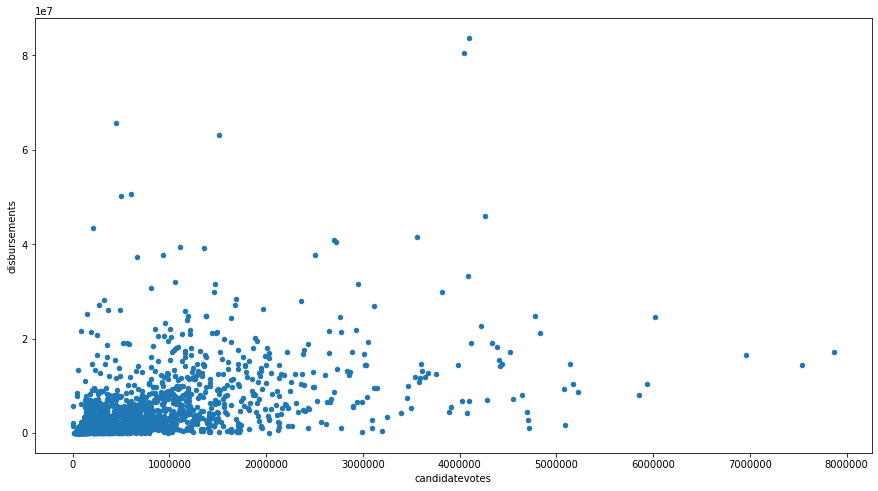

In [400]:
all_joined_df['candidatevotes'] = all_joined_df['candidatevotes'].astype(int)
all_joined_df.plot.scatter(x='candidatevotes', y='disbursements', figsize=(15, 8))

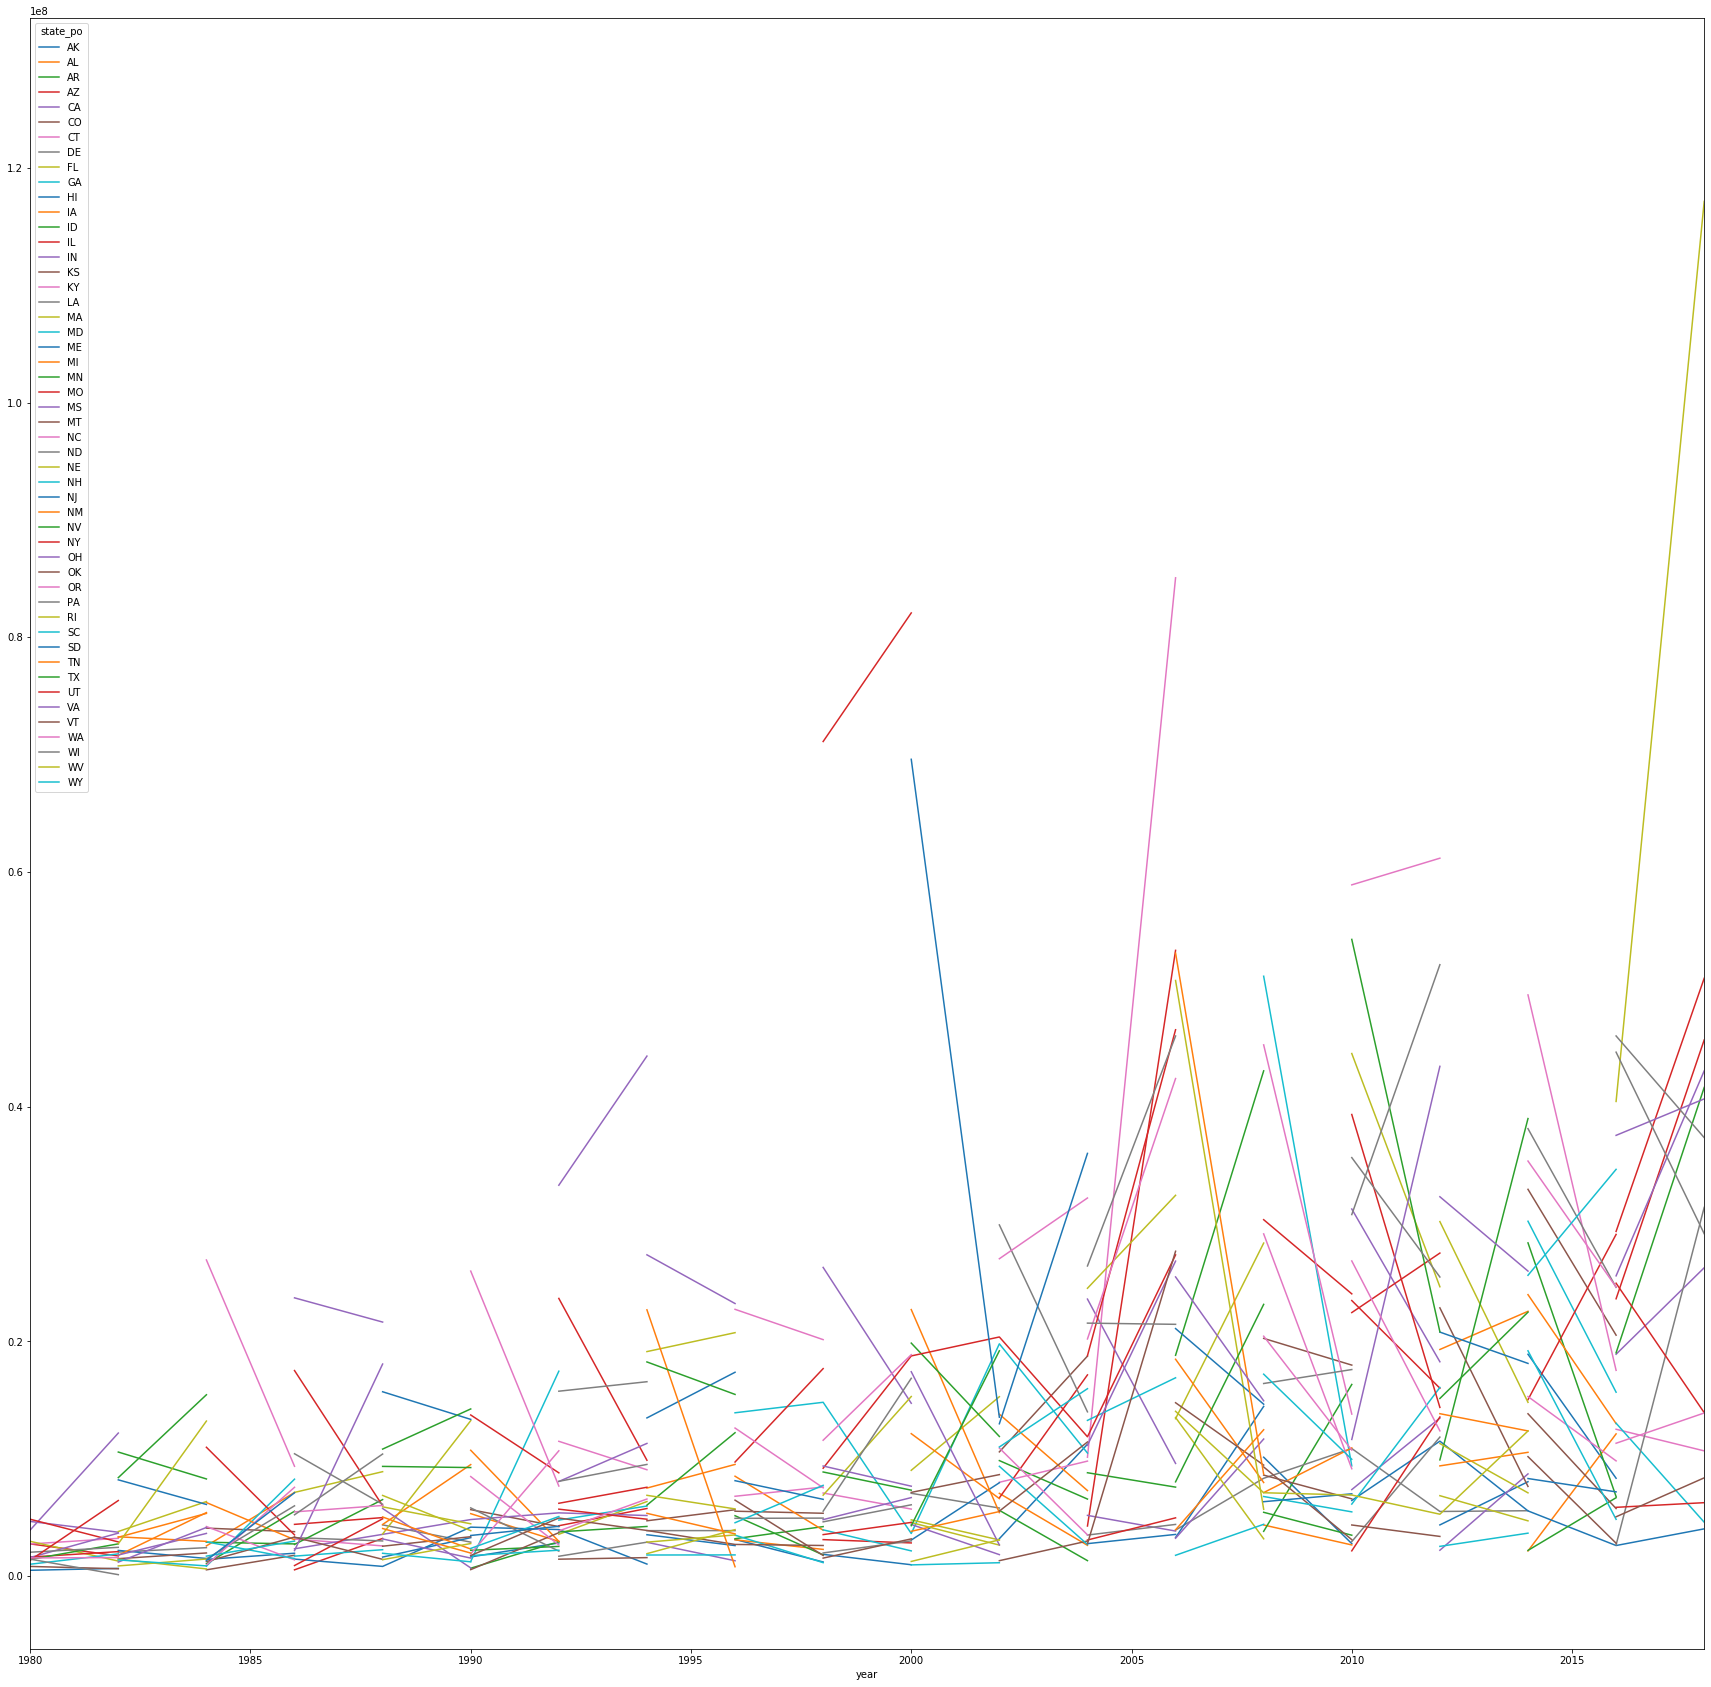

In [409]:
all_joined_df.groupby(['year', 'state_po']).sum()['disbursements'].unstack().plot(figsize=(30, 30))

In [180]:
params = {'election_year': 1980,
         'office': 'S',
         'page': 1,
         'state': 'AL'}

pages = 1
fec_senate_df = pd.DataFrame()
while params['page'] <= pages:
    
    params['page'] += 1
    print(r.json()['pagination'])
    pages = r.json()['pagination']['pages']
    results = [(res['name'], res['candidate_id'], res['state']) for res in r.json()['results']]
    fec_senate_df = fec_senate_df.append(results)

KeyError: 'pagination'

open_secrets_key = '181f25d45a886fea36a56ef59f7ac463'
r = requests.get('http://www.opensecrets.org/api/',
                 params = {'apikey': open_secrets_key,
                           'method': 'getlegislators',
                           'id': 'AZ',
                           'output': 'json'})
r.json()